In [1]:
import zipfile
from urllib import request
import os, sys

path_set14 = r"https://github.com/titu1994/Super-Resolution-using-Generative-Adversarial-Networks/releases/download/v0.1/Set14.zip"
filename="Set14.zip"
def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
            
            
if not os.path.exists("tests/set14"):
    print("Downloading Set14 images")
    filehandler, _ = request.urlretrieve(path_set14, reporthook = _progress)
    zf = zipfile.ZipFile(filehandler)
    print()
    print("Extracting images")
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests")
print()
print("Set14 is all set!!")

Extracting images
Extracting 100.00%
Set14 is all set!!


In [2]:
import zipfile
from urllib import request

path_set5 = r"https://github.com/titu1994/Super-Resolution-using-Generative-Adversarial-Networks/releases/download/v0.1/Set5.zip"
filename="Set5"
def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()

if not os.path.exists("tests/set5"):
    print("Downloading Set5 images")
    filehandler, _ = request.urlretrieve(path_set5, reporthook=_progress)
    zf = zipfile.ZipFile(filehandler)
    print()
    print("Extracting images")
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests")
    
print()
print("Set5 is all set!!")

Extracting images
Extracting 100.00%
Set5 is all set!!


In [3]:
import zipfile
from urllib import request

path_bsd100 = r"https://github.com/titu1994/Super-Resolution-using-Generative-Adversarial-Networks/releases/download/v0.1/bsd100.zip"
filename="bsd100.zip"
def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()

if not os.path.exists("tests/set14"):
    print("Downloading BSD100 images")
    filehandler, _ = request.urlretrieve(path_bsd100, reporthook=_progress)
    zf = zipfile.ZipFile(filehandler)
    print()

    print("Extracting images")
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests")
print()
print("BSD100 is all set")

Extracting images
Extracting 100.00%
BSD100 is all set


In [4]:
import zipfile
from urllib import request
import os, sys

path_coco = r"http://images.cocodataset.org/zips/train2014.zip"
filename="train2014"
def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()

if not os.path.exists("tests\coco"):
    print("Downloading Coco images")
    filehandler, _ = request.urlretrieve(path_coco, reporthook=_progress)
    zf = zipfile.ZipFile(filehandler)
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0
    print()
    print("Extracting images")

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests/coco")

    os.rename("tests/coco/train2014", "tests/coco/images")

    filename="annotations"
    path_cocoann = r"http://images.cocodataset.org/annotations/annotations_trainval2014.zip"

    print("\nDownloading Coco annotations")
    filehandler, _ = request.urlretrieve(path_cocoann, reporthook=_progress)

    zf = zipfile.ZipFile(filehandler)
    print()
    print("Extracting annotations")
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests/coco")
print()
print("Coco is all set!!")

Extracting images
Extracting 100.00%Downloading Coco annotations
Extracting annotations
Extracting 100.00%
Coco is all set!!


In [1]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input, add, concatenate, BatchNormalization, LeakyReLU, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.utils.data_utils import get_file

from keras_ops import fit as bypass_fit, smooth_gan_labels

from layers import Normalize, Denormalize, SubPixelUpscaling
from loss import AdversarialLossRegularizer, ContentVGGRegularizer, TVRegularizer, psnr, dummy_loss

import os
import time
import h5py
import numpy as np
import json
from imageio import imwrite as imsave
from skimage.transform import warp as imresize,resize
from scipy.ndimage.filters import gaussian_filter

TF_WEIGHTS_PATH_NO_TOP = r"https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

if not os.path.exists("weights/"):
    os.makedirs("weights/")

if not os.path.exists("val_images/"):
    os.makedirs("val_images/")

if K.image_dim_ordering() == "th":
    channel_axis = 1
else:
    channel_axis = -1

class VGGNetwork:
    '''
    Helper class to load VGG and its weights to the FastNet model
    '''

    def __init__(self, img_width=384, img_height=384, vgg_weight=1.0):
        self.img_height = img_height
        self.img_width = img_width
        self.vgg_weight = vgg_weight

        self.vgg_layers = None

    def append_vgg_network(self, x_in, true_X_input, pre_train=False):

        # Append the initial inputs to the outputs of the SRResNet
        x = concatenate([x_in, true_X_input], axis=0)

        # Normalize the inputs via custom VGG Normalization layer
        x = Normalize(name="normalize_vgg")(x)

        # Begin adding the VGG layers
        x = Conv2D(64, (3, 3), activation='relu', name='vgg_conv1_1', padding='same', kernel_initializer="glorot_uniform")(x)

        x = Conv2D(64, (3, 3), activation='relu', name='vgg_conv1_2', padding='same', kernel_initializer="glorot_uniform")(x)
        x = MaxPooling2D(name='vgg_maxpool1')(x)

        x = Conv2D(128, (3, 3), activation='relu', name='vgg_conv2_1', padding='same', kernel_initializer="glorot_uniform")(x)

        if pre_train:
            vgg_regularizer2 = ContentVGGRegularizer(weight=self.vgg_weight)
            x = Conv2D(128, (3, 3), activation='relu', name='vgg_conv2_2', padding='same',
                              activity_regularizer=vgg_regularizer2, kernel_initializer="glorot_uniform")(x)
        else:
            x = Conv2D(128, (3, 3), activation='relu', name='vgg_conv2_2', padding='same', kernel_initializer="glorot_uniform")(x)
        x = MaxPooling2D(name='vgg_maxpool2')(x)

        x = Conv2D(256, (3, 3), activation='relu', name='vgg_conv3_1', padding='same', kernel_initializer="glorot_uniform")(x)
        x = Conv2D(256, (3, 3), activation='relu', name='vgg_conv3_2', padding='same', kernel_initializer="glorot_uniform")(x)

        x = Conv2D(256, (3, 3), activation='relu', name='vgg_conv3_3', padding='same', kernel_initializer="glorot_uniform")(x)
        x = MaxPooling2D(name='vgg_maxpool3')(x)

        x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv4_1', padding='same', kernel_initializer="glorot_uniform")(x)
        x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv4_2', padding='same', kernel_initializer="glorot_uniform")(x)

        x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv4_3', padding='same', kernel_initializer="glorot_uniform")(x)
        x = MaxPooling2D(name='vgg_maxpool4')(x)

        x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv5_1', padding='same', kernel_initializer="glorot_uniform")(x)
        x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv5_2', padding='same', kernel_initializer="glorot_uniform")(x)

        if not pre_train:
            vgg_regularizer5 = ContentVGGRegularizer(weight=self.vgg_weight)
            x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv5_3', padding='same',
                          activity_regularizer=vgg_regularizer5, kernel_initializer="glorot_uniform")(x)
        else:
            x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv5_3', padding='same', kernel_initializer="glorot_uniform")(x)
        x = MaxPooling2D(name='vgg_maxpool5')(x)

        return x

    def load_vgg_weight(self, model):
        # Loading VGG 16 weights
        if K.image_dim_ordering() == "th":
            weights = get_file('vgg16_weights_th_dim_ordering_th_kernels_notop.h5', THEANO_WEIGHTS_PATH_NO_TOP,
                                   cache_subdir='models')
        else:
            weights = get_file('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', TF_WEIGHTS_PATH_NO_TOP,
                                   cache_subdir='models')
        f = h5py.File(weights)

        layer_names = [name for name in f.attrs['layer_names']]

        if self.vgg_layers is None:
            self.vgg_layers = [layer for layer in model.layers
                               if 'vgg_' in layer.name]

        for i, layer in enumerate(self.vgg_layers):
            g = f[layer_names[i]]
            weights = [g[name] for name in g.attrs['weight_names']]
            layer.set_weights(weights)

        # Freeze all VGG layers
        for layer in self.vgg_layers:
            layer.trainable = False

        return model


class DiscriminatorNetwork:

    def __init__(self, img_width=384, img_height=384, adversarial_loss_weight=1, small_model=False):
        self.img_width = img_width
        self.img_height = img_height
        self.adversarial_loss_weight = adversarial_loss_weight
        self.small_model = small_model

        self.k = 3
        self.mode = 2
        self.weights_path = "weights/Discriminator weights.h5"

        self.gan_layers = None

    def append_gan_network(self, true_X_input):

        # Normalize the inputs via custom VGG Normalization layer
        x = Normalize(type="gan", value=127.5, name="gan_normalize")(true_X_input)

        x = Conv2D(64, (self.k, self.k), padding='same', name='gan_conv1_1', kernel_initializer="glorot_uniform")(x)
        x = LeakyReLU(0.3, name="gan_lrelu1_1")(x)

        x = Conv2D(64, (self.k, self.k), padding='same', name='gan_conv1_2', strides=(2, 2), kernel_initializer="glorot_uniform")(x)
        x = LeakyReLU(0.3, name='gan_lrelu1_2')(x)
        x = BatchNormalization(axis=channel_axis, name='gan_batchnorm1_1')(x)

        filters = [128, 256] if self.small_model else [128, 256, 512]

        for i, num_filters in enumerate(filters):
            for j in range(2):
                strides = (2, 2) if j == 1 else (1, 1)
            
                x = Conv2D(num_filters, (self.k, self.k), padding='same', strides=strides,
                                  name='gan_conv%d_%d' % (i + 2, j + 1), kernel_initializer="glorot_uniform")(x)
                x = LeakyReLU(0.3, name='gan_lrelu_%d_%d' % (i + 2, j + 1))(x)
                x = BatchNormalization(axis=channel_axis, name='gan_batchnorm%d_%d' % (i + 2, j + 1))(x)

        x = Flatten(name='gan_flatten')(x)

        output_dim = 128 if self.small_model else 1024

        x = Dense(output_dim, name='gan_dense1')(x)
        x = LeakyReLU(0.3, name='gan_lrelu5')(x)

        gan_regulrizer = AdversarialLossRegularizer(weight=self.adversarial_loss_weight)
        x = Dense(2, activation="softmax", activity_regularizer=gan_regulrizer, name='gan_output')(x)

        return x

    def set_trainable(self, model, value=True):
        if self.gan_layers is None:
            disc_model = [layer for layer in model.layers
                          if 'model' in layer.name][0] # Only disc model is an inner model

            self.gan_layers = [layer for layer in disc_model.layers
                               if 'gan_' in layer.name]

        for layer in self.gan_layers:
            layer.trainable = value

    def load_gan_weights(self, model):
        f = h5py.File(self.weights_path)

        layer_names = [name for name in f.attrs['layer_names']]
        layer_names = layer_names[1:] # First is an input layer. Not needed.

        if self.gan_layers is None:
            self.gan_layers = [layer for layer in model.layers
                                if 'gan_' in layer.name]

        for i, layer in enumerate(self.gan_layers):
            g = f[layer_names[i]]
            weights = [g[name] for name in g.attrs['weight_names']]
            layer.set_weights(weights)

        print("GAN Model weights loaded.")
        return model

    def save_gan_weights(self, model):
        print('GAN Weights are being saved.')
        model.save_weights(self.weights_path, overwrite=True)
        print('GAN Weights saved.')


class GenerativeNetwork:

    def __init__(self, img_width=96, img_height=96, batch_size=16, num_upscales=2, small_model=False,
                 content_weight=1, tv_weight=2e5, gen_channels=64):
        self.img_width = img_width
        self.img_height = img_height
        self.batch_size = batch_size
        self.small_model = small_model
        self.num_scales = num_upscales

        self.content_weight = content_weight
        self.tv_weight = tv_weight

        self.filters = gen_channels
        self.mode = 2
        self.init = 'glorot_uniform'

        self.sr_res_layers = None
        self.sr_weights_path = "weights/SRGAN.h5"

        self.output_func = None

    def create_sr_model(self, ip):

        x = Conv2D(self.filters, (5, 5), activation='linear', padding='same', name='sr_res_conv1',
                          kernel_initializer=self.init)(ip)
        x = BatchNormalization(axis=channel_axis, name='sr_res_bn_1')(x)
        x = LeakyReLU(alpha=0.25, name='sr_res_lr1')(x)

        x = Conv2D(self.filters, (5, 5), activation='linear', padding='same', name='sr_res_conv2', kernel_initializer="glorot_uniform")(x)
        x = BatchNormalization(axis=channel_axis, name='sr_res_bn_2')(x)
        x = LeakyReLU(alpha=0.25, name='sr_res_lr2')(x)

        num_residual = 5 if self.small_model else 15

        for i in range(num_residual):
            x = self._residual_block(x, i + 1)

        for scale in range(self.num_scales):
            x = self._upscale_block(x, scale + 1)
    
        scale = 2 ** self.num_scales
        tv_regularizer = TVRegularizer(img_width=self.img_width * scale, img_height=self.img_height * scale,
                                       weight=self.tv_weight) #self.tv_weight)
        
        x = Conv2D(3, (5, 5), activation='tanh', padding='same', activity_regularizer=tv_regularizer, 
                   name='sr_res_conv_final', kernel_initializer=self.init)(x)
        
        x = Denormalize(name='sr_res_conv_denorm')(x)
        return x

    def _residual_block(self, ip, id):
        init = ip

        x = Conv2D(self.filters, (3, 3), activation='linear', padding='same', name='sr_res_conv_' + str(id) + '_1',
                          kernel_initializer=self.init)(ip)
        x = BatchNormalization(axis=channel_axis, name='sr_res_bn_' + str(id) + '_1')(x)
        x = LeakyReLU(alpha=0.25, name="sr_res_activation_" + str(id) + "_1")(x)

        x = Conv2D(self.filters, (3, 3), activation='linear', padding='same', name='sr_res_conv_' + str(id) + '_2',
                          kernel_initializer=self.init)(x)
        x = BatchNormalization(axis=channel_axis, name='sr_res_bn_' + str(id) + '_2')(x)

        m = add([x, init],name="sr_res_merge_" + str(id))

        return m

    def _upscale_block(self, ip, id):
        '''
        As per suggestion from http://distill.pub/2016/deconv-checkerboard/, I am swapping out
        SubPixelConvolution to simple Nearest Neighbour Upsampling
        '''
        init = ip
        
        x = Conv2D(128, (3, 3), activation="linear", padding='same', name='sr_res_upconv1_%d' % id,
                          kernel_initializer=self.init)(init)
        x = LeakyReLU(alpha=0.25, name='sr_res_up_lr_%d_1_1' % id)(x)
        x = UpSampling2D(name='sr_res_upscale_%d' % id)(x)
        #x = SubPixelUpscaling(r=2, channels=32)(x)
        x = Conv2D(128, (3, 3), activation="linear", padding='same', name='sr_res_filter1_%d' % id,
                          kernel_initializer=self.init)(x)
        x = LeakyReLU(alpha=0.3, name='sr_res_up_lr_%d_1_2' % id)(x)

        return x

    def set_trainable(self, model, value=True):
        if self.sr_res_layers is None:
            self.sr_res_layers = [layer for layer in model.layers
                                    if 'sr_res_' in layer.name]

        for layer in self.sr_res_layers:
            layer.trainable = value

    def get_generator_output(self, input_img, srgan_model):
        if self.output_func is None:
            gen_output_layer = [layer for layer in srgan_model.layers
                                if layer.name == "sr_res_conv_denorm"][0]
            self.output_func = K.function([srgan_model.layers[0].input],
                                          [gen_output_layer.output])

        return self.output_func([input_img])


class SRGANNetwork:

    def __init__(self, img_width=96, img_height=96, batch_size=16, num_scales=2):
        self.img_width = img_width
        self.img_height = img_height
        self.batch_size = batch_size
        self.num_scales = num_scales

        self.discriminative_network = None # type: DiscriminatorNetwork
        self.generative_network = None # type: GenerativeNetwork
        self.vgg_network = None # type: VGGNetwork

        self.srgan_model_ = None # type: Model
        self.generative_model_ = None # type: Model
        self.discriminative_model_ = None #type: Model

    def build_srgan_pretrain_model(self, use_small_srgan=False):
        large_width = self.img_width * 4
        large_height = self.img_height * 4

        self.generative_network = GenerativeNetwork(self.img_width, self.img_height, self.batch_size, self.num_scales,
                                                    use_small_srgan)
        self.vgg_network = VGGNetwork(large_width, large_height)

        ip = Input(shape=(self.img_width, self.img_height, 3), name='x_generator')
        ip_vgg = Input(shape=(large_width, large_height, 3), name='x_vgg')  # Actual X images

        sr_output = self.generative_network.create_sr_model(ip)
        self.generative_model_ = Model(ip, sr_output)

        vgg_output = self.vgg_network.append_vgg_network(sr_output, ip_vgg, pre_train=True)

        self.srgan_model_ = Model(input=[ip, ip_vgg],
                                  output=vgg_output)

        self.vgg_network.load_vgg_weight(self.srgan_model_)

        srgan_optimizer = Adam(lr=1e-4)
        generator_optimizer = Adam(lr=1e-4)

        self.generative_model_.compile(generator_optimizer, dummy_loss)
        self.srgan_model_.compile(srgan_optimizer, dummy_loss)

        return self.srgan_model_


    def build_discriminator_pretrain_model(self, use_small_srgan=False, use_small_discriminator=False):
        large_width = self.img_width * 4
        large_height = self.img_height * 4

        self.generative_network = GenerativeNetwork(self.img_width, self.img_height, self.batch_size, self.num_scales,
                                                    use_small_srgan)
        self.discriminative_network = DiscriminatorNetwork(large_width, large_height,
                                                           small_model=use_small_discriminator)

        ip = Input(shape=(self.img_width, self.img_height, 3), name='x_generator')
        ip_gan = Input(shape=(large_width, large_height, 3), name='x_discriminator')  # Actual X images

        sr_output = self.generative_network.create_sr_model(ip)
        self.generative_model_ = Model(ip, sr_output)
        #self.generative_network.set_trainable(self.generative_model_, value=False)

        gan_output = self.discriminative_network.append_gan_network(ip_gan)
        self.discriminative_model_ = Model(ip_gan, gan_output)

        generator_out = self.generative_model_(ip)
        gan_output = self.discriminative_model_(generator_out)

        self.srgan_model_ = Model(input=ip, output=gan_output)

        srgan_optimizer = Adam(lr=1e-4)
        generator_optimizer = Adam(lr=1e-4)
        discriminator_optimizer = Adam(lr=1e-4)

        self.generative_model_.compile(generator_optimizer, loss='mse')
        self.discriminative_model_.compile(discriminator_optimizer, loss='categorical_crossentropy', metrics=['acc'])
        self.srgan_model_.compile(srgan_optimizer, loss='categorical_crossentropy', metrics=['acc'])



        return self.discriminative_model_


    def build_srgan_model(self, use_small_srgan=False, use_small_discriminator=False):
        large_width = self.img_width * 4
        large_height = self.img_height * 4

        self.generative_network = GenerativeNetwork(self.img_width, self.img_height, self.batch_size, num_upscales=self.num_scales,
                                                    small_model=use_small_srgan)
        self.discriminative_network = DiscriminatorNetwork(large_width, large_height,
                                                           small_model=use_small_discriminator)
        self.vgg_network = VGGNetwork(large_width, large_height)

        ip = Input(shape=(self.img_width, self.img_height, 3), name='x_generator')
        ip_gan = Input(shape=(large_width, large_height, 3), name='x_discriminator') # Actual X images
        ip_vgg = Input(shape=(large_width, large_height, 3), name='x_vgg') # Actual X images
        sr_output = self.generative_network.create_sr_model(ip)
        self.generative_model_ = Model(ip, sr_output)

        gan_output = self.discriminative_network.append_gan_network(ip_gan)
        self.discriminative_model_ = Model(ip_gan, gan_output)        
        gan_output = self.discriminative_model_(self.generative_model_.output)
        vgg_output = self.vgg_network.append_vgg_network(self.generative_model_.output, ip_vgg)

        self.srgan_model_ = Model(input=[ip, ip_gan, ip_vgg], output=[gan_output, vgg_output])

        self.vgg_network.load_vgg_weight(self.srgan_model_)

        srgan_optimizer = Adam(lr=1e-4)
        generator_optimizer = Adam(lr=1e-4)
        discriminator_optimizer = Adam(lr=1e-4)

        self.generative_model_.compile(generator_optimizer, dummy_loss)
        self.discriminative_model_.compile(discriminator_optimizer, loss='categorical_crossentropy', metrics=['acc'])
        self.srgan_model_.compile(srgan_optimizer, dummy_loss)

        return self.srgan_model_


    def pre_train_srgan(self, image_dir, num_images=50000, epochs=1, use_small_srgan=False):
        self.build_srgan_pretrain_model(use_small_srgan=use_small_srgan)

        self._train_model(image_dir, num_images=num_images, epochs=epochs, pre_train_srgan=True,
                          load_generative_weights=True)

    def pre_train_discriminator(self, image_dir, num_images=50000, epochs=1, batch_size=128,
                                use_small_discriminator=False):

        self.batch_size = batch_size
        self.build_discriminator_pretrain_model(use_small_discriminator)

        self._train_model(image_dir, num_images, epochs, pre_train_discriminator=True,
                          load_generative_weights=True)

    def train_full_model(self, image_dir, num_images=50000, epochs=10, use_small_srgan=False,
                         use_small_discriminator=False):

        self.build_srgan_model(use_small_srgan, use_small_discriminator)

        self._train_model(image_dir, num_images, epochs, load_generative_weights=True, load_discriminator_weights=True)

    def _train_model(self, image_dir, num_images=80000, epochs=10, pre_train_srgan=False,
                     pre_train_discriminator=False, load_generative_weights=False, load_discriminator_weights=False,
                     save_loss=True, disc_train_flip=0.1):

        assert self.img_width >= 16, "Minimum image width must be at least 16"
        assert self.img_height >= 16, "Minimum image height must be at least 16"

        if load_generative_weights:
            try:
                self.generative_model_.load_weights(self.generative_network.sr_weights_path)
                print("Generator weights loaded.")
            except:
                print("Could not load generator weights.")

        if load_discriminator_weights:
            try:
                self.discriminative_network.load_gan_weights(self.srgan_model_)
                print("Discriminator weights loaded.")
            except:
                print("Could not load discriminator weights.")

        datagen = ImageDataGenerator(rescale=1. / 255)
        img_width = self.img_width * 4
        img_height = self.img_height * 4

        early_stop = False
        iteration = 0
        prev_improvement = -1

        if save_loss:
            if pre_train_srgan:
                loss_history = {'generator_loss' : [],
                                'val_psnr' : [], }
            elif pre_train_discriminator:
                loss_history = {'discriminator_loss' : [],
                                'discriminator_acc' : [], }
            else:
                loss_history = {'discriminator_loss' : [],
                                'discriminator_acc' : [],
                                'generator_loss' : [],
                                'val_psnr': [], }

        y_vgg_dummy = np.zeros((self.batch_size * 2, 3, img_width // 32, img_height // 32)) # 5 Max Pools = 2 ** 5 = 32

        print("Training SRGAN network")
        for i in range(epochs):
            print()
            print("Epoch : %d" % (i + 1))
            for x in datagen.flow_from_directory(image_dir, class_mode=None, batch_size=self.batch_size,
                                                 target_size=(img_width, img_height)):
                try:
                    t1 = time.time()

                    if not pre_train_srgan and not pre_train_discriminator:
                        x_vgg = x.copy() * 255 # VGG input [0 - 255 scale]

                    # resize images
                    x_temp = x.copy()
                    x_temp = x_temp.transpose((0, 2, 3, 1))

                    x_generator = np.empty((self.batch_size, self.img_width, self.img_height, 3))
                    def shift_down(xy):                        
                        return xy
                    
                    for j in range(self.batch_size):
                        img = gaussian_filter(x_temp[j], sigma=0.1)
                        img = imresize(img, inverse_map=shift_down, output_shape=(self.img_width, self.img_height, 3), order=3)
                        #img = resize(img, (self.img_width, self.img_height))
                        x_generator[j, :, :, :] = img

                    #x_generator = x_generator.transpose((0, 3, 1, 2))

                    if iteration % 50 == 0 and iteration != 0 and not pre_train_discriminator:
                        print("Validation image..")
                        output_image_batch = self.generative_network.get_generator_output(x_generator,
                                                                                          self.srgan_model_)
                        if type(output_image_batch) == list:
                            output_image_batch = output_image_batch[0]

                        mean_axis = (0, 2, 3) if K.image_dim_ordering() == 'th' else (0, 1, 2)

                        average_psnr = 0.0

                        print('gen img mean :', np.mean(output_image_batch / 255., axis=mean_axis))
                        print('val img mean :', np.mean(x, axis=mean_axis))

                        for x_i in range(self.batch_size):
                            average_psnr += psnr(x[x_i], np.clip(output_image_batch[x_i], 0, 255) / 255.)

                        average_psnr /= self.batch_size

                        if save_loss:
                            loss_history['val_psnr'].append(average_psnr)

                        iteration += self.batch_size
                        t2 = time.time()

                        print("Time required : %0.2f. Average validation PSNR over %d samples = %0.2f" %
                              (t2 - t1, self.batch_size, average_psnr))

                        for x_i in range(self.batch_size):
                            real_path = "val_images/epoch_%d_iteration_%d_num_%d_real_.png" % (i + 1, iteration, x_i + 1)
                            generated_path = "val_images/epoch_%d_iteration_%d_num_%d_generated.png" % (i + 1,
                                                                                                        iteration,
                                                                                                        x_i + 1)

                            val_x = x[x_i].copy() * 255.
                            val_x = val_x.transpose((1, 2, 0))
                            val_x = np.clip(val_x, 0, 255).astype('uint8')

                            output_image = output_image_batch[x_i]
                            output_image = output_image.transpose((1, 2, 0))
                            output_image = np.clip(output_image, 0, 255).astype('uint8')

                            imsave(real_path, val_x[:,:,0])
                            imsave(generated_path, output_image[:,:,0])

                        '''
                        Don't train of validation images for now.

                        Note that if epochs > 1, there is a chance that
                        validation images may be used for training purposes as well.

                        In that case, this isn't strictly a validation measure, instead of
                        just a check to see what the network has learned.
                        '''
                        continue

                    if pre_train_srgan:
                        # Train only generator + vgg network

                        # Use custom bypass_fit to bypass the check for same input and output batch size
                        hist = bypass_fit(self.srgan_model_, [x_generator, x * 255], y_vgg_dummy,
                                                     batch_size=self.batch_size, epochs=1, verbose=0)
                        sr_loss = hist.history['loss'][0]

                        if save_loss:
                            loss_history['generator_loss'].extend(hist.history['loss'])

                        if prev_improvement == -1:
                            prev_improvement = sr_loss

                        improvement = (prev_improvement - sr_loss) / prev_improvement * 100
                        prev_improvement = sr_loss

                        iteration += self.batch_size
                        t2 = time.time()

                        print("%d / %d | Improvement : %0.2f %% | %0.2f s/steps | "
                              "GLoss: %0.2f" % (iteration, num_images, improvement, t2 - t1, sr_loss))
                    elif pre_train_discriminator:
                        # Train only discriminator
                        X_pred = self.generative_model_.predict(x_generator, self.batch_size)

                        X = np.concatenate((X_pred, x * 255))

                        # Using soft and noisy labels
                        if np.random.uniform() > disc_train_flip:
                            # give correct classifications
                            y_gan = [0] * self.batch_size + [1] * self.batch_size
                        else:
                            # give wrong classifications (noisy labels)
                            y_gan = [1] * self.batch_size + [0] * self.batch_size

                        y_gan = np.asarray(y_gan, dtype=np.int).reshape(-1, 1)
                        y_gan = to_categorical(y_gan, num_classes=2)
                        y_gan = smooth_gan_labels(y_gan)

                        hist = self.discriminative_model_.fit(X, y_gan, batch_size=self.batch_size,
                                                              epochs=1, verbose=0)

                        discriminator_loss = hist.history['loss'][-1]
                        discriminator_acc = hist.history['acc'][-1]

                        if save_loss:
                            loss_history['discriminator_loss'].extend(hist.history['loss'])
                            loss_history['discriminator_acc'].extend(hist.history['acc'])

                        if prev_improvement == -1:
                            prev_improvement = discriminator_loss

                        improvement = (prev_improvement - discriminator_loss) / prev_improvement * 100
                        prev_improvement = discriminator_loss

                        iteration += self.batch_size
                        t2 = time.time()

                        print("%d / %d | Improvement : %0.2f %% | %0.2f s/step | "
                            "DLoss/Acc : %0.4f / %0.2f" % (iteration, num_images,
                                                            improvement, t2 - t1,
                                                            discriminator_loss, discriminator_acc))

                    else:
                        # Train only discriminator, disable training of srgan
                        self.discriminative_network.set_trainable(self.srgan_model_, value=True)
                        self.generative_network.set_trainable(self.srgan_model_, value=False)

                        # Use custom bypass_fit to bypass the check for same input and output batch size
                        # hist = bypass_fit(self.srgan_model_, [x_generator, x * 255, x_vgg],
                        #                          [y_gan, y_vgg_dummy],
                        #                          batch_size=self.batch_size, epochs=1, verbose=0)

                        X_pred = self.generative_model_.predict(x_generator, self.batch_size)

                        X = np.concatenate((X_pred, x * 255))

                        # Using soft and noisy labels
                        if np.random.uniform() > disc_train_flip:
                            # give correct classifications
                            y_gan = [0] * self.batch_size + [1] * self.batch_size
                        else:
                            # give wrong classifications (noisy labels)
                            y_gan = [1] * self.batch_size + [0] * self.batch_size

                        y_gan = np.asarray(y_gan, dtype=np.int).reshape(-1, 1)
                        y_gan = to_categorical(y_gan, num_classes=2)
                        y_gan = smooth_gan_labels(y_gan)

                        hist1 = self.discriminative_model_.fit(X, y_gan, verbose=0, batch_size=self.batch_size,
                                                              epochs=1)

                        discriminator_loss = hist1.history['loss'][-1]

                        # Train only generator, disable training of discriminator
                        self.discriminative_network.set_trainable(self.srgan_model_, value=False)
                        self.generative_network.set_trainable(self.srgan_model_, value=True)

                        # Using soft labels
                        y_model = [1] * self.batch_size
                        y_model = np.asarray(y_model, dtype=np.int).reshape(-1, 1)
                        y_model = to_categorical(y_model, num_classes=2)
                        y_model = smooth_gan_labels(y_model)

                        # Use custom bypass_fit to bypass the check for same input and output batch size
                        hist2 = bypass_fit(self.srgan_model_, [x_generator, x, x_vgg], [y_model, y_vgg_dummy],
                                           batch_size=self.batch_size, epochs=1, verbose=0)

                        generative_loss = hist2.history['loss'][0]

                        if save_loss:
                            loss_history['discriminator_loss'].extend(hist1.history['loss'])
                            loss_history['discriminator_acc'].extend(hist1.history['acc'])
                            loss_history['generator_loss'].extend(hist2.history['loss'])

                        if prev_improvement == -1:
                            prev_improvement = discriminator_loss

                        improvement = (prev_improvement - discriminator_loss) / prev_improvement * 100
                        prev_improvement = discriminator_loss

                        iteration += self.batch_size
                        t2 = time.time()
                        print("%d / %d | Improvement : %0.2f %% | %0.2f s/step | DLoss : %0.3f | GLoss : %0.3f" %
                              (iteration, num_images, improvement, t2 - t1, discriminator_loss, generative_loss))

                    if iteration % 1000 == 0 and iteration != 0:
                        print("Saving model weights.")
                        # Save predictive (SR network) weights
                        self._save_model_weights(pre_train_srgan, pre_train_discriminator)
                        self._save_loss_history(loss_history, pre_train_srgan, pre_train_discriminator, save_loss)

                    if iteration >= num_images:
                        break

                except KeyboardInterrupt:
                    print("Keyboard interrupt detected. Stopping early.")
                    early_stop = True
                    break

            iteration = 0

            if early_stop:
                break

        print("Finished training SRGAN network. Saving model weights.")
        # Save predictive (SR network) weights
        self._save_model_weights(pre_train_srgan, pre_train_discriminator)
        self._save_loss_history(loss_history, pre_train_srgan, pre_train_discriminator, save_loss)

    def _save_model_weights(self, pre_train_srgan, pre_train_discriminator):
        if not pre_train_discriminator:
            self.generative_model_.save_weights(self.generative_network.sr_weights_path, overwrite=True)

        if not pre_train_srgan:
            # Save GAN (discriminative network) weights
            self.discriminative_network.save_gan_weights(self.discriminative_model_)

    def _save_loss_history(self, loss_history, pre_train_srgan, pre_train_discriminator, save_loss):
        if save_loss:
            print("Saving loss history")

            if pre_train_srgan:
                with open('pretrain losses - srgan.json', 'w') as f:
                    json.dump(loss_history, f)
            elif pre_train_discriminator:
                with open('pretrain losses - discriminator.json', 'w') as f:
                    json.dump(loss_history, f)
            else:
                with open('fulltrain losses.json', 'w') as f:
                    json.dump(loss_history, f)

            print("Saved loss history")


if __name__ == "__main__":
    from keras.utils.vis_utils import plot_model

    # Path to MS COCO dataset
    coco_path = r"tests/coco"

    '''
    Base Network manager for the SRGAN model

    Width / Height = 32 to reduce the memory requirement for the discriminator.

    Batch size = 1 is slower, but uses the least amount of gpu memory, and also acts as
    Instance Normalization (batch norm with 1 input image) which speeds up training slightly.
    '''

    srgan_network = SRGANNetwork(img_width=32, img_height=32, batch_size=1)
    srgan_network.build_srgan_model()
    #plot(srgan_network.srgan_model_, 'SRGAN.png', show_shapes=True)

    # Pretrain the SRGAN network
    #srgan_network.pre_train_srgan(coco_path, num_images=80000, epochs=1)

    # Pretrain the discriminator network
    srgan_network.pre_train_discriminator(coco_path, num_images=40000, epochs=1, batch_size=16)

    # Fully train the SRGAN with VGG loss and Discriminator loss
    srgan_network.train_full_model(coco_path, num_images=80000, epochs=5)













/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:417: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
/home/ubuntu/an

Generator weights loaded.
Training SRGAN network

Epoch : 1
Found 82783 images belonging to 2 classes.
16 / 40000 | Improvement : 0.00 % | 8.62 s/step | DLoss/Acc : 3.6501 / 0.72
32 / 40000 | Improvement : -20.47 % | 0.56 s/step | DLoss/Acc : 4.3975 / 0.97
48 / 40000 | Improvement : -1.35 % | 0.56 s/step | DLoss/Acc : 4.4570 / 0.97
64 / 40000 | Improvement : 8.21 % | 0.56 s/step | DLoss/Acc : 4.0911 / 1.00
80 / 40000 | Improvement : 0.78 % | 0.56 s/step | DLoss/Acc : 4.0591 / 1.00
96 / 40000 | Improvement : 10.43 % | 0.56 s/step | DLoss/Acc : 3.6357 / 1.00
112 / 40000 | Improvement : -11.65 % | 0.56 s/step | DLoss/Acc : 4.0592 / 1.00
128 / 40000 | Improvement : 4.26 % | 0.56 s/step | DLoss/Acc : 3.8861 / 0.94
144 / 40000 | Improvement : -12.29 % | 0.56 s/step | DLoss/Acc : 4.3638 / 0.97
160 / 40000 | Improvement : 9.06 % | 0.56 s/step | DLoss/Acc : 3.9684 / 1.00
176 / 40000 | Improvement : -1.39 % | 0.56 s/step | DLoss/Acc : 4.0238 / 1.00
192 / 40000 | Improvement : 4.01 % | 0.56 s/ste

1680 / 40000 | Improvement : -6.09 % | 0.56 s/step | DLoss/Acc : 4.1116 / 1.00
1696 / 40000 | Improvement : 6.11 % | 0.56 s/step | DLoss/Acc : 3.8605 / 1.00
1712 / 40000 | Improvement : -2.73 % | 0.56 s/step | DLoss/Acc : 3.9658 / 1.00
1728 / 40000 | Improvement : 11.93 % | 0.56 s/step | DLoss/Acc : 3.4928 / 1.00
1744 / 40000 | Improvement : -18.14 % | 0.56 s/step | DLoss/Acc : 4.1265 / 1.00
1760 / 40000 | Improvement : 0.47 % | 0.56 s/step | DLoss/Acc : 4.1071 / 1.00
1776 / 40000 | Improvement : 5.32 % | 0.56 s/step | DLoss/Acc : 3.8887 / 1.00
1792 / 40000 | Improvement : 4.54 % | 0.56 s/step | DLoss/Acc : 3.7121 / 1.00
1808 / 40000 | Improvement : -9.19 % | 0.56 s/step | DLoss/Acc : 4.0533 / 1.00
1824 / 40000 | Improvement : -19.33 % | 0.56 s/step | DLoss/Acc : 4.8367 / 0.97
1840 / 40000 | Improvement : 17.16 % | 0.56 s/step | DLoss/Acc : 4.0068 / 1.00
1856 / 40000 | Improvement : -3.57 % | 0.56 s/step | DLoss/Acc : 4.1497 / 1.00
1872 / 40000 | Improvement : 6.59 % | 0.56 s/step | DL

3328 / 40000 | Improvement : -14.12 % | 0.56 s/step | DLoss/Acc : 4.4944 / 1.00
3344 / 40000 | Improvement : 15.90 % | 0.56 s/step | DLoss/Acc : 3.7800 / 1.00
3360 / 40000 | Improvement : -10.04 % | 0.56 s/step | DLoss/Acc : 4.1596 / 1.00
3376 / 40000 | Improvement : 8.40 % | 0.56 s/step | DLoss/Acc : 3.8102 / 1.00
3392 / 40000 | Improvement : -0.60 % | 0.56 s/step | DLoss/Acc : 3.8329 / 1.00
3408 / 40000 | Improvement : 6.09 % | 0.56 s/step | DLoss/Acc : 3.5995 / 1.00
3424 / 40000 | Improvement : -5.02 % | 0.56 s/step | DLoss/Acc : 3.7802 / 1.00
3440 / 40000 | Improvement : -6.40 % | 0.56 s/step | DLoss/Acc : 4.0221 / 0.97
3456 / 40000 | Improvement : -1.53 % | 0.57 s/step | DLoss/Acc : 4.0838 / 1.00
3472 / 40000 | Improvement : -1.01 % | 0.56 s/step | DLoss/Acc : 4.1253 / 0.97
3488 / 40000 | Improvement : 4.30 % | 0.56 s/step | DLoss/Acc : 3.9478 / 1.00
3504 / 40000 | Improvement : -304.84 % | 0.56 s/step | DLoss/Acc : 15.9826 / 0.00
3520 / 40000 | Improvement : 51.10 % | 0.56 s/step

4976 / 40000 | Improvement : 12.03 % | 0.56 s/step | DLoss/Acc : 3.6656 / 1.00
4992 / 40000 | Improvement : -8.44 % | 0.56 s/step | DLoss/Acc : 3.9750 / 1.00
5008 / 40000 | Improvement : 8.90 % | 0.56 s/step | DLoss/Acc : 3.6211 / 1.00
5024 / 40000 | Improvement : -360.17 % | 0.56 s/step | DLoss/Acc : 16.6633 / 0.00
5040 / 40000 | Improvement : 78.62 % | 0.56 s/step | DLoss/Acc : 3.5627 / 1.00
5056 / 40000 | Improvement : -18.83 % | 0.56 s/step | DLoss/Acc : 4.2334 / 1.00
5072 / 40000 | Improvement : 13.91 % | 0.56 s/step | DLoss/Acc : 3.6444 / 1.00
5088 / 40000 | Improvement : -35.97 % | 0.56 s/step | DLoss/Acc : 4.9554 / 0.94
5104 / 40000 | Improvement : -229.59 % | 0.56 s/step | DLoss/Acc : 16.3323 / 0.00
5120 / 40000 | Improvement : 76.26 % | 0.56 s/step | DLoss/Acc : 3.8779 / 1.00
5136 / 40000 | Improvement : 2.61 % | 0.56 s/step | DLoss/Acc : 3.7768 / 1.00
5152 / 40000 | Improvement : -3.33 % | 0.56 s/step | DLoss/Acc : 3.9026 / 0.97
5168 / 40000 | Improvement : 5.32 % | 0.56 s/s

6624 / 40000 | Improvement : -346.35 % | 0.56 s/step | DLoss/Acc : 16.6275 / 0.00
6640 / 40000 | Improvement : 0.31 % | 0.56 s/step | DLoss/Acc : 16.5765 / 0.00
6656 / 40000 | Improvement : 75.90 % | 0.56 s/step | DLoss/Acc : 3.9953 / 1.00
6672 / 40000 | Improvement : -7.74 % | 0.56 s/step | DLoss/Acc : 4.3044 / 1.00
6688 / 40000 | Improvement : 16.83 % | 0.56 s/step | DLoss/Acc : 3.5800 / 1.00
6704 / 40000 | Improvement : -17.17 % | 0.56 s/step | DLoss/Acc : 4.1946 / 1.00
6720 / 40000 | Improvement : 6.74 % | 0.56 s/step | DLoss/Acc : 3.9121 / 1.00
6736 / 40000 | Improvement : -6.68 % | 0.56 s/step | DLoss/Acc : 4.1734 / 1.00
6752 / 40000 | Improvement : 10.04 % | 0.56 s/step | DLoss/Acc : 3.7543 / 1.00
6768 / 40000 | Improvement : -14.98 % | 0.56 s/step | DLoss/Acc : 4.3168 / 0.97
6784 / 40000 | Improvement : 15.87 % | 0.56 s/step | DLoss/Acc : 3.6316 / 1.00
6800 / 40000 | Improvement : 5.14 % | 0.56 s/step | DLoss/Acc : 3.4449 / 1.00
6816 / 40000 | Improvement : -14.16 % | 0.56 s/st

8256 / 40000 | Improvement : -16.78 % | 0.56 s/step | DLoss/Acc : 3.9587 / 1.00
8272 / 40000 | Improvement : -3.54 % | 0.56 s/step | DLoss/Acc : 4.0987 / 1.00
8288 / 40000 | Improvement : 9.12 % | 0.56 s/step | DLoss/Acc : 3.7249 / 1.00
8304 / 40000 | Improvement : -9.55 % | 0.56 s/step | DLoss/Acc : 4.0805 / 1.00
8320 / 40000 | Improvement : -5.67 % | 0.56 s/step | DLoss/Acc : 4.3119 / 1.00
8336 / 40000 | Improvement : 1.90 % | 0.56 s/step | DLoss/Acc : 4.2300 / 1.00
8352 / 40000 | Improvement : 6.18 % | 0.56 s/step | DLoss/Acc : 3.9684 / 1.00
8368 / 40000 | Improvement : -6.79 % | 0.56 s/step | DLoss/Acc : 4.2379 / 0.97
8384 / 40000 | Improvement : 4.96 % | 0.56 s/step | DLoss/Acc : 4.0276 / 1.00
8400 / 40000 | Improvement : 19.17 % | 0.56 s/step | DLoss/Acc : 3.2554 / 1.00
8416 / 40000 | Improvement : -26.37 % | 0.56 s/step | DLoss/Acc : 4.1137 / 1.00
8432 / 40000 | Improvement : -302.67 % | 0.56 s/step | DLoss/Acc : 16.5646 / 0.00
8448 / 40000 | Improvement : 76.10 % | 0.56 s/step 

9920 / 40000 | Improvement : -9.44 % | 0.56 s/step | DLoss/Acc : 3.9989 / 1.00
9936 / 40000 | Improvement : 7.96 % | 0.56 s/step | DLoss/Acc : 3.6806 / 1.00
9952 / 40000 | Improvement : 1.23 % | 0.56 s/step | DLoss/Acc : 3.6354 / 1.00
9968 / 40000 | Improvement : 6.07 % | 0.56 s/step | DLoss/Acc : 3.4146 / 1.00
9984 / 40000 | Improvement : -380.81 % | 0.56 s/step | DLoss/Acc : 16.4179 / 0.03
10000 / 40000 | Improvement : 74.43 % | 0.56 s/step | DLoss/Acc : 4.1974 / 0.97
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
10016 / 40000 | Improvement : 0.27 % | 0.56 s/step | DLoss/Acc : 4.1862 / 0.97
10032 / 40000 | Improvement : -9.17 % | 0.56 s/step | DLoss/Acc : 4.5700 / 0.97
10048 / 40000 | Improvement : -50.06 % | 0.56 s/step | DLoss/Acc : 6.8579 / 0.72
10064 / 40000 | Improvement : 21.03 % | 0.56 s/step | DLoss/Acc : 5.4153 / 0.88
10080 / 40000 | Improvement : -183.52 % | 0.56 s/step | DLoss/Acc : 15.3538 / 0.09
10096 / 40000

11536 / 40000 | Improvement : 18.73 % | 0.56 s/step | DLoss/Acc : 12.8399 / 0.31
11552 / 40000 | Improvement : 1.35 % | 0.57 s/step | DLoss/Acc : 12.6665 / 0.34
11568 / 40000 | Improvement : 4.89 % | 0.56 s/step | DLoss/Acc : 12.0471 / 0.34
11584 / 40000 | Improvement : 32.04 % | 0.56 s/step | DLoss/Acc : 8.1868 / 0.69
11600 / 40000 | Improvement : 50.71 % | 0.56 s/step | DLoss/Acc : 4.0354 / 1.00
11616 / 40000 | Improvement : 7.94 % | 0.56 s/step | DLoss/Acc : 3.7149 / 1.00
11632 / 40000 | Improvement : -7.03 % | 0.56 s/step | DLoss/Acc : 3.9761 / 1.00
11648 / 40000 | Improvement : 5.70 % | 0.56 s/step | DLoss/Acc : 3.7494 / 1.00
11664 / 40000 | Improvement : -9.17 % | 0.56 s/step | DLoss/Acc : 4.0933 / 1.00
11680 / 40000 | Improvement : 3.76 % | 0.56 s/step | DLoss/Acc : 3.9392 / 1.00
11696 / 40000 | Improvement : 5.31 % | 0.56 s/step | DLoss/Acc : 3.7299 / 1.00
11712 / 40000 | Improvement : -5.61 % | 0.56 s/step | DLoss/Acc : 3.9391 / 1.00
11728 / 40000 | Improvement : -7.61 % | 0.5

13168 / 40000 | Improvement : -272.04 % | 0.56 s/step | DLoss/Acc : 15.3235 / 0.12
13184 / 40000 | Improvement : 67.77 % | 0.56 s/step | DLoss/Acc : 4.9382 / 0.94
13200 / 40000 | Improvement : 14.77 % | 0.56 s/step | DLoss/Acc : 4.2090 / 0.94
13216 / 40000 | Improvement : -2.65 % | 0.56 s/step | DLoss/Acc : 4.3204 / 0.97
13232 / 40000 | Improvement : 15.21 % | 0.56 s/step | DLoss/Acc : 3.6632 / 1.00
13248 / 40000 | Improvement : 5.79 % | 0.56 s/step | DLoss/Acc : 3.4510 / 1.00
13264 / 40000 | Improvement : -394.43 % | 0.56 s/step | DLoss/Acc : 17.0625 / 0.00
13280 / 40000 | Improvement : 77.03 % | 0.56 s/step | DLoss/Acc : 3.9193 / 1.00
13296 / 40000 | Improvement : 3.00 % | 0.56 s/step | DLoss/Acc : 3.8018 / 1.00
13312 / 40000 | Improvement : 8.11 % | 0.56 s/step | DLoss/Acc : 3.4936 / 1.00
13328 / 40000 | Improvement : -9.25 % | 0.56 s/step | DLoss/Acc : 3.8167 / 1.00
13344 / 40000 | Improvement : -10.28 % | 0.56 s/step | DLoss/Acc : 4.2092 / 0.97
13360 / 40000 | Improvement : 11.09 

14784 / 40000 | Improvement : 3.38 % | 0.56 s/step | DLoss/Acc : 3.6969 / 1.00
14800 / 40000 | Improvement : -13.49 % | 0.56 s/step | DLoss/Acc : 4.1955 / 1.00
14816 / 40000 | Improvement : 6.68 % | 0.56 s/step | DLoss/Acc : 3.9152 / 1.00
14832 / 40000 | Improvement : -6.57 % | 0.56 s/step | DLoss/Acc : 4.1724 / 1.00
14848 / 40000 | Improvement : 8.20 % | 0.56 s/step | DLoss/Acc : 3.8301 / 1.00
14864 / 40000 | Improvement : -326.25 % | 0.56 s/step | DLoss/Acc : 16.3258 / 0.03
14880 / 40000 | Improvement : 78.62 % | 0.56 s/step | DLoss/Acc : 3.4901 / 1.00
14896 / 40000 | Improvement : -21.08 % | 0.56 s/step | DLoss/Acc : 4.2259 / 1.00
14912 / 40000 | Improvement : 1.41 % | 0.56 s/step | DLoss/Acc : 4.1663 / 1.00
14928 / 40000 | Improvement : 11.15 % | 0.56 s/step | DLoss/Acc : 3.7019 / 1.00
14944 / 40000 | Improvement : -7.73 % | 0.56 s/step | DLoss/Acc : 3.9882 / 1.00
14960 / 40000 | Improvement : 2.22 % | 0.56 s/step | DLoss/Acc : 3.8999 / 1.00
14976 / 40000 | Improvement : 1.23 % | 0

16400 / 40000 | Improvement : 13.15 % | 0.56 s/step | DLoss/Acc : 3.6823 / 1.00
16416 / 40000 | Improvement : -364.87 % | 0.56 s/step | DLoss/Acc : 17.1181 / 0.00
16432 / 40000 | Improvement : 75.00 % | 0.56 s/step | DLoss/Acc : 4.2799 / 1.00
16448 / 40000 | Improvement : -4.09 % | 0.56 s/step | DLoss/Acc : 4.4551 / 0.97
16464 / 40000 | Improvement : 3.92 % | 0.56 s/step | DLoss/Acc : 4.2803 / 1.00
16480 / 40000 | Improvement : 11.19 % | 0.56 s/step | DLoss/Acc : 3.8015 / 1.00
16496 / 40000 | Improvement : -17.90 % | 0.56 s/step | DLoss/Acc : 4.4821 / 0.97
16512 / 40000 | Improvement : 15.66 % | 0.56 s/step | DLoss/Acc : 3.7803 / 1.00
16528 / 40000 | Improvement : -2.56 % | 0.56 s/step | DLoss/Acc : 3.8770 / 1.00
16544 / 40000 | Improvement : 5.46 % | 0.56 s/step | DLoss/Acc : 3.6652 / 1.00
16560 / 40000 | Improvement : -13.60 % | 0.56 s/step | DLoss/Acc : 4.1637 / 1.00
16576 / 40000 | Improvement : 13.64 % | 0.56 s/step | DLoss/Acc : 3.5955 / 1.00
16592 / 40000 | Improvement : -18.43 

18016 / 40000 | Improvement : 74.54 % | 0.56 s/step | DLoss/Acc : 4.2735 / 1.00
18032 / 40000 | Improvement : -11.64 % | 0.56 s/step | DLoss/Acc : 4.7708 / 0.97
18048 / 40000 | Improvement : 15.67 % | 0.56 s/step | DLoss/Acc : 4.0232 / 1.00
18064 / 40000 | Improvement : 1.02 % | 0.56 s/step | DLoss/Acc : 3.9822 / 1.00
18080 / 40000 | Improvement : -317.62 % | 0.56 s/step | DLoss/Acc : 16.6304 / 0.00
18096 / 40000 | Improvement : 0.89 % | 0.56 s/step | DLoss/Acc : 16.4825 / 0.00
18112 / 40000 | Improvement : 75.88 % | 0.56 s/step | DLoss/Acc : 3.9764 / 1.00
18128 / 40000 | Improvement : 7.55 % | 0.56 s/step | DLoss/Acc : 3.6762 / 1.00
18144 / 40000 | Improvement : -14.94 % | 0.56 s/step | DLoss/Acc : 4.2253 / 1.00
18160 / 40000 | Improvement : 6.00 % | 0.56 s/step | DLoss/Acc : 3.9719 / 1.00
18176 / 40000 | Improvement : -2.47 % | 0.56 s/step | DLoss/Acc : 4.0701 / 1.00
18192 / 40000 | Improvement : 5.52 % | 0.56 s/step | DLoss/Acc : 3.8455 / 1.00
18208 / 40000 | Improvement : 6.37 % | 

19664 / 40000 | Improvement : 7.13 % | 0.56 s/step | DLoss/Acc : 4.0429 / 1.00
19680 / 40000 | Improvement : 4.01 % | 0.56 s/step | DLoss/Acc : 3.8809 / 1.00
19696 / 40000 | Improvement : -1.96 % | 0.56 s/step | DLoss/Acc : 3.9569 / 1.00
19712 / 40000 | Improvement : -2.96 % | 0.56 s/step | DLoss/Acc : 4.0740 / 1.00
19728 / 40000 | Improvement : -323.51 % | 0.56 s/step | DLoss/Acc : 17.2537 / 0.00
19744 / 40000 | Improvement : 79.17 % | 0.56 s/step | DLoss/Acc : 3.5943 / 1.00
19760 / 40000 | Improvement : -9.57 % | 0.56 s/step | DLoss/Acc : 3.9383 / 1.00
19776 / 40000 | Improvement : -11.93 % | 0.56 s/step | DLoss/Acc : 4.4083 / 0.97
19792 / 40000 | Improvement : 8.70 % | 0.56 s/step | DLoss/Acc : 4.0246 / 1.00
19808 / 40000 | Improvement : 4.69 % | 0.56 s/step | DLoss/Acc : 3.8357 / 1.00
19824 / 40000 | Improvement : -4.62 % | 0.56 s/step | DLoss/Acc : 4.0129 / 1.00
19840 / 40000 | Improvement : -10.05 % | 0.56 s/step | DLoss/Acc : 4.4163 / 1.00
19856 / 40000 | Improvement : 23.85 % |

21280 / 40000 | Improvement : -19.20 % | 0.56 s/step | DLoss/Acc : 4.4464 / 0.97
21296 / 40000 | Improvement : 14.41 % | 0.56 s/step | DLoss/Acc : 3.8057 / 1.00
21312 / 40000 | Improvement : -2.27 % | 0.56 s/step | DLoss/Acc : 3.8921 / 1.00
21328 / 40000 | Improvement : 3.86 % | 0.56 s/step | DLoss/Acc : 3.7418 / 1.00
21344 / 40000 | Improvement : -32.88 % | 0.56 s/step | DLoss/Acc : 4.9722 / 0.94
21360 / 40000 | Improvement : 19.94 % | 0.56 s/step | DLoss/Acc : 3.9805 / 1.00
21376 / 40000 | Improvement : 2.49 % | 0.56 s/step | DLoss/Acc : 3.8816 / 1.00
21392 / 40000 | Improvement : -3.76 % | 0.56 s/step | DLoss/Acc : 4.0277 / 1.00
21408 / 40000 | Improvement : -300.70 % | 0.56 s/step | DLoss/Acc : 16.1393 / 0.03
21424 / 40000 | Improvement : 75.33 % | 0.56 s/step | DLoss/Acc : 3.9811 / 1.00
21440 / 40000 | Improvement : -0.34 % | 0.56 s/step | DLoss/Acc : 3.9947 / 1.00
21456 / 40000 | Improvement : -0.14 % | 0.56 s/step | DLoss/Acc : 4.0002 / 1.00
21472 / 40000 | Improvement : -12.38 

22896 / 40000 | Improvement : 0.13 % | 0.56 s/step | DLoss/Acc : 3.9257 / 1.00
22912 / 40000 | Improvement : -3.96 % | 0.56 s/step | DLoss/Acc : 4.0811 / 1.00
22928 / 40000 | Improvement : 4.39 % | 0.55 s/step | DLoss/Acc : 3.9019 / 1.00
22944 / 40000 | Improvement : -3.16 % | 0.56 s/step | DLoss/Acc : 4.0251 / 1.00
22960 / 40000 | Improvement : 8.14 % | 0.56 s/step | DLoss/Acc : 3.6974 / 1.00
22976 / 40000 | Improvement : 1.79 % | 0.56 s/step | DLoss/Acc : 3.6311 / 1.00
22992 / 40000 | Improvement : -8.82 % | 0.56 s/step | DLoss/Acc : 3.9513 / 1.00
23008 / 40000 | Improvement : 0.80 % | 0.56 s/step | DLoss/Acc : 3.9197 / 1.00
23024 / 40000 | Improvement : -5.13 % | 0.56 s/step | DLoss/Acc : 4.1206 / 1.00
23040 / 40000 | Improvement : 2.00 % | 0.56 s/step | DLoss/Acc : 4.0381 / 1.00
23056 / 40000 | Improvement : -3.95 % | 0.56 s/step | DLoss/Acc : 4.1976 / 1.00
23072 / 40000 | Improvement : 9.16 % | 0.56 s/step | DLoss/Acc : 3.8133 / 1.00
23088 / 40000 | Improvement : -6.74 % | 0.56 s/

24528 / 40000 | Improvement : 0.01 % | 0.56 s/step | DLoss/Acc : 4.0458 / 1.00
24544 / 40000 | Improvement : 2.44 % | 0.56 s/step | DLoss/Acc : 3.9470 / 1.00
24560 / 40000 | Improvement : -2.27 % | 0.56 s/step | DLoss/Acc : 4.0366 / 1.00
24576 / 40000 | Improvement : -4.68 % | 0.56 s/step | DLoss/Acc : 4.2256 / 0.97
24592 / 40000 | Improvement : 23.75 % | 0.56 s/step | DLoss/Acc : 3.2221 / 1.00
24608 / 40000 | Improvement : -426.98 % | 0.56 s/step | DLoss/Acc : 16.9797 / 0.00
24624 / 40000 | Improvement : 78.03 % | 0.56 s/step | DLoss/Acc : 3.7308 / 1.00
24640 / 40000 | Improvement : -5.85 % | 0.56 s/step | DLoss/Acc : 3.9491 / 1.00
24656 / 40000 | Improvement : 0.52 % | 0.56 s/step | DLoss/Acc : 3.9285 / 1.00
24672 / 40000 | Improvement : -2.07 % | 0.56 s/step | DLoss/Acc : 4.0098 / 1.00
24688 / 40000 | Improvement : 6.52 % | 0.56 s/step | DLoss/Acc : 3.7483 / 1.00
24704 / 40000 | Improvement : -361.31 % | 0.56 s/step | DLoss/Acc : 17.2914 / 0.00
24720 / 40000 | Improvement : 77.45 % 

26144 / 40000 | Improvement : 2.57 % | 0.56 s/step | DLoss/Acc : 3.8011 / 1.00
26160 / 40000 | Improvement : 0.63 % | 0.56 s/step | DLoss/Acc : 3.7770 / 1.00
26176 / 40000 | Improvement : -0.16 % | 0.56 s/step | DLoss/Acc : 3.7830 / 1.00
26192 / 40000 | Improvement : 8.32 % | 0.56 s/step | DLoss/Acc : 3.4681 / 1.00
26208 / 40000 | Improvement : -8.74 % | 0.56 s/step | DLoss/Acc : 3.7714 / 1.00
26224 / 40000 | Improvement : -19.06 % | 0.56 s/step | DLoss/Acc : 4.4901 / 0.97
26240 / 40000 | Improvement : 18.41 % | 0.56 s/step | DLoss/Acc : 3.6635 / 1.00
26256 / 40000 | Improvement : -367.24 % | 0.56 s/step | DLoss/Acc : 17.1173 / 0.00
26272 / 40000 | Improvement : 78.14 % | 0.56 s/step | DLoss/Acc : 3.7426 / 1.00
26288 / 40000 | Improvement : -2.96 % | 0.56 s/step | DLoss/Acc : 3.8535 / 1.00
26304 / 40000 | Improvement : -336.69 % | 0.56 s/step | DLoss/Acc : 16.8278 / 0.00
26320 / 40000 | Improvement : 75.51 % | 0.56 s/step | DLoss/Acc : 4.1209 / 1.00
26336 / 40000 | Improvement : 4.89 %

27792 / 40000 | Improvement : -318.84 % | 0.56 s/step | DLoss/Acc : 16.8341 / 0.00
27808 / 40000 | Improvement : 78.75 % | 0.56 s/step | DLoss/Acc : 3.5768 / 1.00
27824 / 40000 | Improvement : -15.84 % | 0.56 s/step | DLoss/Acc : 4.1434 / 1.00
27840 / 40000 | Improvement : -0.70 % | 0.56 s/step | DLoss/Acc : 4.1723 / 0.97
27856 / 40000 | Improvement : 5.93 % | 0.56 s/step | DLoss/Acc : 3.9248 / 1.00
27872 / 40000 | Improvement : 3.52 % | 0.56 s/step | DLoss/Acc : 3.7865 / 1.00
27888 / 40000 | Improvement : 0.90 % | 0.56 s/step | DLoss/Acc : 3.7523 / 1.00
27904 / 40000 | Improvement : -4.53 % | 0.56 s/step | DLoss/Acc : 3.9224 / 1.00
27920 / 40000 | Improvement : -12.83 % | 0.56 s/step | DLoss/Acc : 4.4256 / 0.97
27936 / 40000 | Improvement : 8.39 % | 0.56 s/step | DLoss/Acc : 4.0544 / 1.00
27952 / 40000 | Improvement : -298.07 % | 0.56 s/step | DLoss/Acc : 16.1397 / 0.03
27968 / 40000 | Improvement : 77.01 % | 0.55 s/step | DLoss/Acc : 3.7104 / 1.00
27984 / 40000 | Improvement : -12.83

29408 / 40000 | Improvement : -304.83 % | 0.56 s/step | DLoss/Acc : 17.4491 / 0.00
29424 / 40000 | Improvement : 75.54 % | 0.56 s/step | DLoss/Acc : 4.2688 / 1.00
29440 / 40000 | Improvement : -9.75 % | 0.56 s/step | DLoss/Acc : 4.6848 / 0.97
29456 / 40000 | Improvement : 19.68 % | 0.56 s/step | DLoss/Acc : 3.7628 / 1.00
29472 / 40000 | Improvement : -0.90 % | 0.56 s/step | DLoss/Acc : 3.7967 / 1.00
29488 / 40000 | Improvement : -7.57 % | 0.56 s/step | DLoss/Acc : 4.0843 / 1.00
29504 / 40000 | Improvement : -2.49 % | 0.56 s/step | DLoss/Acc : 4.1861 / 1.00
29520 / 40000 | Improvement : 0.57 % | 0.56 s/step | DLoss/Acc : 4.1623 / 1.00
29536 / 40000 | Improvement : -5.42 % | 0.56 s/step | DLoss/Acc : 4.3880 / 1.00
29552 / 40000 | Improvement : 11.47 % | 0.56 s/step | DLoss/Acc : 3.8846 / 1.00
29568 / 40000 | Improvement : -317.06 % | 0.56 s/step | DLoss/Acc : 16.2013 / 0.00
29584 / 40000 | Improvement : 73.31 % | 0.56 s/step | DLoss/Acc : 4.3235 / 1.00
29600 / 40000 | Improvement : 5.89 

31024 / 40000 | Improvement : -12.12 % | 0.56 s/step | DLoss/Acc : 3.8622 / 1.00
31040 / 40000 | Improvement : 14.61 % | 0.56 s/step | DLoss/Acc : 3.2979 / 1.00
31056 / 40000 | Improvement : -8.60 % | 0.56 s/step | DLoss/Acc : 3.5816 / 1.00
31072 / 40000 | Improvement : -6.31 % | 0.56 s/step | DLoss/Acc : 3.8077 / 1.00
31088 / 40000 | Improvement : 5.28 % | 0.56 s/step | DLoss/Acc : 3.6068 / 1.00
31104 / 40000 | Improvement : -3.70 % | 0.56 s/step | DLoss/Acc : 3.7404 / 1.00
31120 / 40000 | Improvement : -2.07 % | 0.56 s/step | DLoss/Acc : 3.8179 / 1.00
31136 / 40000 | Improvement : -344.18 % | 0.56 s/step | DLoss/Acc : 16.9582 / 0.00
31152 / 40000 | Improvement : 76.66 % | 0.56 s/step | DLoss/Acc : 3.9577 / 1.00
31168 / 40000 | Improvement : 11.56 % | 0.56 s/step | DLoss/Acc : 3.5003 / 1.00
31184 / 40000 | Improvement : -12.57 % | 0.55 s/step | DLoss/Acc : 3.9403 / 0.97
31200 / 40000 | Improvement : -2.48 % | 0.56 s/step | DLoss/Acc : 4.0380 / 1.00
31216 / 40000 | Improvement : 4.01 %

32640 / 40000 | Improvement : 7.94 % | 0.56 s/step | DLoss/Acc : 3.8265 / 1.00
32656 / 40000 | Improvement : 3.75 % | 0.56 s/step | DLoss/Acc : 3.6831 / 1.00
32672 / 40000 | Improvement : -11.91 % | 0.56 s/step | DLoss/Acc : 4.1217 / 1.00
32688 / 40000 | Improvement : 2.80 % | 0.56 s/step | DLoss/Acc : 4.0062 / 1.00
32704 / 40000 | Improvement : 1.02 % | 0.56 s/step | DLoss/Acc : 3.9653 / 1.00
32720 / 40000 | Improvement : -5.61 % | 0.56 s/step | DLoss/Acc : 4.1880 / 1.00
32736 / 40000 | Improvement : -1.87 % | 0.56 s/step | DLoss/Acc : 4.2663 / 0.97
32752 / 40000 | Improvement : 14.81 % | 0.56 s/step | DLoss/Acc : 3.6343 / 1.00
32768 / 40000 | Improvement : -24.71 % | 0.56 s/step | DLoss/Acc : 4.5326 / 0.97
32784 / 40000 | Improvement : 10.67 % | 0.56 s/step | DLoss/Acc : 4.0491 / 1.00
32800 / 40000 | Improvement : -5.95 % | 0.56 s/step | DLoss/Acc : 4.2899 / 0.97
32816 / 40000 | Improvement : 9.19 % | 0.56 s/step | DLoss/Acc : 3.8958 / 1.00
32832 / 40000 | Improvement : -7.95 % | 0.5

34272 / 40000 | Improvement : -2.45 % | 0.56 s/step | DLoss/Acc : 3.4715 / 1.00
34288 / 40000 | Improvement : -23.15 % | 0.56 s/step | DLoss/Acc : 4.2752 / 1.00
34304 / 40000 | Improvement : 10.47 % | 0.56 s/step | DLoss/Acc : 3.8274 / 1.00
34320 / 40000 | Improvement : -14.67 % | 0.56 s/step | DLoss/Acc : 4.3888 / 0.97
34336 / 40000 | Improvement : -2.82 % | 0.56 s/step | DLoss/Acc : 4.5127 / 1.00
34352 / 40000 | Improvement : 12.83 % | 0.56 s/step | DLoss/Acc : 3.9339 / 1.00
34368 / 40000 | Improvement : -5.11 % | 0.56 s/step | DLoss/Acc : 4.1348 / 1.00
34384 / 40000 | Improvement : 4.86 % | 0.56 s/step | DLoss/Acc : 3.9339 / 1.00
34400 / 40000 | Improvement : -1.09 % | 0.56 s/step | DLoss/Acc : 3.9766 / 1.00
34416 / 40000 | Improvement : -10.50 % | 0.56 s/step | DLoss/Acc : 4.3940 / 0.97
34432 / 40000 | Improvement : 5.49 % | 0.56 s/step | DLoss/Acc : 4.1529 / 1.00
34448 / 40000 | Improvement : 1.54 % | 0.56 s/step | DLoss/Acc : 4.0889 / 1.00
34464 / 40000 | Improvement : -10.80 % |

35920 / 40000 | Improvement : 15.75 % | 0.56 s/step | DLoss/Acc : 3.7269 / 1.00
35936 / 40000 | Improvement : -4.99 % | 0.56 s/step | DLoss/Acc : 3.9128 / 1.00
35952 / 40000 | Improvement : -1.25 % | 0.56 s/step | DLoss/Acc : 3.9618 / 1.00
35968 / 40000 | Improvement : -5.13 % | 0.56 s/step | DLoss/Acc : 4.1651 / 1.00
35984 / 40000 | Improvement : 7.86 % | 0.56 s/step | DLoss/Acc : 3.8377 / 1.00
36000 / 40000 | Improvement : -0.82 % | 0.56 s/step | DLoss/Acc : 3.8693 / 1.00
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
36016 / 40000 | Improvement : -2.42 % | 0.56 s/step | DLoss/Acc : 3.9629 / 1.00
36032 / 40000 | Improvement : 0.15 % | 0.56 s/step | DLoss/Acc : 3.9571 / 1.00
36048 / 40000 | Improvement : -12.74 % | 0.56 s/step | DLoss/Acc : 4.4611 / 0.97
36064 / 40000 | Improvement : 11.51 % | 0.56 s/step | DLoss/Acc : 3.9477 / 1.00
36080 / 40000 | Improvement : -22.65 % | 0.56 s/step | DLoss/Acc : 4.8420 / 0.94
36096 / 400

37552 / 40000 | Improvement : -13.06 % | 0.56 s/step | DLoss/Acc : 4.5047 / 0.97
37568 / 40000 | Improvement : 20.45 % | 0.56 s/step | DLoss/Acc : 3.5834 / 1.00
37584 / 40000 | Improvement : -12.39 % | 0.56 s/step | DLoss/Acc : 4.0272 / 1.00
37600 / 40000 | Improvement : 10.28 % | 0.56 s/step | DLoss/Acc : 3.6133 / 1.00
37616 / 40000 | Improvement : -9.56 % | 0.56 s/step | DLoss/Acc : 3.9588 / 1.00
37632 / 40000 | Improvement : -0.10 % | 0.56 s/step | DLoss/Acc : 3.9628 / 1.00
37648 / 40000 | Improvement : 14.36 % | 0.56 s/step | DLoss/Acc : 3.3939 / 1.00
37664 / 40000 | Improvement : -25.47 % | 0.56 s/step | DLoss/Acc : 4.2584 / 1.00
37680 / 40000 | Improvement : 10.95 % | 0.56 s/step | DLoss/Acc : 3.7920 / 1.00
37696 / 40000 | Improvement : 0.86 % | 0.56 s/step | DLoss/Acc : 3.7593 / 1.00
37712 / 40000 | Improvement : -1.89 % | 0.56 s/step | DLoss/Acc : 3.8304 / 1.00
37728 / 40000 | Improvement : -7.14 % | 0.56 s/step | DLoss/Acc : 4.1040 / 1.00
37744 / 40000 | Improvement : 1.82 % |

39168 / 40000 | Improvement : -4.54 % | 0.55 s/step | DLoss/Acc : 4.1447 / 1.00
39184 / 40000 | Improvement : 13.03 % | 0.56 s/step | DLoss/Acc : 3.6048 / 1.00
39200 / 40000 | Improvement : -15.10 % | 0.56 s/step | DLoss/Acc : 4.1490 / 1.00
39216 / 40000 | Improvement : 8.29 % | 0.56 s/step | DLoss/Acc : 3.8050 / 1.00
39232 / 40000 | Improvement : -7.95 % | 0.56 s/step | DLoss/Acc : 4.1076 / 1.00
39248 / 40000 | Improvement : 11.29 % | 0.56 s/step | DLoss/Acc : 3.6439 / 1.00
39264 / 40000 | Improvement : -13.48 % | 0.56 s/step | DLoss/Acc : 4.1349 / 1.00
39280 / 40000 | Improvement : 3.28 % | 0.56 s/step | DLoss/Acc : 3.9994 / 1.00
39296 / 40000 | Improvement : -0.75 % | 0.56 s/step | DLoss/Acc : 4.0295 / 1.00
39312 / 40000 | Improvement : 3.90 % | 0.56 s/step | DLoss/Acc : 3.8724 / 1.00
39328 / 40000 | Improvement : 3.07 % | 0.56 s/step | DLoss/Acc : 3.7536 / 1.00
39344 / 40000 | Improvement : -17.46 % | 0.56 s/step | DLoss/Acc : 4.4090 / 1.00
39360 / 40000 | Improvement : -1.56 % | 0

640 / 80000 | Improvement : -16.91 % | 1.46 s/step | DLoss : 4.349 | GLoss : 26334870.000
656 / 80000 | Improvement : 9.77 % | 1.45 s/step | DLoss : 3.924 | GLoss : 42230596.000
672 / 80000 | Improvement : -3.91 % | 1.47 s/step | DLoss : 4.077 | GLoss : 38251180.000
688 / 80000 | Improvement : -0.84 % | 1.47 s/step | DLoss : 4.111 | GLoss : 35612980.000
704 / 80000 | Improvement : 5.38 % | 1.47 s/step | DLoss : 3.890 | GLoss : 34063992.000
720 / 80000 | Improvement : -6.33 % | 1.46 s/step | DLoss : 4.136 | GLoss : 35642384.000
736 / 80000 | Improvement : -5.85 % | 1.46 s/step | DLoss : 4.378 | GLoss : 39491360.000
752 / 80000 | Improvement : 7.05 % | 1.47 s/step | DLoss : 4.070 | GLoss : 40360388.000
768 / 80000 | Improvement : 8.30 % | 1.47 s/step | DLoss : 3.732 | GLoss : 39196424.000
784 / 80000 | Improvement : -20.74 % | 1.48 s/step | DLoss : 4.506 | GLoss : 40841604.000
800 / 80000 | Improvement : -249.80 % | 1.47 s/step | DLoss : 15.763 | GLoss : 40645644.000
Validation image..
g

2032 / 80000 | Improvement : -4.51 % | 1.52 s/step | DLoss : 4.426 | GLoss : 39395264.000
2048 / 80000 | Improvement : 13.11 % | 1.45 s/step | DLoss : 3.846 | GLoss : 37464808.000
2064 / 80000 | Improvement : -15.63 % | 1.46 s/step | DLoss : 4.447 | GLoss : 36083936.000
2080 / 80000 | Improvement : -275.73 % | 1.47 s/step | DLoss : 16.709 | GLoss : 49983388.000
2096 / 80000 | Improvement : 75.06 % | 1.48 s/step | DLoss : 4.167 | GLoss : 40225632.000
2112 / 80000 | Improvement : -21.07 % | 1.47 s/step | DLoss : 5.045 | GLoss : 36922372.000
2128 / 80000 | Improvement : -10.15 % | 1.47 s/step | DLoss : 5.557 | GLoss : 42277024.000
2144 / 80000 | Improvement : -3.43 % | 1.45 s/step | DLoss : 5.748 | GLoss : 31029826.000
2160 / 80000 | Improvement : 11.07 % | 1.46 s/step | DLoss : 5.111 | GLoss : 39048604.000
2176 / 80000 | Improvement : 7.01 % | 1.46 s/step | DLoss : 4.753 | GLoss : 34624680.000
2192 / 80000 | Improvement : -18.17 % | 1.46 s/step | DLoss : 5.617 | GLoss : 43926552.000
2208

3440 / 80000 | Improvement : 1.27 % | 1.47 s/step | DLoss : 4.068 | GLoss : 38532352.000
3456 / 80000 | Improvement : -3.70 % | 1.47 s/step | DLoss : 4.219 | GLoss : 42633392.000
3472 / 80000 | Improvement : 5.69 % | 1.46 s/step | DLoss : 3.979 | GLoss : 33963572.000
3488 / 80000 | Improvement : 2.18 % | 1.46 s/step | DLoss : 3.892 | GLoss : 34973588.000
3504 / 80000 | Improvement : 2.91 % | 1.47 s/step | DLoss : 3.779 | GLoss : 39955204.000
3520 / 80000 | Improvement : -16.93 % | 1.48 s/step | DLoss : 4.419 | GLoss : 31917574.000
3536 / 80000 | Improvement : 10.52 % | 1.47 s/step | DLoss : 3.954 | GLoss : 36695220.000
3552 / 80000 | Improvement : 5.23 % | 1.46 s/step | DLoss : 3.747 | GLoss : 41714232.000
3568 / 80000 | Improvement : -26.27 % | 1.46 s/step | DLoss : 4.732 | GLoss : 39979304.000
3584 / 80000 | Improvement : 26.34 % | 1.47 s/step | DLoss : 3.485 | GLoss : 43870412.000
3600 / 80000 | Improvement : -37.34 % | 1.46 s/step | DLoss : 4.787 | GLoss : 39162852.000
Validation i

4832 / 80000 | Improvement : 8.47 % | 1.47 s/step | DLoss : 3.908 | GLoss : 37018344.000
4848 / 80000 | Improvement : -4.61 % | 1.46 s/step | DLoss : 4.088 | GLoss : 46492256.000
4864 / 80000 | Improvement : -1.43 % | 1.47 s/step | DLoss : 4.147 | GLoss : 33482932.000
4880 / 80000 | Improvement : 1.08 % | 1.48 s/step | DLoss : 4.102 | GLoss : 36691368.000
4896 / 80000 | Improvement : 11.21 % | 1.47 s/step | DLoss : 3.642 | GLoss : 40046700.000
4912 / 80000 | Improvement : -21.15 % | 1.47 s/step | DLoss : 4.413 | GLoss : 41449252.000
4928 / 80000 | Improvement : 16.53 % | 1.46 s/step | DLoss : 3.683 | GLoss : 37858520.000
4944 / 80000 | Improvement : -15.28 % | 1.47 s/step | DLoss : 4.246 | GLoss : 40430152.000
4960 / 80000 | Improvement : 14.01 % | 1.47 s/step | DLoss : 3.651 | GLoss : 45664548.000
4976 / 80000 | Improvement : -13.20 % | 1.48 s/step | DLoss : 4.133 | GLoss : 31572242.000
4992 / 80000 | Improvement : -11.57 % | 1.47 s/step | DLoss : 4.611 | GLoss : 38435156.000
5008 / 8

6224 / 80000 | Improvement : -5.05 % | 1.47 s/step | DLoss : 13.638 | GLoss : 40156400.000
6240 / 80000 | Improvement : 7.82 % | 1.46 s/step | DLoss : 12.572 | GLoss : 29884806.000
6256 / 80000 | Improvement : 55.62 % | 1.46 s/step | DLoss : 5.579 | GLoss : 42779940.000
6272 / 80000 | Improvement : 15.39 % | 1.47 s/step | DLoss : 4.720 | GLoss : 34111528.000
6288 / 80000 | Improvement : -26.29 % | 1.46 s/step | DLoss : 5.961 | GLoss : 45948556.000
6304 / 80000 | Improvement : 14.14 % | 1.46 s/step | DLoss : 5.119 | GLoss : 41428608.000
6320 / 80000 | Improvement : 18.32 % | 1.48 s/step | DLoss : 4.181 | GLoss : 44213924.000
6336 / 80000 | Improvement : -8.35 % | 1.47 s/step | DLoss : 4.530 | GLoss : 34306056.000
6352 / 80000 | Improvement : -253.08 % | 1.46 s/step | DLoss : 15.994 | GLoss : 38688020.000
6368 / 80000 | Improvement : 70.52 % | 1.46 s/step | DLoss : 4.715 | GLoss : 34636756.000
6384 / 80000 | Improvement : -220.09 % | 1.46 s/step | DLoss : 15.092 | GLoss : 33615664.000
64

7632 / 80000 | Improvement : -16.55 % | 1.46 s/step | DLoss : 5.907 | GLoss : 41199088.000
7648 / 80000 | Improvement : 27.75 % | 1.46 s/step | DLoss : 4.267 | GLoss : 46980328.000
7664 / 80000 | Improvement : 1.80 % | 1.47 s/step | DLoss : 4.191 | GLoss : 40382344.000
7680 / 80000 | Improvement : -21.62 % | 1.47 s/step | DLoss : 5.097 | GLoss : 35549400.000
7696 / 80000 | Improvement : 13.83 % | 1.46 s/step | DLoss : 4.392 | GLoss : 34701584.000
7712 / 80000 | Improvement : -249.60 % | 1.46 s/step | DLoss : 15.353 | GLoss : 36141960.000
7728 / 80000 | Improvement : 69.08 % | 1.46 s/step | DLoss : 4.747 | GLoss : 45961676.000
7744 / 80000 | Improvement : 11.59 % | 1.46 s/step | DLoss : 4.197 | GLoss : 40245960.000
7760 / 80000 | Improvement : -1.87 % | 1.47 s/step | DLoss : 4.275 | GLoss : 34355728.000
7776 / 80000 | Improvement : -15.79 % | 1.47 s/step | DLoss : 4.950 | GLoss : 40464232.000
7792 / 80000 | Improvement : -21.56 % | 1.46 s/step | DLoss : 6.018 | GLoss : 34187700.000
7808

9024 / 80000 | Improvement : 67.50 % | 1.47 s/step | DLoss : 4.897 | GLoss : 45349556.000
9040 / 80000 | Improvement : -228.26 % | 1.47 s/step | DLoss : 16.075 | GLoss : 34574804.000
9056 / 80000 | Improvement : 63.97 % | 1.47 s/step | DLoss : 5.792 | GLoss : 39048340.000
9072 / 80000 | Improvement : 18.19 % | 1.47 s/step | DLoss : 4.739 | GLoss : 40650412.000
9088 / 80000 | Improvement : -33.52 % | 1.47 s/step | DLoss : 6.327 | GLoss : 35265848.000
9104 / 80000 | Improvement : -2.53 % | 1.46 s/step | DLoss : 6.487 | GLoss : 36129400.000
9120 / 80000 | Improvement : 11.26 % | 1.47 s/step | DLoss : 5.757 | GLoss : 44307140.000
9136 / 80000 | Improvement : -10.61 % | 1.47 s/step | DLoss : 6.367 | GLoss : 41222068.000
9152 / 80000 | Improvement : 19.81 % | 1.47 s/step | DLoss : 5.106 | GLoss : 56125952.000
9168 / 80000 | Improvement : -20.39 % | 1.47 s/step | DLoss : 6.147 | GLoss : 50828724.000
9184 / 80000 | Improvement : -1.37 % | 1.47 s/step | DLoss : 6.231 | GLoss : 34620664.000
9200

10400 / 80000 | Improvement : -23.79 % | 1.47 s/step | DLoss : 6.070 | GLoss : 37401996.000
Validation image..
gen img mean : [0.32739252 0.31063882 0.30038992]
val img mean : [0.43574357 0.41908067 0.378267  ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.50
10432 / 80000 | Improvement : 11.53 % | 1.46 s/step | DLoss : 5.370 | GLoss : 36419844.000
10448 / 80000 | Improvement : -19.99 % | 1.46 s/step | DLoss : 6.443 | GLoss : 35472112.000
10464 / 80000 | Improvement : -130.87 % | 1.46 s/step | DLoss : 14.874 | GLoss : 39947140.000
10480 / 80000 | Improvement : 52.68 % | 1.47 s/step | DLoss : 7.039 | GLoss : 35420252.000
10496 / 80000 | Improvement : 27.98 % | 1.47 s/step | DLoss : 5.069 | GLoss : 27378416.000
10512 / 80000 | Improvement : -27.96 % | 1.46 s/step | DLoss : 6.487 | GLoss : 36447072.000
10528 / 80000 | Improvement : 34.70 % | 1.47 s/step | DLoss : 4.236 | GLoss : 32978036.000
10544 / 80000 | Improvement : -19.74 % | 1.47 s/step | DLoss : 5.072 | GLoss 

11776 / 80000 | Improvement : 28.56 % | 1.47 s/step | DLoss : 4.283 | GLoss : 44364668.000
11792 / 80000 | Improvement : -146.19 % | 1.47 s/step | DLoss : 10.544 | GLoss : 43448412.000
11808 / 80000 | Improvement : -22.25 % | 1.46 s/step | DLoss : 12.890 | GLoss : 41788584.000
11824 / 80000 | Improvement : 30.30 % | 1.47 s/step | DLoss : 8.984 | GLoss : 37279860.000
11840 / 80000 | Improvement : 4.40 % | 1.47 s/step | DLoss : 8.589 | GLoss : 39855820.000
11856 / 80000 | Improvement : -24.40 % | 1.47 s/step | DLoss : 10.685 | GLoss : 34102472.000
11872 / 80000 | Improvement : 33.95 % | 1.46 s/step | DLoss : 7.058 | GLoss : 34495860.000
11888 / 80000 | Improvement : 22.33 % | 1.46 s/step | DLoss : 5.482 | GLoss : 36783088.000
11904 / 80000 | Improvement : 20.03 % | 1.46 s/step | DLoss : 4.384 | GLoss : 28031066.000
11920 / 80000 | Improvement : -17.59 % | 1.47 s/step | DLoss : 5.154 | GLoss : 47570104.000
11936 / 80000 | Improvement : 1.40 % | 1.47 s/step | DLoss : 5.083 | GLoss : 426840

13152 / 80000 | Improvement : 6.40 % | 1.46 s/step | DLoss : 3.720 | GLoss : 47979316.000
13168 / 80000 | Improvement : -2.98 % | 1.46 s/step | DLoss : 3.831 | GLoss : 40837648.000
13184 / 80000 | Improvement : 4.24 % | 1.47 s/step | DLoss : 3.669 | GLoss : 33643804.000
13200 / 80000 | Improvement : -12.64 % | 1.47 s/step | DLoss : 4.132 | GLoss : 40589272.000
Validation image..
gen img mean : [0.36005947 0.34165215 0.33384255]
val img mean : [0.47141728 0.43929517 0.39245588]
Time required : 0.19. Average validation PSNR over 16 samples = 10.97
13232 / 80000 | Improvement : -0.66 % | 1.46 s/step | DLoss : 4.159 | GLoss : 34433816.000
13248 / 80000 | Improvement : -13.05 % | 1.47 s/step | DLoss : 4.702 | GLoss : 33342674.000
13264 / 80000 | Improvement : 13.48 % | 1.47 s/step | DLoss : 4.068 | GLoss : 43972796.000
13280 / 80000 | Improvement : -2.90 % | 1.46 s/step | DLoss : 4.186 | GLoss : 36109640.000
13296 / 80000 | Improvement : 1.12 % | 1.47 s/step | DLoss : 4.140 | GLoss : 345796

14512 / 80000 | Improvement : -15.11 % | 1.46 s/step | DLoss : 4.481 | GLoss : 35439312.000
14528 / 80000 | Improvement : 15.77 % | 1.47 s/step | DLoss : 3.775 | GLoss : 41025904.000
14544 / 80000 | Improvement : 5.65 % | 1.47 s/step | DLoss : 3.562 | GLoss : 32656844.000
14560 / 80000 | Improvement : -13.46 % | 1.47 s/step | DLoss : 4.041 | GLoss : 39704704.000
14576 / 80000 | Improvement : 1.89 % | 1.46 s/step | DLoss : 3.965 | GLoss : 34058320.000
14592 / 80000 | Improvement : -3.96 % | 1.46 s/step | DLoss : 4.122 | GLoss : 41883064.000
14608 / 80000 | Improvement : 7.72 % | 1.46 s/step | DLoss : 3.804 | GLoss : 31363352.000
14624 / 80000 | Improvement : -354.81 % | 1.45 s/step | DLoss : 17.299 | GLoss : 42023500.000
14640 / 80000 | Improvement : 78.57 % | 1.46 s/step | DLoss : 3.707 | GLoss : 39695444.000
14656 / 80000 | Improvement : -8.06 % | 1.47 s/step | DLoss : 4.005 | GLoss : 37125072.000
14672 / 80000 | Improvement : -1.79 % | 1.45 s/step | DLoss : 4.077 | GLoss : 41143468.0

15904 / 80000 | Improvement : 74.06 % | 1.45 s/step | DLoss : 4.118 | GLoss : 36377676.000
15920 / 80000 | Improvement : -2.78 % | 1.47 s/step | DLoss : 4.232 | GLoss : 39744244.000
15936 / 80000 | Improvement : -0.45 % | 1.46 s/step | DLoss : 4.251 | GLoss : 35387240.000
15952 / 80000 | Improvement : 12.40 % | 1.47 s/step | DLoss : 3.724 | GLoss : 39499564.000
15968 / 80000 | Improvement : -34.00 % | 1.47 s/step | DLoss : 4.990 | GLoss : 38031124.000
15984 / 80000 | Improvement : 15.20 % | 1.46 s/step | DLoss : 4.232 | GLoss : 37817752.000
16000 / 80000 | Improvement : 5.86 % | 1.47 s/step | DLoss : 3.984 | GLoss : 31800774.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.38043255 0.36107367 0.34782588]
val img mean : [0.46672925 0.41333044 0.3706572 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.03
16032 / 80000 | Improvement : -13.86 % | 1.47 s/step | DLoss : 4.

17264 / 80000 | Improvement : 3.91 % | 1.46 s/step | DLoss : 3.893 | GLoss : 32580462.000
17280 / 80000 | Improvement : 1.76 % | 1.47 s/step | DLoss : 3.824 | GLoss : 29930704.000
17296 / 80000 | Improvement : -45.55 % | 1.46 s/step | DLoss : 5.566 | GLoss : 38279572.000
17312 / 80000 | Improvement : 20.71 % | 1.46 s/step | DLoss : 4.413 | GLoss : 39201292.000
17328 / 80000 | Improvement : 16.51 % | 1.46 s/step | DLoss : 3.685 | GLoss : 32312440.000
17344 / 80000 | Improvement : -15.76 % | 1.46 s/step | DLoss : 4.265 | GLoss : 38285800.000
17360 / 80000 | Improvement : -6.75 % | 1.48 s/step | DLoss : 4.553 | GLoss : 40211820.000
17376 / 80000 | Improvement : 11.55 % | 1.46 s/step | DLoss : 4.027 | GLoss : 37824304.000
17392 / 80000 | Improvement : -14.90 % | 1.46 s/step | DLoss : 4.627 | GLoss : 36798696.000
17408 / 80000 | Improvement : -1.93 % | 1.46 s/step | DLoss : 4.717 | GLoss : 35304128.000
17424 / 80000 | Improvement : 10.22 % | 1.46 s/step | DLoss : 4.235 | GLoss : 36048392.00

18640 / 80000 | Improvement : -7.96 % | 1.45 s/step | DLoss : 4.210 | GLoss : 39718028.000
18656 / 80000 | Improvement : -2.01 % | 1.46 s/step | DLoss : 4.295 | GLoss : 41426540.000
18672 / 80000 | Improvement : 16.59 % | 1.46 s/step | DLoss : 3.583 | GLoss : 36907160.000
18688 / 80000 | Improvement : -8.13 % | 1.47 s/step | DLoss : 3.874 | GLoss : 42772780.000
18704 / 80000 | Improvement : -336.97 % | 1.45 s/step | DLoss : 16.929 | GLoss : 34499424.000
18720 / 80000 | Improvement : 3.15 % | 1.46 s/step | DLoss : 16.395 | GLoss : 37984092.000
18736 / 80000 | Improvement : 76.18 % | 1.46 s/step | DLoss : 3.906 | GLoss : 42498260.000
18752 / 80000 | Improvement : -4.93 % | 1.46 s/step | DLoss : 4.099 | GLoss : 37476132.000
18768 / 80000 | Improvement : -2.25 % | 1.47 s/step | DLoss : 4.191 | GLoss : 50931356.000
18784 / 80000 | Improvement : 6.31 % | 1.47 s/step | DLoss : 3.926 | GLoss : 43756136.000
18800 / 80000 | Improvement : 8.52 % | 1.46 s/step | DLoss : 3.592 | GLoss : 40391956.00

Validation image..
gen img mean : [0.38767722 0.37562782 0.36416885]
val img mean : [0.46385497 0.4413653  0.3814135 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.21
20032 / 80000 | Improvement : -13.26 % | 1.46 s/step | DLoss : 4.104 | GLoss : 41526876.000
20048 / 80000 | Improvement : 13.26 % | 1.47 s/step | DLoss : 3.560 | GLoss : 36669468.000
20064 / 80000 | Improvement : -17.44 % | 1.46 s/step | DLoss : 4.181 | GLoss : 35330968.000
20080 / 80000 | Improvement : 2.95 % | 1.45 s/step | DLoss : 4.057 | GLoss : 31348364.000
20096 / 80000 | Improvement : -304.48 % | 1.46 s/step | DLoss : 16.412 | GLoss : 40058944.000
20112 / 80000 | Improvement : 77.08 % | 1.47 s/step | DLoss : 3.761 | GLoss : 36392124.000
20128 / 80000 | Improvement : -19.25 % | 1.47 s/step | DLoss : 4.485 | GLoss : 39771112.000
20144 / 80000 | Improvement : 11.50 % | 1.46 s/step | DLoss : 3.969 | GLoss : 36059892.000
20160 / 80000 | Improvement : 6.71 % | 1.47 s/step | DLoss : 3.703 | GLoss : 3

21392 / 80000 | Improvement : 54.90 % | 1.47 s/step | DLoss : 6.709 | GLoss : 39472148.000
21408 / 80000 | Improvement : -58.67 % | 1.47 s/step | DLoss : 10.646 | GLoss : 39079656.000
21424 / 80000 | Improvement : 39.28 % | 1.47 s/step | DLoss : 6.464 | GLoss : 43292640.000
21440 / 80000 | Improvement : -106.55 % | 1.46 s/step | DLoss : 13.352 | GLoss : 37451136.000
21456 / 80000 | Improvement : 57.00 % | 1.46 s/step | DLoss : 5.742 | GLoss : 32172668.000
21472 / 80000 | Improvement : -9.87 % | 1.46 s/step | DLoss : 6.309 | GLoss : 35963056.000
21488 / 80000 | Improvement : 11.19 % | 1.46 s/step | DLoss : 5.603 | GLoss : 37706928.000
21504 / 80000 | Improvement : -0.70 % | 1.45 s/step | DLoss : 5.642 | GLoss : 37324816.000
21520 / 80000 | Improvement : 1.96 % | 1.47 s/step | DLoss : 5.531 | GLoss : 32315622.000
21536 / 80000 | Improvement : -18.82 % | 1.47 s/step | DLoss : 6.572 | GLoss : 39768668.000
21552 / 80000 | Improvement : 30.26 % | 1.48 s/step | DLoss : 4.584 | GLoss : 3759900

22768 / 80000 | Improvement : 6.57 % | 1.46 s/step | DLoss : 4.121 | GLoss : 32734650.000
22784 / 80000 | Improvement : -8.52 % | 1.47 s/step | DLoss : 4.472 | GLoss : 41902812.000
22800 / 80000 | Improvement : -17.23 % | 1.47 s/step | DLoss : 5.243 | GLoss : 40650124.000
Validation image..
gen img mean : [0.3985003  0.38373572 0.37428993]
val img mean : [0.4944966 0.4851246 0.450616 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.24
22832 / 80000 | Improvement : 14.34 % | 1.46 s/step | DLoss : 4.491 | GLoss : 37790092.000
22848 / 80000 | Improvement : -2.75 % | 1.47 s/step | DLoss : 4.614 | GLoss : 32481290.000
22864 / 80000 | Improvement : 12.88 % | 1.46 s/step | DLoss : 4.020 | GLoss : 51814024.000
22880 / 80000 | Improvement : -4.62 % | 1.46 s/step | DLoss : 4.205 | GLoss : 35479680.000
22896 / 80000 | Improvement : 8.11 % | 1.45 s/step | DLoss : 3.864 | GLoss : 41541396.000
22912 / 80000 | Improvement : -69.20 % | 1.46 s/step | DLoss : 6.538 | GLoss : 32576214

24128 / 80000 | Improvement : 10.56 % | 1.46 s/step | DLoss : 4.258 | GLoss : 38212260.000
24144 / 80000 | Improvement : 19.08 % | 1.46 s/step | DLoss : 3.445 | GLoss : 43946452.000
24160 / 80000 | Improvement : -374.17 % | 1.47 s/step | DLoss : 16.337 | GLoss : 39179868.000
24176 / 80000 | Improvement : 69.16 % | 1.46 s/step | DLoss : 5.039 | GLoss : 34532176.000
24192 / 80000 | Improvement : 7.33 % | 1.47 s/step | DLoss : 4.669 | GLoss : 36538428.000
24208 / 80000 | Improvement : 18.46 % | 1.46 s/step | DLoss : 3.807 | GLoss : 41519704.000
24224 / 80000 | Improvement : -48.01 % | 1.46 s/step | DLoss : 5.635 | GLoss : 40224616.000
24240 / 80000 | Improvement : -173.21 % | 1.46 s/step | DLoss : 15.395 | GLoss : 43342288.000
24256 / 80000 | Improvement : 70.92 % | 1.46 s/step | DLoss : 4.477 | GLoss : 43433204.000
24272 / 80000 | Improvement : -12.44 % | 1.46 s/step | DLoss : 5.034 | GLoss : 44888780.000
24288 / 80000 | Improvement : 11.56 % | 1.47 s/step | DLoss : 4.452 | GLoss : 37065

25520 / 80000 | Improvement : -268.91 % | 1.47 s/step | DLoss : 16.224 | GLoss : 43009096.000
25536 / 80000 | Improvement : 76.30 % | 1.47 s/step | DLoss : 3.845 | GLoss : 32190946.000
25552 / 80000 | Improvement : -28.66 % | 1.46 s/step | DLoss : 4.947 | GLoss : 40998728.000
25568 / 80000 | Improvement : 22.27 % | 1.46 s/step | DLoss : 3.846 | GLoss : 38513768.000
25584 / 80000 | Improvement : -18.85 % | 1.46 s/step | DLoss : 4.570 | GLoss : 37290396.000
25600 / 80000 | Improvement : 10.89 % | 1.46 s/step | DLoss : 4.073 | GLoss : 39832660.000
Validation image..
gen img mean : [0.40427622 0.39425364 0.38246217]
val img mean : [0.49559027 0.486133   0.4397852 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.04
25632 / 80000 | Improvement : -9.51 % | 1.45 s/step | DLoss : 4.460 | GLoss : 35049884.000
25648 / 80000 | Improvement : 2.37 % | 1.47 s/step | DLoss : 4.354 | GLoss : 37403612.000
25664 / 80000 | Improvement : 4.97 % | 1.46 s/step | DLoss : 4.138 | GLoss : 43

26880 / 80000 | Improvement : -10.32 % | 1.46 s/step | DLoss : 4.393 | GLoss : 39027520.000
26896 / 80000 | Improvement : 21.80 % | 1.46 s/step | DLoss : 3.435 | GLoss : 37373528.000
26912 / 80000 | Improvement : -2.60 % | 1.47 s/step | DLoss : 3.525 | GLoss : 44903384.000
26928 / 80000 | Improvement : -0.93 % | 1.47 s/step | DLoss : 3.557 | GLoss : 28661224.000
26944 / 80000 | Improvement : -10.88 % | 1.47 s/step | DLoss : 3.944 | GLoss : 48051144.000
26960 / 80000 | Improvement : -322.88 % | 1.48 s/step | DLoss : 16.680 | GLoss : 39469408.000
26976 / 80000 | Improvement : 74.23 % | 1.47 s/step | DLoss : 4.298 | GLoss : 41717128.000
26992 / 80000 | Improvement : 2.80 % | 1.46 s/step | DLoss : 4.178 | GLoss : 40678296.000
27008 / 80000 | Improvement : -29.29 % | 1.47 s/step | DLoss : 5.401 | GLoss : 36176848.000
27024 / 80000 | Improvement : 24.54 % | 1.46 s/step | DLoss : 4.076 | GLoss : 37356184.000
27040 / 80000 | Improvement : 1.66 % | 1.47 s/step | DLoss : 4.008 | GLoss : 31487870

28256 / 80000 | Improvement : 10.12 % | 1.46 s/step | DLoss : 3.568 | GLoss : 37028528.000
28272 / 80000 | Improvement : -8.53 % | 1.47 s/step | DLoss : 3.873 | GLoss : 41155072.000
28288 / 80000 | Improvement : -5.01 % | 1.47 s/step | DLoss : 4.066 | GLoss : 38346128.000
28304 / 80000 | Improvement : 4.50 % | 1.46 s/step | DLoss : 3.883 | GLoss : 31323274.000
28320 / 80000 | Improvement : -326.41 % | 1.47 s/step | DLoss : 16.559 | GLoss : 26547164.000
28336 / 80000 | Improvement : 77.64 % | 1.46 s/step | DLoss : 3.702 | GLoss : 42482676.000
28352 / 80000 | Improvement : -7.84 % | 1.47 s/step | DLoss : 3.993 | GLoss : 40453508.000
28368 / 80000 | Improvement : 10.86 % | 1.47 s/step | DLoss : 3.559 | GLoss : 29891820.000
28384 / 80000 | Improvement : -13.59 % | 1.47 s/step | DLoss : 4.042 | GLoss : 38699856.000
28400 / 80000 | Improvement : -7.24 % | 1.47 s/step | DLoss : 4.335 | GLoss : 33769732.000
Validation image..
gen img mean : [0.40738964 0.39767477 0.38922888]
val img mean : [0.

29632 / 80000 | Improvement : -6.93 % | 1.47 s/step | DLoss : 4.229 | GLoss : 31744790.000
29648 / 80000 | Improvement : 6.70 % | 1.47 s/step | DLoss : 3.946 | GLoss : 36164548.000
29664 / 80000 | Improvement : -4.69 % | 1.47 s/step | DLoss : 4.131 | GLoss : 28955430.000
29680 / 80000 | Improvement : -293.54 % | 1.46 s/step | DLoss : 16.256 | GLoss : 51419812.000
29696 / 80000 | Improvement : 77.06 % | 1.47 s/step | DLoss : 3.729 | GLoss : 40568696.000
29712 / 80000 | Improvement : -4.68 % | 1.46 s/step | DLoss : 3.903 | GLoss : 42817004.000
29728 / 80000 | Improvement : 6.44 % | 1.47 s/step | DLoss : 3.652 | GLoss : 38343848.000
29744 / 80000 | Improvement : 3.34 % | 1.46 s/step | DLoss : 3.530 | GLoss : 32807572.000
29760 / 80000 | Improvement : -24.79 % | 1.47 s/step | DLoss : 4.405 | GLoss : 44980424.000
29776 / 80000 | Improvement : 12.59 % | 1.46 s/step | DLoss : 3.850 | GLoss : 32661668.000
29792 / 80000 | Improvement : 5.62 % | 1.46 s/step | DLoss : 3.634 | GLoss : 35129228.000

31008 / 80000 | Improvement : 72.86 % | 1.46 s/step | DLoss : 4.493 | GLoss : 34600576.000
31024 / 80000 | Improvement : 18.05 % | 1.47 s/step | DLoss : 3.682 | GLoss : 41811596.000
31040 / 80000 | Improvement : -12.17 % | 1.47 s/step | DLoss : 4.130 | GLoss : 35977552.000
31056 / 80000 | Improvement : 3.93 % | 1.47 s/step | DLoss : 3.968 | GLoss : 43741772.000
31072 / 80000 | Improvement : -1.30 % | 1.46 s/step | DLoss : 4.019 | GLoss : 35706240.000
31088 / 80000 | Improvement : 15.56 % | 1.46 s/step | DLoss : 3.394 | GLoss : 47313472.000
31104 / 80000 | Improvement : -17.42 % | 1.46 s/step | DLoss : 3.985 | GLoss : 33181444.000
31120 / 80000 | Improvement : 6.47 % | 1.47 s/step | DLoss : 3.727 | GLoss : 41435692.000
31136 / 80000 | Improvement : -10.81 % | 1.47 s/step | DLoss : 4.130 | GLoss : 35879868.000
31152 / 80000 | Improvement : -0.64 % | 1.46 s/step | DLoss : 4.157 | GLoss : 36248556.000
31168 / 80000 | Improvement : -314.16 % | 1.46 s/step | DLoss : 17.216 | GLoss : 45306508

32384 / 80000 | Improvement : 8.81 % | 1.46 s/step | DLoss : 3.712 | GLoss : 44105692.000
32400 / 80000 | Improvement : 0.32 % | 1.46 s/step | DLoss : 3.700 | GLoss : 39237152.000
Validation image..
gen img mean : [0.40896028 0.4000923  0.39129272]
val img mean : [0.50829303 0.46699083 0.4258124 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.20
32432 / 80000 | Improvement : -352.28 % | 1.46 s/step | DLoss : 16.735 | GLoss : 48737508.000
32448 / 80000 | Improvement : 73.81 % | 1.46 s/step | DLoss : 4.382 | GLoss : 39270912.000
32464 / 80000 | Improvement : 1.94 % | 1.46 s/step | DLoss : 4.297 | GLoss : 44089136.000
32480 / 80000 | Improvement : 1.28 % | 1.45 s/step | DLoss : 4.242 | GLoss : 33686092.000
32496 / 80000 | Improvement : 7.34 % | 1.46 s/step | DLoss : 3.931 | GLoss : 33107210.000
32512 / 80000 | Improvement : -4.38 % | 1.46 s/step | DLoss : 4.103 | GLoss : 37971544.000
32528 / 80000 | Improvement : 5.30 % | 1.47 s/step | DLoss : 3.886 | GLoss : 45336076

33760 / 80000 | Improvement : -4.73 % | 1.47 s/step | DLoss : 4.078 | GLoss : 32545040.000
33776 / 80000 | Improvement : 2.02 % | 1.45 s/step | DLoss : 3.995 | GLoss : 34719000.000
33792 / 80000 | Improvement : -329.37 % | 1.47 s/step | DLoss : 17.155 | GLoss : 42784520.000
33808 / 80000 | Improvement : 76.86 % | 1.46 s/step | DLoss : 3.970 | GLoss : 47663048.000
33824 / 80000 | Improvement : -4.58 % | 1.46 s/step | DLoss : 4.152 | GLoss : 34555420.000
33840 / 80000 | Improvement : 10.66 % | 1.46 s/step | DLoss : 3.709 | GLoss : 36200948.000
33856 / 80000 | Improvement : -14.19 % | 1.46 s/step | DLoss : 4.236 | GLoss : 38431596.000
33872 / 80000 | Improvement : -284.97 % | 1.46 s/step | DLoss : 16.306 | GLoss : 36281404.000
33888 / 80000 | Improvement : 77.98 % | 1.47 s/step | DLoss : 3.591 | GLoss : 36094644.000
33904 / 80000 | Improvement : -0.25 % | 1.46 s/step | DLoss : 3.600 | GLoss : 38539004.000
33920 / 80000 | Improvement : 2.14 % | 1.46 s/step | DLoss : 3.523 | GLoss : 4190778

35136 / 80000 | Improvement : -1.49 % | 1.46 s/step | DLoss : 3.612 | GLoss : 44208488.000
35152 / 80000 | Improvement : -7.01 % | 1.47 s/step | DLoss : 3.865 | GLoss : 35947792.000
35168 / 80000 | Improvement : -337.15 % | 1.45 s/step | DLoss : 16.896 | GLoss : 35288760.000
35184 / 80000 | Improvement : 78.32 % | 1.46 s/step | DLoss : 3.663 | GLoss : 46347456.000
35200 / 80000 | Improvement : 4.04 % | 1.46 s/step | DLoss : 3.515 | GLoss : 37825940.000
Validation image..
gen img mean : [0.4131952  0.40092275 0.39528862]
val img mean : [0.49122527 0.4597665  0.41621193]
Time required : 0.19. Average validation PSNR over 16 samples = 11.10
35232 / 80000 | Improvement : -18.54 % | 1.47 s/step | DLoss : 4.166 | GLoss : 32625830.000
35248 / 80000 | Improvement : 6.18 % | 1.46 s/step | DLoss : 3.909 | GLoss : 39999256.000
35264 / 80000 | Improvement : -346.50 % | 1.46 s/step | DLoss : 17.452 | GLoss : 35299556.000
35280 / 80000 | Improvement : 70.43 % | 1.46 s/step | DLoss : 5.160 | GLoss : 

36496 / 80000 | Improvement : 0.75 % | 1.47 s/step | DLoss : 5.037 | GLoss : 42110460.000
36512 / 80000 | Improvement : -10.01 % | 1.47 s/step | DLoss : 5.541 | GLoss : 36717640.000
36528 / 80000 | Improvement : 8.23 % | 1.46 s/step | DLoss : 5.085 | GLoss : 36285472.000
36544 / 80000 | Improvement : 5.63 % | 1.46 s/step | DLoss : 4.799 | GLoss : 42664304.000
36560 / 80000 | Improvement : -7.22 % | 1.47 s/step | DLoss : 5.145 | GLoss : 35269868.000
36576 / 80000 | Improvement : 10.57 % | 1.47 s/step | DLoss : 4.601 | GLoss : 33135748.000
36592 / 80000 | Improvement : -10.13 % | 1.47 s/step | DLoss : 5.068 | GLoss : 42028992.000
36608 / 80000 | Improvement : -6.86 % | 1.46 s/step | DLoss : 5.415 | GLoss : 35282160.000
36624 / 80000 | Improvement : 8.50 % | 1.46 s/step | DLoss : 4.955 | GLoss : 35465548.000
36640 / 80000 | Improvement : 6.63 % | 1.48 s/step | DLoss : 4.627 | GLoss : 38811480.000
36656 / 80000 | Improvement : -24.34 % | 1.47 s/step | DLoss : 5.753 | GLoss : 41425472.000
3

37888 / 80000 | Improvement : -192.33 % | 1.46 s/step | DLoss : 14.983 | GLoss : 33923728.000
37904 / 80000 | Improvement : 67.92 % | 1.46 s/step | DLoss : 4.807 | GLoss : 32577692.000
37920 / 80000 | Improvement : 8.76 % | 1.47 s/step | DLoss : 4.386 | GLoss : 40547396.000
37936 / 80000 | Improvement : -20.38 % | 1.46 s/step | DLoss : 5.279 | GLoss : 34020524.000
37952 / 80000 | Improvement : -196.49 % | 1.47 s/step | DLoss : 15.653 | GLoss : 36969964.000
37968 / 80000 | Improvement : 69.45 % | 1.46 s/step | DLoss : 4.782 | GLoss : 34492240.000
37984 / 80000 | Improvement : -3.69 % | 1.46 s/step | DLoss : 4.958 | GLoss : 40116428.000
38000 / 80000 | Improvement : -6.35 % | 1.47 s/step | DLoss : 5.273 | GLoss : 44715872.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.40973663 0.40126452 0.39227313]
val img mean : [0.4738176  0.44648984 0.39049608]
Time required : 0.19. Average validati

39248 / 80000 | Improvement : 0.02 % | 1.46 s/step | DLoss : 4.783 | GLoss : 36180568.000
39264 / 80000 | Improvement : -13.59 % | 1.47 s/step | DLoss : 5.433 | GLoss : 34704748.000
39280 / 80000 | Improvement : 24.57 % | 1.47 s/step | DLoss : 4.098 | GLoss : 34465708.000
39296 / 80000 | Improvement : -18.64 % | 1.47 s/step | DLoss : 4.862 | GLoss : 36988724.000
39312 / 80000 | Improvement : 18.17 % | 1.46 s/step | DLoss : 3.978 | GLoss : 34323272.000
39328 / 80000 | Improvement : -27.72 % | 1.46 s/step | DLoss : 5.081 | GLoss : 41905088.000
39344 / 80000 | Improvement : -4.49 % | 1.46 s/step | DLoss : 5.309 | GLoss : 37900856.000
39360 / 80000 | Improvement : 16.85 % | 1.46 s/step | DLoss : 4.415 | GLoss : 36834632.000
39376 / 80000 | Improvement : -10.66 % | 1.46 s/step | DLoss : 4.885 | GLoss : 36295800.000
39392 / 80000 | Improvement : 17.66 % | 1.47 s/step | DLoss : 4.023 | GLoss : 45664000.000
39408 / 80000 | Improvement : -22.17 % | 1.46 s/step | DLoss : 4.914 | GLoss : 29447002

40624 / 80000 | Improvement : 6.01 % | 1.46 s/step | DLoss : 3.728 | GLoss : 40602460.000
40640 / 80000 | Improvement : -356.80 % | 1.46 s/step | DLoss : 17.030 | GLoss : 34460488.000
40656 / 80000 | Improvement : 73.44 % | 1.47 s/step | DLoss : 4.524 | GLoss : 43001484.000
40672 / 80000 | Improvement : -0.16 % | 1.47 s/step | DLoss : 4.531 | GLoss : 32915782.000
40688 / 80000 | Improvement : 9.97 % | 1.46 s/step | DLoss : 4.079 | GLoss : 40551368.000
40704 / 80000 | Improvement : -265.08 % | 1.45 s/step | DLoss : 14.891 | GLoss : 36662412.000
40720 / 80000 | Improvement : 68.71 % | 1.47 s/step | DLoss : 4.659 | GLoss : 31779394.000
40736 / 80000 | Improvement : -9.07 % | 1.47 s/step | DLoss : 5.082 | GLoss : 32773608.000
40752 / 80000 | Improvement : 16.73 % | 1.46 s/step | DLoss : 4.232 | GLoss : 38185876.000
40768 / 80000 | Improvement : -280.64 % | 1.45 s/step | DLoss : 16.108 | GLoss : 36197096.000
40784 / 80000 | Improvement : 75.65 % | 1.46 s/step | DLoss : 3.922 | GLoss : 30808

GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.41076973 0.40337074 0.39884618]
val img mean : [0.46221521 0.46094027 0.40675494]
Time required : 0.19. Average validation PSNR over 16 samples = 11.65
42032 / 80000 | Improvement : 2.45 % | 1.46 s/step | DLoss : 16.372 | GLoss : 35889916.000
42048 / 80000 | Improvement : -7.76 % | 1.46 s/step | DLoss : 17.642 | GLoss : 34712072.000
42064 / 80000 | Improvement : 7.81 % | 1.46 s/step | DLoss : 16.264 | GLoss : 36732356.000
42080 / 80000 | Improvement : -2.50 % | 1.46 s/step | DLoss : 16.670 | GLoss : 49994664.000
42096 / 80000 | Improvement : -1.54 % | 1.47 s/step | DLoss : 16.927 | GLoss : 44293580.000
42112 / 80000 | Improvement : 72.80 % | 1.46 s/step | DLoss : 4.604 | GLoss : 39061704.000
42128 / 80000 | Improvement : -260.97 % | 1.47 s/step | DLoss : 16.619 | GLoss : 42581380.000
42144 / 80000 | Improvement : 1.24 % | 1.46 s/step | DLoss : 16.413 | GLoss : 407

43376 / 80000 | Improvement : 0.34 % | 1.46 s/step | DLoss : 16.410 | GLoss : 44679216.000
43392 / 80000 | Improvement : -1.72 % | 1.46 s/step | DLoss : 16.692 | GLoss : 38782648.000
43408 / 80000 | Improvement : 73.73 % | 1.46 s/step | DLoss : 4.386 | GLoss : 49407800.000
43424 / 80000 | Improvement : 8.43 % | 1.47 s/step | DLoss : 4.016 | GLoss : 44961028.000
43440 / 80000 | Improvement : -310.80 % | 1.46 s/step | DLoss : 16.498 | GLoss : 38410160.000
43456 / 80000 | Improvement : 5.07 % | 1.45 s/step | DLoss : 15.662 | GLoss : 33576500.000
43472 / 80000 | Improvement : -4.99 % | 1.46 s/step | DLoss : 16.445 | GLoss : 34760708.000
43488 / 80000 | Improvement : -2.27 % | 1.46 s/step | DLoss : 16.818 | GLoss : 51636088.000
43504 / 80000 | Improvement : 1.73 % | 1.46 s/step | DLoss : 16.527 | GLoss : 31883852.000
43520 / 80000 | Improvement : 5.84 % | 1.47 s/step | DLoss : 15.563 | GLoss : 38898932.000
43536 / 80000 | Improvement : -4.50 % | 1.46 s/step | DLoss : 16.262 | GLoss : 367445

44752 / 80000 | Improvement : -2.29 % | 1.46 s/step | DLoss : 16.403 | GLoss : 35533252.000
44768 / 80000 | Improvement : 1.53 % | 1.46 s/step | DLoss : 16.153 | GLoss : 43780588.000
44784 / 80000 | Improvement : 1.46 % | 1.45 s/step | DLoss : 15.917 | GLoss : 50036824.000
44800 / 80000 | Improvement : -5.53 % | 1.46 s/step | DLoss : 16.798 | GLoss : 41403836.000
Validation image..
gen img mean : [0.4128206  0.40258214 0.39662522]
val img mean : [0.46161753 0.43900177 0.3811345 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.16
44832 / 80000 | Improvement : -2.05 % | 1.46 s/step | DLoss : 17.143 | GLoss : 49171456.000
44848 / 80000 | Improvement : -0.83 % | 1.46 s/step | DLoss : 17.285 | GLoss : 47407996.000
44864 / 80000 | Improvement : 3.66 % | 1.46 s/step | DLoss : 16.652 | GLoss : 35807696.000
44880 / 80000 | Improvement : -0.78 % | 1.46 s/step | DLoss : 16.783 | GLoss : 30291890.000
44896 / 80000 | Improvement : 0.47 % | 1.47 s/step | DLoss : 16.704 | GLoss : 

46096 / 80000 | Improvement : -19.11 % | 1.47 s/step | DLoss : 7.393 | GLoss : 41706660.000
46112 / 80000 | Improvement : -104.77 % | 1.46 s/step | DLoss : 15.139 | GLoss : 37659420.000
46128 / 80000 | Improvement : 5.74 % | 1.46 s/step | DLoss : 14.270 | GLoss : 39621352.000
46144 / 80000 | Improvement : -1.28 % | 1.46 s/step | DLoss : 14.453 | GLoss : 39598948.000
46160 / 80000 | Improvement : 8.28 % | 1.46 s/step | DLoss : 13.256 | GLoss : 29853630.000
46176 / 80000 | Improvement : 55.91 % | 1.46 s/step | DLoss : 5.844 | GLoss : 32383446.000
46192 / 80000 | Improvement : -92.33 % | 1.46 s/step | DLoss : 11.240 | GLoss : 41405288.000
46208 / 80000 | Improvement : -30.40 % | 1.46 s/step | DLoss : 14.657 | GLoss : 38659788.000
46224 / 80000 | Improvement : 4.59 % | 1.47 s/step | DLoss : 13.985 | GLoss : 33606816.000
46240 / 80000 | Improvement : -3.39 % | 1.47 s/step | DLoss : 14.459 | GLoss : 39048772.000
46256 / 80000 | Improvement : 6.65 % | 1.47 s/step | DLoss : 13.498 | GLoss : 40

47488 / 80000 | Improvement : 5.05 % | 1.46 s/step | DLoss : 6.144 | GLoss : 29806500.000
47504 / 80000 | Improvement : 11.16 % | 1.46 s/step | DLoss : 5.458 | GLoss : 43673004.000
47520 / 80000 | Improvement : -2.08 % | 1.47 s/step | DLoss : 5.572 | GLoss : 39006588.000
47536 / 80000 | Improvement : 2.05 % | 1.46 s/step | DLoss : 5.457 | GLoss : 38423196.000
47552 / 80000 | Improvement : -89.86 % | 1.47 s/step | DLoss : 10.361 | GLoss : 44953012.000
47568 / 80000 | Improvement : 45.03 % | 1.47 s/step | DLoss : 5.695 | GLoss : 27481330.000
47584 / 80000 | Improvement : -12.46 % | 1.47 s/step | DLoss : 6.405 | GLoss : 36801888.000
47600 / 80000 | Improvement : 8.67 % | 1.47 s/step | DLoss : 5.850 | GLoss : 31913372.000
Validation image..
gen img mean : [0.41209888 0.40305412 0.398064  ]
val img mean : [0.56818885 0.53952426 0.47358704]
Time required : 0.19. Average validation PSNR over 16 samples = 10.52
47632 / 80000 | Improvement : 5.41 % | 1.46 s/step | DLoss : 5.534 | GLoss : 443420

48848 / 80000 | Improvement : 3.91 % | 1.45 s/step | DLoss : 5.401 | GLoss : 39641464.000
48864 / 80000 | Improvement : 13.16 % | 1.46 s/step | DLoss : 4.690 | GLoss : 33377162.000
48880 / 80000 | Improvement : -226.47 % | 1.46 s/step | DLoss : 15.312 | GLoss : 35493092.000
48896 / 80000 | Improvement : 69.69 % | 1.46 s/step | DLoss : 4.640 | GLoss : 34063928.000
48912 / 80000 | Improvement : -14.93 % | 1.47 s/step | DLoss : 5.333 | GLoss : 38181572.000
48928 / 80000 | Improvement : 14.11 % | 1.47 s/step | DLoss : 4.580 | GLoss : 31474014.000
48944 / 80000 | Improvement : -9.28 % | 1.47 s/step | DLoss : 5.006 | GLoss : 47951620.000
48960 / 80000 | Improvement : -6.60 % | 1.47 s/step | DLoss : 5.336 | GLoss : 42828952.000
48976 / 80000 | Improvement : -12.20 % | 1.46 s/step | DLoss : 5.987 | GLoss : 36628468.000
48992 / 80000 | Improvement : 6.58 % | 1.46 s/step | DLoss : 5.593 | GLoss : 42290624.000
49008 / 80000 | Improvement : -185.06 % | 1.46 s/step | DLoss : 15.943 | GLoss : 362307

50224 / 80000 | Improvement : 0.78 % | 1.46 s/step | DLoss : 3.914 | GLoss : 36581512.000
50240 / 80000 | Improvement : -24.99 % | 1.46 s/step | DLoss : 4.892 | GLoss : 34020012.000
50256 / 80000 | Improvement : 16.29 % | 1.47 s/step | DLoss : 4.095 | GLoss : 36470600.000
50272 / 80000 | Improvement : -14.70 % | 1.46 s/step | DLoss : 4.697 | GLoss : 26576174.000
50288 / 80000 | Improvement : 6.48 % | 1.46 s/step | DLoss : 4.393 | GLoss : 40255500.000
50304 / 80000 | Improvement : -3.52 % | 1.46 s/step | DLoss : 4.547 | GLoss : 35153444.000
50320 / 80000 | Improvement : 1.85 % | 1.47 s/step | DLoss : 4.463 | GLoss : 34154604.000
50336 / 80000 | Improvement : 0.29 % | 1.47 s/step | DLoss : 4.450 | GLoss : 40367040.000
50352 / 80000 | Improvement : 14.08 % | 1.46 s/step | DLoss : 3.824 | GLoss : 40165796.000
50368 / 80000 | Improvement : -14.12 % | 1.46 s/step | DLoss : 4.364 | GLoss : 37141688.000
50384 / 80000 | Improvement : 0.27 % | 1.46 s/step | DLoss : 4.352 | GLoss : 33574424.000
5

Validation image..
gen img mean : [0.4123784  0.4042232  0.40004528]
val img mean : [0.471735   0.41277784 0.38088638]
Time required : 0.19. Average validation PSNR over 16 samples = 11.45
51632 / 80000 | Improvement : 6.65 % | 1.47 s/step | DLoss : 4.124 | GLoss : 38977632.000
51648 / 80000 | Improvement : -13.61 % | 1.46 s/step | DLoss : 4.686 | GLoss : 40650244.000
51664 / 80000 | Improvement : 13.09 % | 1.46 s/step | DLoss : 4.072 | GLoss : 39415800.000
51680 / 80000 | Improvement : 4.90 % | 1.46 s/step | DLoss : 3.873 | GLoss : 35300384.000
51696 / 80000 | Improvement : -30.87 % | 1.46 s/step | DLoss : 5.068 | GLoss : 43823432.000
51712 / 80000 | Improvement : 2.60 % | 1.46 s/step | DLoss : 4.936 | GLoss : 43429736.000
51728 / 80000 | Improvement : 16.02 % | 1.47 s/step | DLoss : 4.145 | GLoss : 38622392.000
51744 / 80000 | Improvement : -6.54 % | 1.47 s/step | DLoss : 4.416 | GLoss : 36595240.000
51760 / 80000 | Improvement : 14.44 % | 1.47 s/step | DLoss : 3.779 | GLoss : 315998

52976 / 80000 | Improvement : 3.59 % | 1.45 s/step | DLoss : 3.718 | GLoss : 38584996.000
52992 / 80000 | Improvement : -24.98 % | 1.46 s/step | DLoss : 4.647 | GLoss : 34618496.000
53008 / 80000 | Improvement : 13.64 % | 1.46 s/step | DLoss : 4.013 | GLoss : 37616600.000
53024 / 80000 | Improvement : 0.71 % | 1.46 s/step | DLoss : 3.985 | GLoss : 35913788.000
53040 / 80000 | Improvement : -5.65 % | 1.46 s/step | DLoss : 4.210 | GLoss : 39686396.000
53056 / 80000 | Improvement : -4.41 % | 1.47 s/step | DLoss : 4.396 | GLoss : 37593192.000
53072 / 80000 | Improvement : 6.85 % | 1.48 s/step | DLoss : 4.095 | GLoss : 32143172.000
53088 / 80000 | Improvement : 7.32 % | 1.46 s/step | DLoss : 3.795 | GLoss : 37628724.000
53104 / 80000 | Improvement : -3.74 % | 1.47 s/step | DLoss : 3.937 | GLoss : 35895964.000
53120 / 80000 | Improvement : -18.68 % | 1.47 s/step | DLoss : 4.672 | GLoss : 33808340.000
53136 / 80000 | Improvement : -2.13 % | 1.47 s/step | DLoss : 4.772 | GLoss : 35877680.000
5

54352 / 80000 | Improvement : -237.54 % | 1.47 s/step | DLoss : 15.199 | GLoss : 37201812.000
54368 / 80000 | Improvement : 73.16 % | 1.47 s/step | DLoss : 4.079 | GLoss : 40637880.000
54384 / 80000 | Improvement : -13.06 % | 1.46 s/step | DLoss : 4.612 | GLoss : 45844328.000
54400 / 80000 | Improvement : -2.69 % | 1.47 s/step | DLoss : 4.736 | GLoss : 38367540.000
Validation image..
gen img mean : [0.41184014 0.40304965 0.39737874]
val img mean : [0.49425456 0.50164235 0.49144715]
Time required : 0.19. Average validation PSNR over 16 samples = 11.02
54432 / 80000 | Improvement : 11.94 % | 1.47 s/step | DLoss : 4.170 | GLoss : 41750720.000
54448 / 80000 | Improvement : -2.01 % | 1.47 s/step | DLoss : 4.254 | GLoss : 32969590.000
54464 / 80000 | Improvement : 5.38 % | 1.46 s/step | DLoss : 4.025 | GLoss : 42603412.000
54480 / 80000 | Improvement : -2.93 % | 1.46 s/step | DLoss : 4.143 | GLoss : 35828044.000
54496 / 80000 | Improvement : -298.53 % | 1.46 s/step | DLoss : 16.512 | GLoss :

55728 / 80000 | Improvement : -24.08 % | 1.46 s/step | DLoss : 4.281 | GLoss : 33100398.000
55744 / 80000 | Improvement : 3.22 % | 1.45 s/step | DLoss : 4.143 | GLoss : 37763828.000
55760 / 80000 | Improvement : 8.22 % | 1.46 s/step | DLoss : 3.803 | GLoss : 38815196.000
55776 / 80000 | Improvement : -4.07 % | 1.46 s/step | DLoss : 3.957 | GLoss : 32453178.000
55792 / 80000 | Improvement : -14.34 % | 1.47 s/step | DLoss : 4.525 | GLoss : 39560324.000
55808 / 80000 | Improvement : -1.63 % | 1.47 s/step | DLoss : 4.598 | GLoss : 41390152.000
55824 / 80000 | Improvement : 21.30 % | 1.47 s/step | DLoss : 3.619 | GLoss : 41239516.000
55840 / 80000 | Improvement : -9.67 % | 1.46 s/step | DLoss : 3.969 | GLoss : 27562362.000
55856 / 80000 | Improvement : -325.66 % | 1.47 s/step | DLoss : 16.894 | GLoss : 40621580.000
55872 / 80000 | Improvement : 75.61 % | 1.47 s/step | DLoss : 4.121 | GLoss : 39124748.000
55888 / 80000 | Improvement : 5.20 % | 1.47 s/step | DLoss : 3.906 | GLoss : 37760884.0

57104 / 80000 | Improvement : -2.10 % | 1.46 s/step | DLoss : 3.997 | GLoss : 43555444.000
57120 / 80000 | Improvement : -20.98 % | 1.47 s/step | DLoss : 4.836 | GLoss : 34903656.000
57136 / 80000 | Improvement : 21.43 % | 1.46 s/step | DLoss : 3.800 | GLoss : 44756200.000
57152 / 80000 | Improvement : -353.60 % | 1.46 s/step | DLoss : 17.235 | GLoss : 41180976.000
57168 / 80000 | Improvement : 76.65 % | 1.45 s/step | DLoss : 4.025 | GLoss : 40332308.000
57184 / 80000 | Improvement : -307.19 % | 1.46 s/step | DLoss : 16.388 | GLoss : 36166560.000
57200 / 80000 | Improvement : 74.65 % | 1.46 s/step | DLoss : 4.155 | GLoss : 38815212.000
Validation image..
gen img mean : [0.4129232  0.40500307 0.3993036 ]
val img mean : [0.40501425 0.37688282 0.35882723]
Time required : 0.19. Average validation PSNR over 16 samples = 11.29
57232 / 80000 | Improvement : 5.90 % | 1.46 s/step | DLoss : 3.910 | GLoss : 30555652.000
57248 / 80000 | Improvement : -1.45 % | 1.46 s/step | DLoss : 3.966 | GLoss :

58464 / 80000 | Improvement : 0.10 % | 1.46 s/step | DLoss : 4.214 | GLoss : 39567960.000
58480 / 80000 | Improvement : 7.23 % | 1.46 s/step | DLoss : 3.910 | GLoss : 38111572.000
58496 / 80000 | Improvement : 5.35 % | 1.46 s/step | DLoss : 3.700 | GLoss : 42120260.000
58512 / 80000 | Improvement : -16.53 % | 1.45 s/step | DLoss : 4.312 | GLoss : 43677736.000
58528 / 80000 | Improvement : 8.43 % | 1.46 s/step | DLoss : 3.949 | GLoss : 37716296.000
58544 / 80000 | Improvement : -13.83 % | 1.46 s/step | DLoss : 4.495 | GLoss : 32113320.000
58560 / 80000 | Improvement : -2.65 % | 1.47 s/step | DLoss : 4.614 | GLoss : 26426210.000
58576 / 80000 | Improvement : 17.15 % | 1.47 s/step | DLoss : 3.823 | GLoss : 37029280.000
58592 / 80000 | Improvement : -2.19 % | 1.46 s/step | DLoss : 3.906 | GLoss : 40509696.000
58608 / 80000 | Improvement : 0.78 % | 1.46 s/step | DLoss : 3.876 | GLoss : 38328888.000
58624 / 80000 | Improvement : -10.04 % | 1.47 s/step | DLoss : 4.265 | GLoss : 34326088.000
5

59856 / 80000 | Improvement : 10.71 % | 1.46 s/step | DLoss : 3.695 | GLoss : 35702680.000
59872 / 80000 | Improvement : -15.32 % | 1.47 s/step | DLoss : 4.261 | GLoss : 33429046.000
59888 / 80000 | Improvement : -13.95 % | 1.47 s/step | DLoss : 4.856 | GLoss : 32873598.000
59904 / 80000 | Improvement : 20.63 % | 1.47 s/step | DLoss : 3.854 | GLoss : 39649832.000
59920 / 80000 | Improvement : -15.47 % | 1.46 s/step | DLoss : 4.450 | GLoss : 33347314.000
59936 / 80000 | Improvement : 4.75 % | 1.46 s/step | DLoss : 4.238 | GLoss : 32680850.000
59952 / 80000 | Improvement : -1.75 % | 1.46 s/step | DLoss : 4.313 | GLoss : 37095004.000
59968 / 80000 | Improvement : 15.32 % | 1.46 s/step | DLoss : 3.652 | GLoss : 34328912.000
59984 / 80000 | Improvement : -349.46 % | 1.45 s/step | DLoss : 16.415 | GLoss : 32993342.000
60000 / 80000 | Improvement : 71.04 % | 1.46 s/step | DLoss : 4.755 | GLoss : 38466716.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss his

61232 / 80000 | Improvement : -11.38 % | 1.46 s/step | DLoss : 4.220 | GLoss : 40128336.000
61248 / 80000 | Improvement : 5.79 % | 1.45 s/step | DLoss : 3.976 | GLoss : 44661624.000
61264 / 80000 | Improvement : -322.05 % | 1.47 s/step | DLoss : 16.779 | GLoss : 37632284.000
61280 / 80000 | Improvement : 73.34 % | 1.46 s/step | DLoss : 4.474 | GLoss : 40621424.000
61296 / 80000 | Improvement : -268.19 % | 1.46 s/step | DLoss : 16.472 | GLoss : 39390784.000
61312 / 80000 | Improvement : 72.12 % | 1.46 s/step | DLoss : 4.593 | GLoss : 27619156.000
61328 / 80000 | Improvement : -1.99 % | 1.46 s/step | DLoss : 4.684 | GLoss : 33914188.000
61344 / 80000 | Improvement : 8.90 % | 1.46 s/step | DLoss : 4.267 | GLoss : 38301352.000
61360 / 80000 | Improvement : 11.89 % | 1.47 s/step | DLoss : 3.760 | GLoss : 46924196.000
61376 / 80000 | Improvement : -17.99 % | 1.47 s/step | DLoss : 4.436 | GLoss : 37344500.000
61392 / 80000 | Improvement : 8.96 % | 1.45 s/step | DLoss : 4.038 | GLoss : 2915271

62608 / 80000 | Improvement : 76.68 % | 1.45 s/step | DLoss : 3.827 | GLoss : 37010572.000
62624 / 80000 | Improvement : -7.33 % | 1.46 s/step | DLoss : 4.108 | GLoss : 34939860.000
62640 / 80000 | Improvement : 10.86 % | 1.46 s/step | DLoss : 3.662 | GLoss : 44297856.000
62656 / 80000 | Improvement : -13.96 % | 1.46 s/step | DLoss : 4.173 | GLoss : 44735472.000
62672 / 80000 | Improvement : -284.96 % | 1.47 s/step | DLoss : 16.064 | GLoss : 41962940.000
62688 / 80000 | Improvement : 76.14 % | 1.47 s/step | DLoss : 3.833 | GLoss : 44314680.000
62704 / 80000 | Improvement : -2.98 % | 1.46 s/step | DLoss : 3.947 | GLoss : 44043316.000
62720 / 80000 | Improvement : 8.85 % | 1.46 s/step | DLoss : 3.598 | GLoss : 31346968.000
62736 / 80000 | Improvement : -10.29 % | 1.46 s/step | DLoss : 3.968 | GLoss : 33137492.000
62752 / 80000 | Improvement : 0.56 % | 1.47 s/step | DLoss : 3.945 | GLoss : 40490672.000
62768 / 80000 | Improvement : 8.19 % | 1.46 s/step | DLoss : 3.622 | GLoss : 40757360.0

64000 / 80000 | Improvement : 20.62 % | 1.46 s/step | DLoss : 3.890 | GLoss : 48093404.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4142094  0.40529045 0.40015113]
val img mean : [0.47987473 0.47971568 0.46885395]
Time required : 0.19. Average validation PSNR over 16 samples = 10.82
64032 / 80000 | Improvement : -17.58 % | 1.47 s/step | DLoss : 4.575 | GLoss : 35694576.000
64048 / 80000 | Improvement : -10.97 % | 1.47 s/step | DLoss : 5.076 | GLoss : 32346584.000
64064 / 80000 | Improvement : -4.92 % | 1.46 s/step | DLoss : 5.326 | GLoss : 36596332.000
64080 / 80000 | Improvement : -12.96 % | 1.46 s/step | DLoss : 6.016 | GLoss : 33624832.000
64096 / 80000 | Improvement : -144.14 % | 1.47 s/step | DLoss : 14.688 | GLoss : 31927768.000
64112 / 80000 | Improvement : 54.92 % | 1.46 s/step | DLoss : 6.621 | GLoss : 48085592.000
64128 / 80000 | Improvement : 34.23 % | 1.46 s/step | DLoss

65360 / 80000 | Improvement : -38.66 % | 1.46 s/step | DLoss : 5.906 | GLoss : 43368692.000
65376 / 80000 | Improvement : 11.17 % | 1.46 s/step | DLoss : 5.246 | GLoss : 40089400.000
65392 / 80000 | Improvement : 4.53 % | 1.46 s/step | DLoss : 5.008 | GLoss : 35626644.000
65408 / 80000 | Improvement : -20.54 % | 1.46 s/step | DLoss : 6.037 | GLoss : 34392804.000
65424 / 80000 | Improvement : 25.42 % | 1.46 s/step | DLoss : 4.502 | GLoss : 33389602.000
65440 / 80000 | Improvement : -2.88 % | 1.46 s/step | DLoss : 4.632 | GLoss : 41281224.000
65456 / 80000 | Improvement : -4.89 % | 1.47 s/step | DLoss : 4.858 | GLoss : 39459680.000
65472 / 80000 | Improvement : -17.93 % | 1.47 s/step | DLoss : 5.729 | GLoss : 40636168.000
65488 / 80000 | Improvement : -0.33 % | 1.46 s/step | DLoss : 5.748 | GLoss : 33453874.000
65504 / 80000 | Improvement : 12.87 % | 1.46 s/step | DLoss : 5.008 | GLoss : 38025520.000
65520 / 80000 | Improvement : -218.46 % | 1.46 s/step | DLoss : 15.950 | GLoss : 3748240

66736 / 80000 | Improvement : -312.61 % | 1.45 s/step | DLoss : 17.026 | GLoss : 38012080.000
66752 / 80000 | Improvement : 77.06 % | 1.46 s/step | DLoss : 3.906 | GLoss : 38590628.000
66768 / 80000 | Improvement : -4.07 % | 1.46 s/step | DLoss : 4.065 | GLoss : 30258722.000
66784 / 80000 | Improvement : -9.70 % | 1.46 s/step | DLoss : 4.460 | GLoss : 43729532.000
66800 / 80000 | Improvement : 6.59 % | 1.46 s/step | DLoss : 4.166 | GLoss : 30771132.000
Validation image..
gen img mean : [0.4135594  0.406703   0.39999932]
val img mean : [0.4787325  0.43703154 0.38631848]
Time required : 0.19. Average validation PSNR over 16 samples = 10.71
66832 / 80000 | Improvement : 9.97 % | 1.46 s/step | DLoss : 3.750 | GLoss : 35376728.000
66848 / 80000 | Improvement : -8.95 % | 1.46 s/step | DLoss : 4.086 | GLoss : 39750068.000
66864 / 80000 | Improvement : 10.53 % | 1.46 s/step | DLoss : 3.656 | GLoss : 36149440.000
66880 / 80000 | Improvement : -12.92 % | 1.46 s/step | DLoss : 4.129 | GLoss : 328

68096 / 80000 | Improvement : -3.06 % | 1.45 s/step | DLoss : 4.134 | GLoss : 37113788.000
68112 / 80000 | Improvement : -3.25 % | 1.46 s/step | DLoss : 4.269 | GLoss : 37469208.000
68128 / 80000 | Improvement : -3.52 % | 1.46 s/step | DLoss : 4.419 | GLoss : 39238404.000
68144 / 80000 | Improvement : 21.38 % | 1.47 s/step | DLoss : 3.474 | GLoss : 37858256.000
68160 / 80000 | Improvement : -5.82 % | 1.47 s/step | DLoss : 3.676 | GLoss : 48865680.000
68176 / 80000 | Improvement : -17.59 % | 1.47 s/step | DLoss : 4.323 | GLoss : 48380632.000
68192 / 80000 | Improvement : 9.79 % | 1.46 s/step | DLoss : 3.900 | GLoss : 43243580.000
68208 / 80000 | Improvement : -7.94 % | 1.46 s/step | DLoss : 4.210 | GLoss : 32416444.000
68224 / 80000 | Improvement : 2.98 % | 1.46 s/step | DLoss : 4.084 | GLoss : 42532452.000
68240 / 80000 | Improvement : -0.97 % | 1.46 s/step | DLoss : 4.123 | GLoss : 27502250.000
68256 / 80000 | Improvement : 4.01 % | 1.46 s/step | DLoss : 3.958 | GLoss : 25806600.000
6

69488 / 80000 | Improvement : -264.00 % | 1.46 s/step | DLoss : 16.328 | GLoss : 37480020.000
69504 / 80000 | Improvement : 74.36 % | 1.46 s/step | DLoss : 4.186 | GLoss : 38915076.000
69520 / 80000 | Improvement : 8.00 % | 1.46 s/step | DLoss : 3.852 | GLoss : 39817640.000
69536 / 80000 | Improvement : 0.98 % | 1.46 s/step | DLoss : 3.814 | GLoss : 45470236.000
69552 / 80000 | Improvement : -0.98 % | 1.46 s/step | DLoss : 3.851 | GLoss : 29311456.000
69568 / 80000 | Improvement : -4.87 % | 1.46 s/step | DLoss : 4.039 | GLoss : 45053700.000
69584 / 80000 | Improvement : -7.09 % | 1.46 s/step | DLoss : 4.325 | GLoss : 32588116.000
69600 / 80000 | Improvement : 8.23 % | 1.46 s/step | DLoss : 3.969 | GLoss : 29617774.000
Validation image..
gen img mean : [0.41476062 0.40603292 0.40163442]
val img mean : [0.45001367 0.44010073 0.4106771 ]
Time required : 0.19. Average validation PSNR over 16 samples = 12.61
69632 / 80000 | Improvement : 9.78 % | 1.47 s/step | DLoss : 3.581 | GLoss : 377345

70848 / 80000 | Improvement : -12.59 % | 1.47 s/step | DLoss : 4.089 | GLoss : 34370456.000
70864 / 80000 | Improvement : -315.10 % | 1.47 s/step | DLoss : 16.973 | GLoss : 43403636.000
70880 / 80000 | Improvement : 6.12 % | 1.47 s/step | DLoss : 15.933 | GLoss : 38829840.000
70896 / 80000 | Improvement : 74.33 % | 1.47 s/step | DLoss : 4.090 | GLoss : 36162580.000
70912 / 80000 | Improvement : -304.70 % | 1.46 s/step | DLoss : 16.554 | GLoss : 38429284.000
70928 / 80000 | Improvement : 77.37 % | 1.46 s/step | DLoss : 3.746 | GLoss : 35479580.000
70944 / 80000 | Improvement : -2.23 % | 1.47 s/step | DLoss : 3.829 | GLoss : 37715720.000
70960 / 80000 | Improvement : -17.65 % | 1.47 s/step | DLoss : 4.505 | GLoss : 40553496.000
70976 / 80000 | Improvement : 11.63 % | 1.47 s/step | DLoss : 3.981 | GLoss : 36338864.000
70992 / 80000 | Improvement : 6.56 % | 1.47 s/step | DLoss : 3.720 | GLoss : 35062228.000
71008 / 80000 | Improvement : -2.35 % | 1.47 s/step | DLoss : 3.807 | GLoss : 46339

72224 / 80000 | Improvement : 7.69 % | 1.47 s/step | DLoss : 3.982 | GLoss : 35600204.000
72240 / 80000 | Improvement : -3.49 % | 1.46 s/step | DLoss : 4.121 | GLoss : 43795840.000
72256 / 80000 | Improvement : -16.89 % | 1.47 s/step | DLoss : 4.817 | GLoss : 34339384.000
72272 / 80000 | Improvement : 16.77 % | 1.47 s/step | DLoss : 4.009 | GLoss : 37103720.000
72288 / 80000 | Improvement : -0.33 % | 1.46 s/step | DLoss : 4.022 | GLoss : 40864668.000
72304 / 80000 | Improvement : -304.03 % | 1.47 s/step | DLoss : 16.252 | GLoss : 28724162.000
72320 / 80000 | Improvement : 75.44 % | 1.47 s/step | DLoss : 3.991 | GLoss : 35277860.000
72336 / 80000 | Improvement : -12.52 % | 1.47 s/step | DLoss : 4.491 | GLoss : 37500544.000
72352 / 80000 | Improvement : 10.79 % | 1.46 s/step | DLoss : 4.006 | GLoss : 42482940.000
72368 / 80000 | Improvement : 12.07 % | 1.46 s/step | DLoss : 3.523 | GLoss : 36986456.000
72384 / 80000 | Improvement : -22.07 % | 1.46 s/step | DLoss : 4.300 | GLoss : 3790636

Validation image..
gen img mean : [0.4151924  0.4052821  0.40041173]
val img mean : [0.39607498 0.36025846 0.3377686 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.66
73632 / 80000 | Improvement : 9.51 % | 1.47 s/step | DLoss : 3.534 | GLoss : 37458768.000
73648 / 80000 | Improvement : -10.07 % | 1.46 s/step | DLoss : 3.889 | GLoss : 41737036.000
73664 / 80000 | Improvement : -8.94 % | 1.47 s/step | DLoss : 4.237 | GLoss : 36999356.000
73680 / 80000 | Improvement : 3.57 % | 1.46 s/step | DLoss : 4.086 | GLoss : 32748884.000
73696 / 80000 | Improvement : 10.71 % | 1.46 s/step | DLoss : 3.648 | GLoss : 43897044.000
73712 / 80000 | Improvement : 2.09 % | 1.46 s/step | DLoss : 3.572 | GLoss : 35679320.000
73728 / 80000 | Improvement : -10.44 % | 1.46 s/step | DLoss : 3.945 | GLoss : 36767180.000
73744 / 80000 | Improvement : -316.18 % | 1.47 s/step | DLoss : 16.418 | GLoss : 39773052.000
73760 / 80000 | Improvement : 72.63 % | 1.47 s/step | DLoss : 4.494 | GLoss : 318

74976 / 80000 | Improvement : -16.77 % | 1.46 s/step | DLoss : 4.237 | GLoss : 39885676.000
74992 / 80000 | Improvement : 5.91 % | 1.46 s/step | DLoss : 3.986 | GLoss : 42534432.000
75008 / 80000 | Improvement : -10.98 % | 1.46 s/step | DLoss : 4.424 | GLoss : 29401970.000
75024 / 80000 | Improvement : -283.89 % | 1.46 s/step | DLoss : 16.983 | GLoss : 35464288.000
75040 / 80000 | Improvement : 78.38 % | 1.46 s/step | DLoss : 3.672 | GLoss : 49252260.000
75056 / 80000 | Improvement : -10.04 % | 1.46 s/step | DLoss : 4.040 | GLoss : 35147864.000
75072 / 80000 | Improvement : -305.21 % | 1.47 s/step | DLoss : 16.371 | GLoss : 31110448.000
75088 / 80000 | Improvement : 74.62 % | 1.48 s/step | DLoss : 4.154 | GLoss : 37047368.000
75104 / 80000 | Improvement : 2.22 % | 1.46 s/step | DLoss : 4.062 | GLoss : 25043424.000
75120 / 80000 | Improvement : -2.40 % | 1.47 s/step | DLoss : 4.160 | GLoss : 32806158.000
75136 / 80000 | Improvement : -313.43 % | 1.46 s/step | DLoss : 17.197 | GLoss : 44

76352 / 80000 | Improvement : -0.51 % | 1.46 s/step | DLoss : 4.017 | GLoss : 37282864.000
76368 / 80000 | Improvement : 5.04 % | 1.45 s/step | DLoss : 3.814 | GLoss : 37145704.000
76384 / 80000 | Improvement : -1.02 % | 1.46 s/step | DLoss : 3.854 | GLoss : 31474962.000
76400 / 80000 | Improvement : -1.74 % | 1.46 s/step | DLoss : 3.921 | GLoss : 32749830.000
Validation image..
gen img mean : [0.41528824 0.4059105  0.40111917]
val img mean : [0.47086212 0.41903016 0.36285177]
Time required : 0.19. Average validation PSNR over 16 samples = 10.78
76432 / 80000 | Improvement : 8.29 % | 1.46 s/step | DLoss : 3.596 | GLoss : 36832028.000
76448 / 80000 | Improvement : 4.19 % | 1.46 s/step | DLoss : 3.445 | GLoss : 31502562.000
76464 / 80000 | Improvement : 1.83 % | 1.46 s/step | DLoss : 3.382 | GLoss : 35821348.000
76480 / 80000 | Improvement : -406.82 % | 1.46 s/step | DLoss : 17.139 | GLoss : 41783096.000
76496 / 80000 | Improvement : 75.02 % | 1.47 s/step | DLoss : 4.281 | GLoss : 375966

77728 / 80000 | Improvement : 5.49 % | 1.46 s/step | DLoss : 3.815 | GLoss : 40085564.000
77744 / 80000 | Improvement : -11.65 % | 1.46 s/step | DLoss : 4.260 | GLoss : 37109620.000
77760 / 80000 | Improvement : 12.03 % | 1.47 s/step | DLoss : 3.748 | GLoss : 30981860.000
77776 / 80000 | Improvement : -0.70 % | 1.46 s/step | DLoss : 3.774 | GLoss : 36329804.000
77792 / 80000 | Improvement : -2.81 % | 1.46 s/step | DLoss : 3.880 | GLoss : 35584780.000
77808 / 80000 | Improvement : -10.51 % | 1.47 s/step | DLoss : 4.288 | GLoss : 43292088.000
77824 / 80000 | Improvement : 16.25 % | 1.47 s/step | DLoss : 3.591 | GLoss : 53129104.000
77840 / 80000 | Improvement : -10.37 % | 1.46 s/step | DLoss : 3.963 | GLoss : 37689088.000
77856 / 80000 | Improvement : -2.09 % | 1.46 s/step | DLoss : 4.046 | GLoss : 35794096.000
77872 / 80000 | Improvement : -2.75 % | 1.46 s/step | DLoss : 4.157 | GLoss : 38545716.000
77888 / 80000 | Improvement : 4.52 % | 1.46 s/step | DLoss : 3.970 | GLoss : 37176432.00

79104 / 80000 | Improvement : 10.63 % | 1.46 s/step | DLoss : 3.586 | GLoss : 35334396.000
79120 / 80000 | Improvement : -132.65 % | 1.47 s/step | DLoss : 8.343 | GLoss : 34449012.000
79136 / 80000 | Improvement : 47.38 % | 1.46 s/step | DLoss : 4.390 | GLoss : 36245808.000
79152 / 80000 | Improvement : 12.64 % | 1.46 s/step | DLoss : 3.835 | GLoss : 42003580.000
79168 / 80000 | Improvement : -40.77 % | 1.46 s/step | DLoss : 5.399 | GLoss : 32888214.000
79184 / 80000 | Improvement : 25.28 % | 1.46 s/step | DLoss : 4.034 | GLoss : 39390428.000
79200 / 80000 | Improvement : 7.16 % | 1.46 s/step | DLoss : 3.745 | GLoss : 35753072.000
Validation image..
gen img mean : [0.41384146 0.40694195 0.40167874]
val img mean : [0.49171543 0.4956663  0.46881816]
Time required : 0.19. Average validation PSNR over 16 samples = 10.72
79232 / 80000 | Improvement : -8.00 % | 1.47 s/step | DLoss : 4.045 | GLoss : 33621972.000
79248 / 80000 | Improvement : 2.10 % | 1.46 s/step | DLoss : 3.960 | GLoss : 4062

480 / 80000 | Improvement : 78.75 % | 1.46 s/step | DLoss : 3.582 | GLoss : 41742176.000
496 / 80000 | Improvement : -364.89 % | 1.47 s/step | DLoss : 16.650 | GLoss : 34245596.000
512 / 80000 | Improvement : 76.04 % | 1.47 s/step | DLoss : 3.989 | GLoss : 32602650.000
528 / 80000 | Improvement : -328.18 % | 1.46 s/step | DLoss : 17.080 | GLoss : 42266500.000
544 / 80000 | Improvement : 71.02 % | 1.47 s/step | DLoss : 4.949 | GLoss : 37383120.000
560 / 80000 | Improvement : 20.77 % | 1.47 s/step | DLoss : 3.921 | GLoss : 31707604.000
576 / 80000 | Improvement : -13.63 % | 1.46 s/step | DLoss : 4.456 | GLoss : 35541764.000
592 / 80000 | Improvement : 5.02 % | 1.46 s/step | DLoss : 4.232 | GLoss : 34144908.000
608 / 80000 | Improvement : 6.95 % | 1.47 s/step | DLoss : 3.938 | GLoss : 43643932.000
624 / 80000 | Improvement : -5.53 % | 1.46 s/step | DLoss : 4.156 | GLoss : 37057892.000
640 / 80000 | Improvement : -2.23 % | 1.47 s/step | DLoss : 4.249 | GLoss : 43977684.000
656 / 80000 | Im

1888 / 80000 | Improvement : -1.12 % | 1.46 s/step | DLoss : 4.085 | GLoss : 33766456.000
1904 / 80000 | Improvement : -10.16 % | 1.47 s/step | DLoss : 4.500 | GLoss : 43943376.000
1920 / 80000 | Improvement : 10.65 % | 1.46 s/step | DLoss : 4.021 | GLoss : 38127256.000
1936 / 80000 | Improvement : -12.89 % | 1.46 s/step | DLoss : 4.539 | GLoss : 27722178.000
1952 / 80000 | Improvement : 5.66 % | 1.46 s/step | DLoss : 4.282 | GLoss : 43205388.000
1968 / 80000 | Improvement : 14.33 % | 1.46 s/step | DLoss : 3.668 | GLoss : 36001900.000
1984 / 80000 | Improvement : -34.19 % | 1.47 s/step | DLoss : 4.922 | GLoss : 34461776.000
2000 / 80000 | Improvement : 14.88 % | 1.47 s/step | DLoss : 4.190 | GLoss : 40548872.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.41445386 0.40851742 0.4016207 ]
val img mean : [0.46023616 0.40162942 0.33717042]
Time required : 0.19. Average validation PSNR over

3264 / 80000 | Improvement : 0.19 % | 1.46 s/step | DLoss : 3.906 | GLoss : 32017328.000
3280 / 80000 | Improvement : -10.69 % | 1.46 s/step | DLoss : 4.324 | GLoss : 41604776.000
3296 / 80000 | Improvement : 10.07 % | 1.46 s/step | DLoss : 3.888 | GLoss : 45273972.000
3312 / 80000 | Improvement : 7.04 % | 1.47 s/step | DLoss : 3.614 | GLoss : 43500668.000
3328 / 80000 | Improvement : -18.11 % | 1.46 s/step | DLoss : 4.269 | GLoss : 41807888.000
3344 / 80000 | Improvement : 15.04 % | 1.47 s/step | DLoss : 3.627 | GLoss : 42434380.000
3360 / 80000 | Improvement : -13.30 % | 1.45 s/step | DLoss : 4.109 | GLoss : 34793952.000
3376 / 80000 | Improvement : 8.60 % | 1.46 s/step | DLoss : 3.756 | GLoss : 41844012.000
3392 / 80000 | Improvement : -0.30 % | 1.47 s/step | DLoss : 3.767 | GLoss : 37591148.000
3408 / 80000 | Improvement : -6.23 % | 1.47 s/step | DLoss : 4.002 | GLoss : 38648048.000
3424 / 80000 | Improvement : 7.91 % | 1.46 s/step | DLoss : 3.685 | GLoss : 32114120.000
3440 / 8000

4656 / 80000 | Improvement : -7.58 % | 1.46 s/step | DLoss : 3.936 | GLoss : 38478208.000
4672 / 80000 | Improvement : 5.98 % | 1.47 s/step | DLoss : 3.700 | GLoss : 46525368.000
4688 / 80000 | Improvement : 1.23 % | 1.47 s/step | DLoss : 3.655 | GLoss : 32026956.000
4704 / 80000 | Improvement : -16.29 % | 1.47 s/step | DLoss : 4.250 | GLoss : 34250024.000
4720 / 80000 | Improvement : 7.56 % | 1.46 s/step | DLoss : 3.929 | GLoss : 33808212.000
4736 / 80000 | Improvement : 0.78 % | 1.47 s/step | DLoss : 3.898 | GLoss : 39229908.000
4752 / 80000 | Improvement : -12.13 % | 1.47 s/step | DLoss : 4.371 | GLoss : 41620664.000
4768 / 80000 | Improvement : -2.23 % | 1.46 s/step | DLoss : 4.469 | GLoss : 37278848.000
4784 / 80000 | Improvement : 14.57 % | 1.46 s/step | DLoss : 3.818 | GLoss : 36887212.000
4800 / 80000 | Improvement : -7.69 % | 1.47 s/step | DLoss : 4.111 | GLoss : 45270924.000
Validation image..
gen img mean : [0.4136066 0.4077729 0.4024108]
val img mean : [0.53519833 0.5183843

6032 / 80000 | Improvement : -10.35 % | 1.46 s/step | DLoss : 4.321 | GLoss : 36640152.000
6048 / 80000 | Improvement : 5.92 % | 1.47 s/step | DLoss : 4.065 | GLoss : 32718638.000
6064 / 80000 | Improvement : 5.60 % | 1.47 s/step | DLoss : 3.837 | GLoss : 38723344.000
6080 / 80000 | Improvement : -14.04 % | 1.47 s/step | DLoss : 4.376 | GLoss : 36620460.000
6096 / 80000 | Improvement : 10.89 % | 1.46 s/step | DLoss : 3.900 | GLoss : 37327928.000
6112 / 80000 | Improvement : -11.54 % | 1.47 s/step | DLoss : 4.350 | GLoss : 39830736.000
6128 / 80000 | Improvement : 11.37 % | 1.47 s/step | DLoss : 3.856 | GLoss : 44386380.000
6144 / 80000 | Improvement : -2.35 % | 1.48 s/step | DLoss : 3.946 | GLoss : 30502044.000
6160 / 80000 | Improvement : -321.39 % | 1.46 s/step | DLoss : 16.628 | GLoss : 39746664.000
6176 / 80000 | Improvement : 74.86 % | 1.47 s/step | DLoss : 4.180 | GLoss : 39573580.000
6192 / 80000 | Improvement : 7.93 % | 1.47 s/step | DLoss : 3.848 | GLoss : 28893672.000
6208 / 

7440 / 80000 | Improvement : -17.08 % | 1.47 s/step | DLoss : 4.346 | GLoss : 29542300.000
7456 / 80000 | Improvement : 26.27 % | 1.45 s/step | DLoss : 3.205 | GLoss : 34594448.000
7472 / 80000 | Improvement : -37.37 % | 1.47 s/step | DLoss : 4.402 | GLoss : 36274008.000
7488 / 80000 | Improvement : -5.82 % | 1.46 s/step | DLoss : 4.658 | GLoss : 32538014.000
7504 / 80000 | Improvement : 12.94 % | 1.46 s/step | DLoss : 4.056 | GLoss : 36004624.000
7520 / 80000 | Improvement : -1.51 % | 1.46 s/step | DLoss : 4.117 | GLoss : 50448800.000
7536 / 80000 | Improvement : 15.77 % | 1.47 s/step | DLoss : 3.468 | GLoss : 33150834.000
7552 / 80000 | Improvement : -10.81 % | 1.47 s/step | DLoss : 3.843 | GLoss : 40717452.000
7568 / 80000 | Improvement : -1.39 % | 1.46 s/step | DLoss : 3.896 | GLoss : 35036828.000
7584 / 80000 | Improvement : 1.43 % | 1.46 s/step | DLoss : 3.841 | GLoss : 42265468.000
7600 / 80000 | Improvement : -11.77 % | 1.46 s/step | DLoss : 4.293 | GLoss : 28412848.000
Validat

8832 / 80000 | Improvement : -1.65 % | 1.45 s/step | DLoss : 3.761 | GLoss : 32146286.000
8848 / 80000 | Improvement : -5.99 % | 1.47 s/step | DLoss : 3.986 | GLoss : 33630648.000
8864 / 80000 | Improvement : -3.32 % | 1.47 s/step | DLoss : 4.119 | GLoss : 33888744.000
8880 / 80000 | Improvement : 15.22 % | 1.47 s/step | DLoss : 3.492 | GLoss : 35547500.000
8896 / 80000 | Improvement : -7.21 % | 1.47 s/step | DLoss : 3.744 | GLoss : 39645756.000
8912 / 80000 | Improvement : -16.77 % | 1.46 s/step | DLoss : 4.371 | GLoss : 41180172.000
8928 / 80000 | Improvement : 12.66 % | 1.46 s/step | DLoss : 3.818 | GLoss : 39907840.000
8944 / 80000 | Improvement : -368.41 % | 1.47 s/step | DLoss : 17.882 | GLoss : 32416220.000
8960 / 80000 | Improvement : 80.55 % | 1.46 s/step | DLoss : 3.477 | GLoss : 34266388.000
8976 / 80000 | Improvement : -12.11 % | 1.47 s/step | DLoss : 3.898 | GLoss : 35645276.000
8992 / 80000 | Improvement : -324.57 % | 1.46 s/step | DLoss : 16.552 | GLoss : 36944628.000
90

10224 / 80000 | Improvement : 15.81 % | 1.47 s/step | DLoss : 4.019 | GLoss : 35908928.000
10240 / 80000 | Improvement : -8.64 % | 1.46 s/step | DLoss : 4.367 | GLoss : 41698812.000
10256 / 80000 | Improvement : 20.28 % | 1.46 s/step | DLoss : 3.481 | GLoss : 30077872.000
10272 / 80000 | Improvement : -8.91 % | 1.46 s/step | DLoss : 3.791 | GLoss : 44772048.000
10288 / 80000 | Improvement : -13.78 % | 1.47 s/step | DLoss : 4.313 | GLoss : 35416576.000
10304 / 80000 | Improvement : 0.15 % | 1.46 s/step | DLoss : 4.307 | GLoss : 37647804.000
10320 / 80000 | Improvement : 15.68 % | 1.46 s/step | DLoss : 3.632 | GLoss : 40070804.000
10336 / 80000 | Improvement : -2.35 % | 1.47 s/step | DLoss : 3.717 | GLoss : 37546044.000
10352 / 80000 | Improvement : 6.28 % | 1.46 s/step | DLoss : 3.484 | GLoss : 36586748.000
10368 / 80000 | Improvement : -2.25 % | 1.47 s/step | DLoss : 3.562 | GLoss : 31963710.000
10384 / 80000 | Improvement : -4.08 % | 1.47 s/step | DLoss : 3.707 | GLoss : 36596928.000


Validation image..
gen img mean : [0.41466376 0.40784737 0.40229988]
val img mean : [0.5334774  0.52131414 0.48952362]
Time required : 0.19. Average validation PSNR over 16 samples = 10.42
11632 / 80000 | Improvement : 22.14 % | 1.47 s/step | DLoss : 3.446 | GLoss : 40210776.000
11648 / 80000 | Improvement : -15.99 % | 1.47 s/step | DLoss : 3.997 | GLoss : 34692420.000
11664 / 80000 | Improvement : -311.90 % | 1.46 s/step | DLoss : 16.465 | GLoss : 39649596.000
11680 / 80000 | Improvement : 75.25 % | 1.46 s/step | DLoss : 4.076 | GLoss : 37640312.000
11696 / 80000 | Improvement : -3.94 % | 1.46 s/step | DLoss : 4.236 | GLoss : 34394260.000
11712 / 80000 | Improvement : -288.07 % | 1.47 s/step | DLoss : 16.440 | GLoss : 26755196.000
11728 / 80000 | Improvement : 74.49 % | 1.48 s/step | DLoss : 4.194 | GLoss : 44871696.000
11744 / 80000 | Improvement : 11.76 % | 1.47 s/step | DLoss : 3.701 | GLoss : 32769174.000
11760 / 80000 | Improvement : -1.45 % | 1.45 s/step | DLoss : 3.754 | GLoss 

12976 / 80000 | Improvement : -24.27 % | 1.47 s/step | DLoss : 4.121 | GLoss : 38548956.000
12992 / 80000 | Improvement : 11.37 % | 1.47 s/step | DLoss : 3.652 | GLoss : 41081040.000
13008 / 80000 | Improvement : -13.74 % | 1.46 s/step | DLoss : 4.154 | GLoss : 44921000.000
13024 / 80000 | Improvement : 9.46 % | 1.47 s/step | DLoss : 3.761 | GLoss : 29042656.000
13040 / 80000 | Improvement : -375.74 % | 1.47 s/step | DLoss : 17.891 | GLoss : 39880732.000
13056 / 80000 | Improvement : 79.97 % | 1.46 s/step | DLoss : 3.584 | GLoss : 34005300.000
13072 / 80000 | Improvement : -17.78 % | 1.47 s/step | DLoss : 4.221 | GLoss : 35849112.000
13088 / 80000 | Improvement : 6.69 % | 1.47 s/step | DLoss : 3.939 | GLoss : 35010680.000
13104 / 80000 | Improvement : 7.05 % | 1.47 s/step | DLoss : 3.661 | GLoss : 40817868.000
13120 / 80000 | Improvement : 2.16 % | 1.45 s/step | DLoss : 3.582 | GLoss : 50606956.000
13136 / 80000 | Improvement : -8.63 % | 1.47 s/step | DLoss : 3.891 | GLoss : 34434892.0

14352 / 80000 | Improvement : 74.04 % | 1.46 s/step | DLoss : 4.166 | GLoss : 34491612.000
14368 / 80000 | Improvement : -1.02 % | 1.47 s/step | DLoss : 4.209 | GLoss : 33001246.000
14384 / 80000 | Improvement : -1.79 % | 1.47 s/step | DLoss : 4.284 | GLoss : 48823352.000
14400 / 80000 | Improvement : 8.60 % | 1.47 s/step | DLoss : 3.916 | GLoss : 38022688.000
Validation image..
gen img mean : [0.41488823 0.4085941  0.40351924]
val img mean : [0.44168675 0.41845694 0.38262135]
Time required : 0.19. Average validation PSNR over 16 samples = 11.86
14432 / 80000 | Improvement : 1.09 % | 1.46 s/step | DLoss : 3.873 | GLoss : 34873896.000
14448 / 80000 | Improvement : 2.63 % | 1.47 s/step | DLoss : 3.771 | GLoss : 40001720.000
14464 / 80000 | Improvement : -5.41 % | 1.47 s/step | DLoss : 3.975 | GLoss : 41202660.000
14480 / 80000 | Improvement : 2.08 % | 1.46 s/step | DLoss : 3.893 | GLoss : 30658272.000
14496 / 80000 | Improvement : -9.67 % | 1.47 s/step | DLoss : 4.269 | GLoss : 32188734.

15728 / 80000 | Improvement : 17.72 % | 1.46 s/step | DLoss : 3.460 | GLoss : 38375340.000
15744 / 80000 | Improvement : -15.97 % | 1.46 s/step | DLoss : 4.013 | GLoss : 41612840.000
15760 / 80000 | Improvement : -3.93 % | 1.46 s/step | DLoss : 4.171 | GLoss : 43384012.000
15776 / 80000 | Improvement : 4.36 % | 1.46 s/step | DLoss : 3.989 | GLoss : 47657304.000
15792 / 80000 | Improvement : -314.23 % | 1.46 s/step | DLoss : 16.523 | GLoss : 37754940.000
15808 / 80000 | Improvement : 77.13 % | 1.47 s/step | DLoss : 3.778 | GLoss : 39294284.000
15824 / 80000 | Improvement : -0.31 % | 1.47 s/step | DLoss : 3.790 | GLoss : 39430956.000
15840 / 80000 | Improvement : -16.72 % | 1.46 s/step | DLoss : 4.424 | GLoss : 38063164.000
15856 / 80000 | Improvement : 7.93 % | 1.46 s/step | DLoss : 4.073 | GLoss : 41661316.000
15872 / 80000 | Improvement : 4.79 % | 1.47 s/step | DLoss : 3.878 | GLoss : 38490144.000
15888 / 80000 | Improvement : -14.10 % | 1.46 s/step | DLoss : 4.424 | GLoss : 40105484.

17104 / 80000 | Improvement : -8.09 % | 1.46 s/step | DLoss : 4.333 | GLoss : 39077072.000
17120 / 80000 | Improvement : 11.05 % | 1.46 s/step | DLoss : 3.855 | GLoss : 39539060.000
17136 / 80000 | Improvement : -8.96 % | 1.47 s/step | DLoss : 4.200 | GLoss : 37893852.000
17152 / 80000 | Improvement : 13.30 % | 1.46 s/step | DLoss : 3.641 | GLoss : 42188236.000
17168 / 80000 | Improvement : -1.96 % | 1.46 s/step | DLoss : 3.713 | GLoss : 39508416.000
17184 / 80000 | Improvement : -10.70 % | 1.46 s/step | DLoss : 4.110 | GLoss : 35653180.000
17200 / 80000 | Improvement : 5.40 % | 1.46 s/step | DLoss : 3.888 | GLoss : 29259914.000
Validation image..
gen img mean : [0.4162703  0.40737247 0.40346187]
val img mean : [0.4596257  0.45814767 0.35853866]
Time required : 0.19. Average validation PSNR over 16 samples = 11.79
17232 / 80000 | Improvement : -13.12 % | 1.47 s/step | DLoss : 4.398 | GLoss : 33874668.000
17248 / 80000 | Improvement : 9.02 % | 1.47 s/step | DLoss : 4.002 | GLoss : 48456

18464 / 80000 | Improvement : -1.77 % | 1.47 s/step | DLoss : 4.255 | GLoss : 38742180.000
18480 / 80000 | Improvement : 2.34 % | 1.46 s/step | DLoss : 4.156 | GLoss : 31248992.000
18496 / 80000 | Improvement : -0.71 % | 1.46 s/step | DLoss : 4.185 | GLoss : 37776472.000
18512 / 80000 | Improvement : 4.86 % | 1.46 s/step | DLoss : 3.982 | GLoss : 37405636.000
18528 / 80000 | Improvement : -1.90 % | 1.46 s/step | DLoss : 4.058 | GLoss : 32667988.000
18544 / 80000 | Improvement : -317.93 % | 1.47 s/step | DLoss : 16.958 | GLoss : 42557844.000
18560 / 80000 | Improvement : 78.75 % | 1.46 s/step | DLoss : 3.604 | GLoss : 32396414.000
18576 / 80000 | Improvement : -13.27 % | 1.46 s/step | DLoss : 4.082 | GLoss : 36328500.000
18592 / 80000 | Improvement : 5.43 % | 1.47 s/step | DLoss : 3.860 | GLoss : 33185140.000
18608 / 80000 | Improvement : 2.55 % | 1.46 s/step | DLoss : 3.762 | GLoss : 43965780.000
18624 / 80000 | Improvement : -0.25 % | 1.46 s/step | DLoss : 3.771 | GLoss : 35359160.000

19856 / 80000 | Improvement : 6.64 % | 1.45 s/step | DLoss : 4.209 | GLoss : 38229656.000
19872 / 80000 | Improvement : 3.76 % | 1.46 s/step | DLoss : 4.051 | GLoss : 36380432.000
19888 / 80000 | Improvement : -10.18 % | 1.46 s/step | DLoss : 4.463 | GLoss : 31011804.000
19904 / 80000 | Improvement : 17.68 % | 1.45 s/step | DLoss : 3.674 | GLoss : 36550196.000
19920 / 80000 | Improvement : 4.08 % | 1.47 s/step | DLoss : 3.524 | GLoss : 35995820.000
19936 / 80000 | Improvement : 0.84 % | 1.47 s/step | DLoss : 3.495 | GLoss : 37001412.000
19952 / 80000 | Improvement : -14.59 % | 1.46 s/step | DLoss : 4.005 | GLoss : 35476452.000
19968 / 80000 | Improvement : -322.16 % | 1.46 s/step | DLoss : 16.906 | GLoss : 27970440.000
19984 / 80000 | Improvement : 4.77 % | 1.46 s/step | DLoss : 16.100 | GLoss : 41839516.000
20000 / 80000 | Improvement : 75.17 % | 1.46 s/step | DLoss : 3.998 | GLoss : 42573220.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history

21232 / 80000 | Improvement : 5.07 % | 1.46 s/step | DLoss : 3.818 | GLoss : 31312800.000
21248 / 80000 | Improvement : -332.93 % | 1.46 s/step | DLoss : 16.529 | GLoss : 39021264.000
21264 / 80000 | Improvement : 2.21 % | 1.46 s/step | DLoss : 16.164 | GLoss : 32139406.000
21280 / 80000 | Improvement : 76.02 % | 1.46 s/step | DLoss : 3.876 | GLoss : 29733222.000
21296 / 80000 | Improvement : -7.71 % | 1.46 s/step | DLoss : 4.175 | GLoss : 37453276.000
21312 / 80000 | Improvement : -11.89 % | 1.47 s/step | DLoss : 4.672 | GLoss : 37558356.000
21328 / 80000 | Improvement : 18.10 % | 1.46 s/step | DLoss : 3.826 | GLoss : 37129836.000
21344 / 80000 | Improvement : 1.09 % | 1.47 s/step | DLoss : 3.784 | GLoss : 41013240.000
21360 / 80000 | Improvement : -6.11 % | 1.45 s/step | DLoss : 4.016 | GLoss : 32864552.000
21376 / 80000 | Improvement : 0.33 % | 1.47 s/step | DLoss : 4.002 | GLoss : 40037312.000
21392 / 80000 | Improvement : 2.67 % | 1.46 s/step | DLoss : 3.896 | GLoss : 37336588.000

22608 / 80000 | Improvement : -0.66 % | 1.46 s/step | DLoss : 3.858 | GLoss : 34211420.000
22624 / 80000 | Improvement : 4.60 % | 1.46 s/step | DLoss : 3.681 | GLoss : 44554604.000
22640 / 80000 | Improvement : -6.02 % | 1.45 s/step | DLoss : 3.903 | GLoss : 30846352.000
22656 / 80000 | Improvement : 0.79 % | 1.46 s/step | DLoss : 3.872 | GLoss : 39801304.000
22672 / 80000 | Improvement : -8.43 % | 1.46 s/step | DLoss : 4.198 | GLoss : 39751480.000
22688 / 80000 | Improvement : 15.38 % | 1.47 s/step | DLoss : 3.553 | GLoss : 39762256.000
22704 / 80000 | Improvement : -17.00 % | 1.46 s/step | DLoss : 4.157 | GLoss : 39119236.000
22720 / 80000 | Improvement : 12.53 % | 1.46 s/step | DLoss : 3.636 | GLoss : 36626876.000
22736 / 80000 | Improvement : -19.26 % | 1.46 s/step | DLoss : 4.336 | GLoss : 41128060.000
22752 / 80000 | Improvement : -291.43 % | 1.47 s/step | DLoss : 16.971 | GLoss : 45913736.000
22768 / 80000 | Improvement : 74.55 % | 1.47 s/step | DLoss : 4.319 | GLoss : 29952474.

24000 / 80000 | Improvement : 7.22 % | 1.47 s/step | DLoss : 3.739 | GLoss : 44974240.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.41571152 0.40958226 0.4032505 ]
val img mean : [0.48737004 0.46741208 0.45275423]
Time required : 0.19. Average validation PSNR over 16 samples = 11.12
24032 / 80000 | Improvement : -1.02 % | 1.46 s/step | DLoss : 3.777 | GLoss : 39156804.000
24048 / 80000 | Improvement : -3.20 % | 1.46 s/step | DLoss : 3.897 | GLoss : 36765200.000
24064 / 80000 | Improvement : -0.52 % | 1.47 s/step | DLoss : 3.918 | GLoss : 29783146.000
24080 / 80000 | Improvement : -330.19 % | 1.48 s/step | DLoss : 16.853 | GLoss : 30412986.000
24096 / 80000 | Improvement : 4.58 % | 1.46 s/step | DLoss : 16.081 | GLoss : 38144668.000
24112 / 80000 | Improvement : 74.63 % | 1.47 s/step | DLoss : 4.079 | GLoss : 38529900.000
24128 / 80000 | Improvement : 0.47 % | 1.47 s/step | DLoss : 4.

25360 / 80000 | Improvement : -1.07 % | 1.46 s/step | DLoss : 3.861 | GLoss : 38086288.000
25376 / 80000 | Improvement : -3.34 % | 1.46 s/step | DLoss : 3.990 | GLoss : 41894672.000
25392 / 80000 | Improvement : 9.40 % | 1.46 s/step | DLoss : 3.615 | GLoss : 36466120.000
25408 / 80000 | Improvement : -5.67 % | 1.46 s/step | DLoss : 3.820 | GLoss : 35080496.000
25424 / 80000 | Improvement : 12.90 % | 1.47 s/step | DLoss : 3.328 | GLoss : 33718752.000
25440 / 80000 | Improvement : -17.32 % | 1.47 s/step | DLoss : 3.904 | GLoss : 39930088.000
25456 / 80000 | Improvement : 11.19 % | 1.46 s/step | DLoss : 3.467 | GLoss : 33745368.000
25472 / 80000 | Improvement : -392.47 % | 1.47 s/step | DLoss : 17.074 | GLoss : 38205720.000
25488 / 80000 | Improvement : 75.77 % | 1.47 s/step | DLoss : 4.137 | GLoss : 31172298.000
25504 / 80000 | Improvement : 6.75 % | 1.46 s/step | DLoss : 3.858 | GLoss : 43744832.000
25520 / 80000 | Improvement : -14.11 % | 1.47 s/step | DLoss : 4.402 | GLoss : 45545728.

26736 / 80000 | Improvement : 11.67 % | 1.46 s/step | DLoss : 3.857 | GLoss : 39988816.000
26752 / 80000 | Improvement : -350.28 % | 1.46 s/step | DLoss : 17.368 | GLoss : 30486506.000
26768 / 80000 | Improvement : 75.68 % | 1.48 s/step | DLoss : 4.225 | GLoss : 46333520.000
26784 / 80000 | Improvement : 11.52 % | 1.47 s/step | DLoss : 3.738 | GLoss : 37302164.000
26800 / 80000 | Improvement : -355.39 % | 1.47 s/step | DLoss : 17.023 | GLoss : 33984524.000
Validation image..
gen img mean : [0.41581485 0.409979   0.4034966 ]
val img mean : [0.45931327 0.43442246 0.3837652 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.35
26832 / 80000 | Improvement : 75.89 % | 1.46 s/step | DLoss : 4.104 | GLoss : 33486414.000
26848 / 80000 | Improvement : 7.33 % | 1.47 s/step | DLoss : 3.804 | GLoss : 40074900.000
26864 / 80000 | Improvement : -15.74 % | 1.46 s/step | DLoss : 4.402 | GLoss : 34484904.000
26880 / 80000 | Improvement : 6.61 % | 1.47 s/step | DLoss : 4.111 | GLoss : 

28096 / 80000 | Improvement : 13.82 % | 1.47 s/step | DLoss : 3.615 | GLoss : 29607666.000
28112 / 80000 | Improvement : -9.90 % | 1.46 s/step | DLoss : 3.973 | GLoss : 36972444.000
28128 / 80000 | Improvement : 2.62 % | 1.47 s/step | DLoss : 3.869 | GLoss : 44255116.000
28144 / 80000 | Improvement : -6.43 % | 1.46 s/step | DLoss : 4.118 | GLoss : 29360400.000
28160 / 80000 | Improvement : 4.20 % | 1.45 s/step | DLoss : 3.945 | GLoss : 39579684.000
28176 / 80000 | Improvement : 8.04 % | 1.46 s/step | DLoss : 3.628 | GLoss : 37698884.000
28192 / 80000 | Improvement : 4.76 % | 1.46 s/step | DLoss : 3.455 | GLoss : 40877736.000
28208 / 80000 | Improvement : -16.46 % | 1.47 s/step | DLoss : 4.023 | GLoss : 36752716.000
28224 / 80000 | Improvement : -11.51 % | 1.47 s/step | DLoss : 4.486 | GLoss : 35473428.000
28240 / 80000 | Improvement : 9.42 % | 1.46 s/step | DLoss : 4.064 | GLoss : 35970452.000
28256 / 80000 | Improvement : 6.66 % | 1.46 s/step | DLoss : 3.793 | GLoss : 33964928.000
282

29488 / 80000 | Improvement : 18.60 % | 1.46 s/step | DLoss : 3.488 | GLoss : 40598380.000
29504 / 80000 | Improvement : -7.65 % | 1.47 s/step | DLoss : 3.756 | GLoss : 36687856.000
29520 / 80000 | Improvement : 2.86 % | 1.47 s/step | DLoss : 3.648 | GLoss : 45515412.000
29536 / 80000 | Improvement : -4.96 % | 1.46 s/step | DLoss : 3.829 | GLoss : 36703344.000
29552 / 80000 | Improvement : -1.54 % | 1.46 s/step | DLoss : 3.888 | GLoss : 35795284.000
29568 / 80000 | Improvement : -10.64 % | 1.47 s/step | DLoss : 4.301 | GLoss : 28964448.000
29584 / 80000 | Improvement : 15.23 % | 1.46 s/step | DLoss : 3.646 | GLoss : 33860240.000
29600 / 80000 | Improvement : -6.44 % | 1.46 s/step | DLoss : 3.881 | GLoss : 37478436.000
Validation image..
gen img mean : [0.41481006 0.4086033  0.40155345]
val img mean : [0.51757455 0.45173126 0.38651907]
Time required : 0.19. Average validation PSNR over 16 samples = 10.93
29632 / 80000 | Improvement : -6.07 % | 1.46 s/step | DLoss : 4.117 | GLoss : 37962

30848 / 80000 | Improvement : -382.80 % | 1.47 s/step | DLoss : 16.985 | GLoss : 38435004.000
30864 / 80000 | Improvement : 77.73 % | 1.47 s/step | DLoss : 3.783 | GLoss : 30498560.000
30880 / 80000 | Improvement : -7.38 % | 1.46 s/step | DLoss : 4.062 | GLoss : 40361540.000
30896 / 80000 | Improvement : 8.07 % | 1.46 s/step | DLoss : 3.734 | GLoss : 46134244.000
30912 / 80000 | Improvement : -6.74 % | 1.46 s/step | DLoss : 3.986 | GLoss : 32428678.000
30928 / 80000 | Improvement : -4.51 % | 1.46 s/step | DLoss : 4.165 | GLoss : 37253700.000
30944 / 80000 | Improvement : 16.47 % | 1.46 s/step | DLoss : 3.479 | GLoss : 34565460.000
30960 / 80000 | Improvement : -21.22 % | 1.46 s/step | DLoss : 4.218 | GLoss : 39519072.000
30976 / 80000 | Improvement : 3.52 % | 1.46 s/step | DLoss : 4.069 | GLoss : 33107150.000
30992 / 80000 | Improvement : 7.60 % | 1.45 s/step | DLoss : 3.760 | GLoss : 35710348.000
31008 / 80000 | Improvement : -354.19 % | 1.47 s/step | DLoss : 17.078 | GLoss : 43480648

32224 / 80000 | Improvement : -7.37 % | 1.47 s/step | DLoss : 4.051 | GLoss : 36346220.000
32240 / 80000 | Improvement : -3.90 % | 1.46 s/step | DLoss : 4.210 | GLoss : 40078136.000
32256 / 80000 | Improvement : 15.07 % | 1.46 s/step | DLoss : 3.575 | GLoss : 34809060.000
32272 / 80000 | Improvement : 2.40 % | 1.47 s/step | DLoss : 3.489 | GLoss : 34733476.000
32288 / 80000 | Improvement : -378.52 % | 1.47 s/step | DLoss : 16.697 | GLoss : 36399668.000
32304 / 80000 | Improvement : 75.72 % | 1.47 s/step | DLoss : 4.054 | GLoss : 40462536.000
32320 / 80000 | Improvement : 5.40 % | 1.46 s/step | DLoss : 3.835 | GLoss : 34328256.000
32336 / 80000 | Improvement : 2.55 % | 1.47 s/step | DLoss : 3.738 | GLoss : 31514124.000
32352 / 80000 | Improvement : -7.36 % | 1.47 s/step | DLoss : 4.013 | GLoss : 36266680.000
32368 / 80000 | Improvement : -315.26 % | 1.46 s/step | DLoss : 16.663 | GLoss : 34259268.000
32384 / 80000 | Improvement : 76.61 % | 1.47 s/step | DLoss : 3.898 | GLoss : 31723456.

Validation image..
gen img mean : [0.41653195 0.4100872  0.40485403]
val img mean : [0.49404675 0.46216843 0.40942502]
Time required : 0.19. Average validation PSNR over 16 samples = 11.42
33632 / 80000 | Improvement : 8.05 % | 1.46 s/step | DLoss : 3.721 | GLoss : 35009024.000
33648 / 80000 | Improvement : -16.66 % | 1.47 s/step | DLoss : 4.341 | GLoss : 35300616.000
33664 / 80000 | Improvement : 5.60 % | 1.46 s/step | DLoss : 4.098 | GLoss : 44847760.000
33680 / 80000 | Improvement : 5.11 % | 1.46 s/step | DLoss : 3.888 | GLoss : 42764748.000
33696 / 80000 | Improvement : -345.94 % | 1.46 s/step | DLoss : 17.340 | GLoss : 43637832.000
33712 / 80000 | Improvement : 76.12 % | 1.46 s/step | DLoss : 4.141 | GLoss : 34103728.000
33728 / 80000 | Improvement : -0.03 % | 1.46 s/step | DLoss : 4.142 | GLoss : 38384324.000
33744 / 80000 | Improvement : 5.33 % | 1.47 s/step | DLoss : 3.921 | GLoss : 36051424.000
33760 / 80000 | Improvement : -339.17 % | 1.46 s/step | DLoss : 17.221 | GLoss : 30

34976 / 80000 | Improvement : 2.57 % | 1.46 s/step | DLoss : 3.843 | GLoss : 41364876.000
34992 / 80000 | Improvement : 5.43 % | 1.45 s/step | DLoss : 3.634 | GLoss : 33832508.000
35008 / 80000 | Improvement : 2.10 % | 1.46 s/step | DLoss : 3.558 | GLoss : 37942304.000
35024 / 80000 | Improvement : -20.87 % | 1.47 s/step | DLoss : 4.300 | GLoss : 39229560.000
35040 / 80000 | Improvement : 9.87 % | 1.45 s/step | DLoss : 3.876 | GLoss : 32633612.000
35056 / 80000 | Improvement : -2.95 % | 1.46 s/step | DLoss : 3.990 | GLoss : 37265676.000
35072 / 80000 | Improvement : 7.06 % | 1.47 s/step | DLoss : 3.708 | GLoss : 43646188.000
35088 / 80000 | Improvement : -13.70 % | 1.46 s/step | DLoss : 4.216 | GLoss : 37332932.000
35104 / 80000 | Improvement : 8.83 % | 1.47 s/step | DLoss : 3.844 | GLoss : 27183016.000
35120 / 80000 | Improvement : -5.39 % | 1.46 s/step | DLoss : 4.051 | GLoss : 45936128.000
35136 / 80000 | Improvement : -6.18 % | 1.46 s/step | DLoss : 4.301 | GLoss : 38383076.000
351

36352 / 80000 | Improvement : -362.32 % | 1.46 s/step | DLoss : 16.622 | GLoss : 40039332.000
36368 / 80000 | Improvement : 78.12 % | 1.47 s/step | DLoss : 3.636 | GLoss : 37399196.000
36384 / 80000 | Improvement : -21.25 % | 1.46 s/step | DLoss : 4.409 | GLoss : 35034956.000
36400 / 80000 | Improvement : -5.36 % | 1.46 s/step | DLoss : 4.645 | GLoss : 40397572.000
Validation image..
gen img mean : [0.41505536 0.40875238 0.40311086]
val img mean : [0.4427599  0.43332925 0.3872842 ]
Time required : 0.19. Average validation PSNR over 16 samples = 12.69
36432 / 80000 | Improvement : 6.05 % | 1.46 s/step | DLoss : 4.364 | GLoss : 38638604.000
36448 / 80000 | Improvement : 7.73 % | 1.47 s/step | DLoss : 4.027 | GLoss : 38950116.000
36464 / 80000 | Improvement : 0.09 % | 1.47 s/step | DLoss : 4.023 | GLoss : 48518188.000
36480 / 80000 | Improvement : -4.60 % | 1.46 s/step | DLoss : 4.208 | GLoss : 37740800.000
36496 / 80000 | Improvement : -294.23 % | 1.47 s/step | DLoss : 16.591 | GLoss : 3

37728 / 80000 | Improvement : -22.44 % | 1.47 s/step | DLoss : 4.676 | GLoss : 42460068.000
37744 / 80000 | Improvement : 13.19 % | 1.46 s/step | DLoss : 4.059 | GLoss : 33172386.000
37760 / 80000 | Improvement : -8.80 % | 1.46 s/step | DLoss : 4.416 | GLoss : 33967000.000
37776 / 80000 | Improvement : 16.22 % | 1.47 s/step | DLoss : 3.700 | GLoss : 40655212.000
37792 / 80000 | Improvement : -6.35 % | 1.46 s/step | DLoss : 3.935 | GLoss : 36590628.000
37808 / 80000 | Improvement : -8.92 % | 1.47 s/step | DLoss : 4.286 | GLoss : 28711664.000
37824 / 80000 | Improvement : 13.89 % | 1.47 s/step | DLoss : 3.691 | GLoss : 38357420.000
37840 / 80000 | Improvement : -10.61 % | 1.46 s/step | DLoss : 4.082 | GLoss : 36929336.000
37856 / 80000 | Improvement : 4.69 % | 1.46 s/step | DLoss : 3.891 | GLoss : 30532322.000
37872 / 80000 | Improvement : -13.87 % | 1.46 s/step | DLoss : 4.430 | GLoss : 38037976.000
37888 / 80000 | Improvement : 9.26 % | 1.46 s/step | DLoss : 4.020 | GLoss : 30643818.00

39104 / 80000 | Improvement : -11.85 % | 1.48 s/step | DLoss : 4.410 | GLoss : 48508060.000
39120 / 80000 | Improvement : 14.24 % | 1.47 s/step | DLoss : 3.782 | GLoss : 38132176.000
39136 / 80000 | Improvement : 1.95 % | 1.46 s/step | DLoss : 3.708 | GLoss : 36365088.000
39152 / 80000 | Improvement : -12.37 % | 1.47 s/step | DLoss : 4.167 | GLoss : 36879500.000
39168 / 80000 | Improvement : 11.77 % | 1.47 s/step | DLoss : 3.676 | GLoss : 33840484.000
39184 / 80000 | Improvement : -13.02 % | 1.46 s/step | DLoss : 4.155 | GLoss : 36913252.000
39200 / 80000 | Improvement : 15.26 % | 1.46 s/step | DLoss : 3.521 | GLoss : 38937600.000
Validation image..
gen img mean : [0.41549656 0.40936738 0.4036984 ]
val img mean : [0.47918636 0.45399815 0.4089798 ]
Time required : 0.19. Average validation PSNR over 16 samples = 12.49
39232 / 80000 | Improvement : -1.93 % | 1.46 s/step | DLoss : 3.589 | GLoss : 40823132.000
39248 / 80000 | Improvement : -1.55 % | 1.47 s/step | DLoss : 3.644 | GLoss : 364

40464 / 80000 | Improvement : -1.28 % | 1.45 s/step | DLoss : 5.200 | GLoss : 34492492.000
40480 / 80000 | Improvement : 11.92 % | 1.46 s/step | DLoss : 4.581 | GLoss : 41305384.000
40496 / 80000 | Improvement : 6.46 % | 1.46 s/step | DLoss : 4.285 | GLoss : 40709924.000
40512 / 80000 | Improvement : -20.65 % | 1.47 s/step | DLoss : 5.170 | GLoss : 30116410.000
40528 / 80000 | Improvement : 8.64 % | 1.45 s/step | DLoss : 4.723 | GLoss : 38798024.000
40544 / 80000 | Improvement : -3.61 % | 1.47 s/step | DLoss : 4.893 | GLoss : 35152108.000
40560 / 80000 | Improvement : -3.33 % | 1.46 s/step | DLoss : 5.056 | GLoss : 40641044.000
40576 / 80000 | Improvement : 21.86 % | 1.45 s/step | DLoss : 3.951 | GLoss : 39736044.000
40592 / 80000 | Improvement : -6.01 % | 1.46 s/step | DLoss : 4.189 | GLoss : 35831420.000
40608 / 80000 | Improvement : -10.28 % | 1.46 s/step | DLoss : 4.619 | GLoss : 40301364.000
40624 / 80000 | Improvement : -6.11 % | 1.46 s/step | DLoss : 4.902 | GLoss : 34196276.000

41856 / 80000 | Improvement : -4.17 % | 1.47 s/step | DLoss : 14.905 | GLoss : 32163754.000
41872 / 80000 | Improvement : 61.36 % | 1.47 s/step | DLoss : 5.759 | GLoss : 29317664.000
41888 / 80000 | Improvement : -158.42 % | 1.47 s/step | DLoss : 14.883 | GLoss : 37623492.000
41904 / 80000 | Improvement : 2.12 % | 1.47 s/step | DLoss : 14.568 | GLoss : 40128572.000
41920 / 80000 | Improvement : -3.99 % | 1.47 s/step | DLoss : 15.149 | GLoss : 33125034.000
41936 / 80000 | Improvement : 9.57 % | 1.47 s/step | DLoss : 13.700 | GLoss : 38462064.000
41952 / 80000 | Improvement : -3.43 % | 1.46 s/step | DLoss : 14.170 | GLoss : 34239348.000
41968 / 80000 | Improvement : -7.22 % | 1.47 s/step | DLoss : 15.193 | GLoss : 30274496.000
41984 / 80000 | Improvement : 2.67 % | 1.47 s/step | DLoss : 14.787 | GLoss : 43833976.000
42000 / 80000 | Improvement : 1.15 % | 1.47 s/step | DLoss : 14.617 | GLoss : 40496144.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss h

Validation image..
gen img mean : [0.41456935 0.40950233 0.402205  ]
val img mean : [0.46131378 0.46023667 0.4120683 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.33
43232 / 80000 | Improvement : -10.98 % | 1.46 s/step | DLoss : 15.523 | GLoss : 44366932.000
43248 / 80000 | Improvement : 1.02 % | 1.47 s/step | DLoss : 15.364 | GLoss : 34932788.000
43264 / 80000 | Improvement : -0.08 % | 1.46 s/step | DLoss : 15.376 | GLoss : 30094190.000
43280 / 80000 | Improvement : 5.63 % | 1.46 s/step | DLoss : 14.510 | GLoss : 42986260.000
43296 / 80000 | Improvement : 2.63 % | 1.46 s/step | DLoss : 14.128 | GLoss : 43981572.000
43312 / 80000 | Improvement : 48.59 % | 1.46 s/step | DLoss : 7.263 | GLoss : 33041920.000
43328 / 80000 | Improvement : -81.15 % | 1.46 s/step | DLoss : 13.157 | GLoss : 39494760.000
43344 / 80000 | Improvement : 3.23 % | 1.46 s/step | DLoss : 12.732 | GLoss : 35529460.000
43360 / 80000 | Improvement : 21.28 % | 1.46 s/step | DLoss : 10.023 | GLoss :

44560 / 80000 | Improvement : -1.96 % | 1.46 s/step | DLoss : 13.339 | GLoss : 38408988.000
44576 / 80000 | Improvement : 3.37 % | 1.46 s/step | DLoss : 12.889 | GLoss : 31572298.000
44592 / 80000 | Improvement : -3.66 % | 1.46 s/step | DLoss : 13.361 | GLoss : 33349480.000
44608 / 80000 | Improvement : 5.43 % | 1.46 s/step | DLoss : 12.636 | GLoss : 27532358.000
44624 / 80000 | Improvement : -7.84 % | 1.46 s/step | DLoss : 13.627 | GLoss : 31824066.000
44640 / 80000 | Improvement : 8.29 % | 1.47 s/step | DLoss : 12.497 | GLoss : 36806724.000
44656 / 80000 | Improvement : -0.62 % | 1.47 s/step | DLoss : 12.575 | GLoss : 37449412.000
44672 / 80000 | Improvement : -0.20 % | 1.47 s/step | DLoss : 12.600 | GLoss : 38872372.000
44688 / 80000 | Improvement : 0.87 % | 1.46 s/step | DLoss : 12.491 | GLoss : 29015906.000
44704 / 80000 | Improvement : -1.66 % | 1.47 s/step | DLoss : 12.699 | GLoss : 35130116.000
44720 / 80000 | Improvement : 2.53 % | 1.47 s/step | DLoss : 12.378 | GLoss : 303433

45952 / 80000 | Improvement : -5.12 % | 1.47 s/step | DLoss : 13.145 | GLoss : 38908008.000
45968 / 80000 | Improvement : -13.69 % | 1.47 s/step | DLoss : 14.945 | GLoss : 40203628.000
45984 / 80000 | Improvement : 9.64 % | 1.46 s/step | DLoss : 13.504 | GLoss : 44182976.000
46000 / 80000 | Improvement : -1.02 % | 1.47 s/step | DLoss : 13.641 | GLoss : 29433770.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4167137  0.40806606 0.40539905]
val img mean : [0.50808746 0.472715   0.42530414]
Time required : 0.19. Average validation PSNR over 16 samples = 11.20
46032 / 80000 | Improvement : -0.18 % | 1.46 s/step | DLoss : 13.666 | GLoss : 38174720.000
46048 / 80000 | Improvement : 8.97 % | 1.46 s/step | DLoss : 12.440 | GLoss : 41929932.000
46064 / 80000 | Improvement : -9.08 % | 1.47 s/step | DLoss : 13.569 | GLoss : 35435604.000
46080 / 80000 | Improvement : 54.08 % | 1.47 s/step | DLoss

47296 / 80000 | Improvement : -104.06 % | 1.47 s/step | DLoss : 13.226 | GLoss : 35301684.000
47312 / 80000 | Improvement : -7.35 % | 1.48 s/step | DLoss : 14.197 | GLoss : 33624124.000
47328 / 80000 | Improvement : -6.03 % | 1.46 s/step | DLoss : 15.053 | GLoss : 29525364.000
47344 / 80000 | Improvement : 11.09 % | 1.47 s/step | DLoss : 13.383 | GLoss : 32387380.000
47360 / 80000 | Improvement : -3.76 % | 1.47 s/step | DLoss : 13.887 | GLoss : 42294708.000
47376 / 80000 | Improvement : 8.51 % | 1.47 s/step | DLoss : 12.705 | GLoss : 39527308.000
47392 / 80000 | Improvement : -3.44 % | 1.46 s/step | DLoss : 13.143 | GLoss : 29210894.000
47408 / 80000 | Improvement : 3.69 % | 1.47 s/step | DLoss : 12.658 | GLoss : 30583056.000
47424 / 80000 | Improvement : 5.77 % | 1.47 s/step | DLoss : 11.927 | GLoss : 33197528.000
47440 / 80000 | Improvement : -10.67 % | 1.47 s/step | DLoss : 13.200 | GLoss : 36070208.000
47456 / 80000 | Improvement : 0.68 % | 1.46 s/step | DLoss : 13.110 | GLoss : 35

48656 / 80000 | Improvement : -3.43 % | 1.46 s/step | DLoss : 14.390 | GLoss : 41086760.000
48672 / 80000 | Improvement : 7.59 % | 1.47 s/step | DLoss : 13.297 | GLoss : 39767268.000
48688 / 80000 | Improvement : 0.34 % | 1.46 s/step | DLoss : 13.252 | GLoss : 41833848.000
48704 / 80000 | Improvement : 40.71 % | 1.46 s/step | DLoss : 7.856 | GLoss : 40590516.000
48720 / 80000 | Improvement : 15.81 % | 1.46 s/step | DLoss : 6.614 | GLoss : 41891000.000
48736 / 80000 | Improvement : -117.61 % | 1.47 s/step | DLoss : 14.393 | GLoss : 36888000.000
48752 / 80000 | Improvement : -1.30 % | 1.46 s/step | DLoss : 14.580 | GLoss : 37075268.000
48768 / 80000 | Improvement : 11.49 % | 1.46 s/step | DLoss : 12.905 | GLoss : 32534498.000
48784 / 80000 | Improvement : -5.44 % | 1.46 s/step | DLoss : 13.607 | GLoss : 40216992.000
48800 / 80000 | Improvement : 7.19 % | 1.46 s/step | DLoss : 12.628 | GLoss : 33580244.000
Validation image..
gen img mean : [0.41706035 0.40962753 0.40361744]
val img mean :

Validation image..
gen img mean : [0.41731098 0.40834936 0.40175354]
val img mean : [0.46405149 0.45430312 0.42706344]
Time required : 0.19. Average validation PSNR over 16 samples = 10.56
50032 / 80000 | Improvement : -7.43 % | 1.46 s/step | DLoss : 12.874 | GLoss : 46159516.000
50048 / 80000 | Improvement : 48.68 % | 1.47 s/step | DLoss : 6.607 | GLoss : 39245068.000
50064 / 80000 | Improvement : -100.29 % | 1.47 s/step | DLoss : 13.234 | GLoss : 35084284.000
50080 / 80000 | Improvement : 8.15 % | 1.46 s/step | DLoss : 12.155 | GLoss : 33031518.000
50096 / 80000 | Improvement : -11.68 % | 1.47 s/step | DLoss : 13.575 | GLoss : 37301392.000
50112 / 80000 | Improvement : 2.25 % | 1.46 s/step | DLoss : 13.270 | GLoss : 33910024.000
50128 / 80000 | Improvement : 5.03 % | 1.46 s/step | DLoss : 12.602 | GLoss : 43959620.000
50144 / 80000 | Improvement : 4.35 % | 1.46 s/step | DLoss : 12.054 | GLoss : 29580662.000
50160 / 80000 | Improvement : -12.86 % | 1.46 s/step | DLoss : 13.604 | GLoss

51392 / 80000 | Improvement : -1.30 % | 1.47 s/step | DLoss : 13.624 | GLoss : 30864900.000
51408 / 80000 | Improvement : 4.67 % | 1.46 s/step | DLoss : 12.988 | GLoss : 40155788.000
51424 / 80000 | Improvement : 39.92 % | 1.47 s/step | DLoss : 7.804 | GLoss : 32854866.000
51440 / 80000 | Improvement : -77.28 % | 1.47 s/step | DLoss : 13.834 | GLoss : 36615684.000
51456 / 80000 | Improvement : 48.22 % | 1.46 s/step | DLoss : 7.163 | GLoss : 44912776.000
51472 / 80000 | Improvement : -80.50 % | 1.46 s/step | DLoss : 12.929 | GLoss : 36248804.000
51488 / 80000 | Improvement : 0.43 % | 1.46 s/step | DLoss : 12.873 | GLoss : 31404754.000
51504 / 80000 | Improvement : 2.52 % | 1.47 s/step | DLoss : 12.549 | GLoss : 32831542.000
51520 / 80000 | Improvement : -8.10 % | 1.45 s/step | DLoss : 13.565 | GLoss : 34336620.000
51536 / 80000 | Improvement : 6.86 % | 1.47 s/step | DLoss : 12.635 | GLoss : 35905680.000
51552 / 80000 | Improvement : -6.98 % | 1.46 s/step | DLoss : 13.516 | GLoss : 36497

52752 / 80000 | Improvement : -1.99 % | 1.46 s/step | DLoss : 12.812 | GLoss : 31555952.000
52768 / 80000 | Improvement : 44.38 % | 1.47 s/step | DLoss : 7.126 | GLoss : 36424584.000
52784 / 80000 | Improvement : -93.10 % | 1.46 s/step | DLoss : 13.760 | GLoss : 32845238.000
52800 / 80000 | Improvement : 1.90 % | 1.46 s/step | DLoss : 13.499 | GLoss : 33822996.000
Validation image..
gen img mean : [0.4156042  0.4089765  0.40336353]
val img mean : [0.50346196 0.4740332  0.4490826 ]
Time required : 0.19. Average validation PSNR over 16 samples = 10.92
52832 / 80000 | Improvement : -8.23 % | 1.46 s/step | DLoss : 14.610 | GLoss : 32352308.000
52848 / 80000 | Improvement : 12.34 % | 1.46 s/step | DLoss : 12.808 | GLoss : 46220960.000
52864 / 80000 | Improvement : -3.61 % | 1.47 s/step | DLoss : 13.270 | GLoss : 34744820.000
52880 / 80000 | Improvement : 5.40 % | 1.46 s/step | DLoss : 12.553 | GLoss : 43559080.000
52896 / 80000 | Improvement : -5.50 % | 1.46 s/step | DLoss : 13.243 | GLoss 

54096 / 80000 | Improvement : -0.59 % | 1.46 s/step | DLoss : 11.930 | GLoss : 41115664.000
54112 / 80000 | Improvement : -6.43 % | 1.47 s/step | DLoss : 12.697 | GLoss : 32324014.000
54128 / 80000 | Improvement : 2.56 % | 1.47 s/step | DLoss : 12.372 | GLoss : 35395560.000
54144 / 80000 | Improvement : -4.71 % | 1.47 s/step | DLoss : 12.955 | GLoss : 31061158.000
54160 / 80000 | Improvement : -3.36 % | 1.46 s/step | DLoss : 13.389 | GLoss : 36305876.000
54176 / 80000 | Improvement : 0.27 % | 1.47 s/step | DLoss : 13.353 | GLoss : 36659996.000
54192 / 80000 | Improvement : 6.90 % | 1.46 s/step | DLoss : 12.431 | GLoss : 30690894.000
54208 / 80000 | Improvement : -2.18 % | 1.47 s/step | DLoss : 12.702 | GLoss : 37531456.000
54224 / 80000 | Improvement : -5.64 % | 1.47 s/step | DLoss : 13.419 | GLoss : 30550536.000
54240 / 80000 | Improvement : -6.20 % | 1.47 s/step | DLoss : 14.251 | GLoss : 35241536.000
54256 / 80000 | Improvement : 12.22 % | 1.46 s/step | DLoss : 12.510 | GLoss : 3199

55488 / 80000 | Improvement : -2.46 % | 1.46 s/step | DLoss : 12.645 | GLoss : 35527128.000
55504 / 80000 | Improvement : 37.70 % | 1.46 s/step | DLoss : 7.877 | GLoss : 33651252.000
55520 / 80000 | Improvement : -7.22 % | 1.46 s/step | DLoss : 8.446 | GLoss : 46195780.000
55536 / 80000 | Improvement : -36.65 % | 1.46 s/step | DLoss : 11.542 | GLoss : 46928912.000
55552 / 80000 | Improvement : -9.08 % | 1.46 s/step | DLoss : 12.590 | GLoss : 36898408.000
55568 / 80000 | Improvement : 4.21 % | 1.47 s/step | DLoss : 12.060 | GLoss : 41828000.000
55584 / 80000 | Improvement : -6.13 % | 1.47 s/step | DLoss : 12.800 | GLoss : 39500908.000
55600 / 80000 | Improvement : 39.76 % | 1.47 s/step | DLoss : 7.711 | GLoss : 31244754.000
Validation image..
gen img mean : [0.41651797 0.40967882 0.40303504]
val img mean : [0.4432879  0.43172517 0.40885273]
Time required : 0.19. Average validation PSNR over 16 samples = 10.93
55632 / 80000 | Improvement : -58.68 % | 1.46 s/step | DLoss : 12.236 | GLoss 

56832 / 80000 | Improvement : 2.14 % | 1.46 s/step | DLoss : 12.359 | GLoss : 32548038.000
56848 / 80000 | Improvement : -4.93 % | 1.46 s/step | DLoss : 12.969 | GLoss : 35210100.000
56864 / 80000 | Improvement : 35.09 % | 1.46 s/step | DLoss : 8.418 | GLoss : 38611864.000
56880 / 80000 | Improvement : -73.63 % | 1.46 s/step | DLoss : 14.616 | GLoss : 29821252.000
56896 / 80000 | Improvement : 15.01 % | 1.46 s/step | DLoss : 12.422 | GLoss : 41956280.000
56912 / 80000 | Improvement : -2.53 % | 1.47 s/step | DLoss : 12.736 | GLoss : 31206402.000
56928 / 80000 | Improvement : -2.28 % | 1.47 s/step | DLoss : 13.026 | GLoss : 39679948.000
56944 / 80000 | Improvement : 30.86 % | 1.46 s/step | DLoss : 9.007 | GLoss : 34496312.000
56960 / 80000 | Improvement : -45.74 % | 1.47 s/step | DLoss : 13.127 | GLoss : 39473252.000
56976 / 80000 | Improvement : 10.66 % | 1.48 s/step | DLoss : 11.728 | GLoss : 33134686.000
56992 / 80000 | Improvement : -4.05 % | 1.47 s/step | DLoss : 12.202 | GLoss : 39

58192 / 80000 | Improvement : -16.87 % | 1.47 s/step | DLoss : 13.253 | GLoss : 37112644.000
58208 / 80000 | Improvement : 9.49 % | 1.47 s/step | DLoss : 11.995 | GLoss : 29594182.000
58224 / 80000 | Improvement : 0.22 % | 1.46 s/step | DLoss : 11.969 | GLoss : 41827432.000
58240 / 80000 | Improvement : -5.19 % | 1.46 s/step | DLoss : 12.590 | GLoss : 46686092.000
58256 / 80000 | Improvement : 4.71 % | 1.46 s/step | DLoss : 11.997 | GLoss : 33481052.000
58272 / 80000 | Improvement : 24.16 % | 1.46 s/step | DLoss : 9.099 | GLoss : 36740216.000
58288 / 80000 | Improvement : -36.41 % | 1.47 s/step | DLoss : 12.412 | GLoss : 42833888.000
58304 / 80000 | Improvement : -2.49 % | 1.46 s/step | DLoss : 12.720 | GLoss : 34533216.000
58320 / 80000 | Improvement : 2.37 % | 1.46 s/step | DLoss : 12.418 | GLoss : 39906304.000
58336 / 80000 | Improvement : -5.68 % | 1.46 s/step | DLoss : 13.123 | GLoss : 39110072.000
58352 / 80000 | Improvement : 9.42 % | 1.47 s/step | DLoss : 11.887 | GLoss : 40382

59584 / 80000 | Improvement : 7.00 % | 1.46 s/step | DLoss : 11.329 | GLoss : 28204840.000
59600 / 80000 | Improvement : -2.40 % | 1.46 s/step | DLoss : 11.600 | GLoss : 35477648.000
Validation image..
gen img mean : [0.4158716 0.409458  0.4045926]
val img mean : [0.45776638 0.4459238  0.4241342 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.14
59632 / 80000 | Improvement : 2.20 % | 1.47 s/step | DLoss : 11.345 | GLoss : 41102688.000
59648 / 80000 | Improvement : 0.38 % | 1.47 s/step | DLoss : 11.302 | GLoss : 26388902.000
59664 / 80000 | Improvement : 24.30 % | 1.47 s/step | DLoss : 8.556 | GLoss : 32823214.000
59680 / 80000 | Improvement : -35.70 % | 1.47 s/step | DLoss : 11.610 | GLoss : 31395164.000
59696 / 80000 | Improvement : -8.96 % | 1.47 s/step | DLoss : 12.651 | GLoss : 31980254.000
59712 / 80000 | Improvement : 12.23 % | 1.46 s/step | DLoss : 11.104 | GLoss : 34442948.000
59728 / 80000 | Improvement : -3.62 % | 1.46 s/step | DLoss : 11.506 | GLoss : 34

60944 / 80000 | Improvement : 5.81 % | 1.46 s/step | DLoss : 4.948 | GLoss : 38244852.000
60960 / 80000 | Improvement : 3.58 % | 1.46 s/step | DLoss : 4.771 | GLoss : 38748228.000
60976 / 80000 | Improvement : 4.56 % | 1.47 s/step | DLoss : 4.553 | GLoss : 39167984.000
60992 / 80000 | Improvement : -15.30 % | 1.46 s/step | DLoss : 5.250 | GLoss : 45775724.000
61008 / 80000 | Improvement : 15.98 % | 1.47 s/step | DLoss : 4.411 | GLoss : 40700808.000
61024 / 80000 | Improvement : 9.03 % | 1.46 s/step | DLoss : 4.012 | GLoss : 40949924.000
61040 / 80000 | Improvement : -28.20 % | 1.46 s/step | DLoss : 5.144 | GLoss : 33385108.000
61056 / 80000 | Improvement : 21.16 % | 1.46 s/step | DLoss : 4.056 | GLoss : 44934756.000
61072 / 80000 | Improvement : -0.62 % | 1.46 s/step | DLoss : 4.081 | GLoss : 34276936.000
61088 / 80000 | Improvement : -311.81 % | 1.46 s/step | DLoss : 16.805 | GLoss : 30829036.000
61104 / 80000 | Improvement : 73.18 % | 1.46 s/step | DLoss : 4.507 | GLoss : 37843524.00

62320 / 80000 | Improvement : -14.54 % | 1.47 s/step | DLoss : 4.583 | GLoss : 36197988.000
62336 / 80000 | Improvement : 0.40 % | 1.46 s/step | DLoss : 4.565 | GLoss : 39611232.000
62352 / 80000 | Improvement : 18.84 % | 1.47 s/step | DLoss : 3.705 | GLoss : 38705000.000
62368 / 80000 | Improvement : -21.36 % | 1.47 s/step | DLoss : 4.496 | GLoss : 38756064.000
62384 / 80000 | Improvement : -0.04 % | 1.46 s/step | DLoss : 4.498 | GLoss : 34232596.000
62400 / 80000 | Improvement : -12.27 % | 1.45 s/step | DLoss : 5.050 | GLoss : 37489700.000
Validation image..
gen img mean : [0.41625354 0.4095052  0.4031099 ]
val img mean : [0.49684367 0.45783865 0.42143154]
Time required : 0.19. Average validation PSNR over 16 samples = 11.36
62432 / 80000 | Improvement : -211.52 % | 1.46 s/step | DLoss : 15.731 | GLoss : 37158272.000
62448 / 80000 | Improvement : 73.81 % | 1.47 s/step | DLoss : 4.119 | GLoss : 36282264.000
62464 / 80000 | Improvement : -12.80 % | 1.47 s/step | DLoss : 4.647 | GLoss :

63696 / 80000 | Improvement : -12.14 % | 1.46 s/step | DLoss : 5.077 | GLoss : 31318322.000
63712 / 80000 | Improvement : -236.35 % | 1.47 s/step | DLoss : 17.075 | GLoss : 38428212.000
63728 / 80000 | Improvement : 77.61 % | 1.46 s/step | DLoss : 3.823 | GLoss : 37395388.000
63744 / 80000 | Improvement : -17.49 % | 1.46 s/step | DLoss : 4.492 | GLoss : 34141756.000
63760 / 80000 | Improvement : -19.26 % | 1.46 s/step | DLoss : 5.357 | GLoss : 33002510.000
63776 / 80000 | Improvement : 6.71 % | 1.47 s/step | DLoss : 4.998 | GLoss : 36080176.000
63792 / 80000 | Improvement : -215.67 % | 1.46 s/step | DLoss : 15.776 | GLoss : 37175040.000
63808 / 80000 | Improvement : -7.96 % | 1.46 s/step | DLoss : 17.031 | GLoss : 32880702.000
63824 / 80000 | Improvement : 74.21 % | 1.47 s/step | DLoss : 4.392 | GLoss : 36785548.000
63840 / 80000 | Improvement : 5.70 % | 1.47 s/step | DLoss : 4.142 | GLoss : 37127892.000
63856 / 80000 | Improvement : 12.08 % | 1.47 s/step | DLoss : 3.642 | GLoss : 4138

65072 / 80000 | Improvement : 12.34 % | 1.47 s/step | DLoss : 3.491 | GLoss : 35832992.000
65088 / 80000 | Improvement : -27.50 % | 1.47 s/step | DLoss : 4.451 | GLoss : 33003326.000
65104 / 80000 | Improvement : 22.18 % | 1.48 s/step | DLoss : 3.464 | GLoss : 47088768.000
65120 / 80000 | Improvement : -5.83 % | 1.46 s/step | DLoss : 3.666 | GLoss : 39762968.000
65136 / 80000 | Improvement : -372.89 % | 1.46 s/step | DLoss : 17.335 | GLoss : 39636188.000
65152 / 80000 | Improvement : 76.76 % | 1.46 s/step | DLoss : 4.029 | GLoss : 40562900.000
65168 / 80000 | Improvement : 10.74 % | 1.46 s/step | DLoss : 3.596 | GLoss : 37761808.000
65184 / 80000 | Improvement : -355.59 % | 1.46 s/step | DLoss : 16.385 | GLoss : 42787800.000
65200 / 80000 | Improvement : 77.34 % | 1.47 s/step | DLoss : 3.712 | GLoss : 44624464.000
Validation image..
gen img mean : [0.41689712 0.40847385 0.40278372]
val img mean : [0.46497273 0.4466035  0.35857642]
Time required : 0.19. Average validation PSNR over 16 s

66432 / 80000 | Improvement : 76.58 % | 1.46 s/step | DLoss : 3.753 | GLoss : 38640132.000
66448 / 80000 | Improvement : -2.08 % | 1.47 s/step | DLoss : 3.831 | GLoss : 36203420.000
66464 / 80000 | Improvement : -3.51 % | 1.46 s/step | DLoss : 3.966 | GLoss : 37770948.000
66480 / 80000 | Improvement : 11.25 % | 1.47 s/step | DLoss : 3.520 | GLoss : 28281990.000
66496 / 80000 | Improvement : -361.36 % | 1.47 s/step | DLoss : 16.239 | GLoss : 32704244.000
66512 / 80000 | Improvement : 73.06 % | 1.46 s/step | DLoss : 4.375 | GLoss : 46702008.000
66528 / 80000 | Improvement : -1.75 % | 1.46 s/step | DLoss : 4.452 | GLoss : 42053772.000
66544 / 80000 | Improvement : 18.92 % | 1.47 s/step | DLoss : 3.610 | GLoss : 29499446.000
66560 / 80000 | Improvement : -5.83 % | 1.46 s/step | DLoss : 3.820 | GLoss : 38763096.000
66576 / 80000 | Improvement : -339.28 % | 1.47 s/step | DLoss : 16.781 | GLoss : 53165416.000
66592 / 80000 | Improvement : 74.88 % | 1.46 s/step | DLoss : 4.215 | GLoss : 348323

67824 / 80000 | Improvement : 11.94 % | 1.47 s/step | DLoss : 3.581 | GLoss : 37008520.000
67840 / 80000 | Improvement : -18.88 % | 1.46 s/step | DLoss : 4.257 | GLoss : 42701352.000
67856 / 80000 | Improvement : 4.32 % | 1.46 s/step | DLoss : 4.073 | GLoss : 45855248.000
67872 / 80000 | Improvement : 0.92 % | 1.47 s/step | DLoss : 4.035 | GLoss : 30744480.000
67888 / 80000 | Improvement : -17.45 % | 1.46 s/step | DLoss : 4.739 | GLoss : 35824704.000
67904 / 80000 | Improvement : 10.69 % | 1.47 s/step | DLoss : 4.232 | GLoss : 33283706.000
67920 / 80000 | Improvement : -286.19 % | 1.47 s/step | DLoss : 16.346 | GLoss : 29590474.000
67936 / 80000 | Improvement : 74.69 % | 1.46 s/step | DLoss : 4.137 | GLoss : 39503872.000
67952 / 80000 | Improvement : -7.60 % | 1.46 s/step | DLoss : 4.451 | GLoss : 34491732.000
67968 / 80000 | Improvement : 16.05 % | 1.46 s/step | DLoss : 3.737 | GLoss : 34337396.000
67984 / 80000 | Improvement : -4.70 % | 1.46 s/step | DLoss : 3.912 | GLoss : 35097304.

69200 / 80000 | Improvement : -11.06 % | 1.47 s/step | DLoss : 4.343 | GLoss : 40982788.000
Validation image..
gen img mean : [0.41558003 0.40978113 0.40389094]
val img mean : [0.52632457 0.51545215 0.46677515]
Time required : 0.19. Average validation PSNR over 16 samples = 11.42
69232 / 80000 | Improvement : -309.56 % | 1.46 s/step | DLoss : 17.786 | GLoss : 45503068.000
69248 / 80000 | Improvement : 78.82 % | 1.47 s/step | DLoss : 3.768 | GLoss : 37261820.000
69264 / 80000 | Improvement : 4.50 % | 1.49 s/step | DLoss : 3.598 | GLoss : 32444926.000
69280 / 80000 | Improvement : 1.50 % | 1.47 s/step | DLoss : 3.544 | GLoss : 35826584.000
69296 / 80000 | Improvement : -14.68 % | 1.47 s/step | DLoss : 4.065 | GLoss : 46219552.000
69312 / 80000 | Improvement : -3.19 % | 1.47 s/step | DLoss : 4.194 | GLoss : 34309172.000
69328 / 80000 | Improvement : 3.10 % | 1.46 s/step | DLoss : 4.064 | GLoss : 37650976.000
69344 / 80000 | Improvement : 5.16 % | 1.47 s/step | DLoss : 3.854 | GLoss : 4477

70560 / 80000 | Improvement : 13.66 % | 1.46 s/step | DLoss : 3.519 | GLoss : 37022840.000
70576 / 80000 | Improvement : -8.33 % | 1.47 s/step | DLoss : 3.813 | GLoss : 34672000.000
70592 / 80000 | Improvement : -0.34 % | 1.47 s/step | DLoss : 3.825 | GLoss : 35160328.000
70608 / 80000 | Improvement : -2.74 % | 1.46 s/step | DLoss : 3.930 | GLoss : 42588608.000
70624 / 80000 | Improvement : -9.24 % | 1.46 s/step | DLoss : 4.293 | GLoss : 41798192.000
70640 / 80000 | Improvement : 11.25 % | 1.47 s/step | DLoss : 3.810 | GLoss : 36552856.000
70656 / 80000 | Improvement : -9.30 % | 1.47 s/step | DLoss : 4.165 | GLoss : 39963404.000
70672 / 80000 | Improvement : 8.43 % | 1.46 s/step | DLoss : 3.814 | GLoss : 34906156.000
70688 / 80000 | Improvement : -6.74 % | 1.46 s/step | DLoss : 4.071 | GLoss : 43663944.000
70704 / 80000 | Improvement : 0.41 % | 1.47 s/step | DLoss : 4.054 | GLoss : 35374312.000
70720 / 80000 | Improvement : 0.28 % | 1.46 s/step | DLoss : 4.043 | GLoss : 33048552.000
70

71952 / 80000 | Improvement : 8.27 % | 1.46 s/step | DLoss : 3.890 | GLoss : 44994108.000
71968 / 80000 | Improvement : -15.56 % | 1.47 s/step | DLoss : 4.495 | GLoss : 34607412.000
71984 / 80000 | Improvement : 20.01 % | 1.47 s/step | DLoss : 3.596 | GLoss : 33775652.000
72000 / 80000 | Improvement : -21.20 % | 1.47 s/step | DLoss : 4.358 | GLoss : 38117996.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.41551325 0.40985447 0.4067622 ]
val img mean : [0.42970523 0.41946205 0.39032656]
Time required : 0.19. Average validation PSNR over 16 samples = 11.38
72032 / 80000 | Improvement : 11.64 % | 1.47 s/step | DLoss : 3.850 | GLoss : 34478192.000
72048 / 80000 | Improvement : -2.70 % | 1.47 s/step | DLoss : 3.954 | GLoss : 45429576.000
72064 / 80000 | Improvement : -4.45 % | 1.47 s/step | DLoss : 4.130 | GLoss : 42010560.000
72080 / 80000 | Improvement : -293.74 % | 1.46 s/step | DLoss : 

73312 / 80000 | Improvement : 7.54 % | 1.47 s/step | DLoss : 4.219 | GLoss : 43256364.000
73328 / 80000 | Improvement : -0.50 % | 1.46 s/step | DLoss : 4.240 | GLoss : 31863000.000
73344 / 80000 | Improvement : 5.21 % | 1.46 s/step | DLoss : 4.019 | GLoss : 33939728.000
73360 / 80000 | Improvement : -341.32 % | 1.47 s/step | DLoss : 17.738 | GLoss : 35619248.000
73376 / 80000 | Improvement : 76.21 % | 1.47 s/step | DLoss : 4.219 | GLoss : 35430300.000
73392 / 80000 | Improvement : -12.02 % | 1.47 s/step | DLoss : 4.726 | GLoss : 32552668.000
73408 / 80000 | Improvement : 21.45 % | 1.46 s/step | DLoss : 3.712 | GLoss : 36623124.000
73424 / 80000 | Improvement : -19.00 % | 1.47 s/step | DLoss : 4.418 | GLoss : 41793208.000
73440 / 80000 | Improvement : -0.06 % | 1.47 s/step | DLoss : 4.420 | GLoss : 28781150.000
73456 / 80000 | Improvement : 3.78 % | 1.47 s/step | DLoss : 4.253 | GLoss : 31036184.000
73472 / 80000 | Improvement : -280.62 % | 1.47 s/step | DLoss : 16.188 | GLoss : 3606564

74688 / 80000 | Improvement : -14.48 % | 1.46 s/step | DLoss : 4.314 | GLoss : 42288084.000
74704 / 80000 | Improvement : -298.49 % | 1.46 s/step | DLoss : 17.191 | GLoss : 38774112.000
74720 / 80000 | Improvement : 75.91 % | 1.45 s/step | DLoss : 4.142 | GLoss : 41369696.000
74736 / 80000 | Improvement : 4.04 % | 1.47 s/step | DLoss : 3.975 | GLoss : 29287916.000
74752 / 80000 | Improvement : -5.56 % | 1.46 s/step | DLoss : 4.196 | GLoss : 34150228.000
74768 / 80000 | Improvement : 13.14 % | 1.45 s/step | DLoss : 3.644 | GLoss : 44156620.000
74784 / 80000 | Improvement : -7.86 % | 1.47 s/step | DLoss : 3.931 | GLoss : 42424612.000
74800 / 80000 | Improvement : -15.46 % | 1.46 s/step | DLoss : 4.538 | GLoss : 37949160.000
Validation image..
gen img mean : [0.41777578 0.41042608 0.40202755]
val img mean : [0.44279277 0.4021823  0.34307897]
Time required : 0.19. Average validation PSNR over 16 samples = 11.86
74832 / 80000 | Improvement : -271.18 % | 1.46 s/step | DLoss : 16.845 | GLoss 

76048 / 80000 | Improvement : 9.04 % | 1.46 s/step | DLoss : 3.954 | GLoss : 41162916.000
76064 / 80000 | Improvement : 6.78 % | 1.47 s/step | DLoss : 3.686 | GLoss : 32443900.000
76080 / 80000 | Improvement : -1.80 % | 1.46 s/step | DLoss : 3.753 | GLoss : 38149428.000
76096 / 80000 | Improvement : -10.39 % | 1.47 s/step | DLoss : 4.143 | GLoss : 35507288.000
76112 / 80000 | Improvement : -313.10 % | 1.46 s/step | DLoss : 17.115 | GLoss : 32380044.000
76128 / 80000 | Improvement : 77.57 % | 1.45 s/step | DLoss : 3.839 | GLoss : 29306082.000
76144 / 80000 | Improvement : 8.25 % | 1.47 s/step | DLoss : 3.523 | GLoss : 37448564.000
76160 / 80000 | Improvement : -19.72 % | 1.46 s/step | DLoss : 4.217 | GLoss : 37169064.000
76176 / 80000 | Improvement : 11.44 % | 1.47 s/step | DLoss : 3.735 | GLoss : 37501528.000
76192 / 80000 | Improvement : 4.45 % | 1.46 s/step | DLoss : 3.569 | GLoss : 32999780.000
76208 / 80000 | Improvement : -20.87 % | 1.47 s/step | DLoss : 4.313 | GLoss : 42345340.0

77440 / 80000 | Improvement : 75.88 % | 1.47 s/step | DLoss : 3.963 | GLoss : 39404116.000
77456 / 80000 | Improvement : -4.10 % | 1.46 s/step | DLoss : 4.125 | GLoss : 34877592.000
77472 / 80000 | Improvement : -316.72 % | 1.47 s/step | DLoss : 17.191 | GLoss : 27212840.000
77488 / 80000 | Improvement : 78.47 % | 1.46 s/step | DLoss : 3.702 | GLoss : 34414680.000
77504 / 80000 | Improvement : -1.84 % | 1.47 s/step | DLoss : 3.770 | GLoss : 33818228.000
77520 / 80000 | Improvement : -0.65 % | 1.45 s/step | DLoss : 3.794 | GLoss : 32709054.000
77536 / 80000 | Improvement : -7.32 % | 1.46 s/step | DLoss : 4.072 | GLoss : 35185784.000
77552 / 80000 | Improvement : -11.21 % | 1.46 s/step | DLoss : 4.528 | GLoss : 48528984.000
77568 / 80000 | Improvement : 13.99 % | 1.46 s/step | DLoss : 3.895 | GLoss : 39179352.000
77584 / 80000 | Improvement : 1.96 % | 1.46 s/step | DLoss : 3.818 | GLoss : 36634636.000
77600 / 80000 | Improvement : -7.79 % | 1.46 s/step | DLoss : 4.116 | GLoss : 36002276.

Validation image..
gen img mean : [0.4160362  0.40983665 0.40558833]
val img mean : [0.45471296 0.45097458 0.42294058]
Time required : 0.19. Average validation PSNR over 16 samples = 11.81
78832 / 80000 | Improvement : -269.11 % | 1.48 s/step | DLoss : 16.500 | GLoss : 36347468.000
78848 / 80000 | Improvement : 75.12 % | 1.47 s/step | DLoss : 4.105 | GLoss : 37312136.000
78864 / 80000 | Improvement : 6.47 % | 1.47 s/step | DLoss : 3.840 | GLoss : 30708000.000
78880 / 80000 | Improvement : 10.17 % | 1.46 s/step | DLoss : 3.449 | GLoss : 35127640.000
78896 / 80000 | Improvement : -29.28 % | 1.47 s/step | DLoss : 4.459 | GLoss : 35568240.000
78912 / 80000 | Improvement : 16.42 % | 1.47 s/step | DLoss : 3.727 | GLoss : 34650428.000
78928 / 80000 | Improvement : -11.56 % | 1.46 s/step | DLoss : 4.157 | GLoss : 42580460.000
78944 / 80000 | Improvement : -4.45 % | 1.46 s/step | DLoss : 4.343 | GLoss : 36114812.000
78960 / 80000 | Improvement : 5.38 % | 1.46 s/step | DLoss : 4.109 | GLoss : 33

192 / 80000 | Improvement : -29.10 % | 1.46 s/step | DLoss : 4.667 | GLoss : 40567640.000
208 / 80000 | Improvement : 16.96 % | 1.46 s/step | DLoss : 3.876 | GLoss : 37990972.000
224 / 80000 | Improvement : 7.15 % | 1.45 s/step | DLoss : 3.598 | GLoss : 41018836.000
240 / 80000 | Improvement : -23.42 % | 1.46 s/step | DLoss : 4.441 | GLoss : 33223442.000
256 / 80000 | Improvement : 11.92 % | 1.47 s/step | DLoss : 3.912 | GLoss : 41627736.000
272 / 80000 | Improvement : -3.92 % | 1.46 s/step | DLoss : 4.065 | GLoss : 36759088.000
288 / 80000 | Improvement : 5.21 % | 1.46 s/step | DLoss : 3.854 | GLoss : 32134064.000
304 / 80000 | Improvement : -5.45 % | 1.47 s/step | DLoss : 4.064 | GLoss : 32215572.000
320 / 80000 | Improvement : 0.44 % | 1.47 s/step | DLoss : 4.046 | GLoss : 42818972.000
336 / 80000 | Improvement : -6.00 % | 1.46 s/step | DLoss : 4.288 | GLoss : 35073056.000
352 / 80000 | Improvement : -10.34 % | 1.46 s/step | DLoss : 4.732 | GLoss : 33211808.000
368 / 80000 | Improve

Validation image..
gen img mean : [0.4153851  0.4089245  0.40510774]
val img mean : [0.4918016  0.4293231  0.36855862]
Time required : 0.19. Average validation PSNR over 16 samples = 11.43
1632 / 80000 | Improvement : -14.17 % | 1.46 s/step | DLoss : 4.192 | GLoss : 33026826.000
1648 / 80000 | Improvement : 11.93 % | 1.47 s/step | DLoss : 3.692 | GLoss : 41171752.000
1664 / 80000 | Improvement : -4.13 % | 1.47 s/step | DLoss : 3.844 | GLoss : 34763556.000
1680 / 80000 | Improvement : -1.80 % | 1.46 s/step | DLoss : 3.914 | GLoss : 47297160.000
1696 / 80000 | Improvement : -13.83 % | 1.46 s/step | DLoss : 4.455 | GLoss : 30779556.000
1712 / 80000 | Improvement : 2.29 % | 1.46 s/step | DLoss : 4.353 | GLoss : 37670140.000
1728 / 80000 | Improvement : 4.97 % | 1.46 s/step | DLoss : 4.137 | GLoss : 41052800.000
1744 / 80000 | Improvement : 10.33 % | 1.45 s/step | DLoss : 3.709 | GLoss : 41738180.000
1760 / 80000 | Improvement : 2.93 % | 1.47 s/step | DLoss : 3.601 | GLoss : 28819584.000
17

2992 / 80000 | Improvement : -3.99 % | 1.46 s/step | DLoss : 4.206 | GLoss : 36419552.000
3008 / 80000 | Improvement : -4.86 % | 1.46 s/step | DLoss : 4.411 | GLoss : 33225210.000
3024 / 80000 | Improvement : 15.91 % | 1.47 s/step | DLoss : 3.709 | GLoss : 41617076.000
3040 / 80000 | Improvement : -2.20 % | 1.46 s/step | DLoss : 3.791 | GLoss : 37874468.000
3056 / 80000 | Improvement : -14.17 % | 1.46 s/step | DLoss : 4.328 | GLoss : 33968788.000
3072 / 80000 | Improvement : 15.03 % | 1.46 s/step | DLoss : 3.677 | GLoss : 37887032.000
3088 / 80000 | Improvement : -352.73 % | 1.46 s/step | DLoss : 16.649 | GLoss : 33850532.000
3104 / 80000 | Improvement : 73.14 % | 1.46 s/step | DLoss : 4.473 | GLoss : 31932150.000
3120 / 80000 | Improvement : 19.05 % | 1.45 s/step | DLoss : 3.620 | GLoss : 48566268.000
3136 / 80000 | Improvement : -377.08 % | 1.47 s/step | DLoss : 17.273 | GLoss : 43070084.000
3152 / 80000 | Improvement : 77.24 % | 1.47 s/step | DLoss : 3.931 | GLoss : 44193876.000
316

4384 / 80000 | Improvement : -11.22 % | 1.46 s/step | DLoss : 4.588 | GLoss : 39754824.000
4400 / 80000 | Improvement : 6.64 % | 1.46 s/step | DLoss : 4.284 | GLoss : 46974596.000
Validation image..
gen img mean : [0.41673088 0.40914166 0.40586257]
val img mean : [0.44680393 0.404836   0.34646615]
Time required : 0.19. Average validation PSNR over 16 samples = 11.35
4432 / 80000 | Improvement : 3.98 % | 1.47 s/step | DLoss : 4.113 | GLoss : 44427240.000
4448 / 80000 | Improvement : 8.20 % | 1.46 s/step | DLoss : 3.776 | GLoss : 31923646.000
4464 / 80000 | Improvement : -328.09 % | 1.47 s/step | DLoss : 16.165 | GLoss : 34588152.000
4480 / 80000 | Improvement : 72.03 % | 1.45 s/step | DLoss : 4.521 | GLoss : 34324308.000
4496 / 80000 | Improvement : 9.01 % | 1.46 s/step | DLoss : 4.113 | GLoss : 30672116.000
4512 / 80000 | Improvement : 12.80 % | 1.46 s/step | DLoss : 3.587 | GLoss : 40074940.000
4528 / 80000 | Improvement : -8.47 % | 1.47 s/step | DLoss : 3.890 | GLoss : 32465974.000
4

5776 / 80000 | Improvement : 78.51 % | 1.46 s/step | DLoss : 3.806 | GLoss : 34666488.000
5792 / 80000 | Improvement : -3.38 % | 1.46 s/step | DLoss : 3.935 | GLoss : 41492140.000
5808 / 80000 | Improvement : 3.12 % | 1.47 s/step | DLoss : 3.812 | GLoss : 39233644.000
5824 / 80000 | Improvement : -6.63 % | 1.46 s/step | DLoss : 4.065 | GLoss : 43401912.000
5840 / 80000 | Improvement : -0.64 % | 1.46 s/step | DLoss : 4.091 | GLoss : 36811108.000
5856 / 80000 | Improvement : -3.05 % | 1.46 s/step | DLoss : 4.215 | GLoss : 32373624.000
5872 / 80000 | Improvement : -299.73 % | 1.46 s/step | DLoss : 16.850 | GLoss : 31582226.000
5888 / 80000 | Improvement : 79.32 % | 1.46 s/step | DLoss : 3.485 | GLoss : 28405280.000
5904 / 80000 | Improvement : -18.84 % | 1.46 s/step | DLoss : 4.141 | GLoss : 35976144.000
5920 / 80000 | Improvement : 2.50 % | 1.46 s/step | DLoss : 4.038 | GLoss : 40096880.000
5936 / 80000 | Improvement : 2.04 % | 1.45 s/step | DLoss : 3.955 | GLoss : 36371164.000
5952 / 80

7168 / 80000 | Improvement : 7.92 % | 1.47 s/step | DLoss : 3.795 | GLoss : 35746732.000
7184 / 80000 | Improvement : 0.94 % | 1.47 s/step | DLoss : 3.759 | GLoss : 40382260.000
7200 / 80000 | Improvement : 6.00 % | 1.45 s/step | DLoss : 3.534 | GLoss : 40326376.000
Validation image..
gen img mean : [0.41719186 0.4118725  0.40622282]
val img mean : [0.4600085  0.43660802 0.41957098]
Time required : 0.19. Average validation PSNR over 16 samples = 11.42
7232 / 80000 | Improvement : -20.01 % | 1.46 s/step | DLoss : 4.241 | GLoss : 37119104.000
7248 / 80000 | Improvement : 2.39 % | 1.46 s/step | DLoss : 4.139 | GLoss : 33572600.000
7264 / 80000 | Improvement : 6.19 % | 1.46 s/step | DLoss : 3.883 | GLoss : 29553290.000
7280 / 80000 | Improvement : 2.74 % | 1.46 s/step | DLoss : 3.777 | GLoss : 43643156.000
7296 / 80000 | Improvement : -6.47 % | 1.46 s/step | DLoss : 4.021 | GLoss : 41102748.000
7312 / 80000 | Improvement : 1.01 % | 1.46 s/step | DLoss : 3.981 | GLoss : 42761964.000
7328 / 

8544 / 80000 | Improvement : 4.89 % | 1.46 s/step | DLoss : 3.759 | GLoss : 35210052.000
8560 / 80000 | Improvement : 20.76 % | 1.47 s/step | DLoss : 2.979 | GLoss : 43604324.000
8576 / 80000 | Improvement : -31.64 % | 1.46 s/step | DLoss : 3.921 | GLoss : 38464548.000
8592 / 80000 | Improvement : -0.28 % | 1.46 s/step | DLoss : 3.932 | GLoss : 38390416.000
8608 / 80000 | Improvement : -329.24 % | 1.45 s/step | DLoss : 16.878 | GLoss : 42637712.000
8624 / 80000 | Improvement : 75.88 % | 1.47 s/step | DLoss : 4.071 | GLoss : 39185512.000
8640 / 80000 | Improvement : 5.91 % | 1.46 s/step | DLoss : 3.830 | GLoss : 39971896.000
8656 / 80000 | Improvement : 4.66 % | 1.46 s/step | DLoss : 3.652 | GLoss : 36772860.000
8672 / 80000 | Improvement : -13.31 % | 1.46 s/step | DLoss : 4.138 | GLoss : 38684072.000
8688 / 80000 | Improvement : 10.95 % | 1.47 s/step | DLoss : 3.685 | GLoss : 39919376.000
8704 / 80000 | Improvement : -14.48 % | 1.46 s/step | DLoss : 4.218 | GLoss : 38977172.000
8720 / 

9952 / 80000 | Improvement : 8.76 % | 1.46 s/step | DLoss : 3.671 | GLoss : 39608388.000
9968 / 80000 | Improvement : -1.36 % | 1.46 s/step | DLoss : 3.721 | GLoss : 40878324.000
9984 / 80000 | Improvement : -7.42 % | 1.46 s/step | DLoss : 3.997 | GLoss : 36591080.000
10000 / 80000 | Improvement : 1.74 % | 1.47 s/step | DLoss : 3.927 | GLoss : 46607284.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.41677445 0.40974644 0.4050566 ]
val img mean : [0.4898138  0.44236174 0.39746723]
Time required : 0.19. Average validation PSNR over 16 samples = 11.66
10032 / 80000 | Improvement : -1.97 % | 1.47 s/step | DLoss : 4.005 | GLoss : 37897524.000
10048 / 80000 | Improvement : 3.76 % | 1.46 s/step | DLoss : 3.855 | GLoss : 33104076.000
10064 / 80000 | Improvement : 0.50 % | 1.47 s/step | DLoss : 3.835 | GLoss : 41597760.000
10080 / 80000 | Improvement : 1.73 % | 1.47 s/step | DLoss : 3.769 | GLo

11312 / 80000 | Improvement : -23.16 % | 1.46 s/step | DLoss : 4.306 | GLoss : 37139580.000
11328 / 80000 | Improvement : -0.34 % | 1.47 s/step | DLoss : 4.321 | GLoss : 33129168.000
11344 / 80000 | Improvement : 15.03 % | 1.46 s/step | DLoss : 3.671 | GLoss : 33485856.000
11360 / 80000 | Improvement : -0.81 % | 1.46 s/step | DLoss : 3.701 | GLoss : 43480180.000
11376 / 80000 | Improvement : -1.55 % | 1.46 s/step | DLoss : 3.758 | GLoss : 37780228.000
11392 / 80000 | Improvement : -6.01 % | 1.46 s/step | DLoss : 3.984 | GLoss : 41338748.000
11408 / 80000 | Improvement : -4.18 % | 1.46 s/step | DLoss : 4.151 | GLoss : 35920968.000
11424 / 80000 | Improvement : -0.57 % | 1.46 s/step | DLoss : 4.174 | GLoss : 39973884.000
11440 / 80000 | Improvement : -310.85 % | 1.46 s/step | DLoss : 17.150 | GLoss : 34738532.000
11456 / 80000 | Improvement : 77.57 % | 1.46 s/step | DLoss : 3.847 | GLoss : 38114320.000
11472 / 80000 | Improvement : 6.82 % | 1.46 s/step | DLoss : 3.584 | GLoss : 44356652.

12688 / 80000 | Improvement : 0.57 % | 1.46 s/step | DLoss : 4.011 | GLoss : 31457878.000
12704 / 80000 | Improvement : 0.35 % | 1.46 s/step | DLoss : 3.997 | GLoss : 43860736.000
12720 / 80000 | Improvement : 5.27 % | 1.46 s/step | DLoss : 3.786 | GLoss : 37866836.000
12736 / 80000 | Improvement : -2.63 % | 1.45 s/step | DLoss : 3.886 | GLoss : 27871112.000
12752 / 80000 | Improvement : -342.20 % | 1.46 s/step | DLoss : 17.183 | GLoss : 39908960.000
12768 / 80000 | Improvement : 74.86 % | 1.46 s/step | DLoss : 4.320 | GLoss : 50640600.000
12784 / 80000 | Improvement : 1.01 % | 1.47 s/step | DLoss : 4.276 | GLoss : 36838572.000
12800 / 80000 | Improvement : 7.48 % | 1.45 s/step | DLoss : 3.956 | GLoss : 31109702.000
Validation image..
gen img mean : [0.41718802 0.4093607  0.40351817]
val img mean : [0.4203329  0.39729267 0.3506136 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.54
12832 / 80000 | Improvement : -7.83 % | 1.46 s/step | DLoss : 4.266 | GLoss : 3301020

14048 / 80000 | Improvement : 76.95 % | 1.47 s/step | DLoss : 3.863 | GLoss : 40510968.000
14064 / 80000 | Improvement : -3.93 % | 1.47 s/step | DLoss : 4.015 | GLoss : 42679056.000
14080 / 80000 | Improvement : -6.37 % | 1.46 s/step | DLoss : 4.271 | GLoss : 39665968.000
14096 / 80000 | Improvement : -2.48 % | 1.47 s/step | DLoss : 4.377 | GLoss : 37802816.000
14112 / 80000 | Improvement : 14.96 % | 1.46 s/step | DLoss : 3.722 | GLoss : 41372648.000
14128 / 80000 | Improvement : 2.99 % | 1.47 s/step | DLoss : 3.610 | GLoss : 32250796.000
14144 / 80000 | Improvement : -11.41 % | 1.47 s/step | DLoss : 4.023 | GLoss : 36513484.000
14160 / 80000 | Improvement : 9.71 % | 1.47 s/step | DLoss : 3.632 | GLoss : 42810396.000
14176 / 80000 | Improvement : -5.52 % | 1.45 s/step | DLoss : 3.833 | GLoss : 36581804.000
14192 / 80000 | Improvement : -19.73 % | 1.47 s/step | DLoss : 4.589 | GLoss : 38336164.000
14208 / 80000 | Improvement : 18.90 % | 1.46 s/step | DLoss : 3.722 | GLoss : 42927824.000

15440 / 80000 | Improvement : 4.09 % | 1.46 s/step | DLoss : 3.887 | GLoss : 35495188.000
15456 / 80000 | Improvement : 1.67 % | 1.47 s/step | DLoss : 3.822 | GLoss : 42545044.000
15472 / 80000 | Improvement : -3.87 % | 1.47 s/step | DLoss : 3.970 | GLoss : 34651204.000
15488 / 80000 | Improvement : 8.48 % | 1.47 s/step | DLoss : 3.633 | GLoss : 40729620.000
15504 / 80000 | Improvement : -8.82 % | 1.45 s/step | DLoss : 3.954 | GLoss : 37091984.000
15520 / 80000 | Improvement : 4.58 % | 1.47 s/step | DLoss : 3.773 | GLoss : 37248180.000
15536 / 80000 | Improvement : 5.44 % | 1.47 s/step | DLoss : 3.567 | GLoss : 40589316.000
15552 / 80000 | Improvement : -6.42 % | 1.46 s/step | DLoss : 3.796 | GLoss : 39674576.000
15568 / 80000 | Improvement : -11.85 % | 1.46 s/step | DLoss : 4.246 | GLoss : 42374104.000
15584 / 80000 | Improvement : 8.33 % | 1.46 s/step | DLoss : 3.893 | GLoss : 35882176.000
15600 / 80000 | Improvement : 1.49 % | 1.45 s/step | DLoss : 3.835 | GLoss : 36730756.000
Valid

Validation image..
gen img mean : [0.41670367 0.41024876 0.40493643]
val img mean : [0.49226207 0.47360018 0.43348318]
Time required : 0.19. Average validation PSNR over 16 samples = 10.78
16832 / 80000 | Improvement : 18.23 % | 1.47 s/step | DLoss : 3.379 | GLoss : 35786080.000
16848 / 80000 | Improvement : -13.06 % | 1.47 s/step | DLoss : 3.821 | GLoss : 36559276.000
16864 / 80000 | Improvement : 6.44 % | 1.46 s/step | DLoss : 3.575 | GLoss : 37252956.000
16880 / 80000 | Improvement : -9.41 % | 1.47 s/step | DLoss : 3.911 | GLoss : 39186472.000
16896 / 80000 | Improvement : 0.57 % | 1.47 s/step | DLoss : 3.889 | GLoss : 44551452.000
16912 / 80000 | Improvement : -6.60 % | 1.47 s/step | DLoss : 4.145 | GLoss : 35425816.000
16928 / 80000 | Improvement : 11.92 % | 1.47 s/step | DLoss : 3.651 | GLoss : 37949544.000
16944 / 80000 | Improvement : 9.18 % | 1.46 s/step | DLoss : 3.316 | GLoss : 37586264.000
16960 / 80000 | Improvement : -25.48 % | 1.46 s/step | DLoss : 4.161 | GLoss : 394688

18176 / 80000 | Improvement : 6.52 % | 1.47 s/step | DLoss : 3.866 | GLoss : 35443436.000
18192 / 80000 | Improvement : -6.92 % | 1.47 s/step | DLoss : 4.133 | GLoss : 35545640.000
18208 / 80000 | Improvement : 12.44 % | 1.46 s/step | DLoss : 3.619 | GLoss : 37741716.000
18224 / 80000 | Improvement : -5.30 % | 1.46 s/step | DLoss : 3.811 | GLoss : 30818194.000
18240 / 80000 | Improvement : -6.88 % | 1.47 s/step | DLoss : 4.073 | GLoss : 33761708.000
18256 / 80000 | Improvement : 3.47 % | 1.46 s/step | DLoss : 3.932 | GLoss : 41156052.000
18272 / 80000 | Improvement : 5.78 % | 1.47 s/step | DLoss : 3.705 | GLoss : 41781944.000
18288 / 80000 | Improvement : 11.47 % | 1.47 s/step | DLoss : 3.280 | GLoss : 30947570.000
18304 / 80000 | Improvement : -16.64 % | 1.45 s/step | DLoss : 3.826 | GLoss : 45283144.000
18320 / 80000 | Improvement : -3.82 % | 1.47 s/step | DLoss : 3.972 | GLoss : 38477088.000
18336 / 80000 | Improvement : -330.36 % | 1.47 s/step | DLoss : 17.092 | GLoss : 30549068.00

19568 / 80000 | Improvement : 2.84 % | 1.46 s/step | DLoss : 3.875 | GLoss : 34446928.000
19584 / 80000 | Improvement : -349.68 % | 1.46 s/step | DLoss : 17.425 | GLoss : 34886860.000
19600 / 80000 | Improvement : 78.56 % | 1.45 s/step | DLoss : 3.735 | GLoss : 46296316.000
Validation image..
gen img mean : [0.4171871  0.41183913 0.40611842]
val img mean : [0.46679136 0.443588   0.40110874]
Time required : 0.19. Average validation PSNR over 16 samples = 11.70
19632 / 80000 | Improvement : -6.48 % | 1.47 s/step | DLoss : 3.977 | GLoss : 34324668.000
19648 / 80000 | Improvement : 9.51 % | 1.47 s/step | DLoss : 3.599 | GLoss : 35869080.000
19664 / 80000 | Improvement : -9.59 % | 1.46 s/step | DLoss : 3.944 | GLoss : 39591276.000
19680 / 80000 | Improvement : -2.29 % | 1.46 s/step | DLoss : 4.035 | GLoss : 34760056.000
19696 / 80000 | Improvement : -306.41 % | 1.47 s/step | DLoss : 16.397 | GLoss : 33924676.000
19712 / 80000 | Improvement : 74.68 % | 1.47 s/step | DLoss : 4.151 | GLoss : 3

20928 / 80000 | Improvement : -4.09 % | 1.46 s/step | DLoss : 4.267 | GLoss : 42588268.000
20944 / 80000 | Improvement : 12.93 % | 1.46 s/step | DLoss : 3.715 | GLoss : 45979540.000
20960 / 80000 | Improvement : -8.77 % | 1.46 s/step | DLoss : 4.041 | GLoss : 33480336.000
20976 / 80000 | Improvement : 7.50 % | 1.46 s/step | DLoss : 3.737 | GLoss : 41109500.000
20992 / 80000 | Improvement : -8.55 % | 1.46 s/step | DLoss : 4.057 | GLoss : 30596432.000
21008 / 80000 | Improvement : 4.94 % | 1.46 s/step | DLoss : 3.856 | GLoss : 34397232.000
21024 / 80000 | Improvement : -4.59 % | 1.47 s/step | DLoss : 4.033 | GLoss : 33643456.000
21040 / 80000 | Improvement : -0.11 % | 1.46 s/step | DLoss : 4.038 | GLoss : 33395506.000
21056 / 80000 | Improvement : -8.88 % | 1.47 s/step | DLoss : 4.397 | GLoss : 39253500.000
21072 / 80000 | Improvement : 17.04 % | 1.46 s/step | DLoss : 3.648 | GLoss : 37015044.000
21088 / 80000 | Improvement : -7.57 % | 1.47 s/step | DLoss : 3.924 | GLoss : 34236968.000
2

22304 / 80000 | Improvement : 76.15 % | 1.46 s/step | DLoss : 4.010 | GLoss : 37446088.000
22320 / 80000 | Improvement : 7.45 % | 1.47 s/step | DLoss : 3.711 | GLoss : 40089812.000
22336 / 80000 | Improvement : 0.29 % | 1.47 s/step | DLoss : 3.700 | GLoss : 35350360.000
22352 / 80000 | Improvement : -7.78 % | 1.47 s/step | DLoss : 3.988 | GLoss : 32379252.000
22368 / 80000 | Improvement : 0.87 % | 1.47 s/step | DLoss : 3.953 | GLoss : 39298028.000
22384 / 80000 | Improvement : 5.11 % | 1.47 s/step | DLoss : 3.751 | GLoss : 40222052.000
22400 / 80000 | Improvement : -7.33 % | 1.46 s/step | DLoss : 4.026 | GLoss : 41629512.000
Validation image..
gen img mean : [0.4178034  0.40965283 0.40431723]
val img mean : [0.47918347 0.45119047 0.4281413 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.78
22432 / 80000 | Improvement : 12.51 % | 1.46 s/step | DLoss : 3.523 | GLoss : 37171052.000
22448 / 80000 | Improvement : -15.84 % | 1.47 s/step | DLoss : 4.081 | GLoss : 39724088

23680 / 80000 | Improvement : -5.11 % | 1.46 s/step | DLoss : 4.405 | GLoss : 32488648.000
23696 / 80000 | Improvement : 8.01 % | 1.47 s/step | DLoss : 4.053 | GLoss : 40648204.000
23712 / 80000 | Improvement : 2.05 % | 1.46 s/step | DLoss : 3.969 | GLoss : 34467948.000
23728 / 80000 | Improvement : 8.95 % | 1.46 s/step | DLoss : 3.614 | GLoss : 37199644.000
23744 / 80000 | Improvement : -13.24 % | 1.46 s/step | DLoss : 4.093 | GLoss : 35307804.000
23760 / 80000 | Improvement : 8.48 % | 1.47 s/step | DLoss : 3.745 | GLoss : 30768724.000
23776 / 80000 | Improvement : 4.13 % | 1.47 s/step | DLoss : 3.591 | GLoss : 40280560.000
23792 / 80000 | Improvement : -13.98 % | 1.47 s/step | DLoss : 4.093 | GLoss : 35178620.000
23808 / 80000 | Improvement : 1.48 % | 1.47 s/step | DLoss : 4.032 | GLoss : 32939818.000
23824 / 80000 | Improvement : -8.12 % | 1.47 s/step | DLoss : 4.360 | GLoss : 37481204.000
23840 / 80000 | Improvement : 5.49 % | 1.45 s/step | DLoss : 4.120 | GLoss : 31615838.000
2385

25056 / 80000 | Improvement : 2.89 % | 1.47 s/step | DLoss : 3.770 | GLoss : 29852348.000
25072 / 80000 | Improvement : -4.08 % | 1.47 s/step | DLoss : 3.924 | GLoss : 33093904.000
25088 / 80000 | Improvement : -2.64 % | 1.47 s/step | DLoss : 4.028 | GLoss : 45495556.000
25104 / 80000 | Improvement : 5.43 % | 1.46 s/step | DLoss : 3.809 | GLoss : 34545108.000
25120 / 80000 | Improvement : -2.43 % | 1.46 s/step | DLoss : 3.902 | GLoss : 29501890.000
25136 / 80000 | Improvement : -11.40 % | 1.46 s/step | DLoss : 4.346 | GLoss : 43274956.000
25152 / 80000 | Improvement : 11.74 % | 1.47 s/step | DLoss : 3.836 | GLoss : 41439924.000
25168 / 80000 | Improvement : -0.75 % | 1.46 s/step | DLoss : 3.865 | GLoss : 40468976.000
25184 / 80000 | Improvement : -9.55 % | 1.46 s/step | DLoss : 4.234 | GLoss : 33186196.000
25200 / 80000 | Improvement : 10.82 % | 1.47 s/step | DLoss : 3.776 | GLoss : 38769888.000
Validation image..
gen img mean : [0.41785723 0.41099805 0.40584326]
val img mean : [0.4530

26432 / 80000 | Improvement : 7.06 % | 1.47 s/step | DLoss : 3.798 | GLoss : 41624052.000
26448 / 80000 | Improvement : -1.02 % | 1.47 s/step | DLoss : 3.837 | GLoss : 41445484.000
26464 / 80000 | Improvement : -317.12 % | 1.46 s/step | DLoss : 16.004 | GLoss : 43894772.000
26480 / 80000 | Improvement : 69.78 % | 1.46 s/step | DLoss : 4.837 | GLoss : 40513204.000
26496 / 80000 | Improvement : -243.64 % | 1.47 s/step | DLoss : 16.623 | GLoss : 36609664.000
26512 / 80000 | Improvement : 76.81 % | 1.47 s/step | DLoss : 3.854 | GLoss : 42439404.000
26528 / 80000 | Improvement : -5.53 % | 1.46 s/step | DLoss : 4.068 | GLoss : 31848012.000
26544 / 80000 | Improvement : -0.61 % | 1.46 s/step | DLoss : 4.093 | GLoss : 34993720.000
26560 / 80000 | Improvement : 9.96 % | 1.47 s/step | DLoss : 3.685 | GLoss : 38827028.000
26576 / 80000 | Improvement : -3.99 % | 1.46 s/step | DLoss : 3.832 | GLoss : 45984980.000
26592 / 80000 | Improvement : -2.80 % | 1.46 s/step | DLoss : 3.940 | GLoss : 33181770

27824 / 80000 | Improvement : 5.92 % | 1.46 s/step | DLoss : 3.815 | GLoss : 35453140.000
27840 / 80000 | Improvement : -5.57 % | 1.46 s/step | DLoss : 4.027 | GLoss : 38321592.000
27856 / 80000 | Improvement : -313.56 % | 1.47 s/step | DLoss : 16.655 | GLoss : 35370340.000
27872 / 80000 | Improvement : 77.25 % | 1.46 s/step | DLoss : 3.789 | GLoss : 41810700.000
27888 / 80000 | Improvement : -13.75 % | 1.46 s/step | DLoss : 4.310 | GLoss : 56654972.000
27904 / 80000 | Improvement : 6.11 % | 1.46 s/step | DLoss : 4.047 | GLoss : 32296912.000
27920 / 80000 | Improvement : -303.24 % | 1.46 s/step | DLoss : 16.318 | GLoss : 33217132.000
27936 / 80000 | Improvement : 76.00 % | 1.47 s/step | DLoss : 3.916 | GLoss : 32905874.000
27952 / 80000 | Improvement : -1.02 % | 1.47 s/step | DLoss : 3.956 | GLoss : 35307868.000
27968 / 80000 | Improvement : 2.67 % | 1.46 s/step | DLoss : 3.851 | GLoss : 37210488.000
27984 / 80000 | Improvement : 3.00 % | 1.46 s/step | DLoss : 3.735 | GLoss : 38787212.

29200 / 80000 | Improvement : 12.28 % | 1.46 s/step | DLoss : 3.495 | GLoss : 39026040.000
Validation image..
gen img mean : [0.4169184  0.41012755 0.40596834]
val img mean : [0.4560801  0.41098982 0.37086952]
Time required : 0.19. Average validation PSNR over 16 samples = 11.32
29232 / 80000 | Improvement : -19.49 % | 1.47 s/step | DLoss : 4.176 | GLoss : 31976680.000
29248 / 80000 | Improvement : 18.07 % | 1.46 s/step | DLoss : 3.421 | GLoss : 43861032.000
29264 / 80000 | Improvement : 0.67 % | 1.46 s/step | DLoss : 3.399 | GLoss : 40120688.000
29280 / 80000 | Improvement : -18.72 % | 1.46 s/step | DLoss : 4.035 | GLoss : 51173188.000
29296 / 80000 | Improvement : -0.86 % | 1.47 s/step | DLoss : 4.069 | GLoss : 32986598.000
29312 / 80000 | Improvement : -297.43 % | 1.46 s/step | DLoss : 16.173 | GLoss : 37252096.000
29328 / 80000 | Improvement : 75.21 % | 1.46 s/step | DLoss : 4.010 | GLoss : 35452248.000
29344 / 80000 | Improvement : -12.51 % | 1.46 s/step | DLoss : 4.511 | GLoss : 

30560 / 80000 | Improvement : 1.94 % | 1.46 s/step | DLoss : 3.966 | GLoss : 35422936.000
30576 / 80000 | Improvement : -2.24 % | 1.46 s/step | DLoss : 4.055 | GLoss : 38024804.000
30592 / 80000 | Improvement : 6.47 % | 1.46 s/step | DLoss : 3.793 | GLoss : 39883716.000
30608 / 80000 | Improvement : 2.41 % | 1.46 s/step | DLoss : 3.701 | GLoss : 35810112.000
30624 / 80000 | Improvement : -4.23 % | 1.46 s/step | DLoss : 3.858 | GLoss : 32633936.000
30640 / 80000 | Improvement : -2.46 % | 1.46 s/step | DLoss : 3.953 | GLoss : 46579328.000
30656 / 80000 | Improvement : 1.77 % | 1.46 s/step | DLoss : 3.883 | GLoss : 36686472.000
30672 / 80000 | Improvement : -1.47 % | 1.46 s/step | DLoss : 3.939 | GLoss : 31137132.000
30688 / 80000 | Improvement : -3.42 % | 1.46 s/step | DLoss : 4.074 | GLoss : 37485032.000
30704 / 80000 | Improvement : 11.96 % | 1.45 s/step | DLoss : 3.587 | GLoss : 37058532.000
30720 / 80000 | Improvement : -27.51 % | 1.47 s/step | DLoss : 4.574 | GLoss : 32686638.000
30

31952 / 80000 | Improvement : 12.53 % | 1.46 s/step | DLoss : 12.935 | GLoss : 33467344.000
31968 / 80000 | Improvement : -23.18 % | 1.47 s/step | DLoss : 15.933 | GLoss : 39591008.000
31984 / 80000 | Improvement : 19.71 % | 1.46 s/step | DLoss : 12.793 | GLoss : 43153392.000
32000 / 80000 | Improvement : -5.63 % | 1.46 s/step | DLoss : 13.513 | GLoss : 33640596.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.41606483 0.40857327 0.40375206]
val img mean : [0.48436773 0.4585315  0.42535678]
Time required : 0.19. Average validation PSNR over 16 samples = 11.14
32032 / 80000 | Improvement : -3.65 % | 1.46 s/step | DLoss : 14.007 | GLoss : 43166388.000
32048 / 80000 | Improvement : 9.43 % | 1.45 s/step | DLoss : 12.687 | GLoss : 30956562.000
32064 / 80000 | Improvement : -8.44 % | 1.47 s/step | DLoss : 13.758 | GLoss : 40907876.000
32080 / 80000 | Improvement : -3.55 % | 1.46 s/step | DLos

33296 / 80000 | Improvement : -7.60 % | 1.47 s/step | DLoss : 10.860 | GLoss : 39602064.000
33312 / 80000 | Improvement : 7.04 % | 1.45 s/step | DLoss : 10.096 | GLoss : 35590476.000
33328 / 80000 | Improvement : -3.53 % | 1.47 s/step | DLoss : 10.452 | GLoss : 32364256.000
33344 / 80000 | Improvement : 0.69 % | 1.46 s/step | DLoss : 10.379 | GLoss : 33100464.000
33360 / 80000 | Improvement : 0.71 % | 1.47 s/step | DLoss : 10.305 | GLoss : 39300672.000
33376 / 80000 | Improvement : 1.82 % | 1.45 s/step | DLoss : 10.118 | GLoss : 35872700.000
33392 / 80000 | Improvement : -2.85 % | 1.46 s/step | DLoss : 10.406 | GLoss : 39115832.000
33408 / 80000 | Improvement : 0.51 % | 1.46 s/step | DLoss : 10.353 | GLoss : 43287408.000
33424 / 80000 | Improvement : -2.30 % | 1.46 s/step | DLoss : 10.591 | GLoss : 48548564.000
33440 / 80000 | Improvement : 1.59 % | 1.46 s/step | DLoss : 10.423 | GLoss : 43333472.000
33456 / 80000 | Improvement : -2.81 % | 1.46 s/step | DLoss : 10.716 | GLoss : 4278098

34672 / 80000 | Improvement : -1.69 % | 1.47 s/step | DLoss : 10.550 | GLoss : 30575400.000
34688 / 80000 | Improvement : -6.62 % | 1.47 s/step | DLoss : 11.249 | GLoss : 42392356.000
34704 / 80000 | Improvement : 7.74 % | 1.47 s/step | DLoss : 10.378 | GLoss : 34232108.000
34720 / 80000 | Improvement : -0.19 % | 1.46 s/step | DLoss : 10.398 | GLoss : 40199092.000
34736 / 80000 | Improvement : -1.95 % | 1.46 s/step | DLoss : 10.600 | GLoss : 41858344.000
34752 / 80000 | Improvement : 0.57 % | 1.47 s/step | DLoss : 10.539 | GLoss : 38972800.000
34768 / 80000 | Improvement : 3.09 % | 1.46 s/step | DLoss : 10.214 | GLoss : 34045048.000
34784 / 80000 | Improvement : 3.65 % | 1.47 s/step | DLoss : 9.842 | GLoss : 37756580.000
34800 / 80000 | Improvement : -9.04 % | 1.46 s/step | DLoss : 10.731 | GLoss : 35629956.000
Validation image..
gen img mean : [0.41706693 0.410479   0.40627518]
val img mean : [0.43005696 0.41061205 0.37402317]
Time required : 0.21. Average validation PSNR over 16 samp

36032 / 80000 | Improvement : -2.18 % | 1.47 s/step | DLoss : 10.632 | GLoss : 45140104.000
36048 / 80000 | Improvement : 1.30 % | 1.46 s/step | DLoss : 10.493 | GLoss : 34143180.000
36064 / 80000 | Improvement : -5.00 % | 1.46 s/step | DLoss : 11.018 | GLoss : 33663556.000
36080 / 80000 | Improvement : 2.69 % | 1.47 s/step | DLoss : 10.722 | GLoss : 33656264.000
36096 / 80000 | Improvement : 2.68 % | 1.47 s/step | DLoss : 10.435 | GLoss : 38175928.000
36112 / 80000 | Improvement : 1.00 % | 1.46 s/step | DLoss : 10.331 | GLoss : 36416488.000
36128 / 80000 | Improvement : -3.52 % | 1.46 s/step | DLoss : 10.694 | GLoss : 45020388.000
36144 / 80000 | Improvement : -5.53 % | 1.47 s/step | DLoss : 11.285 | GLoss : 27100634.000
36160 / 80000 | Improvement : 3.67 % | 1.47 s/step | DLoss : 10.871 | GLoss : 36252792.000
36176 / 80000 | Improvement : 10.34 % | 1.47 s/step | DLoss : 9.748 | GLoss : 30171486.000
36192 / 80000 | Improvement : -8.01 % | 1.46 s/step | DLoss : 10.529 | GLoss : 3878167

37424 / 80000 | Improvement : -15.29 % | 1.46 s/step | DLoss : 11.097 | GLoss : 43600268.000
37440 / 80000 | Improvement : 8.10 % | 1.46 s/step | DLoss : 10.198 | GLoss : 42072520.000
37456 / 80000 | Improvement : 1.08 % | 1.46 s/step | DLoss : 10.087 | GLoss : 32537628.000
37472 / 80000 | Improvement : -1.72 % | 1.46 s/step | DLoss : 10.261 | GLoss : 44467244.000
37488 / 80000 | Improvement : -1.35 % | 1.47 s/step | DLoss : 10.400 | GLoss : 40849392.000
37504 / 80000 | Improvement : -0.16 % | 1.47 s/step | DLoss : 10.416 | GLoss : 34262008.000
37520 / 80000 | Improvement : -2.99 % | 1.48 s/step | DLoss : 10.728 | GLoss : 40926452.000
37536 / 80000 | Improvement : 3.94 % | 1.47 s/step | DLoss : 10.305 | GLoss : 42886464.000
37552 / 80000 | Improvement : 0.45 % | 1.47 s/step | DLoss : 10.259 | GLoss : 36821456.000
37568 / 80000 | Improvement : -0.95 % | 1.47 s/step | DLoss : 10.357 | GLoss : 39536700.000
37584 / 80000 | Improvement : -1.32 % | 1.47 s/step | DLoss : 10.494 | GLoss : 4533

38800 / 80000 | Improvement : 1.63 % | 1.46 s/step | DLoss : 10.463 | GLoss : 33438216.000
Validation image..
gen img mean : [0.41572776 0.4103409  0.40410694]
val img mean : [0.45100752 0.4233834  0.40304986]
Time required : 0.19. Average validation PSNR over 16 samples = 10.95
38832 / 80000 | Improvement : 0.06 % | 1.45 s/step | DLoss : 10.457 | GLoss : 36248804.000
38848 / 80000 | Improvement : 3.93 % | 1.46 s/step | DLoss : 10.046 | GLoss : 40218640.000
38864 / 80000 | Improvement : 1.49 % | 1.47 s/step | DLoss : 9.896 | GLoss : 37837788.000
38880 / 80000 | Improvement : -4.19 % | 1.47 s/step | DLoss : 10.311 | GLoss : 38714608.000
38896 / 80000 | Improvement : -8.65 % | 1.46 s/step | DLoss : 11.203 | GLoss : 37850352.000
38912 / 80000 | Improvement : 1.34 % | 1.47 s/step | DLoss : 11.052 | GLoss : 35363788.000
38928 / 80000 | Improvement : 7.73 % | 1.46 s/step | DLoss : 10.198 | GLoss : 39282708.000
38944 / 80000 | Improvement : 3.91 % | 1.47 s/step | DLoss : 9.799 | GLoss : 36956

40160 / 80000 | Improvement : 0.81 % | 1.47 s/step | DLoss : 10.362 | GLoss : 35843480.000
40176 / 80000 | Improvement : 3.45 % | 1.46 s/step | DLoss : 10.005 | GLoss : 36375252.000
40192 / 80000 | Improvement : 0.70 % | 1.46 s/step | DLoss : 9.935 | GLoss : 39128932.000
40208 / 80000 | Improvement : -8.60 % | 1.47 s/step | DLoss : 10.790 | GLoss : 27983908.000
40224 / 80000 | Improvement : 6.87 % | 1.46 s/step | DLoss : 10.049 | GLoss : 41124744.000
40240 / 80000 | Improvement : -2.11 % | 1.46 s/step | DLoss : 10.261 | GLoss : 33739032.000
40256 / 80000 | Improvement : -3.98 % | 1.46 s/step | DLoss : 10.669 | GLoss : 34192128.000
40272 / 80000 | Improvement : 2.21 % | 1.46 s/step | DLoss : 10.433 | GLoss : 39929268.000
40288 / 80000 | Improvement : 1.11 % | 1.46 s/step | DLoss : 10.317 | GLoss : 37431824.000
40304 / 80000 | Improvement : -3.95 % | 1.46 s/step | DLoss : 10.725 | GLoss : 39999396.000
40320 / 80000 | Improvement : 5.16 % | 1.46 s/step | DLoss : 10.172 | GLoss : 40994684.

41552 / 80000 | Improvement : 5.60 % | 1.46 s/step | DLoss : 9.608 | GLoss : 43803760.000
41568 / 80000 | Improvement : -7.84 % | 1.46 s/step | DLoss : 10.361 | GLoss : 35319304.000
41584 / 80000 | Improvement : -4.18 % | 1.46 s/step | DLoss : 10.795 | GLoss : 36853136.000
41600 / 80000 | Improvement : 6.71 % | 1.45 s/step | DLoss : 10.071 | GLoss : 40129568.000
Validation image..
gen img mean : [0.4165331  0.40976936 0.40385735]
val img mean : [0.50351644 0.47151563 0.44120762]
Time required : 0.19. Average validation PSNR over 16 samples = 11.98
41632 / 80000 | Improvement : -7.26 % | 1.46 s/step | DLoss : 10.801 | GLoss : 35885628.000
41648 / 80000 | Improvement : 3.94 % | 1.47 s/step | DLoss : 10.376 | GLoss : 35170956.000
41664 / 80000 | Improvement : -0.33 % | 1.46 s/step | DLoss : 10.410 | GLoss : 39226016.000
41680 / 80000 | Improvement : -3.96 % | 1.47 s/step | DLoss : 10.822 | GLoss : 31703244.000
41696 / 80000 | Improvement : 5.60 % | 1.47 s/step | DLoss : 10.216 | GLoss : 3

42912 / 80000 | Improvement : 0.68 % | 1.45 s/step | DLoss : 10.179 | GLoss : 37563316.000
42928 / 80000 | Improvement : -3.25 % | 1.47 s/step | DLoss : 10.509 | GLoss : 38278896.000
42944 / 80000 | Improvement : -1.19 % | 1.46 s/step | DLoss : 10.634 | GLoss : 43136288.000
42960 / 80000 | Improvement : 0.34 % | 1.47 s/step | DLoss : 10.598 | GLoss : 37540192.000
42976 / 80000 | Improvement : -2.53 % | 1.46 s/step | DLoss : 10.867 | GLoss : 34718672.000
42992 / 80000 | Improvement : 1.60 % | 1.46 s/step | DLoss : 10.694 | GLoss : 31613260.000
43008 / 80000 | Improvement : 4.00 % | 1.47 s/step | DLoss : 10.266 | GLoss : 41878380.000
43024 / 80000 | Improvement : -1.72 % | 1.46 s/step | DLoss : 10.442 | GLoss : 36077004.000
43040 / 80000 | Improvement : 8.13 % | 1.46 s/step | DLoss : 9.594 | GLoss : 38800520.000
43056 / 80000 | Improvement : -4.72 % | 1.46 s/step | DLoss : 10.046 | GLoss : 38127788.000
43072 / 80000 | Improvement : -3.74 % | 1.45 s/step | DLoss : 10.422 | GLoss : 3648762

44288 / 80000 | Improvement : -5.81 % | 1.45 s/step | DLoss : 11.004 | GLoss : 29678954.000
44304 / 80000 | Improvement : 1.97 % | 1.46 s/step | DLoss : 10.787 | GLoss : 40128916.000
44320 / 80000 | Improvement : 2.04 % | 1.46 s/step | DLoss : 10.568 | GLoss : 32740062.000
44336 / 80000 | Improvement : 1.83 % | 1.45 s/step | DLoss : 10.374 | GLoss : 34002908.000
44352 / 80000 | Improvement : 2.72 % | 1.46 s/step | DLoss : 10.092 | GLoss : 35806680.000
44368 / 80000 | Improvement : -4.10 % | 1.47 s/step | DLoss : 10.506 | GLoss : 32667610.000
44384 / 80000 | Improvement : -1.49 % | 1.46 s/step | DLoss : 10.662 | GLoss : 38154268.000
44400 / 80000 | Improvement : 2.89 % | 1.46 s/step | DLoss : 10.354 | GLoss : 27259252.000
Validation image..
gen img mean : [0.41522077 0.4088545  0.4050842 ]
val img mean : [0.44752094 0.39417106 0.3415369 ]
Time required : 0.19. Average validation PSNR over 16 samples = 10.98
44432 / 80000 | Improvement : -5.10 % | 1.47 s/step | DLoss : 10.882 | GLoss : 3

45664 / 80000 | Improvement : -0.68 % | 1.47 s/step | DLoss : 9.837 | GLoss : 34442552.000
45680 / 80000 | Improvement : -2.12 % | 1.47 s/step | DLoss : 10.046 | GLoss : 35796984.000
45696 / 80000 | Improvement : -6.27 % | 1.46 s/step | DLoss : 10.676 | GLoss : 47816692.000
45712 / 80000 | Improvement : 4.38 % | 1.46 s/step | DLoss : 10.209 | GLoss : 32340756.000
45728 / 80000 | Improvement : 0.66 % | 1.47 s/step | DLoss : 10.142 | GLoss : 34719864.000
45744 / 80000 | Improvement : -1.24 % | 1.46 s/step | DLoss : 10.268 | GLoss : 34017672.000
45760 / 80000 | Improvement : -2.19 % | 1.47 s/step | DLoss : 10.492 | GLoss : 40372244.000
45776 / 80000 | Improvement : -0.18 % | 1.46 s/step | DLoss : 10.512 | GLoss : 40809580.000
45792 / 80000 | Improvement : 9.10 % | 1.46 s/step | DLoss : 9.555 | GLoss : 44163284.000
45808 / 80000 | Improvement : -11.22 % | 1.45 s/step | DLoss : 10.627 | GLoss : 27748532.000
45824 / 80000 | Improvement : 5.50 % | 1.47 s/step | DLoss : 10.042 | GLoss : 314481

47040 / 80000 | Improvement : 0.18 % | 1.47 s/step | DLoss : 10.768 | GLoss : 38100576.000
47056 / 80000 | Improvement : 0.02 % | 1.47 s/step | DLoss : 10.765 | GLoss : 35287472.000
47072 / 80000 | Improvement : -0.47 % | 1.46 s/step | DLoss : 10.816 | GLoss : 35493028.000
47088 / 80000 | Improvement : 5.82 % | 1.46 s/step | DLoss : 10.186 | GLoss : 32424372.000
47104 / 80000 | Improvement : 1.12 % | 1.47 s/step | DLoss : 10.073 | GLoss : 30820194.000
47120 / 80000 | Improvement : -0.55 % | 1.47 s/step | DLoss : 10.128 | GLoss : 33520768.000
47136 / 80000 | Improvement : 1.89 % | 1.47 s/step | DLoss : 9.937 | GLoss : 43601980.000
47152 / 80000 | Improvement : -4.04 % | 1.47 s/step | DLoss : 10.338 | GLoss : 35535656.000
47168 / 80000 | Improvement : 7.31 % | 1.46 s/step | DLoss : 9.583 | GLoss : 30490020.000
47184 / 80000 | Improvement : -7.14 % | 1.47 s/step | DLoss : 10.267 | GLoss : 33786708.000
47200 / 80000 | Improvement : -2.31 % | 1.47 s/step | DLoss : 10.505 | GLoss : 46032588.

Validation image..
gen img mean : [0.41655597 0.40983745 0.4064187 ]
val img mean : [0.45661172 0.4697691  0.4427273 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.63
48432 / 80000 | Improvement : 1.83 % | 1.47 s/step | DLoss : 10.332 | GLoss : 32203318.000
48448 / 80000 | Improvement : -1.03 % | 1.47 s/step | DLoss : 10.439 | GLoss : 47791120.000
48464 / 80000 | Improvement : -2.29 % | 1.46 s/step | DLoss : 10.677 | GLoss : 30318804.000
48480 / 80000 | Improvement : 2.98 % | 1.47 s/step | DLoss : 10.359 | GLoss : 42901252.000
48496 / 80000 | Improvement : -3.75 % | 1.47 s/step | DLoss : 10.748 | GLoss : 36265376.000
48512 / 80000 | Improvement : -2.77 % | 1.47 s/step | DLoss : 11.046 | GLoss : 42809272.000
48528 / 80000 | Improvement : -1.40 % | 1.46 s/step | DLoss : 11.200 | GLoss : 27994888.000
48544 / 80000 | Improvement : 7.30 % | 1.46 s/step | DLoss : 10.382 | GLoss : 36935984.000
48560 / 80000 | Improvement : 4.58 % | 1.47 s/step | DLoss : 9.907 | GLoss : 3

49792 / 80000 | Improvement : -11.57 % | 1.46 s/step | DLoss : 11.264 | GLoss : 36849624.000
49808 / 80000 | Improvement : 12.88 % | 1.46 s/step | DLoss : 9.813 | GLoss : 40753796.000
49824 / 80000 | Improvement : 0.88 % | 1.47 s/step | DLoss : 9.726 | GLoss : 35732440.000
49840 / 80000 | Improvement : -5.06 % | 1.46 s/step | DLoss : 10.218 | GLoss : 34335168.000
49856 / 80000 | Improvement : -0.61 % | 1.46 s/step | DLoss : 10.281 | GLoss : 34999276.000
49872 / 80000 | Improvement : -7.50 % | 1.46 s/step | DLoss : 11.052 | GLoss : 35678344.000
49888 / 80000 | Improvement : 5.97 % | 1.47 s/step | DLoss : 10.392 | GLoss : 38367560.000
49904 / 80000 | Improvement : -2.95 % | 1.46 s/step | DLoss : 10.698 | GLoss : 39692480.000
49920 / 80000 | Improvement : 0.19 % | 1.47 s/step | DLoss : 10.678 | GLoss : 28149728.000
49936 / 80000 | Improvement : 5.96 % | 1.46 s/step | DLoss : 10.042 | GLoss : 43415504.000
49952 / 80000 | Improvement : -2.37 % | 1.46 s/step | DLoss : 10.280 | GLoss : 336015

51168 / 80000 | Improvement : 3.54 % | 1.46 s/step | DLoss : 10.149 | GLoss : 39993716.000
51184 / 80000 | Improvement : -4.63 % | 1.47 s/step | DLoss : 10.620 | GLoss : 36785756.000
51200 / 80000 | Improvement : 8.64 % | 1.47 s/step | DLoss : 9.702 | GLoss : 38837760.000
Validation image..
gen img mean : [0.41635448 0.40974942 0.40604305]
val img mean : [0.4264394  0.41271856 0.35982782]
Time required : 0.19. Average validation PSNR over 16 samples = 11.43
51232 / 80000 | Improvement : -6.71 % | 1.46 s/step | DLoss : 10.354 | GLoss : 37427884.000
51248 / 80000 | Improvement : -3.91 % | 1.46 s/step | DLoss : 10.758 | GLoss : 31666838.000
51264 / 80000 | Improvement : -4.53 % | 1.45 s/step | DLoss : 11.245 | GLoss : 39484332.000
51280 / 80000 | Improvement : 7.68 % | 1.46 s/step | DLoss : 10.381 | GLoss : 32323612.000
51296 / 80000 | Improvement : -5.45 % | 1.46 s/step | DLoss : 10.947 | GLoss : 44512120.000
51312 / 80000 | Improvement : 11.38 % | 1.45 s/step | DLoss : 9.701 | GLoss : 3

52528 / 80000 | Improvement : -1.53 % | 1.46 s/step | DLoss : 10.722 | GLoss : 31209054.000
52544 / 80000 | Improvement : 0.94 % | 1.46 s/step | DLoss : 10.621 | GLoss : 31540372.000
52560 / 80000 | Improvement : 4.40 % | 1.46 s/step | DLoss : 10.154 | GLoss : 39817584.000
52576 / 80000 | Improvement : 1.87 % | 1.46 s/step | DLoss : 9.964 | GLoss : 43859576.000
52592 / 80000 | Improvement : 5.32 % | 1.47 s/step | DLoss : 9.434 | GLoss : 36558296.000
52608 / 80000 | Improvement : -4.05 % | 1.46 s/step | DLoss : 9.817 | GLoss : 45103904.000
52624 / 80000 | Improvement : -1.78 % | 1.47 s/step | DLoss : 9.992 | GLoss : 35210940.000
52640 / 80000 | Improvement : -5.60 % | 1.46 s/step | DLoss : 10.551 | GLoss : 36788224.000
52656 / 80000 | Improvement : 2.50 % | 1.45 s/step | DLoss : 10.287 | GLoss : 41192600.000
52672 / 80000 | Improvement : -7.46 % | 1.46 s/step | DLoss : 11.055 | GLoss : 34356472.000
52688 / 80000 | Improvement : 2.76 % | 1.46 s/step | DLoss : 10.749 | GLoss : 29304490.00

53920 / 80000 | Improvement : 0.73 % | 1.46 s/step | DLoss : 10.440 | GLoss : 30239364.000
53936 / 80000 | Improvement : -0.61 % | 1.46 s/step | DLoss : 10.503 | GLoss : 44267252.000
53952 / 80000 | Improvement : -0.96 % | 1.47 s/step | DLoss : 10.604 | GLoss : 38478584.000
53968 / 80000 | Improvement : 2.41 % | 1.47 s/step | DLoss : 10.349 | GLoss : 44667812.000
53984 / 80000 | Improvement : -0.23 % | 1.47 s/step | DLoss : 10.373 | GLoss : 36941736.000
54000 / 80000 | Improvement : 6.15 % | 1.46 s/step | DLoss : 9.734 | GLoss : 42227204.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.41747296 0.409578   0.40577942]
val img mean : [0.46769163 0.4224455  0.35875875]
Time required : 0.19. Average validation PSNR over 16 samples = 11.24
54032 / 80000 | Improvement : -6.79 % | 1.47 s/step | DLoss : 10.395 | GLoss : 34460916.000
54048 / 80000 | Improvement : 1.75 % | 1.47 s/step | DLoss : 1

55280 / 80000 | Improvement : -4.52 % | 1.46 s/step | DLoss : 10.510 | GLoss : 31282648.000
55296 / 80000 | Improvement : 0.20 % | 1.47 s/step | DLoss : 10.489 | GLoss : 47068028.000
55312 / 80000 | Improvement : 2.28 % | 1.47 s/step | DLoss : 10.250 | GLoss : 35855044.000
55328 / 80000 | Improvement : -3.43 % | 1.47 s/step | DLoss : 10.601 | GLoss : 38119132.000
55344 / 80000 | Improvement : 4.65 % | 1.46 s/step | DLoss : 10.109 | GLoss : 35623200.000
55360 / 80000 | Improvement : -4.34 % | 1.47 s/step | DLoss : 10.548 | GLoss : 33519820.000
55376 / 80000 | Improvement : 5.82 % | 1.47 s/step | DLoss : 9.933 | GLoss : 43388812.000
55392 / 80000 | Improvement : -3.04 % | 1.47 s/step | DLoss : 10.235 | GLoss : 33483270.000
55408 / 80000 | Improvement : -1.73 % | 1.46 s/step | DLoss : 10.412 | GLoss : 34875856.000
55424 / 80000 | Improvement : 1.02 % | 1.46 s/step | DLoss : 10.306 | GLoss : 45134232.000
55440 / 80000 | Improvement : -2.38 % | 1.46 s/step | DLoss : 10.552 | GLoss : 3446144

56656 / 80000 | Improvement : 1.11 % | 1.46 s/step | DLoss : 10.693 | GLoss : 33966304.000
56672 / 80000 | Improvement : 4.39 % | 1.46 s/step | DLoss : 10.224 | GLoss : 31847286.000
56688 / 80000 | Improvement : -9.84 % | 1.45 s/step | DLoss : 11.229 | GLoss : 34703460.000
56704 / 80000 | Improvement : 12.99 % | 1.47 s/step | DLoss : 9.770 | GLoss : 37369360.000
56720 / 80000 | Improvement : -9.20 % | 1.46 s/step | DLoss : 10.669 | GLoss : 32526982.000
56736 / 80000 | Improvement : 4.72 % | 1.46 s/step | DLoss : 10.165 | GLoss : 42957260.000
56752 / 80000 | Improvement : 2.09 % | 1.46 s/step | DLoss : 9.953 | GLoss : 44471680.000
56768 / 80000 | Improvement : -0.94 % | 1.46 s/step | DLoss : 10.047 | GLoss : 49365184.000
56784 / 80000 | Improvement : -0.63 % | 1.47 s/step | DLoss : 10.110 | GLoss : 46834056.000
56800 / 80000 | Improvement : -4.62 % | 1.47 s/step | DLoss : 10.577 | GLoss : 33880888.000
Validation image..
gen img mean : [0.4152486  0.41048482 0.40592805]
val img mean : [0

58032 / 80000 | Improvement : 0.64 % | 1.48 s/step | DLoss : 10.339 | GLoss : 38725744.000
58048 / 80000 | Improvement : 4.18 % | 1.47 s/step | DLoss : 9.907 | GLoss : 41541372.000
58064 / 80000 | Improvement : -2.68 % | 1.47 s/step | DLoss : 10.172 | GLoss : 43633900.000
58080 / 80000 | Improvement : -4.64 % | 1.46 s/step | DLoss : 10.644 | GLoss : 34973788.000
58096 / 80000 | Improvement : 0.76 % | 1.46 s/step | DLoss : 10.564 | GLoss : 39216856.000
58112 / 80000 | Improvement : 6.64 % | 1.45 s/step | DLoss : 9.862 | GLoss : 39347616.000
58128 / 80000 | Improvement : -10.31 % | 1.47 s/step | DLoss : 10.879 | GLoss : 36128884.000
58144 / 80000 | Improvement : 3.58 % | 1.46 s/step | DLoss : 10.490 | GLoss : 34723796.000
58160 / 80000 | Improvement : 2.22 % | 1.46 s/step | DLoss : 10.257 | GLoss : 36037976.000
58176 / 80000 | Improvement : -5.23 % | 1.46 s/step | DLoss : 10.793 | GLoss : 37067332.000
58192 / 80000 | Improvement : 7.00 % | 1.46 s/step | DLoss : 10.038 | GLoss : 43450784.

59424 / 80000 | Improvement : -6.11 % | 1.47 s/step | DLoss : 10.440 | GLoss : 44776544.000
59440 / 80000 | Improvement : -3.12 % | 1.46 s/step | DLoss : 10.766 | GLoss : 34451480.000
59456 / 80000 | Improvement : 5.72 % | 1.46 s/step | DLoss : 10.150 | GLoss : 33055690.000
59472 / 80000 | Improvement : 0.13 % | 1.46 s/step | DLoss : 10.137 | GLoss : 33380210.000
59488 / 80000 | Improvement : -5.59 % | 1.47 s/step | DLoss : 10.704 | GLoss : 45968456.000
59504 / 80000 | Improvement : 2.50 % | 1.47 s/step | DLoss : 10.437 | GLoss : 41183836.000
59520 / 80000 | Improvement : -1.39 % | 1.47 s/step | DLoss : 10.582 | GLoss : 37701452.000
59536 / 80000 | Improvement : 3.90 % | 1.46 s/step | DLoss : 10.169 | GLoss : 28734004.000
59552 / 80000 | Improvement : 1.47 % | 1.47 s/step | DLoss : 10.020 | GLoss : 38639672.000
59568 / 80000 | Improvement : -2.32 % | 1.46 s/step | DLoss : 10.252 | GLoss : 44994820.000
59584 / 80000 | Improvement : -1.99 % | 1.46 s/step | DLoss : 10.456 | GLoss : 325252

60800 / 80000 | Improvement : -3.57 % | 1.46 s/step | DLoss : 10.779 | GLoss : 35045016.000
Validation image..
gen img mean : [0.41850463 0.41217175 0.40591   ]
val img mean : [0.45869234 0.44144765 0.37776563]
Time required : 0.19. Average validation PSNR over 16 samples = 12.02
60832 / 80000 | Improvement : 4.63 % | 1.45 s/step | DLoss : 10.281 | GLoss : 34203736.000
60848 / 80000 | Improvement : 2.84 % | 1.46 s/step | DLoss : 9.989 | GLoss : 32576590.000
60864 / 80000 | Improvement : -1.70 % | 1.46 s/step | DLoss : 10.159 | GLoss : 39295112.000
60880 / 80000 | Improvement : 3.47 % | 1.46 s/step | DLoss : 9.806 | GLoss : 35864012.000
60896 / 80000 | Improvement : -3.51 % | 1.46 s/step | DLoss : 10.151 | GLoss : 38314156.000
60912 / 80000 | Improvement : -6.82 % | 1.46 s/step | DLoss : 10.843 | GLoss : 38825432.000
60928 / 80000 | Improvement : 6.77 % | 1.47 s/step | DLoss : 10.109 | GLoss : 40438368.000
60944 / 80000 | Improvement : -8.61 % | 1.46 s/step | DLoss : 10.979 | GLoss : 32

62160 / 80000 | Improvement : 2.57 % | 1.47 s/step | DLoss : 9.988 | GLoss : 43752480.000
62176 / 80000 | Improvement : 0.62 % | 1.46 s/step | DLoss : 9.926 | GLoss : 44521560.000
62192 / 80000 | Improvement : -5.54 % | 1.46 s/step | DLoss : 10.476 | GLoss : 31928320.000
62208 / 80000 | Improvement : 6.92 % | 1.47 s/step | DLoss : 9.751 | GLoss : 32935142.000
62224 / 80000 | Improvement : -3.51 % | 1.47 s/step | DLoss : 10.093 | GLoss : 38752840.000
62240 / 80000 | Improvement : -0.04 % | 1.47 s/step | DLoss : 10.097 | GLoss : 28763416.000
62256 / 80000 | Improvement : -1.92 % | 1.47 s/step | DLoss : 10.291 | GLoss : 33431000.000
62272 / 80000 | Improvement : 0.10 % | 1.46 s/step | DLoss : 10.281 | GLoss : 38399384.000
62288 / 80000 | Improvement : 1.90 % | 1.46 s/step | DLoss : 10.086 | GLoss : 41180420.000
62304 / 80000 | Improvement : -2.80 % | 1.46 s/step | DLoss : 10.369 | GLoss : 34460460.000
62320 / 80000 | Improvement : -5.54 % | 1.47 s/step | DLoss : 10.944 | GLoss : 29510678.

63552 / 80000 | Improvement : -5.63 % | 1.47 s/step | DLoss : 10.264 | GLoss : 47537184.000
63568 / 80000 | Improvement : -3.12 % | 1.46 s/step | DLoss : 10.585 | GLoss : 37216592.000
63584 / 80000 | Improvement : 0.63 % | 1.46 s/step | DLoss : 10.518 | GLoss : 38439552.000
63600 / 80000 | Improvement : 2.96 % | 1.47 s/step | DLoss : 10.207 | GLoss : 30042320.000
Validation image..
gen img mean : [0.41679576 0.4102065  0.40475976]
val img mean : [0.5034757  0.47528657 0.42598584]
Time required : 0.19. Average validation PSNR over 16 samples = 11.11
63632 / 80000 | Improvement : 1.20 % | 1.46 s/step | DLoss : 10.084 | GLoss : 34582260.000
63648 / 80000 | Improvement : -5.98 % | 1.46 s/step | DLoss : 10.687 | GLoss : 39482924.000
63664 / 80000 | Improvement : 2.31 % | 1.47 s/step | DLoss : 10.440 | GLoss : 37726692.000
63680 / 80000 | Improvement : -1.73 % | 1.47 s/step | DLoss : 10.620 | GLoss : 35271608.000
63696 / 80000 | Improvement : -1.58 % | 1.46 s/step | DLoss : 10.789 | GLoss : 

64912 / 80000 | Improvement : 0.93 % | 1.47 s/step | DLoss : 10.157 | GLoss : 33241164.000
64928 / 80000 | Improvement : -8.45 % | 1.46 s/step | DLoss : 11.016 | GLoss : 37283660.000
64944 / 80000 | Improvement : 0.60 % | 1.47 s/step | DLoss : 10.950 | GLoss : 42436328.000
64960 / 80000 | Improvement : 11.11 % | 1.47 s/step | DLoss : 9.734 | GLoss : 42164388.000
64976 / 80000 | Improvement : -6.85 % | 1.47 s/step | DLoss : 10.400 | GLoss : 43716928.000
64992 / 80000 | Improvement : 2.81 % | 1.46 s/step | DLoss : 10.108 | GLoss : 37830980.000
65008 / 80000 | Improvement : -4.08 % | 1.46 s/step | DLoss : 10.521 | GLoss : 29883850.000
65024 / 80000 | Improvement : 0.77 % | 1.46 s/step | DLoss : 10.440 | GLoss : 37507592.000
65040 / 80000 | Improvement : -5.92 % | 1.47 s/step | DLoss : 11.059 | GLoss : 35338568.000
65056 / 80000 | Improvement : 1.11 % | 1.46 s/step | DLoss : 10.936 | GLoss : 33649248.000
65072 / 80000 | Improvement : 8.06 % | 1.46 s/step | DLoss : 10.054 | GLoss : 39525156

66288 / 80000 | Improvement : -5.10 % | 1.46 s/step | DLoss : 10.632 | GLoss : 45886772.000
66304 / 80000 | Improvement : 4.14 % | 1.46 s/step | DLoss : 10.192 | GLoss : 40093828.000
66320 / 80000 | Improvement : -7.54 % | 1.46 s/step | DLoss : 10.960 | GLoss : 36081528.000
66336 / 80000 | Improvement : 4.37 % | 1.46 s/step | DLoss : 10.481 | GLoss : 44662888.000
66352 / 80000 | Improvement : 1.44 % | 1.46 s/step | DLoss : 10.330 | GLoss : 34518668.000
66368 / 80000 | Improvement : 0.24 % | 1.46 s/step | DLoss : 10.305 | GLoss : 35965012.000
66384 / 80000 | Improvement : -3.39 % | 1.47 s/step | DLoss : 10.655 | GLoss : 36941468.000
66400 / 80000 | Improvement : -3.43 % | 1.46 s/step | DLoss : 11.020 | GLoss : 31702396.000
Validation image..
gen img mean : [0.41873494 0.41049153 0.4062536 ]
val img mean : [0.46890447 0.44365838 0.41636282]
Time required : 0.19. Average validation PSNR over 16 samples = 11.52
66432 / 80000 | Improvement : 10.01 % | 1.46 s/step | DLoss : 9.917 | GLoss : 4

67664 / 80000 | Improvement : -4.53 % | 1.46 s/step | DLoss : 10.545 | GLoss : 42877588.000
67680 / 80000 | Improvement : 0.35 % | 1.46 s/step | DLoss : 10.509 | GLoss : 30901360.000
67696 / 80000 | Improvement : 1.42 % | 1.46 s/step | DLoss : 10.360 | GLoss : 38330008.000
67712 / 80000 | Improvement : 1.07 % | 1.46 s/step | DLoss : 10.248 | GLoss : 42258712.000
67728 / 80000 | Improvement : -3.21 % | 1.46 s/step | DLoss : 10.578 | GLoss : 28519106.000
67744 / 80000 | Improvement : 6.27 % | 1.46 s/step | DLoss : 9.914 | GLoss : 36801764.000
67760 / 80000 | Improvement : -11.17 % | 1.46 s/step | DLoss : 11.022 | GLoss : 37198392.000
67776 / 80000 | Improvement : 4.38 % | 1.46 s/step | DLoss : 10.539 | GLoss : 35799320.000
67792 / 80000 | Improvement : 5.57 % | 1.46 s/step | DLoss : 9.952 | GLoss : 28164842.000
67808 / 80000 | Improvement : -6.30 % | 1.47 s/step | DLoss : 10.579 | GLoss : 41541760.000
67824 / 80000 | Improvement : -1.49 % | 1.48 s/step | DLoss : 10.737 | GLoss : 42915440

69040 / 80000 | Improvement : 4.49 % | 1.46 s/step | DLoss : 10.214 | GLoss : 36754084.000
69056 / 80000 | Improvement : -1.56 % | 1.45 s/step | DLoss : 10.374 | GLoss : 36003092.000
69072 / 80000 | Improvement : 6.32 % | 1.46 s/step | DLoss : 9.718 | GLoss : 38277000.000
69088 / 80000 | Improvement : -12.07 % | 1.46 s/step | DLoss : 10.890 | GLoss : 33247906.000
69104 / 80000 | Improvement : 8.15 % | 1.46 s/step | DLoss : 10.003 | GLoss : 40484312.000
69120 / 80000 | Improvement : -0.95 % | 1.46 s/step | DLoss : 10.098 | GLoss : 38402820.000
69136 / 80000 | Improvement : -1.79 % | 1.46 s/step | DLoss : 10.278 | GLoss : 34166724.000
69152 / 80000 | Improvement : 4.93 % | 1.46 s/step | DLoss : 9.772 | GLoss : 44963168.000
69168 / 80000 | Improvement : -10.01 % | 1.47 s/step | DLoss : 10.750 | GLoss : 39986300.000
69184 / 80000 | Improvement : 0.07 % | 1.46 s/step | DLoss : 10.743 | GLoss : 48760436.000
69200 / 80000 | Improvement : -0.25 % | 1.46 s/step | DLoss : 10.770 | GLoss : 322557

Validation image..
gen img mean : [0.41585934 0.4099117  0.40608168]
val img mean : [0.4947658  0.4843127  0.46919817]
Time required : 0.19. Average validation PSNR over 16 samples = 11.34
70432 / 80000 | Improvement : -1.76 % | 1.46 s/step | DLoss : 10.166 | GLoss : 41985744.000
70448 / 80000 | Improvement : -9.62 % | 1.46 s/step | DLoss : 11.143 | GLoss : 34839504.000
70464 / 80000 | Improvement : 3.72 % | 1.46 s/step | DLoss : 10.730 | GLoss : 33404858.000
70480 / 80000 | Improvement : 6.14 % | 1.46 s/step | DLoss : 10.071 | GLoss : 38027144.000
70496 / 80000 | Improvement : -8.32 % | 1.46 s/step | DLoss : 10.909 | GLoss : 34074880.000
70512 / 80000 | Improvement : 2.32 % | 1.46 s/step | DLoss : 10.655 | GLoss : 35389276.000
70528 / 80000 | Improvement : 6.88 % | 1.46 s/step | DLoss : 9.923 | GLoss : 29896928.000
70544 / 80000 | Improvement : -5.18 % | 1.46 s/step | DLoss : 10.436 | GLoss : 37511448.000
70560 / 80000 | Improvement : -2.02 % | 1.46 s/step | DLoss : 10.647 | GLoss : 3

71792 / 80000 | Improvement : 3.20 % | 1.46 s/step | DLoss : 10.133 | GLoss : 38996160.000
71808 / 80000 | Improvement : -8.62 % | 1.46 s/step | DLoss : 11.006 | GLoss : 40043664.000
71824 / 80000 | Improvement : 5.82 % | 1.47 s/step | DLoss : 10.365 | GLoss : 37779516.000
71840 / 80000 | Improvement : -4.01 % | 1.47 s/step | DLoss : 10.781 | GLoss : 45143540.000
71856 / 80000 | Improvement : 6.01 % | 1.47 s/step | DLoss : 10.133 | GLoss : 34876244.000
71872 / 80000 | Improvement : -5.73 % | 1.47 s/step | DLoss : 10.713 | GLoss : 39607892.000
71888 / 80000 | Improvement : 5.76 % | 1.47 s/step | DLoss : 10.095 | GLoss : 34145828.000
71904 / 80000 | Improvement : -2.28 % | 1.47 s/step | DLoss : 10.325 | GLoss : 33224752.000
71920 / 80000 | Improvement : 5.39 % | 1.46 s/step | DLoss : 9.768 | GLoss : 32472600.000
71936 / 80000 | Improvement : 1.12 % | 1.46 s/step | DLoss : 9.658 | GLoss : 36625192.000
71952 / 80000 | Improvement : -4.46 % | 1.46 s/step | DLoss : 10.090 | GLoss : 47926320.

73168 / 80000 | Improvement : 9.96 % | 1.46 s/step | DLoss : 10.163 | GLoss : 38245336.000
73184 / 80000 | Improvement : -1.17 % | 1.46 s/step | DLoss : 10.282 | GLoss : 39036836.000
73200 / 80000 | Improvement : 2.68 % | 1.46 s/step | DLoss : 10.006 | GLoss : 35887888.000
Validation image..
gen img mean : [0.41727868 0.41002536 0.40469635]
val img mean : [0.46440098 0.4380763  0.4145946 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.13
73232 / 80000 | Improvement : -2.22 % | 1.46 s/step | DLoss : 10.228 | GLoss : 40752292.000
73248 / 80000 | Improvement : 0.89 % | 1.46 s/step | DLoss : 10.137 | GLoss : 37476552.000
73264 / 80000 | Improvement : -1.83 % | 1.46 s/step | DLoss : 10.322 | GLoss : 32088894.000
73280 / 80000 | Improvement : -2.33 % | 1.46 s/step | DLoss : 10.563 | GLoss : 35862768.000
73296 / 80000 | Improvement : 0.77 % | 1.46 s/step | DLoss : 10.482 | GLoss : 26720960.000
73312 / 80000 | Improvement : 4.51 % | 1.46 s/step | DLoss : 10.009 | GLoss : 3

74528 / 80000 | Improvement : -1.80 % | 1.46 s/step | DLoss : 10.452 | GLoss : 39933316.000
74544 / 80000 | Improvement : 0.75 % | 1.46 s/step | DLoss : 10.373 | GLoss : 49609024.000
74560 / 80000 | Improvement : 0.33 % | 1.47 s/step | DLoss : 10.339 | GLoss : 46641832.000
74576 / 80000 | Improvement : -6.80 % | 1.46 s/step | DLoss : 11.042 | GLoss : 39025188.000
74592 / 80000 | Improvement : 4.64 % | 1.47 s/step | DLoss : 10.530 | GLoss : 33591996.000
74608 / 80000 | Improvement : 0.68 % | 1.47 s/step | DLoss : 10.458 | GLoss : 37529684.000
74624 / 80000 | Improvement : -2.64 % | 1.47 s/step | DLoss : 10.734 | GLoss : 34033992.000
74640 / 80000 | Improvement : 1.34 % | 1.46 s/step | DLoss : 10.591 | GLoss : 30816550.000
74656 / 80000 | Improvement : -1.63 % | 1.45 s/step | DLoss : 10.764 | GLoss : 46769148.000
74672 / 80000 | Improvement : 2.11 % | 1.46 s/step | DLoss : 10.536 | GLoss : 35886604.000
74688 / 80000 | Improvement : 5.06 % | 1.46 s/step | DLoss : 10.003 | GLoss : 38128212

75920 / 80000 | Improvement : -0.36 % | 1.47 s/step | DLoss : 10.149 | GLoss : 44770776.000
75936 / 80000 | Improvement : 2.12 % | 1.45 s/step | DLoss : 9.933 | GLoss : 31708566.000
75952 / 80000 | Improvement : -8.54 % | 1.46 s/step | DLoss : 10.781 | GLoss : 31194060.000
75968 / 80000 | Improvement : 3.16 % | 1.47 s/step | DLoss : 10.441 | GLoss : 33303938.000
75984 / 80000 | Improvement : 0.26 % | 1.46 s/step | DLoss : 10.414 | GLoss : 37643932.000
76000 / 80000 | Improvement : -0.24 % | 1.47 s/step | DLoss : 10.439 | GLoss : 40482516.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4177381  0.41100097 0.40570357]
val img mean : [0.49085015 0.46934536 0.4116746 ]
Time required : 0.19. Average validation PSNR over 16 samples = 10.67
76032 / 80000 | Improvement : 10.38 % | 1.47 s/step | DLoss : 9.356 | GLoss : 30630194.000
76048 / 80000 | Improvement : -11.73 % | 1.46 s/step | DLoss : 

77280 / 80000 | Improvement : -3.32 % | 1.47 s/step | DLoss : 10.713 | GLoss : 35008628.000
77296 / 80000 | Improvement : 0.63 % | 1.47 s/step | DLoss : 10.646 | GLoss : 43347256.000
77312 / 80000 | Improvement : -1.27 % | 1.46 s/step | DLoss : 10.781 | GLoss : 37415820.000
77328 / 80000 | Improvement : 3.99 % | 1.46 s/step | DLoss : 10.351 | GLoss : 37940952.000
77344 / 80000 | Improvement : 1.50 % | 1.47 s/step | DLoss : 10.197 | GLoss : 37698620.000
77360 / 80000 | Improvement : 1.21 % | 1.46 s/step | DLoss : 10.073 | GLoss : 48092268.000
77376 / 80000 | Improvement : -7.58 % | 1.46 s/step | DLoss : 10.837 | GLoss : 46951264.000
77392 / 80000 | Improvement : -2.94 % | 1.46 s/step | DLoss : 11.156 | GLoss : 36716600.000
77408 / 80000 | Improvement : 6.83 % | 1.47 s/step | DLoss : 10.394 | GLoss : 30933876.000
77424 / 80000 | Improvement : -0.69 % | 1.46 s/step | DLoss : 10.465 | GLoss : 38976632.000
77440 / 80000 | Improvement : 4.14 % | 1.46 s/step | DLoss : 10.032 | GLoss : 4110425

78656 / 80000 | Improvement : -6.19 % | 1.46 s/step | DLoss : 10.361 | GLoss : 30860162.000
78672 / 80000 | Improvement : 3.97 % | 1.50 s/step | DLoss : 9.950 | GLoss : 32951838.000
78688 / 80000 | Improvement : -4.02 % | 1.45 s/step | DLoss : 10.350 | GLoss : 34876468.000
78704 / 80000 | Improvement : 3.97 % | 1.47 s/step | DLoss : 9.938 | GLoss : 31653014.000
78720 / 80000 | Improvement : -4.17 % | 1.47 s/step | DLoss : 10.353 | GLoss : 35025316.000
78736 / 80000 | Improvement : -5.28 % | 1.45 s/step | DLoss : 10.900 | GLoss : 36576828.000
78752 / 80000 | Improvement : 10.28 % | 1.46 s/step | DLoss : 9.780 | GLoss : 30274178.000
78768 / 80000 | Improvement : -6.36 % | 1.46 s/step | DLoss : 10.402 | GLoss : 31850248.000
78784 / 80000 | Improvement : -0.30 % | 1.47 s/step | DLoss : 10.433 | GLoss : 33842340.000
78800 / 80000 | Improvement : -3.79 % | 1.45 s/step | DLoss : 10.829 | GLoss : 33364508.000
Validation image..
gen img mean : [0.41750705 0.41040185 0.40502584]
val img mean : [

16 / 80000 | Improvement : 0.04 % | 1.55 s/step | DLoss : 10.685 | GLoss : 31319376.000
32 / 80000 | Improvement : 7.53 % | 1.47 s/step | DLoss : 9.881 | GLoss : 38044752.000
48 / 80000 | Improvement : -5.09 % | 1.46 s/step | DLoss : 10.384 | GLoss : 32739606.000
64 / 80000 | Improvement : -0.73 % | 1.46 s/step | DLoss : 10.459 | GLoss : 37582808.000
80 / 80000 | Improvement : -3.85 % | 1.47 s/step | DLoss : 10.862 | GLoss : 36630088.000
96 / 80000 | Improvement : 0.24 % | 1.46 s/step | DLoss : 10.836 | GLoss : 37008844.000
112 / 80000 | Improvement : 9.34 % | 1.46 s/step | DLoss : 9.824 | GLoss : 38693152.000
128 / 80000 | Improvement : -5.04 % | 1.47 s/step | DLoss : 10.319 | GLoss : 34313624.000
144 / 80000 | Improvement : -0.12 % | 1.47 s/step | DLoss : 10.332 | GLoss : 39339700.000
160 / 80000 | Improvement : -2.34 % | 1.46 s/step | DLoss : 10.573 | GLoss : 40008384.000
176 / 80000 | Improvement : 2.77 % | 1.46 s/step | DLoss : 10.280 | GLoss : 29310544.000
192 / 80000 | Improveme

1440 / 80000 | Improvement : 0.32 % | 1.47 s/step | DLoss : 10.314 | GLoss : 34619652.000
1456 / 80000 | Improvement : -1.23 % | 1.47 s/step | DLoss : 10.441 | GLoss : 33965228.000
1472 / 80000 | Improvement : 2.21 % | 1.45 s/step | DLoss : 10.211 | GLoss : 33719520.000
1488 / 80000 | Improvement : 0.08 % | 1.46 s/step | DLoss : 10.202 | GLoss : 34170860.000
1504 / 80000 | Improvement : -7.47 % | 1.46 s/step | DLoss : 10.964 | GLoss : 36441664.000
1520 / 80000 | Improvement : 5.60 % | 1.47 s/step | DLoss : 10.350 | GLoss : 40363832.000
1536 / 80000 | Improvement : 4.08 % | 1.47 s/step | DLoss : 9.928 | GLoss : 38957480.000
1552 / 80000 | Improvement : -9.63 % | 1.46 s/step | DLoss : 10.885 | GLoss : 36307224.000
1568 / 80000 | Improvement : 2.57 % | 1.47 s/step | DLoss : 10.605 | GLoss : 29156256.000
1584 / 80000 | Improvement : 0.86 % | 1.47 s/step | DLoss : 10.515 | GLoss : 32430128.000
1600 / 80000 | Improvement : 6.71 % | 1.47 s/step | DLoss : 9.809 | GLoss : 41228832.000
Validatio

2832 / 80000 | Improvement : -1.51 % | 1.46 s/step | DLoss : 10.461 | GLoss : 38736944.000
2848 / 80000 | Improvement : 1.31 % | 1.47 s/step | DLoss : 10.324 | GLoss : 36598580.000
2864 / 80000 | Improvement : 1.71 % | 1.46 s/step | DLoss : 10.148 | GLoss : 35611336.000
2880 / 80000 | Improvement : 0.42 % | 1.47 s/step | DLoss : 10.105 | GLoss : 44075300.000
2896 / 80000 | Improvement : -4.53 % | 1.46 s/step | DLoss : 10.563 | GLoss : 36367068.000
2912 / 80000 | Improvement : 8.46 % | 1.47 s/step | DLoss : 9.669 | GLoss : 36282272.000
2928 / 80000 | Improvement : -4.72 % | 1.47 s/step | DLoss : 10.125 | GLoss : 30173620.000
2944 / 80000 | Improvement : -5.72 % | 1.47 s/step | DLoss : 10.704 | GLoss : 32284076.000
2960 / 80000 | Improvement : 2.12 % | 1.47 s/step | DLoss : 10.476 | GLoss : 35030136.000
2976 / 80000 | Improvement : -0.68 % | 1.47 s/step | DLoss : 10.547 | GLoss : 41116280.000
2992 / 80000 | Improvement : 4.65 % | 1.47 s/step | DLoss : 10.057 | GLoss : 35067300.000
3008 /

4224 / 80000 | Improvement : -2.22 % | 1.46 s/step | DLoss : 10.512 | GLoss : 46676348.000
4240 / 80000 | Improvement : 1.24 % | 1.46 s/step | DLoss : 10.382 | GLoss : 42579324.000
4256 / 80000 | Improvement : 6.75 % | 1.46 s/step | DLoss : 9.681 | GLoss : 40919404.000
4272 / 80000 | Improvement : -14.24 % | 1.46 s/step | DLoss : 11.060 | GLoss : 38040448.000
4288 / 80000 | Improvement : 2.34 % | 1.46 s/step | DLoss : 10.801 | GLoss : 35536200.000
4304 / 80000 | Improvement : 8.02 % | 1.47 s/step | DLoss : 9.935 | GLoss : 34710476.000
4320 / 80000 | Improvement : -10.40 % | 1.46 s/step | DLoss : 10.968 | GLoss : 41795780.000
4336 / 80000 | Improvement : 9.17 % | 1.46 s/step | DLoss : 9.962 | GLoss : 29473910.000
4352 / 80000 | Improvement : -0.86 % | 1.47 s/step | DLoss : 10.047 | GLoss : 46726032.000
4368 / 80000 | Improvement : -4.49 % | 1.47 s/step | DLoss : 10.498 | GLoss : 38376512.000
4384 / 80000 | Improvement : 2.14 % | 1.46 s/step | DLoss : 10.274 | GLoss : 36131888.000
4400 /

5632 / 80000 | Improvement : -6.89 % | 1.46 s/step | DLoss : 11.029 | GLoss : 33117670.000
5648 / 80000 | Improvement : 5.55 % | 1.47 s/step | DLoss : 10.417 | GLoss : 35947648.000
5664 / 80000 | Improvement : 2.60 % | 1.48 s/step | DLoss : 10.146 | GLoss : 38314032.000
5680 / 80000 | Improvement : 4.74 % | 1.47 s/step | DLoss : 9.665 | GLoss : 32446434.000
5696 / 80000 | Improvement : -3.69 % | 1.46 s/step | DLoss : 10.021 | GLoss : 45939428.000
5712 / 80000 | Improvement : -7.43 % | 1.46 s/step | DLoss : 10.766 | GLoss : 41478512.000
5728 / 80000 | Improvement : 5.81 % | 1.47 s/step | DLoss : 10.141 | GLoss : 35241952.000
5744 / 80000 | Improvement : -6.11 % | 1.47 s/step | DLoss : 10.761 | GLoss : 40437256.000
5760 / 80000 | Improvement : 6.38 % | 1.46 s/step | DLoss : 10.074 | GLoss : 31356114.000
5776 / 80000 | Improvement : -8.32 % | 1.46 s/step | DLoss : 10.912 | GLoss : 41170012.000
5792 / 80000 | Improvement : 6.81 % | 1.47 s/step | DLoss : 10.170 | GLoss : 30550592.000
5808 /

7024 / 80000 | Improvement : 2.37 % | 1.45 s/step | DLoss : 10.500 | GLoss : 33492292.000
7040 / 80000 | Improvement : 2.64 % | 1.46 s/step | DLoss : 10.223 | GLoss : 43197524.000
7056 / 80000 | Improvement : -2.66 % | 1.46 s/step | DLoss : 10.495 | GLoss : 34444460.000
7072 / 80000 | Improvement : -0.78 % | 1.47 s/step | DLoss : 10.577 | GLoss : 42666440.000
7088 / 80000 | Improvement : 4.44 % | 1.47 s/step | DLoss : 10.107 | GLoss : 29496890.000
7104 / 80000 | Improvement : -2.24 % | 1.46 s/step | DLoss : 10.334 | GLoss : 40287096.000
7120 / 80000 | Improvement : -5.70 % | 1.47 s/step | DLoss : 10.922 | GLoss : 38707548.000
7136 / 80000 | Improvement : 0.36 % | 1.47 s/step | DLoss : 10.883 | GLoss : 36108724.000
7152 / 80000 | Improvement : 8.14 % | 1.47 s/step | DLoss : 9.998 | GLoss : 31960692.000
7168 / 80000 | Improvement : -3.35 % | 1.48 s/step | DLoss : 10.332 | GLoss : 33896136.000
7184 / 80000 | Improvement : 3.74 % | 1.46 s/step | DLoss : 9.945 | GLoss : 29325334.000
7200 / 

Validation image..
gen img mean : [0.41728166 0.4103795  0.40476346]
val img mean : [0.45572037 0.46511155 0.44587   ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.41
8432 / 80000 | Improvement : 0.86 % | 1.45 s/step | DLoss : 10.583 | GLoss : 33521186.000
8448 / 80000 | Improvement : -1.51 % | 1.47 s/step | DLoss : 10.743 | GLoss : 36883804.000
8464 / 80000 | Improvement : 5.71 % | 1.46 s/step | DLoss : 10.129 | GLoss : 33794488.000
8480 / 80000 | Improvement : -1.62 % | 1.47 s/step | DLoss : 10.293 | GLoss : 41478856.000
8496 / 80000 | Improvement : -1.81 % | 1.47 s/step | DLoss : 10.480 | GLoss : 38934284.000
8512 / 80000 | Improvement : -2.29 % | 1.47 s/step | DLoss : 10.720 | GLoss : 34659232.000
8528 / 80000 | Improvement : -2.96 % | 1.46 s/step | DLoss : 11.037 | GLoss : 38552980.000
8544 / 80000 | Improvement : 4.78 % | 1.47 s/step | DLoss : 10.509 | GLoss : 32803164.000
8560 / 80000 | Improvement : 0.97 % | 1.46 s/step | DLoss : 10.407 | GLoss : 33480852.

9808 / 80000 | Improvement : -2.70 % | 1.46 s/step | DLoss : 10.579 | GLoss : 42505604.000
9824 / 80000 | Improvement : 8.31 % | 1.47 s/step | DLoss : 9.700 | GLoss : 33852216.000
9840 / 80000 | Improvement : -4.90 % | 1.46 s/step | DLoss : 10.175 | GLoss : 37221428.000
9856 / 80000 | Improvement : 0.52 % | 1.46 s/step | DLoss : 10.122 | GLoss : 31932700.000
9872 / 80000 | Improvement : -7.88 % | 1.47 s/step | DLoss : 10.920 | GLoss : 38280036.000
9888 / 80000 | Improvement : 9.03 % | 1.47 s/step | DLoss : 9.933 | GLoss : 35680016.000
9904 / 80000 | Improvement : -1.87 % | 1.47 s/step | DLoss : 10.119 | GLoss : 33991064.000
9920 / 80000 | Improvement : 1.51 % | 1.46 s/step | DLoss : 9.966 | GLoss : 37243312.000
9936 / 80000 | Improvement : 3.32 % | 1.47 s/step | DLoss : 9.635 | GLoss : 30258584.000
9952 / 80000 | Improvement : -9.07 % | 1.47 s/step | DLoss : 10.509 | GLoss : 35628320.000
9968 / 80000 | Improvement : -3.60 % | 1.46 s/step | DLoss : 10.887 | GLoss : 39921256.000
9984 / 8

11184 / 80000 | Improvement : -2.71 % | 1.46 s/step | DLoss : 10.937 | GLoss : 38211528.000
11200 / 80000 | Improvement : 4.20 % | 1.48 s/step | DLoss : 10.477 | GLoss : 29383740.000
Validation image..
gen img mean : [0.4169264  0.40945464 0.4054691 ]
val img mean : [0.4918813  0.47727707 0.44861454]
Time required : 0.19. Average validation PSNR over 16 samples = 10.90
11232 / 80000 | Improvement : 1.06 % | 1.46 s/step | DLoss : 10.366 | GLoss : 63923868.000
11248 / 80000 | Improvement : 6.57 % | 1.45 s/step | DLoss : 9.685 | GLoss : 42717124.000
11264 / 80000 | Improvement : -4.16 % | 1.46 s/step | DLoss : 10.088 | GLoss : 32276698.000
11280 / 80000 | Improvement : -4.98 % | 1.47 s/step | DLoss : 10.590 | GLoss : 39172296.000
11296 / 80000 | Improvement : 5.58 % | 1.47 s/step | DLoss : 10.000 | GLoss : 42873072.000
11312 / 80000 | Improvement : -1.80 % | 1.46 s/step | DLoss : 10.179 | GLoss : 31284314.000
11328 / 80000 | Improvement : -0.78 % | 1.47 s/step | DLoss : 10.259 | GLoss : 3

12544 / 80000 | Improvement : -3.00 % | 1.47 s/step | DLoss : 10.376 | GLoss : 32393842.000
12560 / 80000 | Improvement : 0.73 % | 1.46 s/step | DLoss : 10.301 | GLoss : 52535520.000
12576 / 80000 | Improvement : 1.82 % | 1.47 s/step | DLoss : 10.113 | GLoss : 49341868.000
12592 / 80000 | Improvement : -3.20 % | 1.46 s/step | DLoss : 10.436 | GLoss : 38253200.000
12608 / 80000 | Improvement : -2.14 % | 1.47 s/step | DLoss : 10.659 | GLoss : 35306404.000
12624 / 80000 | Improvement : -5.34 % | 1.46 s/step | DLoss : 11.229 | GLoss : 37488264.000
12640 / 80000 | Improvement : 5.73 % | 1.47 s/step | DLoss : 10.586 | GLoss : 33365930.000
12656 / 80000 | Improvement : -1.04 % | 1.47 s/step | DLoss : 10.696 | GLoss : 31771452.000
12672 / 80000 | Improvement : 6.53 % | 1.45 s/step | DLoss : 9.997 | GLoss : 41189292.000
12688 / 80000 | Improvement : -2.11 % | 1.46 s/step | DLoss : 10.208 | GLoss : 29622986.000
12704 / 80000 | Improvement : -7.04 % | 1.46 s/step | DLoss : 10.926 | GLoss : 314350

13936 / 80000 | Improvement : -6.31 % | 1.47 s/step | DLoss : 10.563 | GLoss : 33768820.000
13952 / 80000 | Improvement : 4.36 % | 1.47 s/step | DLoss : 10.103 | GLoss : 36694896.000
13968 / 80000 | Improvement : -1.13 % | 1.46 s/step | DLoss : 10.217 | GLoss : 37041548.000
13984 / 80000 | Improvement : 2.75 % | 1.47 s/step | DLoss : 9.936 | GLoss : 31372574.000
14000 / 80000 | Improvement : -6.68 % | 1.48 s/step | DLoss : 10.599 | GLoss : 41449600.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4170144  0.4100881  0.40559605]
val img mean : [0.408577   0.38271785 0.35507008]
Time required : 0.19. Average validation PSNR over 16 samples = 11.82
14032 / 80000 | Improvement : 1.44 % | 1.45 s/step | DLoss : 10.447 | GLoss : 35040828.000
14048 / 80000 | Improvement : 2.57 % | 1.47 s/step | DLoss : 10.178 | GLoss : 41715304.000
14064 / 80000 | Improvement : -0.48 % | 1.47 s/step | DLoss : 1

15296 / 80000 | Improvement : -7.73 % | 1.46 s/step | DLoss : 10.841 | GLoss : 38562248.000
15312 / 80000 | Improvement : 1.75 % | 1.46 s/step | DLoss : 10.652 | GLoss : 28265344.000
15328 / 80000 | Improvement : 0.57 % | 1.46 s/step | DLoss : 10.591 | GLoss : 43412792.000
15344 / 80000 | Improvement : 8.02 % | 1.46 s/step | DLoss : 9.741 | GLoss : 41522672.000
15360 / 80000 | Improvement : -5.38 % | 1.45 s/step | DLoss : 10.266 | GLoss : 25904774.000
15376 / 80000 | Improvement : -1.84 % | 1.47 s/step | DLoss : 10.454 | GLoss : 35585620.000
15392 / 80000 | Improvement : 2.66 % | 1.46 s/step | DLoss : 10.177 | GLoss : 33311816.000
15408 / 80000 | Improvement : -3.20 % | 1.46 s/step | DLoss : 10.502 | GLoss : 40674616.000
15424 / 80000 | Improvement : -2.13 % | 1.47 s/step | DLoss : 10.725 | GLoss : 41647896.000
15440 / 80000 | Improvement : 3.18 % | 1.46 s/step | DLoss : 10.385 | GLoss : 44491128.000
15456 / 80000 | Improvement : 3.71 % | 1.46 s/step | DLoss : 9.999 | GLoss : 35519540.

16672 / 80000 | Improvement : -0.00 % | 1.46 s/step | DLoss : 10.509 | GLoss : 34865884.000
16688 / 80000 | Improvement : 4.80 % | 1.46 s/step | DLoss : 10.004 | GLoss : 45543352.000
16704 / 80000 | Improvement : -3.29 % | 1.46 s/step | DLoss : 10.333 | GLoss : 35158144.000
16720 / 80000 | Improvement : 5.41 % | 1.46 s/step | DLoss : 9.774 | GLoss : 28941016.000
16736 / 80000 | Improvement : -2.90 % | 1.46 s/step | DLoss : 10.058 | GLoss : 28092366.000
16752 / 80000 | Improvement : -5.89 % | 1.46 s/step | DLoss : 10.651 | GLoss : 34805100.000
16768 / 80000 | Improvement : 1.91 % | 1.47 s/step | DLoss : 10.448 | GLoss : 40865260.000
16784 / 80000 | Improvement : -0.79 % | 1.45 s/step | DLoss : 10.530 | GLoss : 32000568.000
16800 / 80000 | Improvement : -0.51 % | 1.46 s/step | DLoss : 10.584 | GLoss : 44531180.000
Validation image..
gen img mean : [0.4164185  0.40902576 0.4034186 ]
val img mean : [0.40136522 0.38235548 0.347387  ]
Time required : 0.19. Average validation PSNR over 16 sam

18032 / 80000 | Improvement : -1.28 % | 1.46 s/step | DLoss : 10.456 | GLoss : 31638262.000
18048 / 80000 | Improvement : 2.34 % | 1.46 s/step | DLoss : 10.211 | GLoss : 35106120.000
18064 / 80000 | Improvement : -4.91 % | 1.46 s/step | DLoss : 10.713 | GLoss : 32903652.000
18080 / 80000 | Improvement : 3.11 % | 1.47 s/step | DLoss : 10.379 | GLoss : 36504492.000
18096 / 80000 | Improvement : 1.41 % | 1.46 s/step | DLoss : 10.233 | GLoss : 36535524.000
18112 / 80000 | Improvement : 1.19 % | 1.46 s/step | DLoss : 10.112 | GLoss : 35295188.000
18128 / 80000 | Improvement : -5.21 % | 1.46 s/step | DLoss : 10.638 | GLoss : 32512192.000
18144 / 80000 | Improvement : 1.23 % | 1.47 s/step | DLoss : 10.508 | GLoss : 39650732.000
18160 / 80000 | Improvement : -0.23 % | 1.47 s/step | DLoss : 10.532 | GLoss : 40037432.000
18176 / 80000 | Improvement : 1.39 % | 1.48 s/step | DLoss : 10.386 | GLoss : 40226516.000
18192 / 80000 | Improvement : -2.38 % | 1.46 s/step | DLoss : 10.633 | GLoss : 3669319

19424 / 80000 | Improvement : 0.34 % | 1.46 s/step | DLoss : 10.584 | GLoss : 39203712.000
19440 / 80000 | Improvement : 1.02 % | 1.46 s/step | DLoss : 10.476 | GLoss : 32301748.000
19456 / 80000 | Improvement : -1.98 % | 1.46 s/step | DLoss : 10.683 | GLoss : 37118228.000
19472 / 80000 | Improvement : 6.67 % | 1.46 s/step | DLoss : 9.970 | GLoss : 32497584.000
19488 / 80000 | Improvement : -10.02 % | 1.46 s/step | DLoss : 10.969 | GLoss : 31755000.000
19504 / 80000 | Improvement : 1.91 % | 1.47 s/step | DLoss : 10.759 | GLoss : 29856840.000
19520 / 80000 | Improvement : 2.47 % | 1.46 s/step | DLoss : 10.494 | GLoss : 38472328.000
19536 / 80000 | Improvement : 1.88 % | 1.46 s/step | DLoss : 10.297 | GLoss : 44228568.000
19552 / 80000 | Improvement : -0.89 % | 1.47 s/step | DLoss : 10.388 | GLoss : 39504660.000
19568 / 80000 | Improvement : 3.97 % | 1.47 s/step | DLoss : 9.976 | GLoss : 34929048.000
19584 / 80000 | Improvement : -3.35 % | 1.46 s/step | DLoss : 10.310 | GLoss : 36682824.

20800 / 80000 | Improvement : -5.80 % | 1.46 s/step | DLoss : 10.336 | GLoss : 30056696.000
Validation image..
gen img mean : [0.4156353  0.41059527 0.40593538]
val img mean : [0.45585772 0.45595267 0.4216267 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.05
20832 / 80000 | Improvement : -5.77 % | 1.46 s/step | DLoss : 10.932 | GLoss : 48875972.000
20848 / 80000 | Improvement : 7.97 % | 1.46 s/step | DLoss : 10.061 | GLoss : 38245212.000
20864 / 80000 | Improvement : -1.46 % | 1.46 s/step | DLoss : 10.208 | GLoss : 38761660.000
20880 / 80000 | Improvement : -3.14 % | 1.48 s/step | DLoss : 10.529 | GLoss : 44180492.000
20896 / 80000 | Improvement : 1.62 % | 1.46 s/step | DLoss : 10.359 | GLoss : 35000676.000
20912 / 80000 | Improvement : -1.32 % | 1.47 s/step | DLoss : 10.495 | GLoss : 32241196.000
20928 / 80000 | Improvement : -2.92 % | 1.47 s/step | DLoss : 10.801 | GLoss : 30197802.000
20944 / 80000 | Improvement : 7.91 % | 1.46 s/step | DLoss : 9.947 | GLoss : 

22160 / 80000 | Improvement : -2.36 % | 1.46 s/step | DLoss : 10.653 | GLoss : 36778960.000
22176 / 80000 | Improvement : 1.42 % | 1.46 s/step | DLoss : 10.502 | GLoss : 39501140.000
22192 / 80000 | Improvement : -7.38 % | 1.46 s/step | DLoss : 11.277 | GLoss : 39968368.000
22208 / 80000 | Improvement : 9.15 % | 1.46 s/step | DLoss : 10.245 | GLoss : 35017384.000
22224 / 80000 | Improvement : 0.31 % | 1.46 s/step | DLoss : 10.213 | GLoss : 38800876.000
22240 / 80000 | Improvement : 2.07 % | 1.46 s/step | DLoss : 10.002 | GLoss : 42893620.000
22256 / 80000 | Improvement : -7.04 % | 1.46 s/step | DLoss : 10.706 | GLoss : 28167760.000
22272 / 80000 | Improvement : 1.48 % | 1.46 s/step | DLoss : 10.547 | GLoss : 43715064.000
22288 / 80000 | Improvement : 3.38 % | 1.46 s/step | DLoss : 10.191 | GLoss : 33612060.000
22304 / 80000 | Improvement : -4.76 % | 1.46 s/step | DLoss : 10.676 | GLoss : 38083928.000
22320 / 80000 | Improvement : -1.32 % | 1.47 s/step | DLoss : 10.817 | GLoss : 4819137

23552 / 80000 | Improvement : 1.41 % | 1.47 s/step | DLoss : 9.685 | GLoss : 40687060.000
23568 / 80000 | Improvement : 0.07 % | 1.46 s/step | DLoss : 9.678 | GLoss : 28377036.000
23584 / 80000 | Improvement : -4.72 % | 1.48 s/step | DLoss : 10.135 | GLoss : 42466908.000
23600 / 80000 | Improvement : 5.55 % | 1.48 s/step | DLoss : 9.573 | GLoss : 42103832.000
Validation image..
gen img mean : [0.41736293 0.41148627 0.4048495 ]
val img mean : [0.45382616 0.43828827 0.41293642]
Time required : 0.19. Average validation PSNR over 16 samples = 11.71
23632 / 80000 | Improvement : -11.28 % | 1.47 s/step | DLoss : 10.653 | GLoss : 35909836.000
23648 / 80000 | Improvement : -2.44 % | 1.48 s/step | DLoss : 10.913 | GLoss : 30186566.000
23664 / 80000 | Improvement : 6.96 % | 1.47 s/step | DLoss : 10.154 | GLoss : 38254584.000
23680 / 80000 | Improvement : -2.55 % | 1.48 s/step | DLoss : 10.413 | GLoss : 39492888.000
23696 / 80000 | Improvement : 1.62 % | 1.45 s/step | DLoss : 10.244 | GLoss : 409

24912 / 80000 | Improvement : 0.30 % | 1.47 s/step | DLoss : 10.072 | GLoss : 44773652.000
24928 / 80000 | Improvement : -1.76 % | 1.47 s/step | DLoss : 10.249 | GLoss : 38718956.000
24944 / 80000 | Improvement : 1.62 % | 1.46 s/step | DLoss : 10.083 | GLoss : 32873338.000
24960 / 80000 | Improvement : 0.72 % | 1.46 s/step | DLoss : 10.010 | GLoss : 34647852.000
24976 / 80000 | Improvement : -2.59 % | 1.47 s/step | DLoss : 10.270 | GLoss : 39534200.000
24992 / 80000 | Improvement : 1.66 % | 1.47 s/step | DLoss : 10.099 | GLoss : 34360256.000
25008 / 80000 | Improvement : -5.86 % | 1.47 s/step | DLoss : 10.691 | GLoss : 37892796.000
25024 / 80000 | Improvement : 2.03 % | 1.46 s/step | DLoss : 10.473 | GLoss : 42072080.000
25040 / 80000 | Improvement : 4.36 % | 1.47 s/step | DLoss : 10.017 | GLoss : 33834064.000
25056 / 80000 | Improvement : -8.00 % | 1.46 s/step | DLoss : 10.818 | GLoss : 40563780.000
25072 / 80000 | Improvement : 1.75 % | 1.46 s/step | DLoss : 10.629 | GLoss : 38216084

26288 / 80000 | Improvement : 0.50 % | 1.46 s/step | DLoss : 10.673 | GLoss : 37322436.000
26304 / 80000 | Improvement : 10.25 % | 1.47 s/step | DLoss : 9.579 | GLoss : 30758736.000
26320 / 80000 | Improvement : -6.64 % | 1.46 s/step | DLoss : 10.215 | GLoss : 43903060.000
26336 / 80000 | Improvement : -5.14 % | 1.47 s/step | DLoss : 10.741 | GLoss : 37982520.000
26352 / 80000 | Improvement : 1.27 % | 1.47 s/step | DLoss : 10.604 | GLoss : 35509588.000
26368 / 80000 | Improvement : -5.41 % | 1.47 s/step | DLoss : 11.177 | GLoss : 30602058.000
26384 / 80000 | Improvement : 13.93 % | 1.47 s/step | DLoss : 9.620 | GLoss : 35759984.000
26400 / 80000 | Improvement : -7.35 % | 1.47 s/step | DLoss : 10.328 | GLoss : 34598068.000
Validation image..
gen img mean : [0.41584697 0.40996078 0.40418324]
val img mean : [0.47644532 0.44130468 0.38947445]
Time required : 0.19. Average validation PSNR over 16 samples = 11.37
26432 / 80000 | Improvement : -1.62 % | 1.47 s/step | DLoss : 10.495 | GLoss : 

27664 / 80000 | Improvement : 6.05 % | 1.47 s/step | DLoss : 9.941 | GLoss : 40767652.000
27680 / 80000 | Improvement : -4.57 % | 1.47 s/step | DLoss : 10.395 | GLoss : 33468884.000
27696 / 80000 | Improvement : -0.52 % | 1.47 s/step | DLoss : 10.450 | GLoss : 34705712.000
27712 / 80000 | Improvement : 1.64 % | 1.46 s/step | DLoss : 10.278 | GLoss : 36546500.000
27728 / 80000 | Improvement : -2.00 % | 1.46 s/step | DLoss : 10.483 | GLoss : 46814460.000
27744 / 80000 | Improvement : -0.06 % | 1.46 s/step | DLoss : 10.490 | GLoss : 41908840.000
27760 / 80000 | Improvement : 7.92 % | 1.46 s/step | DLoss : 9.659 | GLoss : 37227636.000
27776 / 80000 | Improvement : -9.92 % | 1.46 s/step | DLoss : 10.617 | GLoss : 31309048.000
27792 / 80000 | Improvement : 3.87 % | 1.47 s/step | DLoss : 10.206 | GLoss : 29481176.000
27808 / 80000 | Improvement : -1.86 % | 1.47 s/step | DLoss : 10.396 | GLoss : 33094780.000
27824 / 80000 | Improvement : -0.52 % | 1.46 s/step | DLoss : 10.450 | GLoss : 4291154

29040 / 80000 | Improvement : 1.46 % | 1.48 s/step | DLoss : 10.228 | GLoss : 43211632.000
29056 / 80000 | Improvement : -0.92 % | 1.45 s/step | DLoss : 10.322 | GLoss : 32192880.000
29072 / 80000 | Improvement : 7.10 % | 1.47 s/step | DLoss : 9.589 | GLoss : 33850416.000
29088 / 80000 | Improvement : -6.93 % | 1.47 s/step | DLoss : 10.253 | GLoss : 38273268.000
29104 / 80000 | Improvement : 2.55 % | 1.46 s/step | DLoss : 9.992 | GLoss : 37393100.000
29120 / 80000 | Improvement : -9.91 % | 1.46 s/step | DLoss : 10.983 | GLoss : 33155452.000
29136 / 80000 | Improvement : 5.08 % | 1.46 s/step | DLoss : 10.425 | GLoss : 40753120.000
29152 / 80000 | Improvement : -0.79 % | 1.46 s/step | DLoss : 10.507 | GLoss : 45694860.000
29168 / 80000 | Improvement : 4.86 % | 1.47 s/step | DLoss : 9.996 | GLoss : 39268688.000
29184 / 80000 | Improvement : -3.54 % | 1.46 s/step | DLoss : 10.351 | GLoss : 36553036.000
29200 / 80000 | Improvement : -2.39 % | 1.46 s/step | DLoss : 10.599 | GLoss : 34054772.

Validation image..
gen img mean : [0.41659772 0.4093767  0.40542012]
val img mean : [0.5497506  0.49783838 0.42289168]
Time required : 0.19. Average validation PSNR over 16 samples = 11.24
30432 / 80000 | Improvement : -2.96 % | 1.46 s/step | DLoss : 10.416 | GLoss : 41142820.000
30448 / 80000 | Improvement : -1.17 % | 1.47 s/step | DLoss : 10.538 | GLoss : 30069732.000
30464 / 80000 | Improvement : 6.58 % | 1.46 s/step | DLoss : 9.844 | GLoss : 38572288.000
30480 / 80000 | Improvement : -7.91 % | 1.47 s/step | DLoss : 10.623 | GLoss : 33287520.000
30496 / 80000 | Improvement : 12.05 % | 1.46 s/step | DLoss : 9.343 | GLoss : 41993744.000
30512 / 80000 | Improvement : -10.52 % | 1.47 s/step | DLoss : 10.326 | GLoss : 37578664.000
30528 / 80000 | Improvement : -1.94 % | 1.47 s/step | DLoss : 10.526 | GLoss : 33701500.000
30544 / 80000 | Improvement : -5.14 % | 1.47 s/step | DLoss : 11.067 | GLoss : 36394552.000
30560 / 80000 | Improvement : 0.99 % | 1.46 s/step | DLoss : 10.957 | GLoss :

31792 / 80000 | Improvement : -0.81 % | 1.46 s/step | DLoss : 10.398 | GLoss : 39461476.000
31808 / 80000 | Improvement : 1.24 % | 1.46 s/step | DLoss : 10.270 | GLoss : 31735550.000
31824 / 80000 | Improvement : 2.79 % | 1.46 s/step | DLoss : 9.983 | GLoss : 35674780.000
31840 / 80000 | Improvement : -3.49 % | 1.46 s/step | DLoss : 10.332 | GLoss : 23667826.000
31856 / 80000 | Improvement : -2.30 % | 1.46 s/step | DLoss : 10.570 | GLoss : 36910604.000
31872 / 80000 | Improvement : -0.49 % | 1.47 s/step | DLoss : 10.622 | GLoss : 28085896.000
31888 / 80000 | Improvement : -3.91 % | 1.46 s/step | DLoss : 11.037 | GLoss : 29759554.000
31904 / 80000 | Improvement : 3.20 % | 1.47 s/step | DLoss : 10.684 | GLoss : 35634172.000
31920 / 80000 | Improvement : 3.19 % | 1.46 s/step | DLoss : 10.343 | GLoss : 37833136.000
31936 / 80000 | Improvement : 0.36 % | 1.46 s/step | DLoss : 10.306 | GLoss : 34594096.000
31952 / 80000 | Improvement : 4.78 % | 1.46 s/step | DLoss : 9.814 | GLoss : 43175768.

33168 / 80000 | Improvement : -0.01 % | 1.46 s/step | DLoss : 10.407 | GLoss : 36397432.000
33184 / 80000 | Improvement : -1.27 % | 1.47 s/step | DLoss : 10.539 | GLoss : 36506828.000
33200 / 80000 | Improvement : 8.54 % | 1.47 s/step | DLoss : 9.639 | GLoss : 46139504.000
Validation image..
gen img mean : [0.41659445 0.40872237 0.40357602]
val img mean : [0.478489  0.4574534 0.4107049]
Time required : 0.19. Average validation PSNR over 16 samples = 11.35
33232 / 80000 | Improvement : -8.96 % | 1.47 s/step | DLoss : 10.502 | GLoss : 39844600.000
33248 / 80000 | Improvement : 1.83 % | 1.47 s/step | DLoss : 10.309 | GLoss : 31417026.000
33264 / 80000 | Improvement : 3.74 % | 1.46 s/step | DLoss : 9.924 | GLoss : 30003164.000
33280 / 80000 | Improvement : -8.51 % | 1.46 s/step | DLoss : 10.768 | GLoss : 41776988.000
33296 / 80000 | Improvement : 10.37 % | 1.46 s/step | DLoss : 9.651 | GLoss : 36929392.000
33312 / 80000 | Improvement : -5.60 % | 1.46 s/step | DLoss : 10.192 | GLoss : 46960

34528 / 80000 | Improvement : -2.31 % | 1.46 s/step | DLoss : 10.567 | GLoss : 37748580.000
34544 / 80000 | Improvement : 6.44 % | 1.47 s/step | DLoss : 9.886 | GLoss : 37302980.000
34560 / 80000 | Improvement : -4.99 % | 1.47 s/step | DLoss : 10.379 | GLoss : 35028592.000
34576 / 80000 | Improvement : -6.25 % | 1.47 s/step | DLoss : 11.028 | GLoss : 32581634.000
34592 / 80000 | Improvement : 1.58 % | 1.47 s/step | DLoss : 10.853 | GLoss : 36805732.000
34608 / 80000 | Improvement : 2.47 % | 1.46 s/step | DLoss : 10.585 | GLoss : 36879740.000
34624 / 80000 | Improvement : 1.09 % | 1.46 s/step | DLoss : 10.470 | GLoss : 34548384.000
34640 / 80000 | Improvement : -3.49 % | 1.46 s/step | DLoss : 10.835 | GLoss : 34202160.000
34656 / 80000 | Improvement : 2.20 % | 1.45 s/step | DLoss : 10.597 | GLoss : 38904696.000
34672 / 80000 | Improvement : -1.67 % | 1.46 s/step | DLoss : 10.774 | GLoss : 38408520.000
34688 / 80000 | Improvement : 4.56 % | 1.46 s/step | DLoss : 10.282 | GLoss : 31516756

35920 / 80000 | Improvement : 0.81 % | 1.46 s/step | DLoss : 10.416 | GLoss : 37554960.000
35936 / 80000 | Improvement : -4.49 % | 1.47 s/step | DLoss : 10.884 | GLoss : 31511572.000
35952 / 80000 | Improvement : 0.99 % | 1.47 s/step | DLoss : 10.777 | GLoss : 30416548.000
35968 / 80000 | Improvement : 7.68 % | 1.47 s/step | DLoss : 9.949 | GLoss : 30527402.000
35984 / 80000 | Improvement : -25.27 % | 1.46 s/step | DLoss : 12.463 | GLoss : 46994172.000
36000 / 80000 | Improvement : 21.04 % | 1.47 s/step | DLoss : 9.842 | GLoss : 35540632.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4136661  0.41047353 0.4050171 ]
val img mean : [0.47504544 0.44764462 0.4209836 ]
Time required : 0.19. Average validation PSNR over 16 samples = 10.71
36032 / 80000 | Improvement : -1.97 % | 1.46 s/step | DLoss : 10.035 | GLoss : 44459484.000
36048 / 80000 | Improvement : -7.32 % | 1.46 s/step | DLoss : 

37280 / 80000 | Improvement : -1.28 % | 1.46 s/step | DLoss : 10.953 | GLoss : 41819048.000
37296 / 80000 | Improvement : -2.71 % | 1.45 s/step | DLoss : 11.251 | GLoss : 30635856.000
37312 / 80000 | Improvement : 12.62 % | 1.47 s/step | DLoss : 9.831 | GLoss : 31833342.000
37328 / 80000 | Improvement : -4.20 % | 1.47 s/step | DLoss : 10.244 | GLoss : 36405488.000
37344 / 80000 | Improvement : 16.71 % | 1.45 s/step | DLoss : 8.532 | GLoss : 37966568.000
37360 / 80000 | Improvement : -15.11 % | 1.46 s/step | DLoss : 9.822 | GLoss : 39266744.000
37376 / 80000 | Improvement : -10.30 % | 1.47 s/step | DLoss : 10.833 | GLoss : 40559508.000
37392 / 80000 | Improvement : -7.56 % | 1.45 s/step | DLoss : 11.652 | GLoss : 34194384.000
37408 / 80000 | Improvement : 9.31 % | 1.47 s/step | DLoss : 10.568 | GLoss : 33694828.000
37424 / 80000 | Improvement : 0.73 % | 1.46 s/step | DLoss : 10.491 | GLoss : 43438088.000
37440 / 80000 | Improvement : 4.20 % | 1.46 s/step | DLoss : 10.051 | GLoss : 41188

38656 / 80000 | Improvement : 1.64 % | 1.46 s/step | DLoss : 10.082 | GLoss : 33766820.000
38672 / 80000 | Improvement : 2.24 % | 1.46 s/step | DLoss : 9.856 | GLoss : 26129308.000
38688 / 80000 | Improvement : -3.68 % | 1.46 s/step | DLoss : 10.218 | GLoss : 35880340.000
38704 / 80000 | Improvement : -6.77 % | 1.46 s/step | DLoss : 10.910 | GLoss : 35907148.000
38720 / 80000 | Improvement : 7.21 % | 1.45 s/step | DLoss : 10.123 | GLoss : 35617736.000
38736 / 80000 | Improvement : -5.34 % | 1.46 s/step | DLoss : 10.664 | GLoss : 37904724.000
38752 / 80000 | Improvement : 7.74 % | 1.46 s/step | DLoss : 9.839 | GLoss : 31354830.000
38768 / 80000 | Improvement : -4.42 % | 1.46 s/step | DLoss : 10.274 | GLoss : 29406108.000
38784 / 80000 | Improvement : -3.32 % | 1.46 s/step | DLoss : 10.615 | GLoss : 35085112.000
38800 / 80000 | Improvement : 0.47 % | 1.46 s/step | DLoss : 10.565 | GLoss : 44103308.000
Validation image..
gen img mean : [0.4146803  0.40964487 0.4055669 ]
val img mean : [0.

40032 / 80000 | Improvement : 3.42 % | 1.46 s/step | DLoss : 9.713 | GLoss : 33826232.000
40048 / 80000 | Improvement : -7.98 % | 1.46 s/step | DLoss : 10.488 | GLoss : 32705604.000
40064 / 80000 | Improvement : 2.58 % | 1.46 s/step | DLoss : 10.218 | GLoss : 39198084.000
40080 / 80000 | Improvement : -1.16 % | 1.47 s/step | DLoss : 10.336 | GLoss : 35796208.000
40096 / 80000 | Improvement : 6.10 % | 1.46 s/step | DLoss : 9.706 | GLoss : 35236028.000
40112 / 80000 | Improvement : -7.63 % | 1.46 s/step | DLoss : 10.447 | GLoss : 39328524.000
40128 / 80000 | Improvement : 1.29 % | 1.47 s/step | DLoss : 10.312 | GLoss : 36090008.000
40144 / 80000 | Improvement : 0.32 % | 1.47 s/step | DLoss : 10.279 | GLoss : 34636572.000
40160 / 80000 | Improvement : 5.90 % | 1.45 s/step | DLoss : 9.673 | GLoss : 35839504.000
40176 / 80000 | Improvement : -8.24 % | 1.46 s/step | DLoss : 10.470 | GLoss : 33897388.000
40192 / 80000 | Improvement : -2.85 % | 1.46 s/step | DLoss : 10.768 | GLoss : 38368128.0

41424 / 80000 | Improvement : -9.30 % | 1.46 s/step | DLoss : 10.619 | GLoss : 35904212.000
41440 / 80000 | Improvement : 5.48 % | 1.47 s/step | DLoss : 10.037 | GLoss : 35254888.000
41456 / 80000 | Improvement : -12.61 % | 1.46 s/step | DLoss : 11.303 | GLoss : 50499884.000
41472 / 80000 | Improvement : 6.77 % | 1.47 s/step | DLoss : 10.538 | GLoss : 39761732.000
41488 / 80000 | Improvement : 7.70 % | 1.46 s/step | DLoss : 9.726 | GLoss : 33735228.000
41504 / 80000 | Improvement : -6.79 % | 1.47 s/step | DLoss : 10.386 | GLoss : 44593884.000
41520 / 80000 | Improvement : 2.99 % | 1.46 s/step | DLoss : 10.075 | GLoss : 37126692.000
41536 / 80000 | Improvement : 0.09 % | 1.46 s/step | DLoss : 10.067 | GLoss : 37746712.000
41552 / 80000 | Improvement : -9.99 % | 1.46 s/step | DLoss : 11.072 | GLoss : 34590696.000
41568 / 80000 | Improvement : 3.07 % | 1.48 s/step | DLoss : 10.733 | GLoss : 48818724.000
41584 / 80000 | Improvement : 8.59 % | 1.47 s/step | DLoss : 9.810 | GLoss : 41206972.

42800 / 80000 | Improvement : -0.69 % | 1.46 s/step | DLoss : 10.551 | GLoss : 36172212.000
Validation image..
gen img mean : [0.4173852  0.4105169  0.40360588]
val img mean : [0.48363864 0.4304604  0.38433316]
Time required : 0.19. Average validation PSNR over 16 samples = 11.73
42832 / 80000 | Improvement : 0.66 % | 1.46 s/step | DLoss : 10.481 | GLoss : 32658910.000
42848 / 80000 | Improvement : 3.47 % | 1.47 s/step | DLoss : 10.118 | GLoss : 35413740.000
42864 / 80000 | Improvement : 1.63 % | 1.46 s/step | DLoss : 9.953 | GLoss : 33647252.000
42880 / 80000 | Improvement : -6.48 % | 1.46 s/step | DLoss : 10.598 | GLoss : 35754396.000
42896 / 80000 | Improvement : 7.39 % | 1.46 s/step | DLoss : 9.815 | GLoss : 38197656.000
42912 / 80000 | Improvement : -12.72 % | 1.45 s/step | DLoss : 11.063 | GLoss : 35614220.000
42928 / 80000 | Improvement : 5.90 % | 1.46 s/step | DLoss : 10.410 | GLoss : 38718248.000
42944 / 80000 | Improvement : -0.09 % | 1.46 s/step | DLoss : 10.419 | GLoss : 35

44160 / 80000 | Improvement : 3.12 % | 1.46 s/step | DLoss : 10.378 | GLoss : 33878216.000
44176 / 80000 | Improvement : 1.20 % | 1.47 s/step | DLoss : 10.253 | GLoss : 34245024.000
44192 / 80000 | Improvement : 3.63 % | 1.46 s/step | DLoss : 9.881 | GLoss : 47628984.000
44208 / 80000 | Improvement : 0.40 % | 1.46 s/step | DLoss : 9.842 | GLoss : 42515560.000
44224 / 80000 | Improvement : -7.32 % | 1.48 s/step | DLoss : 10.563 | GLoss : 33370878.000
44240 / 80000 | Improvement : 0.47 % | 1.47 s/step | DLoss : 10.514 | GLoss : 34831252.000
44256 / 80000 | Improvement : -0.49 % | 1.45 s/step | DLoss : 10.565 | GLoss : 32857466.000
44272 / 80000 | Improvement : 3.35 % | 1.46 s/step | DLoss : 10.211 | GLoss : 33239668.000
44288 / 80000 | Improvement : -6.93 % | 1.46 s/step | DLoss : 10.919 | GLoss : 35280340.000
44304 / 80000 | Improvement : 2.18 % | 1.46 s/step | DLoss : 10.681 | GLoss : 38636536.000
44320 / 80000 | Improvement : 2.08 % | 1.46 s/step | DLoss : 10.459 | GLoss : 41339168.00

45552 / 80000 | Improvement : -4.73 % | 1.46 s/step | DLoss : 10.654 | GLoss : 29490426.000
45568 / 80000 | Improvement : -0.87 % | 1.46 s/step | DLoss : 10.747 | GLoss : 37420276.000
45584 / 80000 | Improvement : 0.80 % | 1.47 s/step | DLoss : 10.661 | GLoss : 40094568.000
45600 / 80000 | Improvement : 0.05 % | 1.47 s/step | DLoss : 10.655 | GLoss : 38437672.000
Validation image..
gen img mean : [0.41831696 0.40995637 0.40554538]
val img mean : [0.47417796 0.45673415 0.4092717 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.35
45632 / 80000 | Improvement : 0.24 % | 1.46 s/step | DLoss : 10.630 | GLoss : 37567724.000
45648 / 80000 | Improvement : 2.02 % | 1.47 s/step | DLoss : 10.415 | GLoss : 33724916.000
45664 / 80000 | Improvement : 0.60 % | 1.47 s/step | DLoss : 10.353 | GLoss : 36759836.000
45680 / 80000 | Improvement : -1.00 % | 1.47 s/step | DLoss : 10.456 | GLoss : 38966948.000
45696 / 80000 | Improvement : -2.21 % | 1.47 s/step | DLoss : 10.687 | GLoss : 4

46912 / 80000 | Improvement : 7.40 % | 1.47 s/step | DLoss : 10.087 | GLoss : 42212784.000
46928 / 80000 | Improvement : -1.50 % | 1.47 s/step | DLoss : 10.239 | GLoss : 37343084.000
46944 / 80000 | Improvement : 4.85 % | 1.46 s/step | DLoss : 9.743 | GLoss : 38428812.000
46960 / 80000 | Improvement : -6.53 % | 1.46 s/step | DLoss : 10.379 | GLoss : 26993454.000
46976 / 80000 | Improvement : 2.09 % | 1.47 s/step | DLoss : 10.163 | GLoss : 38303316.000
46992 / 80000 | Improvement : -4.06 % | 1.46 s/step | DLoss : 10.575 | GLoss : 38857836.000
47008 / 80000 | Improvement : 3.15 % | 1.47 s/step | DLoss : 10.241 | GLoss : 34910728.000
47024 / 80000 | Improvement : 4.56 % | 1.47 s/step | DLoss : 9.774 | GLoss : 40727216.000
47040 / 80000 | Improvement : -7.54 % | 1.47 s/step | DLoss : 10.511 | GLoss : 38388792.000
47056 / 80000 | Improvement : 0.91 % | 1.46 s/step | DLoss : 10.415 | GLoss : 40132680.000
47072 / 80000 | Improvement : 9.33 % | 1.46 s/step | DLoss : 9.443 | GLoss : 35763852.00

48288 / 80000 | Improvement : 1.40 % | 1.45 s/step | DLoss : 10.185 | GLoss : 35364612.000
48304 / 80000 | Improvement : -3.97 % | 1.47 s/step | DLoss : 10.589 | GLoss : 45910624.000
48320 / 80000 | Improvement : 1.75 % | 1.46 s/step | DLoss : 10.404 | GLoss : 41802164.000
48336 / 80000 | Improvement : -5.06 % | 1.45 s/step | DLoss : 10.930 | GLoss : 33995896.000
48352 / 80000 | Improvement : 6.10 % | 1.46 s/step | DLoss : 10.263 | GLoss : 40100032.000
48368 / 80000 | Improvement : -3.50 % | 1.46 s/step | DLoss : 10.622 | GLoss : 43707372.000
48384 / 80000 | Improvement : 2.54 % | 1.46 s/step | DLoss : 10.353 | GLoss : 42279904.000
48400 / 80000 | Improvement : -6.06 % | 1.46 s/step | DLoss : 10.980 | GLoss : 38381560.000
Validation image..
gen img mean : [0.41750696 0.40868497 0.4047055 ]
val img mean : [0.51200706 0.50342464 0.4957652 ]
Time required : 0.19. Average validation PSNR over 16 samples = 10.88
48432 / 80000 | Improvement : 7.76 % | 1.46 s/step | DLoss : 10.128 | GLoss : 3

49664 / 80000 | Improvement : 0.93 % | 1.46 s/step | DLoss : 10.262 | GLoss : 29042564.000
49680 / 80000 | Improvement : -0.55 % | 1.46 s/step | DLoss : 10.319 | GLoss : 34432304.000
49696 / 80000 | Improvement : -4.97 % | 1.46 s/step | DLoss : 10.832 | GLoss : 33526694.000
49712 / 80000 | Improvement : 11.00 % | 1.46 s/step | DLoss : 9.640 | GLoss : 39684760.000
49728 / 80000 | Improvement : -0.96 % | 1.46 s/step | DLoss : 9.733 | GLoss : 35612300.000
49744 / 80000 | Improvement : -8.53 % | 1.47 s/step | DLoss : 10.564 | GLoss : 40811212.000
49760 / 80000 | Improvement : -3.91 % | 1.46 s/step | DLoss : 10.977 | GLoss : 35918140.000
49776 / 80000 | Improvement : 3.02 % | 1.46 s/step | DLoss : 10.646 | GLoss : 36992244.000
49792 / 80000 | Improvement : 5.96 % | 1.46 s/step | DLoss : 10.011 | GLoss : 38863456.000
49808 / 80000 | Improvement : 2.96 % | 1.46 s/step | DLoss : 9.714 | GLoss : 40504080.000
49824 / 80000 | Improvement : -4.68 % | 1.47 s/step | DLoss : 10.169 | GLoss : 39089496

51040 / 80000 | Improvement : -2.09 % | 1.46 s/step | DLoss : 10.371 | GLoss : 37465668.000
51056 / 80000 | Improvement : 0.97 % | 1.47 s/step | DLoss : 10.270 | GLoss : 38889912.000
51072 / 80000 | Improvement : 0.96 % | 1.46 s/step | DLoss : 10.171 | GLoss : 30976412.000
51088 / 80000 | Improvement : 2.69 % | 1.46 s/step | DLoss : 9.897 | GLoss : 36159168.000
51104 / 80000 | Improvement : 1.33 % | 1.47 s/step | DLoss : 9.765 | GLoss : 38594960.000
51120 / 80000 | Improvement : -1.26 % | 1.47 s/step | DLoss : 9.888 | GLoss : 39690744.000
51136 / 80000 | Improvement : -10.11 % | 1.46 s/step | DLoss : 10.888 | GLoss : 31902566.000
51152 / 80000 | Improvement : 3.19 % | 1.46 s/step | DLoss : 10.541 | GLoss : 35602644.000
51168 / 80000 | Improvement : 4.02 % | 1.47 s/step | DLoss : 10.118 | GLoss : 42996564.000
51184 / 80000 | Improvement : -3.13 % | 1.45 s/step | DLoss : 10.434 | GLoss : 35806068.000
51200 / 80000 | Improvement : 3.91 % | 1.47 s/step | DLoss : 10.026 | GLoss : 34089904.0

Validation image..
gen img mean : [0.41654867 0.4092632  0.4039746 ]
val img mean : [0.45267695 0.42273414 0.36976418]
Time required : 0.19. Average validation PSNR over 16 samples = 10.83
52432 / 80000 | Improvement : 5.17 % | 1.45 s/step | DLoss : 10.244 | GLoss : 35807152.000
52448 / 80000 | Improvement : 0.39 % | 1.47 s/step | DLoss : 10.204 | GLoss : 36196800.000
52464 / 80000 | Improvement : -8.82 % | 1.47 s/step | DLoss : 11.104 | GLoss : 39909740.000
52480 / 80000 | Improvement : 4.88 % | 1.47 s/step | DLoss : 10.562 | GLoss : 39963360.000
52496 / 80000 | Improvement : 5.34 % | 1.46 s/step | DLoss : 9.997 | GLoss : 36523508.000
52512 / 80000 | Improvement : -3.21 % | 1.46 s/step | DLoss : 10.319 | GLoss : 39424676.000
52528 / 80000 | Improvement : 4.32 % | 1.46 s/step | DLoss : 9.873 | GLoss : 27065552.000
52544 / 80000 | Improvement : -8.45 % | 1.46 s/step | DLoss : 10.707 | GLoss : 29769006.000
52560 / 80000 | Improvement : 4.60 % | 1.46 s/step | DLoss : 10.215 | GLoss : 3243

53792 / 80000 | Improvement : 0.23 % | 1.47 s/step | DLoss : 10.370 | GLoss : 31912238.000
53808 / 80000 | Improvement : -1.65 % | 1.47 s/step | DLoss : 10.541 | GLoss : 35492780.000
53824 / 80000 | Improvement : 2.80 % | 1.47 s/step | DLoss : 10.246 | GLoss : 43204664.000
53840 / 80000 | Improvement : -4.56 % | 1.47 s/step | DLoss : 10.713 | GLoss : 48859176.000
53856 / 80000 | Improvement : 1.81 % | 1.46 s/step | DLoss : 10.519 | GLoss : 27392892.000
53872 / 80000 | Improvement : 2.59 % | 1.47 s/step | DLoss : 10.247 | GLoss : 38246668.000
53888 / 80000 | Improvement : -5.86 % | 1.46 s/step | DLoss : 10.848 | GLoss : 37818956.000
53904 / 80000 | Improvement : 9.66 % | 1.47 s/step | DLoss : 9.800 | GLoss : 29037686.000
53920 / 80000 | Improvement : -7.34 % | 1.46 s/step | DLoss : 10.520 | GLoss : 36914360.000
53936 / 80000 | Improvement : 2.18 % | 1.46 s/step | DLoss : 10.290 | GLoss : 31750228.000
53952 / 80000 | Improvement : 0.57 % | 1.47 s/step | DLoss : 10.232 | GLoss : 24923384.

55168 / 80000 | Improvement : 2.69 % | 1.47 s/step | DLoss : 10.043 | GLoss : 35509180.000
55184 / 80000 | Improvement : -8.51 % | 1.46 s/step | DLoss : 10.898 | GLoss : 42951012.000
55200 / 80000 | Improvement : 8.21 % | 1.46 s/step | DLoss : 10.003 | GLoss : 44703572.000
Validation image..
gen img mean : [0.41659164 0.40845135 0.40372705]
val img mean : [0.4717399  0.48256272 0.4509563 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.31
55232 / 80000 | Improvement : -5.87 % | 1.46 s/step | DLoss : 10.589 | GLoss : 38295108.000
55248 / 80000 | Improvement : 3.15 % | 1.46 s/step | DLoss : 10.256 | GLoss : 38023508.000
55264 / 80000 | Improvement : -4.41 % | 1.46 s/step | DLoss : 10.708 | GLoss : 37644752.000
55280 / 80000 | Improvement : 0.94 % | 1.47 s/step | DLoss : 10.608 | GLoss : 36725776.000
55296 / 80000 | Improvement : 3.24 % | 1.46 s/step | DLoss : 10.264 | GLoss : 39179716.000
55312 / 80000 | Improvement : -6.56 % | 1.46 s/step | DLoss : 10.938 | GLoss : 3

56528 / 80000 | Improvement : 6.84 % | 1.47 s/step | DLoss : 10.195 | GLoss : 37080400.000
56544 / 80000 | Improvement : -0.88 % | 1.46 s/step | DLoss : 10.284 | GLoss : 39447116.000
56560 / 80000 | Improvement : -1.20 % | 1.46 s/step | DLoss : 10.407 | GLoss : 42604268.000
56576 / 80000 | Improvement : -0.74 % | 1.46 s/step | DLoss : 10.485 | GLoss : 42865940.000
56592 / 80000 | Improvement : 0.63 % | 1.45 s/step | DLoss : 10.419 | GLoss : 30075842.000
56608 / 80000 | Improvement : -6.14 % | 1.46 s/step | DLoss : 11.059 | GLoss : 38216252.000
56624 / 80000 | Improvement : 7.45 % | 1.46 s/step | DLoss : 10.235 | GLoss : 39272980.000
56640 / 80000 | Improvement : 2.08 % | 1.46 s/step | DLoss : 10.022 | GLoss : 36814732.000
56656 / 80000 | Improvement : 0.66 % | 1.46 s/step | DLoss : 9.956 | GLoss : 35566112.000
56672 / 80000 | Improvement : -7.39 % | 1.46 s/step | DLoss : 10.692 | GLoss : 39361708.000
56688 / 80000 | Improvement : 0.25 % | 1.46 s/step | DLoss : 10.665 | GLoss : 28271888

57920 / 80000 | Improvement : 5.71 % | 1.46 s/step | DLoss : 9.881 | GLoss : 39452084.000
57936 / 80000 | Improvement : -5.64 % | 1.46 s/step | DLoss : 10.438 | GLoss : 39624848.000
57952 / 80000 | Improvement : -1.31 % | 1.46 s/step | DLoss : 10.575 | GLoss : 37978720.000
57968 / 80000 | Improvement : 5.26 % | 1.46 s/step | DLoss : 10.018 | GLoss : 33164880.000
57984 / 80000 | Improvement : -3.48 % | 1.46 s/step | DLoss : 10.367 | GLoss : 37330052.000
58000 / 80000 | Improvement : 1.59 % | 1.47 s/step | DLoss : 10.203 | GLoss : 32194492.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4170371  0.40874383 0.4023345 ]
val img mean : [0.51928985 0.50654095 0.43249348]
Time required : 0.19. Average validation PSNR over 16 samples = 11.25
58032 / 80000 | Improvement : 0.52 % | 1.46 s/step | DLoss : 10.150 | GLoss : 32598914.000
58048 / 80000 | Improvement : -0.92 % | 1.47 s/step | DLoss : 1

59280 / 80000 | Improvement : 0.18 % | 1.46 s/step | DLoss : 10.337 | GLoss : 36950980.000
59296 / 80000 | Improvement : -1.81 % | 1.46 s/step | DLoss : 10.525 | GLoss : 43896444.000
59312 / 80000 | Improvement : 0.45 % | 1.46 s/step | DLoss : 10.477 | GLoss : 35681636.000
59328 / 80000 | Improvement : 4.48 % | 1.46 s/step | DLoss : 10.008 | GLoss : 38318836.000
59344 / 80000 | Improvement : -2.81 % | 1.46 s/step | DLoss : 10.289 | GLoss : 32764258.000
59360 / 80000 | Improvement : -2.08 % | 1.47 s/step | DLoss : 10.503 | GLoss : 33273886.000
59376 / 80000 | Improvement : 4.19 % | 1.47 s/step | DLoss : 10.063 | GLoss : 40452852.000
59392 / 80000 | Improvement : -0.73 % | 1.46 s/step | DLoss : 10.136 | GLoss : 32719846.000
59408 / 80000 | Improvement : -6.45 % | 1.47 s/step | DLoss : 10.790 | GLoss : 37263396.000
59424 / 80000 | Improvement : 3.48 % | 1.46 s/step | DLoss : 10.414 | GLoss : 31443848.000
59440 / 80000 | Improvement : 1.84 % | 1.46 s/step | DLoss : 10.222 | GLoss : 2883858

60656 / 80000 | Improvement : 2.89 % | 1.46 s/step | DLoss : 10.481 | GLoss : 33570740.000
60672 / 80000 | Improvement : -3.01 % | 1.46 s/step | DLoss : 10.797 | GLoss : 46077988.000
60688 / 80000 | Improvement : 3.38 % | 1.46 s/step | DLoss : 10.432 | GLoss : 47932184.000
60704 / 80000 | Improvement : 1.95 % | 1.46 s/step | DLoss : 10.228 | GLoss : 32676918.000
60720 / 80000 | Improvement : -3.92 % | 1.45 s/step | DLoss : 10.629 | GLoss : 32296326.000
60736 / 80000 | Improvement : 2.98 % | 1.46 s/step | DLoss : 10.312 | GLoss : 36103636.000
60752 / 80000 | Improvement : -4.42 % | 1.46 s/step | DLoss : 10.768 | GLoss : 32859462.000
60768 / 80000 | Improvement : 2.51 % | 1.46 s/step | DLoss : 10.498 | GLoss : 29927426.000
60784 / 80000 | Improvement : 6.27 % | 1.46 s/step | DLoss : 9.839 | GLoss : 37264968.000
60800 / 80000 | Improvement : -13.06 % | 1.46 s/step | DLoss : 11.125 | GLoss : 46279528.000
Validation image..
gen img mean : [0.41644654 0.40940702 0.4035546 ]
val img mean : [0

62032 / 80000 | Improvement : -1.65 % | 1.46 s/step | DLoss : 10.804 | GLoss : 38638348.000
62048 / 80000 | Improvement : 7.08 % | 1.46 s/step | DLoss : 10.039 | GLoss : 34477456.000
62064 / 80000 | Improvement : -3.52 % | 1.46 s/step | DLoss : 10.393 | GLoss : 44124680.000
62080 / 80000 | Improvement : -2.32 % | 1.46 s/step | DLoss : 10.634 | GLoss : 30569118.000
62096 / 80000 | Improvement : -1.77 % | 1.46 s/step | DLoss : 10.822 | GLoss : 41142808.000
62112 / 80000 | Improvement : 2.51 % | 1.46 s/step | DLoss : 10.551 | GLoss : 40360392.000
62128 / 80000 | Improvement : 1.59 % | 1.47 s/step | DLoss : 10.383 | GLoss : 35133412.000
62144 / 80000 | Improvement : 0.71 % | 1.47 s/step | DLoss : 10.310 | GLoss : 38370252.000
62160 / 80000 | Improvement : -1.04 % | 1.46 s/step | DLoss : 10.417 | GLoss : 34769892.000
62176 / 80000 | Improvement : -2.70 % | 1.47 s/step | DLoss : 10.698 | GLoss : 38607344.000
62192 / 80000 | Improvement : 6.42 % | 1.46 s/step | DLoss : 10.011 | GLoss : 412999

63424 / 80000 | Improvement : 1.76 % | 1.47 s/step | DLoss : 10.253 | GLoss : 46504508.000
63440 / 80000 | Improvement : -1.70 % | 1.47 s/step | DLoss : 10.427 | GLoss : 32718002.000
63456 / 80000 | Improvement : -0.81 % | 1.46 s/step | DLoss : 10.512 | GLoss : 35696628.000
63472 / 80000 | Improvement : -2.11 % | 1.47 s/step | DLoss : 10.734 | GLoss : 37263996.000
63488 / 80000 | Improvement : -2.18 % | 1.46 s/step | DLoss : 10.967 | GLoss : 47343880.000
63504 / 80000 | Improvement : 5.72 % | 1.45 s/step | DLoss : 10.340 | GLoss : 34232096.000
63520 / 80000 | Improvement : -2.77 % | 1.46 s/step | DLoss : 10.626 | GLoss : 39454296.000
63536 / 80000 | Improvement : 1.57 % | 1.46 s/step | DLoss : 10.460 | GLoss : 27984362.000
63552 / 80000 | Improvement : 1.17 % | 1.46 s/step | DLoss : 10.337 | GLoss : 37815192.000
63568 / 80000 | Improvement : 0.84 % | 1.45 s/step | DLoss : 10.250 | GLoss : 38060540.000
63584 / 80000 | Improvement : -2.13 % | 1.46 s/step | DLoss : 10.469 | GLoss : 341459

64800 / 80000 | Improvement : 5.31 % | 1.45 s/step | DLoss : 9.861 | GLoss : 36756760.000
Validation image..
gen img mean : [0.41879177 0.4114328  0.40502995]
val img mean : [0.42196986 0.4043317  0.3775163 ]
Time required : 0.19. Average validation PSNR over 16 samples = 10.93
64832 / 80000 | Improvement : -1.61 % | 1.46 s/step | DLoss : 10.019 | GLoss : 28302826.000
64848 / 80000 | Improvement : 0.19 % | 1.47 s/step | DLoss : 10.000 | GLoss : 33617396.000
64864 / 80000 | Improvement : 0.36 % | 1.45 s/step | DLoss : 9.964 | GLoss : 35479944.000
64880 / 80000 | Improvement : -6.59 % | 1.46 s/step | DLoss : 10.621 | GLoss : 42547436.000
64896 / 80000 | Improvement : 0.86 % | 1.47 s/step | DLoss : 10.530 | GLoss : 43973000.000
64912 / 80000 | Improvement : 4.13 % | 1.47 s/step | DLoss : 10.096 | GLoss : 40963764.000
64928 / 80000 | Improvement : -0.01 % | 1.45 s/step | DLoss : 10.096 | GLoss : 33133454.000
64944 / 80000 | Improvement : -3.36 % | 1.46 s/step | DLoss : 10.436 | GLoss : 377

66160 / 80000 | Improvement : -3.02 % | 1.46 s/step | DLoss : 10.322 | GLoss : 32732440.000
66176 / 80000 | Improvement : -1.31 % | 1.46 s/step | DLoss : 10.457 | GLoss : 38260640.000
66192 / 80000 | Improvement : -3.19 % | 1.46 s/step | DLoss : 10.790 | GLoss : 33238580.000
66208 / 80000 | Improvement : 1.67 % | 1.46 s/step | DLoss : 10.610 | GLoss : 38573636.000
66224 / 80000 | Improvement : -2.20 % | 1.46 s/step | DLoss : 10.843 | GLoss : 47085712.000
66240 / 80000 | Improvement : 1.49 % | 1.46 s/step | DLoss : 10.682 | GLoss : 37449844.000
66256 / 80000 | Improvement : -0.45 % | 1.47 s/step | DLoss : 10.730 | GLoss : 44206724.000
66272 / 80000 | Improvement : 2.62 % | 1.47 s/step | DLoss : 10.449 | GLoss : 33137070.000
66288 / 80000 | Improvement : -1.73 % | 1.46 s/step | DLoss : 10.630 | GLoss : 40464840.000
66304 / 80000 | Improvement : 1.03 % | 1.46 s/step | DLoss : 10.521 | GLoss : 39434144.000
66320 / 80000 | Improvement : 1.89 % | 1.47 s/step | DLoss : 10.322 | GLoss : 356044

67552 / 80000 | Improvement : -1.52 % | 1.45 s/step | DLoss : 10.760 | GLoss : 39814512.000
67568 / 80000 | Improvement : 0.73 % | 1.47 s/step | DLoss : 10.681 | GLoss : 40845332.000
67584 / 80000 | Improvement : -7.74 % | 1.46 s/step | DLoss : 11.508 | GLoss : 34698012.000
67600 / 80000 | Improvement : 13.06 % | 1.46 s/step | DLoss : 10.006 | GLoss : 40745260.000
Validation image..
gen img mean : [0.41624913 0.41002035 0.40346247]
val img mean : [0.45071712 0.39244342 0.34412712]
Time required : 0.19. Average validation PSNR over 16 samples = 11.41
67632 / 80000 | Improvement : -2.30 % | 1.46 s/step | DLoss : 10.236 | GLoss : 27016572.000
67648 / 80000 | Improvement : 5.95 % | 1.46 s/step | DLoss : 9.627 | GLoss : 34048980.000
67664 / 80000 | Improvement : -8.72 % | 1.46 s/step | DLoss : 10.466 | GLoss : 31590552.000
67680 / 80000 | Improvement : 4.04 % | 1.46 s/step | DLoss : 10.044 | GLoss : 38961904.000
67696 / 80000 | Improvement : -8.93 % | 1.46 s/step | DLoss : 10.940 | GLoss : 

68912 / 80000 | Improvement : -0.65 % | 1.47 s/step | DLoss : 10.611 | GLoss : 33217548.000
68928 / 80000 | Improvement : 2.51 % | 1.47 s/step | DLoss : 10.345 | GLoss : 40902832.000
68944 / 80000 | Improvement : 4.41 % | 1.47 s/step | DLoss : 9.889 | GLoss : 32325444.000
68960 / 80000 | Improvement : -11.23 % | 1.45 s/step | DLoss : 10.999 | GLoss : 38631296.000
68976 / 80000 | Improvement : 9.35 % | 1.47 s/step | DLoss : 9.970 | GLoss : 35737804.000
68992 / 80000 | Improvement : 1.36 % | 1.47 s/step | DLoss : 9.835 | GLoss : 41204720.000
69008 / 80000 | Improvement : -4.09 % | 1.46 s/step | DLoss : 10.238 | GLoss : 37891324.000
69024 / 80000 | Improvement : -1.40 % | 1.46 s/step | DLoss : 10.381 | GLoss : 43789976.000
69040 / 80000 | Improvement : 0.06 % | 1.47 s/step | DLoss : 10.374 | GLoss : 33635416.000
69056 / 80000 | Improvement : -3.45 % | 1.46 s/step | DLoss : 10.732 | GLoss : 30882464.000
69072 / 80000 | Improvement : 4.10 % | 1.47 s/step | DLoss : 10.292 | GLoss : 44710124.

70288 / 80000 | Improvement : -1.44 % | 1.47 s/step | DLoss : 10.543 | GLoss : 35934644.000
70304 / 80000 | Improvement : -0.83 % | 1.46 s/step | DLoss : 10.630 | GLoss : 32713474.000
70320 / 80000 | Improvement : 2.09 % | 1.46 s/step | DLoss : 10.408 | GLoss : 34869760.000
70336 / 80000 | Improvement : 6.80 % | 1.47 s/step | DLoss : 9.700 | GLoss : 38355972.000
70352 / 80000 | Improvement : -8.20 % | 1.45 s/step | DLoss : 10.495 | GLoss : 33173296.000
70368 / 80000 | Improvement : -3.03 % | 1.47 s/step | DLoss : 10.814 | GLoss : 37723196.000
70384 / 80000 | Improvement : 7.66 % | 1.46 s/step | DLoss : 9.985 | GLoss : 38574716.000
70400 / 80000 | Improvement : -5.02 % | 1.46 s/step | DLoss : 10.487 | GLoss : 36453644.000
Validation image..
gen img mean : [0.4162237 0.4086374 0.4055614]
val img mean : [0.42502958 0.4116805  0.38240588]
Time required : 0.19. Average validation PSNR over 16 samples = 12.20
70432 / 80000 | Improvement : -1.90 % | 1.46 s/step | DLoss : 10.686 | GLoss : 3889

71664 / 80000 | Improvement : -0.66 % | 1.46 s/step | DLoss : 10.965 | GLoss : 42910244.000
71680 / 80000 | Improvement : 6.85 % | 1.47 s/step | DLoss : 10.213 | GLoss : 39611504.000
71696 / 80000 | Improvement : 2.99 % | 1.46 s/step | DLoss : 9.908 | GLoss : 33231850.000
71712 / 80000 | Improvement : -4.30 % | 1.47 s/step | DLoss : 10.333 | GLoss : 40268400.000
71728 / 80000 | Improvement : -1.99 % | 1.46 s/step | DLoss : 10.539 | GLoss : 26966738.000
71744 / 80000 | Improvement : 2.32 % | 1.46 s/step | DLoss : 10.295 | GLoss : 36817716.000
71760 / 80000 | Improvement : 2.63 % | 1.47 s/step | DLoss : 10.025 | GLoss : 30646872.000
71776 / 80000 | Improvement : 1.40 % | 1.46 s/step | DLoss : 9.885 | GLoss : 41202604.000
71792 / 80000 | Improvement : -6.14 % | 1.47 s/step | DLoss : 10.492 | GLoss : 35705540.000
71808 / 80000 | Improvement : 2.81 % | 1.47 s/step | DLoss : 10.197 | GLoss : 35112224.000
71824 / 80000 | Improvement : -2.56 % | 1.46 s/step | DLoss : 10.458 | GLoss : 36736508.

73040 / 80000 | Improvement : -2.20 % | 1.47 s/step | DLoss : 10.552 | GLoss : 31909136.000
73056 / 80000 | Improvement : 1.66 % | 1.46 s/step | DLoss : 10.376 | GLoss : 38505040.000
73072 / 80000 | Improvement : -3.55 % | 1.46 s/step | DLoss : 10.745 | GLoss : 34867596.000
73088 / 80000 | Improvement : 3.57 % | 1.46 s/step | DLoss : 10.362 | GLoss : 35072336.000
73104 / 80000 | Improvement : 2.33 % | 1.47 s/step | DLoss : 10.121 | GLoss : 36127744.000
73120 / 80000 | Improvement : 0.48 % | 1.46 s/step | DLoss : 10.072 | GLoss : 42950044.000
73136 / 80000 | Improvement : -4.51 % | 1.47 s/step | DLoss : 10.527 | GLoss : 42437252.000
73152 / 80000 | Improvement : -0.52 % | 1.47 s/step | DLoss : 10.582 | GLoss : 32198020.000
73168 / 80000 | Improvement : -4.82 % | 1.47 s/step | DLoss : 11.093 | GLoss : 39398044.000
73184 / 80000 | Improvement : 11.83 % | 1.46 s/step | DLoss : 9.781 | GLoss : 42095652.000
73200 / 80000 | Improvement : -10.37 % | 1.47 s/step | DLoss : 10.795 | GLoss : 36851

Validation image..
gen img mean : [0.41718316 0.40852985 0.40274364]
val img mean : [0.51477826 0.43028724 0.3734183 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.21
74432 / 80000 | Improvement : -0.66 % | 1.46 s/step | DLoss : 10.270 | GLoss : 31940462.000
74448 / 80000 | Improvement : -1.63 % | 1.47 s/step | DLoss : 10.437 | GLoss : 42350928.000
74464 / 80000 | Improvement : 3.74 % | 1.46 s/step | DLoss : 10.047 | GLoss : 38662076.000
74480 / 80000 | Improvement : -5.51 % | 1.47 s/step | DLoss : 10.601 | GLoss : 31453306.000
74496 / 80000 | Improvement : 1.03 % | 1.46 s/step | DLoss : 10.492 | GLoss : 34521028.000
74512 / 80000 | Improvement : 1.03 % | 1.46 s/step | DLoss : 10.384 | GLoss : 42305748.000
74528 / 80000 | Improvement : -1.25 % | 1.46 s/step | DLoss : 10.514 | GLoss : 27701252.000
74544 / 80000 | Improvement : 1.30 % | 1.47 s/step | DLoss : 10.378 | GLoss : 35634764.000
74560 / 80000 | Improvement : -4.19 % | 1.46 s/step | DLoss : 10.813 | GLoss : 

75792 / 80000 | Improvement : 0.35 % | 1.46 s/step | DLoss : 10.721 | GLoss : 32630372.000
75808 / 80000 | Improvement : 5.91 % | 1.47 s/step | DLoss : 10.087 | GLoss : 41569416.000
75824 / 80000 | Improvement : -0.43 % | 1.47 s/step | DLoss : 10.131 | GLoss : 35644688.000
75840 / 80000 | Improvement : -3.82 % | 1.47 s/step | DLoss : 10.518 | GLoss : 28953054.000
75856 / 80000 | Improvement : 0.76 % | 1.46 s/step | DLoss : 10.438 | GLoss : 31660830.000
75872 / 80000 | Improvement : -0.62 % | 1.46 s/step | DLoss : 10.502 | GLoss : 37718704.000
75888 / 80000 | Improvement : -2.16 % | 1.47 s/step | DLoss : 10.730 | GLoss : 41612936.000
75904 / 80000 | Improvement : 3.52 % | 1.47 s/step | DLoss : 10.352 | GLoss : 43511740.000
75920 / 80000 | Improvement : 2.64 % | 1.46 s/step | DLoss : 10.078 | GLoss : 45772360.000
75936 / 80000 | Improvement : -2.33 % | 1.47 s/step | DLoss : 10.313 | GLoss : 35512644.000
75952 / 80000 | Improvement : -4.65 % | 1.47 s/step | DLoss : 10.792 | GLoss : 385167

77168 / 80000 | Improvement : 0.75 % | 1.46 s/step | DLoss : 10.235 | GLoss : 42121732.000
77184 / 80000 | Improvement : -4.85 % | 1.46 s/step | DLoss : 10.732 | GLoss : 36399332.000
77200 / 80000 | Improvement : 2.09 % | 1.46 s/step | DLoss : 10.508 | GLoss : 36772484.000
Validation image..
gen img mean : [0.41678992 0.40912896 0.4052533 ]
val img mean : [0.43425757 0.4403052  0.42722893]
Time required : 0.19. Average validation PSNR over 16 samples = 11.45
77232 / 80000 | Improvement : 3.13 % | 1.45 s/step | DLoss : 10.180 | GLoss : 37546900.000
77248 / 80000 | Improvement : 4.35 % | 1.47 s/step | DLoss : 9.737 | GLoss : 34897416.000
77264 / 80000 | Improvement : -6.41 % | 1.47 s/step | DLoss : 10.361 | GLoss : 34448096.000
77280 / 80000 | Improvement : -0.62 % | 1.46 s/step | DLoss : 10.425 | GLoss : 38344808.000
77296 / 80000 | Improvement : 0.99 % | 1.46 s/step | DLoss : 10.322 | GLoss : 37337008.000
77312 / 80000 | Improvement : 1.49 % | 1.47 s/step | DLoss : 10.168 | GLoss : 363

78528 / 80000 | Improvement : -1.19 % | 1.47 s/step | DLoss : 10.093 | GLoss : 40545796.000
78544 / 80000 | Improvement : -3.19 % | 1.46 s/step | DLoss : 10.415 | GLoss : 35136332.000
78560 / 80000 | Improvement : 3.92 % | 1.46 s/step | DLoss : 10.007 | GLoss : 31358416.000
78576 / 80000 | Improvement : 4.69 % | 1.46 s/step | DLoss : 9.537 | GLoss : 36007460.000
78592 / 80000 | Improvement : -11.09 % | 1.46 s/step | DLoss : 10.594 | GLoss : 36576160.000
78608 / 80000 | Improvement : 2.62 % | 1.46 s/step | DLoss : 10.317 | GLoss : 37227408.000
78624 / 80000 | Improvement : 3.99 % | 1.46 s/step | DLoss : 9.906 | GLoss : 36605052.000
78640 / 80000 | Improvement : -1.70 % | 1.46 s/step | DLoss : 10.074 | GLoss : 47192924.000
78656 / 80000 | Improvement : 1.53 % | 1.46 s/step | DLoss : 9.920 | GLoss : 38762868.000
78672 / 80000 | Improvement : -0.58 % | 1.46 s/step | DLoss : 9.977 | GLoss : 40042772.000
78688 / 80000 | Improvement : -3.91 % | 1.47 s/step | DLoss : 10.367 | GLoss : 41425956.

79920 / 80000 | Improvement : -1.73 % | 1.47 s/step | DLoss : 10.531 | GLoss : 36740308.000
79936 / 80000 | Improvement : -4.12 % | 1.46 s/step | DLoss : 10.965 | GLoss : 31413554.000
79952 / 80000 | Improvement : 3.84 % | 1.46 s/step | DLoss : 10.544 | GLoss : 38302416.000
79968 / 80000 | Improvement : -8.07 % | 1.47 s/step | DLoss : 11.395 | GLoss : 40779396.000
79984 / 80000 | Improvement : 9.12 % | 1.45 s/step | DLoss : 10.356 | GLoss : 39044416.000
80000 / 80000 | Improvement : -3.56 % | 1.46 s/step | DLoss : 10.724 | GLoss : 37848740.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history

Epoch : 5
Found 82783 images belonging to 2 classes.
16 / 80000 | Improvement : 4.82 % | 1.57 s/step | DLoss : 10.207 | GLoss : 41622812.000
32 / 80000 | Improvement : -1.39 % | 1.47 s/step | DLoss : 10.349 | GLoss : 31404872.000
48 / 80000 | Improvement : -3.83 % | 1.46 s/step | DLoss : 10.745 | GLoss : 43216272.000
64 / 80000 | Improvem

1312 / 80000 | Improvement : 2.08 % | 1.46 s/step | DLoss : 10.412 | GLoss : 25789246.000
1328 / 80000 | Improvement : -3.05 % | 1.46 s/step | DLoss : 10.730 | GLoss : 29139574.000
1344 / 80000 | Improvement : 4.94 % | 1.47 s/step | DLoss : 10.200 | GLoss : 35543788.000
1360 / 80000 | Improvement : -6.50 % | 1.47 s/step | DLoss : 10.864 | GLoss : 34811436.000
1376 / 80000 | Improvement : 3.01 % | 1.46 s/step | DLoss : 10.536 | GLoss : 34333944.000
1392 / 80000 | Improvement : 3.89 % | 1.47 s/step | DLoss : 10.127 | GLoss : 39130280.000
1408 / 80000 | Improvement : -2.67 % | 1.46 s/step | DLoss : 10.397 | GLoss : 35414308.000
1424 / 80000 | Improvement : -0.33 % | 1.46 s/step | DLoss : 10.432 | GLoss : 46861984.000
1440 / 80000 | Improvement : -0.02 % | 1.45 s/step | DLoss : 10.434 | GLoss : 36260580.000
1456 / 80000 | Improvement : 4.34 % | 1.46 s/step | DLoss : 9.981 | GLoss : 35020392.000
1472 / 80000 | Improvement : -5.75 % | 1.46 s/step | DLoss : 10.555 | GLoss : 37921328.000
1488 

2704 / 80000 | Improvement : 0.05 % | 1.46 s/step | DLoss : 10.253 | GLoss : 33098938.000
2720 / 80000 | Improvement : -1.31 % | 1.46 s/step | DLoss : 10.387 | GLoss : 39463136.000
2736 / 80000 | Improvement : -4.95 % | 1.46 s/step | DLoss : 10.901 | GLoss : 37013240.000
2752 / 80000 | Improvement : 3.96 % | 1.47 s/step | DLoss : 10.469 | GLoss : 38639520.000
2768 / 80000 | Improvement : 3.96 % | 1.46 s/step | DLoss : 10.055 | GLoss : 33169008.000
2784 / 80000 | Improvement : -3.52 % | 1.47 s/step | DLoss : 10.408 | GLoss : 31898592.000
2800 / 80000 | Improvement : 0.55 % | 1.47 s/step | DLoss : 10.351 | GLoss : 38226368.000
Validation image..
gen img mean : [0.4158569  0.41002724 0.404864  ]
val img mean : [0.511051   0.48551214 0.4496336 ]
Time required : 0.19. Average validation PSNR over 16 samples = 10.08
2832 / 80000 | Improvement : -0.43 % | 1.47 s/step | DLoss : 10.396 | GLoss : 39301036.000
2848 / 80000 | Improvement : 0.21 % | 1.46 s/step | DLoss : 10.374 | GLoss : 36606488.0

4080 / 80000 | Improvement : 1.18 % | 1.45 s/step | DLoss : 10.177 | GLoss : 29106418.000
4096 / 80000 | Improvement : 2.67 % | 1.46 s/step | DLoss : 9.905 | GLoss : 35357332.000
4112 / 80000 | Improvement : -6.91 % | 1.46 s/step | DLoss : 10.590 | GLoss : 39791044.000
4128 / 80000 | Improvement : 5.46 % | 1.46 s/step | DLoss : 10.011 | GLoss : 34717500.000
4144 / 80000 | Improvement : -6.91 % | 1.46 s/step | DLoss : 10.703 | GLoss : 40437064.000
4160 / 80000 | Improvement : 7.25 % | 1.46 s/step | DLoss : 9.927 | GLoss : 45181596.000
4176 / 80000 | Improvement : -1.61 % | 1.46 s/step | DLoss : 10.087 | GLoss : 42518976.000
4192 / 80000 | Improvement : 0.76 % | 1.47 s/step | DLoss : 10.010 | GLoss : 42675424.000
4208 / 80000 | Improvement : -6.64 % | 1.46 s/step | DLoss : 10.674 | GLoss : 31808948.000
4224 / 80000 | Improvement : 1.64 % | 1.46 s/step | DLoss : 10.500 | GLoss : 35490600.000
4240 / 80000 | Improvement : -0.31 % | 1.46 s/step | DLoss : 10.533 | GLoss : 43568124.000
4256 / 

5488 / 80000 | Improvement : 6.31 % | 1.47 s/step | DLoss : 9.908 | GLoss : 38259964.000
5504 / 80000 | Improvement : -5.92 % | 1.46 s/step | DLoss : 10.495 | GLoss : 37152224.000
5520 / 80000 | Improvement : -1.74 % | 1.47 s/step | DLoss : 10.678 | GLoss : 47685016.000
5536 / 80000 | Improvement : 0.86 % | 1.47 s/step | DLoss : 10.586 | GLoss : 36170044.000
5552 / 80000 | Improvement : 0.32 % | 1.47 s/step | DLoss : 10.553 | GLoss : 43660412.000
5568 / 80000 | Improvement : 8.27 % | 1.46 s/step | DLoss : 9.680 | GLoss : 45699368.000
5584 / 80000 | Improvement : -8.20 % | 1.47 s/step | DLoss : 10.475 | GLoss : 34803564.000
5600 / 80000 | Improvement : 4.91 % | 1.46 s/step | DLoss : 9.960 | GLoss : 43747792.000
Validation image..
gen img mean : [0.4169095  0.41060075 0.405192  ]
val img mean : [0.49562198 0.4497955  0.41020095]
Time required : 0.19. Average validation PSNR over 16 samples = 11.82
5632 / 80000 | Improvement : -3.72 % | 1.47 s/step | DLoss : 10.331 | GLoss : 47698664.000


6864 / 80000 | Improvement : 0.24 % | 1.46 s/step | DLoss : 10.241 | GLoss : 38772492.000
6880 / 80000 | Improvement : 0.20 % | 1.45 s/step | DLoss : 10.220 | GLoss : 33202604.000
6896 / 80000 | Improvement : -2.93 % | 1.47 s/step | DLoss : 10.519 | GLoss : 33464694.000
6912 / 80000 | Improvement : 0.20 % | 1.46 s/step | DLoss : 10.498 | GLoss : 34380688.000
6928 / 80000 | Improvement : -3.90 % | 1.46 s/step | DLoss : 10.908 | GLoss : 41830492.000
6944 / 80000 | Improvement : 11.15 % | 1.45 s/step | DLoss : 9.692 | GLoss : 35809992.000
6960 / 80000 | Improvement : -1.47 % | 1.47 s/step | DLoss : 9.834 | GLoss : 31727282.000
6976 / 80000 | Improvement : -2.23 % | 1.47 s/step | DLoss : 10.054 | GLoss : 39807160.000
6992 / 80000 | Improvement : -5.50 % | 1.45 s/step | DLoss : 10.607 | GLoss : 36710016.000
7008 / 80000 | Improvement : 7.74 % | 1.46 s/step | DLoss : 9.786 | GLoss : 29344260.000
7024 / 80000 | Improvement : -5.94 % | 1.46 s/step | DLoss : 10.367 | GLoss : 30412820.000
7040 /

8256 / 80000 | Improvement : -0.18 % | 1.46 s/step | DLoss : 10.359 | GLoss : 36579432.000
8272 / 80000 | Improvement : 3.70 % | 1.46 s/step | DLoss : 9.975 | GLoss : 42723352.000
8288 / 80000 | Improvement : -1.78 % | 1.47 s/step | DLoss : 10.153 | GLoss : 41379908.000
8304 / 80000 | Improvement : -3.66 % | 1.46 s/step | DLoss : 10.524 | GLoss : 39179520.000
8320 / 80000 | Improvement : 0.11 % | 1.47 s/step | DLoss : 10.512 | GLoss : 36002660.000
8336 / 80000 | Improvement : 1.01 % | 1.46 s/step | DLoss : 10.406 | GLoss : 37916028.000
8352 / 80000 | Improvement : 2.34 % | 1.46 s/step | DLoss : 10.162 | GLoss : 37522892.000
8368 / 80000 | Improvement : -2.72 % | 1.46 s/step | DLoss : 10.438 | GLoss : 40817744.000
8384 / 80000 | Improvement : -1.06 % | 1.45 s/step | DLoss : 10.549 | GLoss : 36092072.000
8400 / 80000 | Improvement : 3.09 % | 1.46 s/step | DLoss : 10.223 | GLoss : 31143854.000
Validation image..
gen img mean : [0.41704786 0.41019356 0.40305838]
val img mean : [0.41744718 

9648 / 80000 | Improvement : 2.13 % | 1.46 s/step | DLoss : 10.011 | GLoss : 39025804.000
9664 / 80000 | Improvement : -2.99 % | 1.47 s/step | DLoss : 10.311 | GLoss : 43815140.000
9680 / 80000 | Improvement : 7.27 % | 1.46 s/step | DLoss : 9.562 | GLoss : 35323024.000
9696 / 80000 | Improvement : -2.97 % | 1.47 s/step | DLoss : 9.846 | GLoss : 37818924.000
9712 / 80000 | Improvement : -3.09 % | 1.47 s/step | DLoss : 10.151 | GLoss : 31867850.000
9728 / 80000 | Improvement : -1.61 % | 1.46 s/step | DLoss : 10.314 | GLoss : 37624208.000
9744 / 80000 | Improvement : 4.21 % | 1.46 s/step | DLoss : 9.881 | GLoss : 37388912.000
9760 / 80000 | Improvement : -8.18 % | 1.47 s/step | DLoss : 10.689 | GLoss : 30994982.000
9776 / 80000 | Improvement : -3.49 % | 1.47 s/step | DLoss : 11.062 | GLoss : 38159212.000
9792 / 80000 | Improvement : 7.40 % | 1.46 s/step | DLoss : 10.243 | GLoss : 35262476.000
9808 / 80000 | Improvement : -0.52 % | 1.46 s/step | DLoss : 10.296 | GLoss : 30103382.000
9824 /

11024 / 80000 | Improvement : -1.83 % | 1.45 s/step | DLoss : 11.099 | GLoss : 43695372.000
11040 / 80000 | Improvement : 4.97 % | 1.46 s/step | DLoss : 10.547 | GLoss : 28689274.000
11056 / 80000 | Improvement : 7.13 % | 1.47 s/step | DLoss : 9.795 | GLoss : 37784760.000
11072 / 80000 | Improvement : -5.53 % | 1.47 s/step | DLoss : 10.337 | GLoss : 36991840.000
11088 / 80000 | Improvement : 4.51 % | 1.47 s/step | DLoss : 9.872 | GLoss : 34889504.000
11104 / 80000 | Improvement : -4.96 % | 1.46 s/step | DLoss : 10.361 | GLoss : 33742284.000
11120 / 80000 | Improvement : -0.40 % | 1.48 s/step | DLoss : 10.402 | GLoss : 37156548.000
11136 / 80000 | Improvement : -1.07 % | 1.47 s/step | DLoss : 10.514 | GLoss : 35026084.000
11152 / 80000 | Improvement : 5.75 % | 1.47 s/step | DLoss : 9.909 | GLoss : 31568324.000
11168 / 80000 | Improvement : -2.55 % | 1.46 s/step | DLoss : 10.162 | GLoss : 46162636.000
11184 / 80000 | Improvement : -2.09 % | 1.46 s/step | DLoss : 10.374 | GLoss : 44855120

12400 / 80000 | Improvement : 4.41 % | 1.46 s/step | DLoss : 10.067 | GLoss : 35227612.000
Validation image..
gen img mean : [0.4173023  0.41018507 0.40487477]
val img mean : [0.40712863 0.42117947 0.44035146]
Time required : 0.19. Average validation PSNR over 16 samples = 11.47
12432 / 80000 | Improvement : 0.64 % | 1.45 s/step | DLoss : 10.003 | GLoss : 34301636.000
12448 / 80000 | Improvement : 1.78 % | 1.47 s/step | DLoss : 9.825 | GLoss : 38274576.000
12464 / 80000 | Improvement : -3.89 % | 1.47 s/step | DLoss : 10.207 | GLoss : 36933312.000
12480 / 80000 | Improvement : 1.14 % | 1.46 s/step | DLoss : 10.091 | GLoss : 38692724.000
12496 / 80000 | Improvement : -3.29 % | 1.46 s/step | DLoss : 10.423 | GLoss : 34999892.000
12512 / 80000 | Improvement : -1.74 % | 1.46 s/step | DLoss : 10.604 | GLoss : 33711900.000
12528 / 80000 | Improvement : 10.15 % | 1.47 s/step | DLoss : 9.528 | GLoss : 35551520.000
12544 / 80000 | Improvement : -10.79 % | 1.46 s/step | DLoss : 10.556 | GLoss : 3

13776 / 80000 | Improvement : -6.72 % | 1.45 s/step | DLoss : 10.627 | GLoss : 34542824.000
13792 / 80000 | Improvement : 2.82 % | 1.47 s/step | DLoss : 10.328 | GLoss : 32323198.000
13808 / 80000 | Improvement : 4.62 % | 1.46 s/step | DLoss : 9.850 | GLoss : 32499464.000
13824 / 80000 | Improvement : -1.94 % | 1.47 s/step | DLoss : 10.041 | GLoss : 38011680.000
13840 / 80000 | Improvement : -5.96 % | 1.47 s/step | DLoss : 10.640 | GLoss : 40289940.000
13856 / 80000 | Improvement : -2.06 % | 1.47 s/step | DLoss : 10.859 | GLoss : 41149556.000
13872 / 80000 | Improvement : 5.51 % | 1.47 s/step | DLoss : 10.261 | GLoss : 33627796.000
13888 / 80000 | Improvement : -1.98 % | 1.47 s/step | DLoss : 10.464 | GLoss : 35438160.000
13904 / 80000 | Improvement : 1.75 % | 1.47 s/step | DLoss : 10.280 | GLoss : 32579094.000
13920 / 80000 | Improvement : -3.26 % | 1.46 s/step | DLoss : 10.615 | GLoss : 38839304.000
13936 / 80000 | Improvement : 5.78 % | 1.47 s/step | DLoss : 10.001 | GLoss : 4093430

15152 / 80000 | Improvement : 5.59 % | 1.47 s/step | DLoss : 10.107 | GLoss : 36459464.000
15168 / 80000 | Improvement : -0.92 % | 1.47 s/step | DLoss : 10.200 | GLoss : 39416660.000
15184 / 80000 | Improvement : -2.71 % | 1.46 s/step | DLoss : 10.476 | GLoss : 35140644.000
15200 / 80000 | Improvement : 4.93 % | 1.46 s/step | DLoss : 9.960 | GLoss : 39727392.000
Validation image..
gen img mean : [0.4150258  0.40914685 0.40499797]
val img mean : [0.5331842 0.5149124 0.4753549]
Time required : 0.19. Average validation PSNR over 16 samples = 10.92
15232 / 80000 | Improvement : -1.53 % | 1.47 s/step | DLoss : 10.112 | GLoss : 31325854.000
15248 / 80000 | Improvement : -8.75 % | 1.47 s/step | DLoss : 10.997 | GLoss : 36242288.000
15264 / 80000 | Improvement : 10.05 % | 1.47 s/step | DLoss : 9.891 | GLoss : 29645880.000
15280 / 80000 | Improvement : -1.34 % | 1.45 s/step | DLoss : 10.024 | GLoss : 31677688.000
15296 / 80000 | Improvement : -5.88 % | 1.46 s/step | DLoss : 10.614 | GLoss : 315

16512 / 80000 | Improvement : -0.09 % | 1.46 s/step | DLoss : 9.839 | GLoss : 40679296.000
16528 / 80000 | Improvement : -3.66 % | 1.46 s/step | DLoss : 10.199 | GLoss : 42098124.000
16544 / 80000 | Improvement : -1.05 % | 1.45 s/step | DLoss : 10.306 | GLoss : 34036200.000
16560 / 80000 | Improvement : -2.49 % | 1.46 s/step | DLoss : 10.563 | GLoss : 39748900.000
16576 / 80000 | Improvement : 6.40 % | 1.46 s/step | DLoss : 9.887 | GLoss : 42319460.000
16592 / 80000 | Improvement : -9.74 % | 1.47 s/step | DLoss : 10.850 | GLoss : 43217224.000
16608 / 80000 | Improvement : 6.20 % | 1.46 s/step | DLoss : 10.177 | GLoss : 39017604.000
16624 / 80000 | Improvement : -4.03 % | 1.46 s/step | DLoss : 10.587 | GLoss : 40167748.000
16640 / 80000 | Improvement : 2.46 % | 1.46 s/step | DLoss : 10.327 | GLoss : 37475772.000
16656 / 80000 | Improvement : 4.52 % | 1.46 s/step | DLoss : 9.860 | GLoss : 28780546.000
16672 / 80000 | Improvement : -7.20 % | 1.46 s/step | DLoss : 10.570 | GLoss : 33303766

17904 / 80000 | Improvement : 0.71 % | 1.46 s/step | DLoss : 10.345 | GLoss : 44092844.000
17920 / 80000 | Improvement : 1.08 % | 1.46 s/step | DLoss : 10.233 | GLoss : 39381788.000
17936 / 80000 | Improvement : -0.25 % | 1.46 s/step | DLoss : 10.258 | GLoss : 41172584.000
17952 / 80000 | Improvement : 2.92 % | 1.46 s/step | DLoss : 9.959 | GLoss : 35800584.000
17968 / 80000 | Improvement : 0.91 % | 1.45 s/step | DLoss : 9.869 | GLoss : 34977900.000
17984 / 80000 | Improvement : -0.22 % | 1.47 s/step | DLoss : 9.890 | GLoss : 37420016.000
18000 / 80000 | Improvement : -2.71 % | 1.46 s/step | DLoss : 10.158 | GLoss : 41761528.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4160312  0.40864697 0.4041836 ]
val img mean : [0.47745216 0.45756954 0.41087955]
Time required : 0.19. Average validation PSNR over 16 samples = 10.95
18032 / 80000 | Improvement : -2.98 % | 1.47 s/step | DLoss : 10.

19264 / 80000 | Improvement : -1.86 % | 1.47 s/step | DLoss : 10.396 | GLoss : 34235904.000
19280 / 80000 | Improvement : 2.32 % | 1.46 s/step | DLoss : 10.155 | GLoss : 36536416.000
19296 / 80000 | Improvement : -0.33 % | 1.47 s/step | DLoss : 10.188 | GLoss : 45585888.000
19312 / 80000 | Improvement : -3.79 % | 1.47 s/step | DLoss : 10.574 | GLoss : 37592944.000
19328 / 80000 | Improvement : 1.73 % | 1.46 s/step | DLoss : 10.392 | GLoss : 31995884.000
19344 / 80000 | Improvement : 0.23 % | 1.47 s/step | DLoss : 10.368 | GLoss : 35494580.000
19360 / 80000 | Improvement : 0.71 % | 1.47 s/step | DLoss : 10.294 | GLoss : 32314886.000
19376 / 80000 | Improvement : -1.49 % | 1.47 s/step | DLoss : 10.448 | GLoss : 37520156.000
19392 / 80000 | Improvement : 1.89 % | 1.46 s/step | DLoss : 10.250 | GLoss : 32758794.000
19408 / 80000 | Improvement : 2.98 % | 1.46 s/step | DLoss : 9.945 | GLoss : 44981796.000
19424 / 80000 | Improvement : -0.47 % | 1.46 s/step | DLoss : 9.992 | GLoss : 29904908.

20640 / 80000 | Improvement : 3.09 % | 1.46 s/step | DLoss : 9.961 | GLoss : 31693710.000
20656 / 80000 | Improvement : 1.22 % | 1.47 s/step | DLoss : 9.840 | GLoss : 35577432.000
20672 / 80000 | Improvement : -3.96 % | 1.46 s/step | DLoss : 10.229 | GLoss : 54746576.000
20688 / 80000 | Improvement : -5.88 % | 1.46 s/step | DLoss : 10.830 | GLoss : 29989372.000
20704 / 80000 | Improvement : 1.31 % | 1.46 s/step | DLoss : 10.688 | GLoss : 28214930.000
20720 / 80000 | Improvement : 0.75 % | 1.47 s/step | DLoss : 10.608 | GLoss : 38476644.000
20736 / 80000 | Improvement : 5.25 % | 1.47 s/step | DLoss : 10.052 | GLoss : 34188316.000
20752 / 80000 | Improvement : -0.31 % | 1.47 s/step | DLoss : 10.083 | GLoss : 33270570.000
20768 / 80000 | Improvement : -4.78 % | 1.46 s/step | DLoss : 10.564 | GLoss : 31327766.000
20784 / 80000 | Improvement : -4.86 % | 1.46 s/step | DLoss : 11.078 | GLoss : 37153048.000
20800 / 80000 | Improvement : 7.07 % | 1.46 s/step | DLoss : 10.295 | GLoss : 41577720.

GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4154163  0.40963    0.40484917]
val img mean : [0.5180281  0.46686947 0.40859187]
Time required : 0.19. Average validation PSNR over 16 samples = 11.31
22032 / 80000 | Improvement : -3.66 % | 1.46 s/step | DLoss : 10.656 | GLoss : 44393884.000
22048 / 80000 | Improvement : 5.58 % | 1.45 s/step | DLoss : 10.062 | GLoss : 45406588.000
22064 / 80000 | Improvement : 1.25 % | 1.46 s/step | DLoss : 9.936 | GLoss : 37235504.000
22080 / 80000 | Improvement : -9.37 % | 1.45 s/step | DLoss : 10.866 | GLoss : 31962762.000
22096 / 80000 | Improvement : 2.41 % | 1.47 s/step | DLoss : 10.605 | GLoss : 48088324.000
22112 / 80000 | Improvement : 8.97 % | 1.47 s/step | DLoss : 9.653 | GLoss : 36104808.000
22128 / 80000 | Improvement : -13.53 % | 1.45 s/step | DLoss : 10.959 | GLoss : 35184788.000
22144 / 80000 | Improvement : 4.37 % | 1.46 s/step | DLoss : 10.481 | GLoss : 38332000.000
22160 / 80000 | Improve

23376 / 80000 | Improvement : -2.55 % | 1.46 s/step | DLoss : 10.676 | GLoss : 41467344.000
23392 / 80000 | Improvement : 2.80 % | 1.47 s/step | DLoss : 10.377 | GLoss : 35550128.000
23408 / 80000 | Improvement : -1.14 % | 1.47 s/step | DLoss : 10.496 | GLoss : 31788062.000
23424 / 80000 | Improvement : 4.34 % | 1.46 s/step | DLoss : 10.040 | GLoss : 36863816.000
23440 / 80000 | Improvement : -1.74 % | 1.47 s/step | DLoss : 10.215 | GLoss : 31164434.000
23456 / 80000 | Improvement : 0.36 % | 1.47 s/step | DLoss : 10.178 | GLoss : 41401120.000
23472 / 80000 | Improvement : 0.03 % | 1.47 s/step | DLoss : 10.175 | GLoss : 35228172.000
23488 / 80000 | Improvement : 1.14 % | 1.46 s/step | DLoss : 10.059 | GLoss : 38156072.000
23504 / 80000 | Improvement : -3.68 % | 1.46 s/step | DLoss : 10.429 | GLoss : 33774292.000
23520 / 80000 | Improvement : -0.48 % | 1.47 s/step | DLoss : 10.479 | GLoss : 33381896.000
23536 / 80000 | Improvement : -6.08 % | 1.46 s/step | DLoss : 11.116 | GLoss : 371542

24752 / 80000 | Improvement : 4.49 % | 1.47 s/step | DLoss : 10.370 | GLoss : 45203212.000
24768 / 80000 | Improvement : -0.43 % | 1.45 s/step | DLoss : 10.415 | GLoss : 32416302.000
24784 / 80000 | Improvement : 3.29 % | 1.46 s/step | DLoss : 10.072 | GLoss : 35544560.000
24800 / 80000 | Improvement : -1.45 % | 1.46 s/step | DLoss : 10.218 | GLoss : 33335778.000
Validation image..
gen img mean : [0.41737962 0.4106673  0.40577322]
val img mean : [0.41358367 0.40401584 0.35622823]
Time required : 0.19. Average validation PSNR over 16 samples = 11.75
24832 / 80000 | Improvement : -6.73 % | 1.47 s/step | DLoss : 10.906 | GLoss : 38134268.000
24848 / 80000 | Improvement : 4.25 % | 1.46 s/step | DLoss : 10.443 | GLoss : 35593908.000
24864 / 80000 | Improvement : 4.83 % | 1.47 s/step | DLoss : 9.939 | GLoss : 42593324.000
24880 / 80000 | Improvement : 3.89 % | 1.46 s/step | DLoss : 9.552 | GLoss : 37297028.000
24896 / 80000 | Improvement : -10.25 % | 1.47 s/step | DLoss : 10.531 | GLoss : 36

26112 / 80000 | Improvement : -2.90 % | 1.46 s/step | DLoss : 10.329 | GLoss : 32517722.000
26128 / 80000 | Improvement : 2.42 % | 1.45 s/step | DLoss : 10.079 | GLoss : 41521340.000
26144 / 80000 | Improvement : -6.64 % | 1.46 s/step | DLoss : 10.748 | GLoss : 36739732.000
26160 / 80000 | Improvement : 3.98 % | 1.47 s/step | DLoss : 10.321 | GLoss : 37501504.000
26176 / 80000 | Improvement : 3.12 % | 1.47 s/step | DLoss : 9.999 | GLoss : 39824752.000
26192 / 80000 | Improvement : -4.20 % | 1.46 s/step | DLoss : 10.419 | GLoss : 32266496.000
26208 / 80000 | Improvement : -0.19 % | 1.46 s/step | DLoss : 10.438 | GLoss : 47149980.000
26224 / 80000 | Improvement : 3.99 % | 1.47 s/step | DLoss : 10.022 | GLoss : 36025992.000
26240 / 80000 | Improvement : -4.42 % | 1.47 s/step | DLoss : 10.465 | GLoss : 33757864.000
26256 / 80000 | Improvement : -4.16 % | 1.47 s/step | DLoss : 10.900 | GLoss : 46938264.000
26272 / 80000 | Improvement : 7.04 % | 1.46 s/step | DLoss : 10.133 | GLoss : 3939603

27504 / 80000 | Improvement : -5.81 % | 1.46 s/step | DLoss : 11.112 | GLoss : 38258972.000
27520 / 80000 | Improvement : 6.64 % | 1.47 s/step | DLoss : 10.374 | GLoss : 39895956.000
27536 / 80000 | Improvement : -1.25 % | 1.47 s/step | DLoss : 10.504 | GLoss : 32980644.000
27552 / 80000 | Improvement : 3.58 % | 1.47 s/step | DLoss : 10.128 | GLoss : 36637400.000
27568 / 80000 | Improvement : -2.61 % | 1.46 s/step | DLoss : 10.392 | GLoss : 43047156.000
27584 / 80000 | Improvement : -1.12 % | 1.47 s/step | DLoss : 10.508 | GLoss : 29331354.000
27600 / 80000 | Improvement : 2.29 % | 1.46 s/step | DLoss : 10.267 | GLoss : 36115980.000
Validation image..
gen img mean : [0.4162644  0.41019928 0.40474078]
val img mean : [0.47000372 0.4574663  0.42753774]
Time required : 0.19. Average validation PSNR over 16 samples = 10.90
27632 / 80000 | Improvement : -1.91 % | 1.45 s/step | DLoss : 10.464 | GLoss : 37308288.000
27648 / 80000 | Improvement : -2.18 % | 1.46 s/step | DLoss : 10.692 | GLoss :

28864 / 80000 | Improvement : -1.35 % | 1.46 s/step | DLoss : 10.782 | GLoss : 32333838.000
28880 / 80000 | Improvement : 5.90 % | 1.46 s/step | DLoss : 10.146 | GLoss : 40395044.000
28896 / 80000 | Improvement : -3.04 % | 1.47 s/step | DLoss : 10.454 | GLoss : 34141592.000
28912 / 80000 | Improvement : -1.59 % | 1.46 s/step | DLoss : 10.621 | GLoss : 40676740.000
28928 / 80000 | Improvement : 4.05 % | 1.47 s/step | DLoss : 10.191 | GLoss : 38244964.000
28944 / 80000 | Improvement : -6.54 % | 1.47 s/step | DLoss : 10.857 | GLoss : 35589520.000
28960 / 80000 | Improvement : 0.10 % | 1.47 s/step | DLoss : 10.846 | GLoss : 46438928.000
28976 / 80000 | Improvement : -1.03 % | 1.46 s/step | DLoss : 10.957 | GLoss : 36990080.000
28992 / 80000 | Improvement : 5.14 % | 1.47 s/step | DLoss : 10.394 | GLoss : 38936244.000
29008 / 80000 | Improvement : 3.01 % | 1.46 s/step | DLoss : 10.081 | GLoss : 33983924.000
29024 / 80000 | Improvement : -0.82 % | 1.45 s/step | DLoss : 10.164 | GLoss : 390082

30240 / 80000 | Improvement : -5.31 % | 1.46 s/step | DLoss : 10.541 | GLoss : 48251852.000
30256 / 80000 | Improvement : 1.19 % | 1.46 s/step | DLoss : 10.416 | GLoss : 41646220.000
30272 / 80000 | Improvement : -2.76 % | 1.46 s/step | DLoss : 10.703 | GLoss : 39973624.000
30288 / 80000 | Improvement : 4.40 % | 1.47 s/step | DLoss : 10.232 | GLoss : 40282004.000
30304 / 80000 | Improvement : -0.39 % | 1.46 s/step | DLoss : 10.271 | GLoss : 43285720.000
30320 / 80000 | Improvement : -0.12 % | 1.46 s/step | DLoss : 10.284 | GLoss : 31388940.000
30336 / 80000 | Improvement : -0.82 % | 1.46 s/step | DLoss : 10.368 | GLoss : 31889856.000
30352 / 80000 | Improvement : -3.33 % | 1.47 s/step | DLoss : 10.713 | GLoss : 27752612.000
30368 / 80000 | Improvement : 1.38 % | 1.46 s/step | DLoss : 10.565 | GLoss : 45574340.000
30384 / 80000 | Improvement : -4.18 % | 1.47 s/step | DLoss : 11.007 | GLoss : 37544936.000
30400 / 80000 | Improvement : 10.39 % | 1.46 s/step | DLoss : 9.863 | GLoss : 33517

31632 / 80000 | Improvement : 10.23 % | 1.47 s/step | DLoss : 9.824 | GLoss : 44432980.000
31648 / 80000 | Improvement : -1.31 % | 1.46 s/step | DLoss : 9.953 | GLoss : 41594068.000
31664 / 80000 | Improvement : -0.81 % | 1.47 s/step | DLoss : 10.033 | GLoss : 39516456.000
31680 / 80000 | Improvement : -7.01 % | 1.46 s/step | DLoss : 10.737 | GLoss : 43475092.000
31696 / 80000 | Improvement : -0.38 % | 1.47 s/step | DLoss : 10.777 | GLoss : 37287396.000
31712 / 80000 | Improvement : 1.68 % | 1.47 s/step | DLoss : 10.597 | GLoss : 41947052.000
31728 / 80000 | Improvement : 0.92 % | 1.47 s/step | DLoss : 10.499 | GLoss : 39657164.000
31744 / 80000 | Improvement : 5.93 % | 1.47 s/step | DLoss : 9.876 | GLoss : 37343552.000
31760 / 80000 | Improvement : -2.48 % | 1.47 s/step | DLoss : 10.121 | GLoss : 36671400.000
31776 / 80000 | Improvement : -4.58 % | 1.46 s/step | DLoss : 10.584 | GLoss : 46079188.000
31792 / 80000 | Improvement : -0.21 % | 1.47 s/step | DLoss : 10.606 | GLoss : 3469441

33008 / 80000 | Improvement : 1.75 % | 1.47 s/step | DLoss : 10.308 | GLoss : 29959324.000
33024 / 80000 | Improvement : 4.84 % | 1.47 s/step | DLoss : 9.809 | GLoss : 34626588.000
33040 / 80000 | Improvement : -5.59 % | 1.46 s/step | DLoss : 10.357 | GLoss : 42531000.000
33056 / 80000 | Improvement : 8.40 % | 1.47 s/step | DLoss : 9.488 | GLoss : 34880728.000
33072 / 80000 | Improvement : -8.84 % | 1.46 s/step | DLoss : 10.326 | GLoss : 34516864.000
33088 / 80000 | Improvement : 2.34 % | 1.47 s/step | DLoss : 10.085 | GLoss : 42113724.000
33104 / 80000 | Improvement : -2.14 % | 1.47 s/step | DLoss : 10.300 | GLoss : 29609696.000
33120 / 80000 | Improvement : -4.92 % | 1.46 s/step | DLoss : 10.807 | GLoss : 35564548.000
33136 / 80000 | Improvement : 4.01 % | 1.47 s/step | DLoss : 10.374 | GLoss : 41223212.000
33152 / 80000 | Improvement : 4.85 % | 1.47 s/step | DLoss : 9.870 | GLoss : 39471304.000
33168 / 80000 | Improvement : -3.59 % | 1.46 s/step | DLoss : 10.225 | GLoss : 36380380.0

34384 / 80000 | Improvement : -1.78 % | 1.47 s/step | DLoss : 10.621 | GLoss : 33537636.000
34400 / 80000 | Improvement : 0.19 % | 1.47 s/step | DLoss : 10.602 | GLoss : 39487624.000
Validation image..
gen img mean : [0.417353   0.41039005 0.4052305 ]
val img mean : [0.45969954 0.44378564 0.4112415 ]
Time required : 0.19. Average validation PSNR over 16 samples = 10.91
34432 / 80000 | Improvement : 8.22 % | 1.47 s/step | DLoss : 9.730 | GLoss : 37906588.000
34448 / 80000 | Improvement : -11.71 % | 1.47 s/step | DLoss : 10.869 | GLoss : 33423648.000
34464 / 80000 | Improvement : 7.84 % | 1.47 s/step | DLoss : 10.017 | GLoss : 34170148.000
34480 / 80000 | Improvement : -3.42 % | 1.45 s/step | DLoss : 10.360 | GLoss : 39017364.000
34496 / 80000 | Improvement : -5.50 % | 1.47 s/step | DLoss : 10.929 | GLoss : 42484176.000
34512 / 80000 | Improvement : 4.38 % | 1.47 s/step | DLoss : 10.450 | GLoss : 31784300.000
34528 / 80000 | Improvement : -2.73 % | 1.47 s/step | DLoss : 10.736 | GLoss : 

35760 / 80000 | Improvement : -3.33 % | 1.46 s/step | DLoss : 11.074 | GLoss : 36808416.000
35776 / 80000 | Improvement : 11.78 % | 1.46 s/step | DLoss : 9.769 | GLoss : 38411148.000
35792 / 80000 | Improvement : -3.57 % | 1.46 s/step | DLoss : 10.118 | GLoss : 39504368.000
35808 / 80000 | Improvement : -9.12 % | 1.45 s/step | DLoss : 11.041 | GLoss : 50270600.000
35824 / 80000 | Improvement : 10.66 % | 1.46 s/step | DLoss : 9.864 | GLoss : 35755564.000
35840 / 80000 | Improvement : -5.91 % | 1.46 s/step | DLoss : 10.447 | GLoss : 33627012.000
35856 / 80000 | Improvement : -1.43 % | 1.46 s/step | DLoss : 10.596 | GLoss : 36389592.000
35872 / 80000 | Improvement : 4.58 % | 1.46 s/step | DLoss : 10.111 | GLoss : 43693544.000
35888 / 80000 | Improvement : -4.47 % | 1.46 s/step | DLoss : 10.563 | GLoss : 35181424.000
35904 / 80000 | Improvement : 8.12 % | 1.46 s/step | DLoss : 9.706 | GLoss : 36375844.000
35920 / 80000 | Improvement : -7.72 % | 1.45 s/step | DLoss : 10.455 | GLoss : 334711

37136 / 80000 | Improvement : -4.12 % | 1.46 s/step | DLoss : 11.119 | GLoss : 38493208.000
37152 / 80000 | Improvement : 0.71 % | 1.47 s/step | DLoss : 11.040 | GLoss : 36858852.000
37168 / 80000 | Improvement : -0.62 % | 1.46 s/step | DLoss : 11.109 | GLoss : 34524892.000
37184 / 80000 | Improvement : 0.33 % | 1.46 s/step | DLoss : 11.072 | GLoss : 37174856.000
37200 / 80000 | Improvement : 8.48 % | 1.46 s/step | DLoss : 10.134 | GLoss : 33711576.000
Validation image..
gen img mean : [0.41687348 0.40981498 0.40604547]
val img mean : [0.45743862 0.43372124 0.40904891]
Time required : 0.19. Average validation PSNR over 16 samples = 10.91
37232 / 80000 | Improvement : 0.20 % | 1.45 s/step | DLoss : 10.114 | GLoss : 33203180.000
37248 / 80000 | Improvement : -5.83 % | 1.46 s/step | DLoss : 10.704 | GLoss : 41463460.000
37264 / 80000 | Improvement : 9.36 % | 1.47 s/step | DLoss : 9.702 | GLoss : 39656880.000
37280 / 80000 | Improvement : -7.79 % | 1.46 s/step | DLoss : 10.457 | GLoss : 32

38496 / 80000 | Improvement : -6.61 % | 1.47 s/step | DLoss : 10.820 | GLoss : 28647736.000
38512 / 80000 | Improvement : 3.58 % | 1.46 s/step | DLoss : 10.433 | GLoss : 32592428.000
38528 / 80000 | Improvement : 6.40 % | 1.47 s/step | DLoss : 9.765 | GLoss : 27657896.000
38544 / 80000 | Improvement : -2.27 % | 1.47 s/step | DLoss : 9.986 | GLoss : 31173818.000
38560 / 80000 | Improvement : -3.69 % | 1.46 s/step | DLoss : 10.355 | GLoss : 36456640.000
38576 / 80000 | Improvement : -2.36 % | 1.46 s/step | DLoss : 10.599 | GLoss : 41535164.000
38592 / 80000 | Improvement : 1.89 % | 1.47 s/step | DLoss : 10.399 | GLoss : 28363416.000
38608 / 80000 | Improvement : 2.22 % | 1.47 s/step | DLoss : 10.168 | GLoss : 41230872.000
38624 / 80000 | Improvement : -6.86 % | 1.46 s/step | DLoss : 10.866 | GLoss : 43618636.000
38640 / 80000 | Improvement : 2.27 % | 1.47 s/step | DLoss : 10.619 | GLoss : 45288140.000
38656 / 80000 | Improvement : -3.51 % | 1.47 s/step | DLoss : 10.992 | GLoss : 35310544

39888 / 80000 | Improvement : 2.23 % | 1.46 s/step | DLoss : 10.495 | GLoss : 42242104.000
39904 / 80000 | Improvement : 2.12 % | 1.46 s/step | DLoss : 10.272 | GLoss : 38380684.000
39920 / 80000 | Improvement : -1.54 % | 1.46 s/step | DLoss : 10.431 | GLoss : 36481684.000
39936 / 80000 | Improvement : 1.34 % | 1.45 s/step | DLoss : 10.291 | GLoss : 45691200.000
39952 / 80000 | Improvement : -2.05 % | 1.46 s/step | DLoss : 10.502 | GLoss : 37708636.000
39968 / 80000 | Improvement : -0.71 % | 1.46 s/step | DLoss : 10.576 | GLoss : 40464440.000
39984 / 80000 | Improvement : -2.98 % | 1.45 s/step | DLoss : 10.892 | GLoss : 35632432.000
40000 / 80000 | Improvement : 12.79 % | 1.47 s/step | DLoss : 9.499 | GLoss : 35691788.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.41555694 0.40958905 0.40419888]
val img mean : [0.4931487  0.47726384 0.41846722]
Time required : 0.19. Average validation

41248 / 80000 | Improvement : 7.19 % | 1.46 s/step | DLoss : 9.619 | GLoss : 30197754.000
41264 / 80000 | Improvement : -9.30 % | 1.47 s/step | DLoss : 10.514 | GLoss : 34866648.000
41280 / 80000 | Improvement : 3.77 % | 1.47 s/step | DLoss : 10.117 | GLoss : 33724856.000
41296 / 80000 | Improvement : -8.00 % | 1.47 s/step | DLoss : 10.927 | GLoss : 32659178.000
41312 / 80000 | Improvement : 4.60 % | 1.46 s/step | DLoss : 10.424 | GLoss : 34941248.000
41328 / 80000 | Improvement : -3.34 % | 1.46 s/step | DLoss : 10.772 | GLoss : 44298884.000
41344 / 80000 | Improvement : 1.18 % | 1.46 s/step | DLoss : 10.645 | GLoss : 29099790.000
41360 / 80000 | Improvement : 4.37 % | 1.47 s/step | DLoss : 10.180 | GLoss : 33883980.000
41376 / 80000 | Improvement : -0.42 % | 1.47 s/step | DLoss : 10.223 | GLoss : 47433532.000
41392 / 80000 | Improvement : -0.55 % | 1.46 s/step | DLoss : 10.279 | GLoss : 37862836.000
41408 / 80000 | Improvement : 4.27 % | 1.46 s/step | DLoss : 9.841 | GLoss : 33455956.

42624 / 80000 | Improvement : -2.81 % | 1.47 s/step | DLoss : 10.538 | GLoss : 33176430.000
42640 / 80000 | Improvement : -1.13 % | 1.46 s/step | DLoss : 10.658 | GLoss : 34437548.000
42656 / 80000 | Improvement : 2.91 % | 1.46 s/step | DLoss : 10.348 | GLoss : 36679388.000
42672 / 80000 | Improvement : 0.17 % | 1.46 s/step | DLoss : 10.330 | GLoss : 35196072.000
42688 / 80000 | Improvement : 0.29 % | 1.46 s/step | DLoss : 10.301 | GLoss : 33241902.000
42704 / 80000 | Improvement : 0.50 % | 1.47 s/step | DLoss : 10.249 | GLoss : 39473500.000
42720 / 80000 | Improvement : -4.38 % | 1.47 s/step | DLoss : 10.698 | GLoss : 40204032.000
42736 / 80000 | Improvement : 4.85 % | 1.46 s/step | DLoss : 10.180 | GLoss : 35871968.000
42752 / 80000 | Improvement : -2.88 % | 1.47 s/step | DLoss : 10.473 | GLoss : 31699916.000
42768 / 80000 | Improvement : 2.60 % | 1.47 s/step | DLoss : 10.201 | GLoss : 37367500.000
42784 / 80000 | Improvement : 0.81 % | 1.47 s/step | DLoss : 10.119 | GLoss : 40315516

GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.41561615 0.4090698  0.4047293 ]
val img mean : [0.4239705  0.38929486 0.32171047]
Time required : 0.19. Average validation PSNR over 16 samples = 11.33
44032 / 80000 | Improvement : -6.20 % | 1.47 s/step | DLoss : 10.218 | GLoss : 47737504.000
44048 / 80000 | Improvement : -0.19 % | 1.46 s/step | DLoss : 10.238 | GLoss : 30129978.000
44064 / 80000 | Improvement : -2.55 % | 1.47 s/step | DLoss : 10.499 | GLoss : 30981922.000
44080 / 80000 | Improvement : -0.17 % | 1.46 s/step | DLoss : 10.517 | GLoss : 35120644.000
44096 / 80000 | Improvement : 1.88 % | 1.47 s/step | DLoss : 10.319 | GLoss : 31836034.000
44112 / 80000 | Improvement : -1.09 % | 1.47 s/step | DLoss : 10.431 | GLoss : 34936412.000
44128 / 80000 | Improvement : 6.09 % | 1.46 s/step | DLoss : 9.796 | GLoss : 39452632.000
44144 / 80000 | Improvement : -9.79 % | 1.46 s/step | DLoss : 10.755 | GLoss : 3526

45376 / 80000 | Improvement : -3.65 % | 1.47 s/step | DLoss : 10.333 | GLoss : 33356418.000
45392 / 80000 | Improvement : -1.75 % | 1.48 s/step | DLoss : 10.514 | GLoss : 38680080.000
45408 / 80000 | Improvement : 4.66 % | 1.45 s/step | DLoss : 10.024 | GLoss : 32096344.000
45424 / 80000 | Improvement : -9.06 % | 1.46 s/step | DLoss : 10.933 | GLoss : 31125436.000
45440 / 80000 | Improvement : 7.25 % | 1.46 s/step | DLoss : 10.140 | GLoss : 37033392.000
45456 / 80000 | Improvement : -4.50 % | 1.47 s/step | DLoss : 10.596 | GLoss : 37297628.000
45472 / 80000 | Improvement : -0.78 % | 1.46 s/step | DLoss : 10.679 | GLoss : 33464236.000
45488 / 80000 | Improvement : 3.12 % | 1.46 s/step | DLoss : 10.345 | GLoss : 40397748.000
45504 / 80000 | Improvement : -4.69 % | 1.46 s/step | DLoss : 10.831 | GLoss : 37186332.000
45520 / 80000 | Improvement : 7.25 % | 1.47 s/step | DLoss : 10.046 | GLoss : 33585208.000
45536 / 80000 | Improvement : -6.09 % | 1.46 s/step | DLoss : 10.657 | GLoss : 33536

46752 / 80000 | Improvement : -0.13 % | 1.46 s/step | DLoss : 10.337 | GLoss : 35031924.000
46768 / 80000 | Improvement : 1.09 % | 1.46 s/step | DLoss : 10.225 | GLoss : 39304456.000
46784 / 80000 | Improvement : -0.59 % | 1.46 s/step | DLoss : 10.285 | GLoss : 34881364.000
46800 / 80000 | Improvement : -1.02 % | 1.46 s/step | DLoss : 10.390 | GLoss : 36921012.000
Validation image..
gen img mean : [0.4162691  0.4101188  0.40679258]
val img mean : [0.49768677 0.48179418 0.43156904]
Time required : 0.19. Average validation PSNR over 16 samples = 11.27
46832 / 80000 | Improvement : -4.14 % | 1.46 s/step | DLoss : 10.821 | GLoss : 31821510.000
46848 / 80000 | Improvement : 5.23 % | 1.46 s/step | DLoss : 10.255 | GLoss : 38992004.000
46864 / 80000 | Improvement : -2.26 % | 1.46 s/step | DLoss : 10.486 | GLoss : 35785752.000
46880 / 80000 | Improvement : 0.00 % | 1.46 s/step | DLoss : 10.486 | GLoss : 38812204.000
46896 / 80000 | Improvement : -1.50 % | 1.46 s/step | DLoss : 10.644 | GLoss :

48112 / 80000 | Improvement : -1.16 % | 1.47 s/step | DLoss : 10.470 | GLoss : 33995356.000
48128 / 80000 | Improvement : -0.28 % | 1.47 s/step | DLoss : 10.499 | GLoss : 32398614.000
48144 / 80000 | Improvement : -0.15 % | 1.46 s/step | DLoss : 10.515 | GLoss : 35056816.000
48160 / 80000 | Improvement : 4.95 % | 1.47 s/step | DLoss : 9.994 | GLoss : 31245140.000
48176 / 80000 | Improvement : -3.98 % | 1.46 s/step | DLoss : 10.392 | GLoss : 47142700.000
48192 / 80000 | Improvement : 0.85 % | 1.47 s/step | DLoss : 10.304 | GLoss : 40430148.000
48208 / 80000 | Improvement : -4.61 % | 1.45 s/step | DLoss : 10.780 | GLoss : 46125964.000
48224 / 80000 | Improvement : 10.50 % | 1.46 s/step | DLoss : 9.648 | GLoss : 30792220.000
48240 / 80000 | Improvement : -9.73 % | 1.46 s/step | DLoss : 10.587 | GLoss : 37693004.000
48256 / 80000 | Improvement : -0.64 % | 1.47 s/step | DLoss : 10.654 | GLoss : 32619438.000
48272 / 80000 | Improvement : 6.46 % | 1.47 s/step | DLoss : 9.966 | GLoss : 3492884

49504 / 80000 | Improvement : 1.63 % | 1.46 s/step | DLoss : 10.519 | GLoss : 35980072.000
49520 / 80000 | Improvement : 2.99 % | 1.47 s/step | DLoss : 10.204 | GLoss : 42630168.000
49536 / 80000 | Improvement : -1.10 % | 1.46 s/step | DLoss : 10.316 | GLoss : 29658618.000
49552 / 80000 | Improvement : 7.28 % | 1.47 s/step | DLoss : 9.565 | GLoss : 42708348.000
49568 / 80000 | Improvement : -9.71 % | 1.45 s/step | DLoss : 10.493 | GLoss : 50322660.000
49584 / 80000 | Improvement : 6.57 % | 1.46 s/step | DLoss : 9.804 | GLoss : 30021958.000
49600 / 80000 | Improvement : -10.12 % | 1.46 s/step | DLoss : 10.796 | GLoss : 37633684.000
Validation image..
gen img mean : [0.41631597 0.4095887  0.4050376 ]
val img mean : [0.47734356 0.4626683  0.42847717]
Time required : 0.19. Average validation PSNR over 16 samples = 10.99
49632 / 80000 | Improvement : 6.34 % | 1.46 s/step | DLoss : 10.112 | GLoss : 36751016.000
49648 / 80000 | Improvement : -5.43 % | 1.46 s/step | DLoss : 10.660 | GLoss : 31

50864 / 80000 | Improvement : 0.27 % | 1.46 s/step | DLoss : 10.337 | GLoss : 38392768.000
50880 / 80000 | Improvement : -5.30 % | 1.46 s/step | DLoss : 10.885 | GLoss : 36664584.000
50896 / 80000 | Improvement : 8.08 % | 1.46 s/step | DLoss : 10.006 | GLoss : 32673732.000
50912 / 80000 | Improvement : -3.29 % | 1.47 s/step | DLoss : 10.335 | GLoss : 40445880.000
50928 / 80000 | Improvement : -6.82 % | 1.47 s/step | DLoss : 11.040 | GLoss : 38574592.000
50944 / 80000 | Improvement : 2.54 % | 1.46 s/step | DLoss : 10.759 | GLoss : 48326248.000
50960 / 80000 | Improvement : 5.39 % | 1.47 s/step | DLoss : 10.180 | GLoss : 45985816.000
50976 / 80000 | Improvement : 1.56 % | 1.47 s/step | DLoss : 10.021 | GLoss : 39149504.000
50992 / 80000 | Improvement : -1.54 % | 1.46 s/step | DLoss : 10.175 | GLoss : 43546176.000
51008 / 80000 | Improvement : -4.12 % | 1.46 s/step | DLoss : 10.594 | GLoss : 40448952.000
51024 / 80000 | Improvement : 5.21 % | 1.47 s/step | DLoss : 10.043 | GLoss : 3826186

52240 / 80000 | Improvement : -6.38 % | 1.46 s/step | DLoss : 10.384 | GLoss : 43036676.000
52256 / 80000 | Improvement : 0.56 % | 1.47 s/step | DLoss : 10.325 | GLoss : 39903488.000
52272 / 80000 | Improvement : 0.03 % | 1.45 s/step | DLoss : 10.322 | GLoss : 36143496.000
52288 / 80000 | Improvement : 6.67 % | 1.46 s/step | DLoss : 9.633 | GLoss : 33624496.000
52304 / 80000 | Improvement : -12.90 % | 1.47 s/step | DLoss : 10.876 | GLoss : 36009948.000
52320 / 80000 | Improvement : 1.06 % | 1.46 s/step | DLoss : 10.761 | GLoss : 46540940.000
52336 / 80000 | Improvement : 0.96 % | 1.46 s/step | DLoss : 10.658 | GLoss : 37100880.000
52352 / 80000 | Improvement : 6.40 % | 1.47 s/step | DLoss : 9.975 | GLoss : 35216608.000
52368 / 80000 | Improvement : -1.79 % | 1.47 s/step | DLoss : 10.153 | GLoss : 37397900.000
52384 / 80000 | Improvement : -0.53 % | 1.46 s/step | DLoss : 10.207 | GLoss : 43543388.000
52400 / 80000 | Improvement : -0.94 % | 1.47 s/step | DLoss : 10.304 | GLoss : 36302616

53632 / 80000 | Improvement : 3.50 % | 1.46 s/step | DLoss : 10.006 | GLoss : 34704152.000
53648 / 80000 | Improvement : -2.20 % | 1.46 s/step | DLoss : 10.226 | GLoss : 39751084.000
53664 / 80000 | Improvement : 2.94 % | 1.47 s/step | DLoss : 9.925 | GLoss : 45917724.000
53680 / 80000 | Improvement : -3.29 % | 1.47 s/step | DLoss : 10.252 | GLoss : 36550456.000
53696 / 80000 | Improvement : -4.49 % | 1.47 s/step | DLoss : 10.712 | GLoss : 34276632.000
53712 / 80000 | Improvement : 1.64 % | 1.46 s/step | DLoss : 10.537 | GLoss : 30842804.000
53728 / 80000 | Improvement : -1.83 % | 1.47 s/step | DLoss : 10.729 | GLoss : 42328968.000
53744 / 80000 | Improvement : 1.11 % | 1.47 s/step | DLoss : 10.611 | GLoss : 44983756.000
53760 / 80000 | Improvement : 2.35 % | 1.46 s/step | DLoss : 10.361 | GLoss : 38188648.000
53776 / 80000 | Improvement : 7.03 % | 1.46 s/step | DLoss : 9.633 | GLoss : 37837820.000
53792 / 80000 | Improvement : -12.75 % | 1.46 s/step | DLoss : 10.861 | GLoss : 34928428

55008 / 80000 | Improvement : 4.98 % | 1.46 s/step | DLoss : 10.418 | GLoss : 41824196.000
55024 / 80000 | Improvement : 0.45 % | 1.47 s/step | DLoss : 10.371 | GLoss : 33049990.000
55040 / 80000 | Improvement : -2.99 % | 1.46 s/step | DLoss : 10.681 | GLoss : 37560812.000
55056 / 80000 | Improvement : 1.74 % | 1.46 s/step | DLoss : 10.495 | GLoss : 34351120.000
55072 / 80000 | Improvement : 0.00 % | 1.46 s/step | DLoss : 10.494 | GLoss : 51616952.000
55088 / 80000 | Improvement : -4.82 % | 1.47 s/step | DLoss : 11.000 | GLoss : 37035228.000
55104 / 80000 | Improvement : 9.54 % | 1.47 s/step | DLoss : 9.950 | GLoss : 39933720.000
55120 / 80000 | Improvement : -6.72 % | 1.46 s/step | DLoss : 10.619 | GLoss : 32126716.000
55136 / 80000 | Improvement : -0.28 % | 1.47 s/step | DLoss : 10.648 | GLoss : 37491224.000
55152 / 80000 | Improvement : 9.33 % | 1.47 s/step | DLoss : 9.654 | GLoss : 45511536.000
55168 / 80000 | Improvement : -7.44 % | 1.46 s/step | DLoss : 10.373 | GLoss : 30240236.

56384 / 80000 | Improvement : -3.35 % | 1.46 s/step | DLoss : 10.654 | GLoss : 34610252.000
56400 / 80000 | Improvement : -2.76 % | 1.45 s/step | DLoss : 10.948 | GLoss : 36669348.000
Validation image..
gen img mean : [0.41603026 0.4100674  0.40325594]
val img mean : [0.47638938 0.42381942 0.38118908]
Time required : 0.19. Average validation PSNR over 16 samples = 11.09
56432 / 80000 | Improvement : 7.50 % | 1.47 s/step | DLoss : 10.127 | GLoss : 35850648.000
56448 / 80000 | Improvement : -3.89 % | 1.47 s/step | DLoss : 10.520 | GLoss : 33876392.000
56464 / 80000 | Improvement : 4.01 % | 1.46 s/step | DLoss : 10.099 | GLoss : 35998936.000
56480 / 80000 | Improvement : -1.80 % | 1.47 s/step | DLoss : 10.281 | GLoss : 33379270.000
56496 / 80000 | Improvement : -3.53 % | 1.47 s/step | DLoss : 10.644 | GLoss : 30990466.000
56512 / 80000 | Improvement : 5.10 % | 1.46 s/step | DLoss : 10.101 | GLoss : 39986972.000
56528 / 80000 | Improvement : -3.68 % | 1.46 s/step | DLoss : 10.472 | GLoss :

57760 / 80000 | Improvement : 2.66 % | 1.46 s/step | DLoss : 10.220 | GLoss : 38938080.000
57776 / 80000 | Improvement : -2.02 % | 1.45 s/step | DLoss : 10.426 | GLoss : 43257952.000
57792 / 80000 | Improvement : -3.43 % | 1.46 s/step | DLoss : 10.783 | GLoss : 40094420.000
57808 / 80000 | Improvement : 5.56 % | 1.45 s/step | DLoss : 10.183 | GLoss : 38784688.000
57824 / 80000 | Improvement : -4.98 % | 1.46 s/step | DLoss : 10.690 | GLoss : 30950246.000
57840 / 80000 | Improvement : -1.04 % | 1.46 s/step | DLoss : 10.802 | GLoss : 36819976.000
57856 / 80000 | Improvement : 0.77 % | 1.47 s/step | DLoss : 10.719 | GLoss : 28579346.000
57872 / 80000 | Improvement : 4.97 % | 1.45 s/step | DLoss : 10.186 | GLoss : 29484924.000
57888 / 80000 | Improvement : -1.22 % | 1.46 s/step | DLoss : 10.310 | GLoss : 40991592.000
57904 / 80000 | Improvement : 3.58 % | 1.46 s/step | DLoss : 9.942 | GLoss : 33916480.000
57920 / 80000 | Improvement : 0.08 % | 1.47 s/step | DLoss : 9.933 | GLoss : 37426132.

59136 / 80000 | Improvement : -3.27 % | 1.46 s/step | DLoss : 10.543 | GLoss : 34615880.000
59152 / 80000 | Improvement : -1.45 % | 1.45 s/step | DLoss : 10.695 | GLoss : 42898740.000
59168 / 80000 | Improvement : 1.94 % | 1.46 s/step | DLoss : 10.488 | GLoss : 28826342.000
59184 / 80000 | Improvement : -1.58 % | 1.46 s/step | DLoss : 10.654 | GLoss : 37730900.000
59200 / 80000 | Improvement : 4.24 % | 1.46 s/step | DLoss : 10.202 | GLoss : 38848468.000
Validation image..
gen img mean : [0.41622937 0.4099761  0.405343  ]
val img mean : [0.48989356 0.46866697 0.44206172]
Time required : 0.19. Average validation PSNR over 16 samples = 10.97
59232 / 80000 | Improvement : -2.58 % | 1.47 s/step | DLoss : 10.465 | GLoss : 38292428.000
59248 / 80000 | Improvement : -1.83 % | 1.47 s/step | DLoss : 10.657 | GLoss : 42517232.000
59264 / 80000 | Improvement : 4.89 % | 1.47 s/step | DLoss : 10.136 | GLoss : 38844724.000
59280 / 80000 | Improvement : 4.46 % | 1.47 s/step | DLoss : 9.684 | GLoss : 3

60496 / 80000 | Improvement : -3.77 % | 1.47 s/step | DLoss : 10.896 | GLoss : 40272072.000
60512 / 80000 | Improvement : 3.18 % | 1.46 s/step | DLoss : 10.550 | GLoss : 38608136.000
60528 / 80000 | Improvement : 3.97 % | 1.47 s/step | DLoss : 10.131 | GLoss : 42045672.000
60544 / 80000 | Improvement : 4.17 % | 1.47 s/step | DLoss : 9.708 | GLoss : 29790344.000
60560 / 80000 | Improvement : -9.45 % | 1.46 s/step | DLoss : 10.625 | GLoss : 40688968.000
60576 / 80000 | Improvement : 7.64 % | 1.46 s/step | DLoss : 9.814 | GLoss : 50851120.000
60592 / 80000 | Improvement : -6.90 % | 1.47 s/step | DLoss : 10.491 | GLoss : 39962992.000
60608 / 80000 | Improvement : 0.66 % | 1.46 s/step | DLoss : 10.422 | GLoss : 36955700.000
60624 / 80000 | Improvement : -0.39 % | 1.47 s/step | DLoss : 10.462 | GLoss : 32439260.000
60640 / 80000 | Improvement : 2.09 % | 1.46 s/step | DLoss : 10.244 | GLoss : 30241534.000
60656 / 80000 | Improvement : 2.78 % | 1.46 s/step | DLoss : 9.959 | GLoss : 31580676.00

61888 / 80000 | Improvement : 3.16 % | 1.47 s/step | DLoss : 10.044 | GLoss : 45784888.000
61904 / 80000 | Improvement : -4.78 % | 1.47 s/step | DLoss : 10.525 | GLoss : 36471200.000
61920 / 80000 | Improvement : -3.17 % | 1.47 s/step | DLoss : 10.858 | GLoss : 29894474.000
61936 / 80000 | Improvement : 6.82 % | 1.46 s/step | DLoss : 10.118 | GLoss : 29120004.000
61952 / 80000 | Improvement : -0.86 % | 1.46 s/step | DLoss : 10.205 | GLoss : 30832980.000
61968 / 80000 | Improvement : -4.54 % | 1.47 s/step | DLoss : 10.668 | GLoss : 36589568.000
61984 / 80000 | Improvement : 3.14 % | 1.47 s/step | DLoss : 10.334 | GLoss : 40780284.000
62000 / 80000 | Improvement : -1.51 % | 1.46 s/step | DLoss : 10.490 | GLoss : 43755728.000
Saving model weights.
GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.4178134  0.41043043 0.4058649 ]
val img mean : [0.46016032 0.43864098 0.42382783]
Time required : 0.19. Average validatio

63248 / 80000 | Improvement : 1.41 % | 1.46 s/step | DLoss : 9.856 | GLoss : 33986308.000
63264 / 80000 | Improvement : -2.10 % | 1.47 s/step | DLoss : 10.064 | GLoss : 35942528.000
63280 / 80000 | Improvement : -6.29 % | 1.45 s/step | DLoss : 10.696 | GLoss : 35287652.000
63296 / 80000 | Improvement : 1.70 % | 1.47 s/step | DLoss : 10.514 | GLoss : 33555916.000
63312 / 80000 | Improvement : 7.62 % | 1.47 s/step | DLoss : 9.713 | GLoss : 39867032.000
63328 / 80000 | Improvement : -10.41 % | 1.47 s/step | DLoss : 10.724 | GLoss : 37724412.000
63344 / 80000 | Improvement : 7.19 % | 1.46 s/step | DLoss : 9.953 | GLoss : 33645004.000
63360 / 80000 | Improvement : -4.29 % | 1.46 s/step | DLoss : 10.380 | GLoss : 43903204.000
63376 / 80000 | Improvement : -4.70 % | 1.46 s/step | DLoss : 10.868 | GLoss : 40426464.000
63392 / 80000 | Improvement : 1.04 % | 1.46 s/step | DLoss : 10.755 | GLoss : 32996852.000
63408 / 80000 | Improvement : 4.70 % | 1.46 s/step | DLoss : 10.250 | GLoss : 35711508.

64624 / 80000 | Improvement : 5.31 % | 1.46 s/step | DLoss : 9.778 | GLoss : 37283744.000
64640 / 80000 | Improvement : -8.34 % | 1.47 s/step | DLoss : 10.594 | GLoss : 37191596.000
64656 / 80000 | Improvement : -2.66 % | 1.46 s/step | DLoss : 10.876 | GLoss : 39226932.000
64672 / 80000 | Improvement : 7.97 % | 1.46 s/step | DLoss : 10.009 | GLoss : 35490464.000
64688 / 80000 | Improvement : -3.61 % | 1.46 s/step | DLoss : 10.371 | GLoss : 33369070.000
64704 / 80000 | Improvement : -0.39 % | 1.46 s/step | DLoss : 10.411 | GLoss : 37826844.000
64720 / 80000 | Improvement : 3.93 % | 1.47 s/step | DLoss : 10.002 | GLoss : 35760480.000
64736 / 80000 | Improvement : -0.26 % | 1.45 s/step | DLoss : 10.028 | GLoss : 40240048.000
64752 / 80000 | Improvement : -6.08 % | 1.46 s/step | DLoss : 10.638 | GLoss : 44880032.000
64768 / 80000 | Improvement : -2.74 % | 1.46 s/step | DLoss : 10.929 | GLoss : 39476208.000
64784 / 80000 | Improvement : 1.94 % | 1.46 s/step | DLoss : 10.717 | GLoss : 338418

GAN Weights are being saved.
GAN Weights saved.
Saving loss history
Saved loss history
Validation image..
gen img mean : [0.41685355 0.41104782 0.40586   ]
val img mean : [0.49321854 0.43517318 0.39610893]
Time required : 0.19. Average validation PSNR over 16 samples = 11.33
66032 / 80000 | Improvement : -2.85 % | 1.47 s/step | DLoss : 10.619 | GLoss : 26885290.000
66048 / 80000 | Improvement : 1.66 % | 1.46 s/step | DLoss : 10.443 | GLoss : 34743008.000
66064 / 80000 | Improvement : 2.91 % | 1.46 s/step | DLoss : 10.139 | GLoss : 33023482.000
66080 / 80000 | Improvement : 2.48 % | 1.46 s/step | DLoss : 9.887 | GLoss : 32030362.000
66096 / 80000 | Improvement : -4.40 % | 1.46 s/step | DLoss : 10.322 | GLoss : 30950406.000
66112 / 80000 | Improvement : 3.13 % | 1.45 s/step | DLoss : 9.998 | GLoss : 33768360.000
66128 / 80000 | Improvement : -1.42 % | 1.46 s/step | DLoss : 10.140 | GLoss : 40328560.000
66144 / 80000 | Improvement : -1.82 % | 1.46 s/step | DLoss : 10.324 | GLoss : 3342007

67376 / 80000 | Improvement : -1.35 % | 1.46 s/step | DLoss : 10.403 | GLoss : 38962520.000
67392 / 80000 | Improvement : 4.96 % | 1.47 s/step | DLoss : 9.888 | GLoss : 35773092.000
67408 / 80000 | Improvement : -5.16 % | 1.46 s/step | DLoss : 10.398 | GLoss : 37024804.000
67424 / 80000 | Improvement : -0.74 % | 1.47 s/step | DLoss : 10.475 | GLoss : 31162102.000
67440 / 80000 | Improvement : 2.10 % | 1.47 s/step | DLoss : 10.255 | GLoss : 32320432.000
67456 / 80000 | Improvement : -4.00 % | 1.47 s/step | DLoss : 10.665 | GLoss : 47627060.000
67472 / 80000 | Improvement : 4.96 % | 1.47 s/step | DLoss : 10.135 | GLoss : 41411152.000
67488 / 80000 | Improvement : -0.92 % | 1.47 s/step | DLoss : 10.228 | GLoss : 39269896.000
67504 / 80000 | Improvement : -1.53 % | 1.46 s/step | DLoss : 10.384 | GLoss : 49099016.000
67520 / 80000 | Improvement : 0.59 % | 1.47 s/step | DLoss : 10.323 | GLoss : 43591860.000
67536 / 80000 | Improvement : -3.96 % | 1.46 s/step | DLoss : 10.732 | GLoss : 325384

68752 / 80000 | Improvement : 1.15 % | 1.46 s/step | DLoss : 10.524 | GLoss : 40681060.000
68768 / 80000 | Improvement : 3.61 % | 1.47 s/step | DLoss : 10.144 | GLoss : 49176004.000
68784 / 80000 | Improvement : 2.28 % | 1.45 s/step | DLoss : 9.913 | GLoss : 34435060.000
68800 / 80000 | Improvement : -8.44 % | 1.47 s/step | DLoss : 10.749 | GLoss : 29216002.000
Validation image..
gen img mean : [0.41678944 0.41000882 0.404408  ]
val img mean : [0.44472367 0.4282711  0.3816541 ]
Time required : 0.19. Average validation PSNR over 16 samples = 11.64
68832 / 80000 | Improvement : -0.19 % | 1.46 s/step | DLoss : 10.770 | GLoss : 38506656.000
68848 / 80000 | Improvement : 2.52 % | 1.46 s/step | DLoss : 10.499 | GLoss : 33742736.000
68864 / 80000 | Improvement : 4.44 % | 1.47 s/step | DLoss : 10.032 | GLoss : 27647544.000
68880 / 80000 | Improvement : 0.42 % | 1.47 s/step | DLoss : 9.990 | GLoss : 45563144.000
68896 / 80000 | Improvement : -8.31 % | 1.47 s/step | DLoss : 10.820 | GLoss : 3173

70112 / 80000 | Improvement : -3.41 % | 1.46 s/step | DLoss : 10.583 | GLoss : 32579152.000
70128 / 80000 | Improvement : -0.03 % | 1.46 s/step | DLoss : 10.586 | GLoss : 37725924.000
70144 / 80000 | Improvement : 0.84 % | 1.46 s/step | DLoss : 10.497 | GLoss : 30260436.000
70160 / 80000 | Improvement : 2.08 % | 1.47 s/step | DLoss : 10.279 | GLoss : 31773540.000
70176 / 80000 | Improvement : -2.95 % | 1.45 s/step | DLoss : 10.583 | GLoss : 34030900.000
70192 / 80000 | Improvement : -0.75 % | 1.46 s/step | DLoss : 10.662 | GLoss : 35116508.000
70208 / 80000 | Improvement : 5.19 % | 1.47 s/step | DLoss : 10.108 | GLoss : 43180284.000
70224 / 80000 | Improvement : 1.38 % | 1.47 s/step | DLoss : 9.969 | GLoss : 43571492.000
70240 / 80000 | Improvement : -5.36 % | 1.47 s/step | DLoss : 10.503 | GLoss : 34642068.000
70256 / 80000 | Improvement : 1.60 % | 1.46 s/step | DLoss : 10.335 | GLoss : 31597412.000
70272 / 80000 | Improvement : 4.48 % | 1.46 s/step | DLoss : 9.871 | GLoss : 30999556.

71504 / 80000 | Improvement : 1.47 % | 1.47 s/step | DLoss : 9.846 | GLoss : 31924328.000
71520 / 80000 | Improvement : 0.28 % | 1.47 s/step | DLoss : 9.818 | GLoss : 43093360.000
71536 / 80000 | Improvement : -4.31 % | 1.46 s/step | DLoss : 10.241 | GLoss : 41144856.000
71552 / 80000 | Improvement : -1.50 % | 1.47 s/step | DLoss : 10.394 | GLoss : 35988736.000
71568 / 80000 | Improvement : -2.26 % | 1.47 s/step | DLoss : 10.629 | GLoss : 45811992.000
71584 / 80000 | Improvement : -1.19 % | 1.45 s/step | DLoss : 10.755 | GLoss : 38597468.000
71600 / 80000 | Improvement : 0.14 % | 1.47 s/step | DLoss : 10.741 | GLoss : 39599624.000
Validation image..
gen img mean : [0.4161108  0.40950394 0.4044654 ]
val img mean : [0.45567903 0.4353052  0.39779222]
Time required : 0.19. Average validation PSNR over 16 samples = 11.33
71632 / 80000 | Improvement : 4.06 % | 1.47 s/step | DLoss : 10.305 | GLoss : 33677276.000
71648 / 80000 | Improvement : -6.83 % | 1.46 s/step | DLoss : 11.009 | GLoss : 35

72864 / 80000 | Improvement : 0.07 % | 1.47 s/step | DLoss : 10.187 | GLoss : 43685740.000
72880 / 80000 | Improvement : 2.45 % | 1.47 s/step | DLoss : 9.937 | GLoss : 33918032.000
72896 / 80000 | Improvement : -7.77 % | 1.47 s/step | DLoss : 10.709 | GLoss : 43127852.000
72912 / 80000 | Improvement : 4.23 % | 1.47 s/step | DLoss : 10.256 | GLoss : 37564696.000
72928 / 80000 | Improvement : -6.33 % | 1.46 s/step | DLoss : 10.906 | GLoss : 36389244.000
72944 / 80000 | Improvement : 1.47 % | 1.46 s/step | DLoss : 10.745 | GLoss : 37603180.000
72960 / 80000 | Improvement : -1.97 % | 1.46 s/step | DLoss : 10.956 | GLoss : 44319068.000
72976 / 80000 | Improvement : 3.61 % | 1.46 s/step | DLoss : 10.561 | GLoss : 34910164.000
72992 / 80000 | Improvement : -0.76 % | 1.47 s/step | DLoss : 10.642 | GLoss : 36917320.000
73008 / 80000 | Improvement : 1.06 % | 1.46 s/step | DLoss : 10.529 | GLoss : 31558216.000
73024 / 80000 | Improvement : 4.59 % | 1.46 s/step | DLoss : 10.046 | GLoss : 42599424.

74240 / 80000 | Improvement : -8.39 % | 1.47 s/step | DLoss : 11.155 | GLoss : 41462464.000
74256 / 80000 | Improvement : 6.20 % | 1.46 s/step | DLoss : 10.464 | GLoss : 43841924.000
74272 / 80000 | Improvement : 2.58 % | 1.46 s/step | DLoss : 10.193 | GLoss : 35822748.000
74288 / 80000 | Improvement : 1.08 % | 1.47 s/step | DLoss : 10.083 | GLoss : 29477490.000
74304 / 80000 | Improvement : -7.35 % | 1.47 s/step | DLoss : 10.824 | GLoss : 29591434.000
74320 / 80000 | Improvement : 5.14 % | 1.47 s/step | DLoss : 10.268 | GLoss : 33037892.000
74336 / 80000 | Improvement : -3.13 % | 1.47 s/step | DLoss : 10.589 | GLoss : 36798752.000
74352 / 80000 | Improvement : 2.37 % | 1.47 s/step | DLoss : 10.339 | GLoss : 43837032.000
74368 / 80000 | Improvement : -0.09 % | 1.46 s/step | DLoss : 10.347 | GLoss : 38419704.000
74384 / 80000 | Improvement : 1.23 % | 1.47 s/step | DLoss : 10.220 | GLoss : 47347208.000
74400 / 80000 | Improvement : -5.19 % | 1.46 s/step | DLoss : 10.750 | GLoss : 3125426

75632 / 80000 | Improvement : 1.76 % | 1.47 s/step | DLoss : 10.282 | GLoss : 41404212.000
75648 / 80000 | Improvement : 8.14 % | 1.47 s/step | DLoss : 9.445 | GLoss : 38365176.000
75664 / 80000 | Improvement : -9.33 % | 1.47 s/step | DLoss : 10.326 | GLoss : 37211472.000
75680 / 80000 | Improvement : 0.95 % | 1.46 s/step | DLoss : 10.228 | GLoss : 41373120.000
75696 / 80000 | Improvement : -3.54 % | 1.47 s/step | DLoss : 10.590 | GLoss : 35167144.000
75712 / 80000 | Improvement : -1.76 % | 1.47 s/step | DLoss : 10.776 | GLoss : 35556324.000
75728 / 80000 | Improvement : 2.23 % | 1.46 s/step | DLoss : 10.535 | GLoss : 35858924.000
75744 / 80000 | Improvement : -4.62 % | 1.46 s/step | DLoss : 11.022 | GLoss : 35871288.000
75760 / 80000 | Improvement : 7.58 % | 1.47 s/step | DLoss : 10.186 | GLoss : 32174044.000
75776 / 80000 | Improvement : 0.13 % | 1.46 s/step | DLoss : 10.173 | GLoss : 38831076.000
75792 / 80000 | Improvement : 0.43 % | 1.45 s/step | DLoss : 10.129 | GLoss : 32865736.

77008 / 80000 | Improvement : -1.57 % | 1.47 s/step | DLoss : 10.353 | GLoss : 33660952.000
77024 / 80000 | Improvement : -0.86 % | 1.46 s/step | DLoss : 10.442 | GLoss : 33479694.000
77040 / 80000 | Improvement : 1.93 % | 1.46 s/step | DLoss : 10.240 | GLoss : 32830104.000
77056 / 80000 | Improvement : -9.37 % | 1.47 s/step | DLoss : 11.200 | GLoss : 36779464.000
77072 / 80000 | Improvement : 5.14 % | 1.46 s/step | DLoss : 10.624 | GLoss : 31849518.000
77088 / 80000 | Improvement : -1.32 % | 1.47 s/step | DLoss : 10.764 | GLoss : 40115628.000
77104 / 80000 | Improvement : 1.75 % | 1.46 s/step | DLoss : 10.575 | GLoss : 42509904.000
77120 / 80000 | Improvement : 1.72 % | 1.47 s/step | DLoss : 10.394 | GLoss : 35231776.000
77136 / 80000 | Improvement : -0.59 % | 1.45 s/step | DLoss : 10.456 | GLoss : 36663040.000
77152 / 80000 | Improvement : 3.96 % | 1.46 s/step | DLoss : 10.042 | GLoss : 42971820.000
77168 / 80000 | Improvement : -6.21 % | 1.46 s/step | DLoss : 10.665 | GLoss : 384300

78384 / 80000 | Improvement : -1.83 % | 1.47 s/step | DLoss : 10.362 | GLoss : 39545316.000
78400 / 80000 | Improvement : -3.63 % | 1.46 s/step | DLoss : 10.737 | GLoss : 42442016.000
Validation image..
gen img mean : [0.41662604 0.40975294 0.4045451 ]
val img mean : [0.48651654 0.46969432 0.44537783]
Time required : 0.19. Average validation PSNR over 16 samples = 10.86
78432 / 80000 | Improvement : 1.94 % | 1.47 s/step | DLoss : 10.529 | GLoss : 35413816.000
78448 / 80000 | Improvement : -0.31 % | 1.47 s/step | DLoss : 10.562 | GLoss : 38109192.000
78464 / 80000 | Improvement : 1.63 % | 1.47 s/step | DLoss : 10.389 | GLoss : 33175188.000
78480 / 80000 | Improvement : -5.15 % | 1.47 s/step | DLoss : 10.924 | GLoss : 41754600.000
78496 / 80000 | Improvement : 8.79 % | 1.46 s/step | DLoss : 9.963 | GLoss : 31063802.000
78512 / 80000 | Improvement : 1.14 % | 1.47 s/step | DLoss : 9.850 | GLoss : 38372840.000
78528 / 80000 | Improvement : -4.00 % | 1.46 s/step | DLoss : 10.244 | GLoss : 31

79760 / 80000 | Improvement : -3.10 % | 1.47 s/step | DLoss : 10.356 | GLoss : 47085232.000
79776 / 80000 | Improvement : 3.32 % | 1.47 s/step | DLoss : 10.012 | GLoss : 35159104.000
79792 / 80000 | Improvement : -2.24 % | 1.47 s/step | DLoss : 10.236 | GLoss : 37899976.000
79808 / 80000 | Improvement : -6.61 % | 1.46 s/step | DLoss : 10.913 | GLoss : 27229046.000
79824 / 80000 | Improvement : -0.82 % | 1.47 s/step | DLoss : 11.002 | GLoss : 34552428.000
79840 / 80000 | Improvement : 10.28 % | 1.47 s/step | DLoss : 9.872 | GLoss : 40065244.000
79856 / 80000 | Improvement : -1.97 % | 1.47 s/step | DLoss : 10.066 | GLoss : 31708818.000
79872 / 80000 | Improvement : -2.64 % | 1.46 s/step | DLoss : 10.332 | GLoss : 34751928.000
79888 / 80000 | Improvement : 2.53 % | 1.46 s/step | DLoss : 10.070 | GLoss : 41351012.000
79904 / 80000 | Improvement : -6.21 % | 1.47 s/step | DLoss : 10.695 | GLoss : 35345596.000
79920 / 80000 | Improvement : -4.98 % | 1.46 s/step | DLoss : 11.228 | GLoss : 4119

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Pretrain loss: Loaded SRGAN JSON.
Generator loss


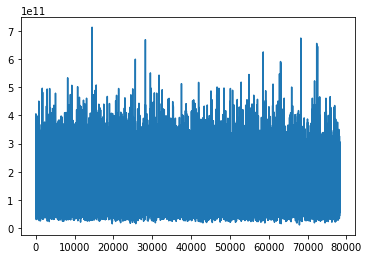

Mean gan loss : 150443984156.67883
Std gan loss :  63617190720.36758
Min gan loss :  11164288000.0
PSNR loss


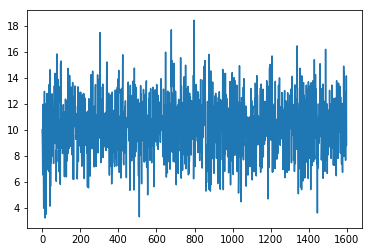

Mean psnr loss : 10.221333614992604
Std psnr loss :  2.093502244996746
Min psnr loss :  3.2228943705558777
Pretrain loss: Loaded discriminator JSON
Discriminator loss


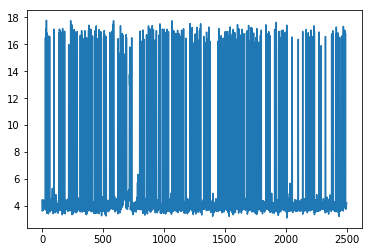

Mean discriminator loss : 5.299877254915238
Std discriminator loss :  3.8507102677432763
Min discriminator loss :  3.1090009212493896
Fulltrain loss: Loaded fulltrain JSON
Discriminator loss


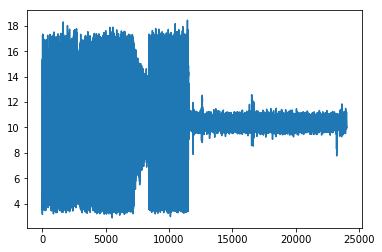

Mean discriminator loss : 8.514098948301115
Std discriminator loss :  3.678755551468047
Min discriminator loss :  2.8745930194854736
Generator loss


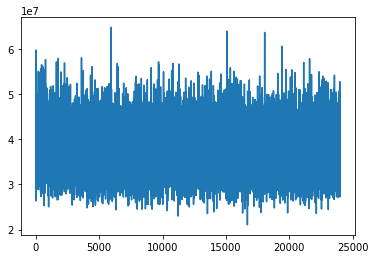

Mean generator loss : 37425866.096729845
Std generator loss :  4720819.827873199
Min generator loss :  21024400.0


In [2]:
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set_style('white')

import json
import numpy as np

with open("pretrain losses - srgan.json") as f:
    data = json.load(f)

print("Pretrain loss: Loaded SRGAN JSON.")

# plot the generator loss values
print("Generator loss")
plt.plot(data['generator_loss'])
plt.show()

print("Mean gan loss :", np.mean(data['generator_loss']))
print("Std gan loss : ", np.std(data['generator_loss']))
print("Min gan loss : ", np.min(data['generator_loss']))

# plot the PSNR loss values
print("PSNR loss")
plt.plot(data['val_psnr'])
plt.show()

print("Mean psnr loss :", np.mean(data['val_psnr']))
print("Std psnr loss : ", np.std(data['val_psnr']))
print("Min psnr loss : ", np.min(data['val_psnr']))

with open("pretrain losses - discriminator.json") as f:
    data = json.load(f)

print("Pretrain loss: Loaded discriminator JSON")

# plot the discriminator loss values
print("Discriminator loss")
plt.plot(data['discriminator_loss'])
plt.show()

print("Mean discriminator loss :", np.mean(data['discriminator_loss']))
print("Std discriminator loss : ", np.std(data['discriminator_loss']))
print("Min discriminator loss : ", np.min(data['discriminator_loss']))

with open("fulltrain losses.json") as f:
    data = json.load(f)

print("Fulltrain loss: Loaded fulltrain JSON")

# plot the discriminator loss values
print("Discriminator loss")
plt.plot(data['discriminator_loss'])
plt.show()

print("Mean discriminator loss :", np.mean(data['discriminator_loss']))
print("Std discriminator loss : ", np.std(data['discriminator_loss']))
print("Min discriminator loss : ", np.min(data['discriminator_loss']))


# plot the generator loss values
print("Generator loss")
plt.plot(data['generator_loss'])
plt.show()

print("Mean generator loss :", np.mean(data['generator_loss']))
print("Std generator loss : ", np.std(data['generator_loss']))
print("Min generator loss : ", np.min(data['generator_loss']))

In [ ]:
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import sys
sys.path.append("..")

#import models
from loss import PSNRLoss, psnr

import os
import time
import numpy as np
from imageio import imwrite as imsave
from skimage.transform import resize as imresize
from scipy.ndimage.filters import gaussian_filter

base_weights_path = "weights/"
base_val_images_path = "val_images/"
base_test_images = "test_images/"

set5_path = "tests/Set5"
set14_path = "tests/Set14"
bsd100_path = "tests/bsd100"

if not os.path.exists(base_weights_path):
    os.makedirs(base_weights_path)

if not os.path.exists(base_val_images_path):
    os.makedirs(base_val_images_path)

if not os.path.exists(base_test_images):
    os.makedirs(base_test_images)

def test_set5(model : Model, img_width=32, img_height=32, batch_size=1):
    datagen = ImageDataGenerator(rescale=1. / 255)
    large_img_width = img_width * 4
    large_img_height = img_height * 4

    iteration = 0
    total_psnr = 0.0

    print("Testing model on Set 5 Validation images")
    total_psnr = _test_loop(set5_path, batch_size, datagen, img_height, img_width, iteration, large_img_height, large_img_width,
                            model, total_psnr, "Set5", 5)

    print("Average PSNR of Set5 validation images : ", total_psnr / 5)
    print()


def test_set14(model : Model, img_width=32, img_height=32, batch_size=1):
    datagen = ImageDataGenerator(rescale=1. / 255)
    large_img_width = img_width * 4
    large_img_height = img_height * 4

    iteration = 0
    total_psnr = 0.0

    print("Testing model on Set 14 Validation images")
    total_psnr = _test_loop(set14_path, batch_size, datagen, img_height, img_width, iteration, large_img_height,
                            large_img_width, model, total_psnr, "Set14", 14)

    print("Average PSNR of Set5 validation images : ", total_psnr / 14)
    print()

def test_bsd100(model : Model, img_width=32, img_height=32, batch_size=1):
    datagen = ImageDataGenerator(rescale=1. / 255)
    large_img_width = img_width * 4
    large_img_height = img_height * 4

    iteration = 0
    total_psnr = 0.0

    print("Testing model on BSD 100 Validation images")
    total_psnr = _test_loop(bsd100_path, batch_size, datagen, img_height, img_width, iteration, large_img_height, large_img_width,
                            model, total_psnr, "bsd100", 100)

    print("Average PSNR of BSD100 validation images : ", total_psnr / 100)
    print()


def _test_loop(path, batch_size, datagen, img_height, img_width, iteration, large_img_height, large_img_width, model,
               total_psnr, prefix, num_images):
    for x in datagen.flow_from_directory(path, class_mode=None, batch_size=batch_size,
                                         target_size=(large_img_width, large_img_height)):
        t1 = time.time()

        # resize images
        x_temp = x.copy()
        x_temp = x_temp.transpose((0, 2, 3, 1))

        x_generator = np.empty((batch_size, img_width, img_height, 3))

        for j in range(batch_size):
            img = imresize(x_temp[j], (img_width, img_height))
            x_generator[j, :, :, :] = img

        x_generator = x_generator.transpose((0, 3, 1, 2))

        output_image_batch = model.predict_on_batch(x_generator)

        average_psnr = 0.0
        for x_i in range(batch_size):
            average_psnr += psnr(x[x_i], output_image_batch[x_i] / 255.)
            total_psnr += average_psnr

        average_psnr /= batch_size

        iteration += batch_size
        t2 = time.time()

        print("Time required : %0.2f. Average validation PSNR over %d samples = %0.2f" %
              (t2 - t1, batch_size, average_psnr))

        for x_i in range(batch_size):
            real_path = base_test_images + prefix + "_iteration_%d_num_%d_real_.png" % (iteration, x_i + 1)
            generated_path = base_test_images + prefix + "_iteration_%d_num_%d_generated.png" % (iteration, x_i + 1)

            val_x = x[x_i].copy() * 255.
            val_x = val_x.transpose((1, 2, 0))
            val_x = np.clip(val_x, 0, 255).astype('uint8')

            output_image = output_image_batch[x_i]
            output_image = output_image.transpose((1, 2, 0))
            output_image = np.clip(output_image, 0, 255).astype('uint8')

            imsave(real_path, val_x[:,:,0])
            imsave(generated_path, output_image[:,:,0])

        if iteration >= num_images:
            break
    return total_psnr


class SRResNetTest:

    def __init__(self, img_width=96, img_height=96, batch_size=16):
        assert img_width >= 16, "Minimum image width must be at least 16"
        assert img_height >= 16, "Minimum image height must be at least 16"

        self.img_width = img_width
        self.img_height = img_height
        self.batch_size = batch_size

        self.model = None # type: Model
        self.weights_path = base_weights_path + "sr_resnet_weights.h5"

    def build_model(self, load_weights=False) -> Model:
        sr_resnet = GenerativeNetwork(self.img_width, self.img_height, self.batch_size)

        ip = Input(shape=(self.img_width, self.img_height, 3), name='x_generator')
        output = sr_resnet.create_sr_model(ip)

        self.model = Model(ip, output)

        optimizer = Adam(lr=1e-4)
        self.model.compile(optimizer, loss='mse', metrics=[PSNRLoss])

        if load_weights:
            try:
                self.model.load_weights(self.weights_path)
                print("SR ResNet model weights loaded.")
            except Exception:
                print("Weight for SR ResNet model not found or are incorrect size. Cannot load weights.")

                response = input("Continue without loading weights? 'y' or 'n' ")
                if response == 'n':
                    exit()

        return self.model

    def train_model(self, image_dir, num_images=50000, epochs=1):
        datagen = ImageDataGenerator(rescale=1. / 255)
        img_width = self.img_width * 4
        img_height = self.img_height * 4

        early_stop = False
        iteration = 0
        prev_improvement = -1

        print("Training SR ResNet network")
        for i in range(epochs):
            print()
            print("Epoch : %d" % (i + 1))

            for x in datagen.flow_from_directory(image_dir, class_mode=None, batch_size=self.batch_size,
                                                 target_size=(img_width, img_height)):

                try:
                    t1 = time.time()

                    # resize images
                    x_temp = x.copy()
                    x_temp = x_temp.transpose((0, 2, 3, 1))

                    x_generator = np.empty((self.batch_size, self.img_width, self.img_height, 3))

                    for j in range(self.batch_size):
                        img = gaussian_filter(x_temp[j], sigma=0.5)
                        img = imresize(img, (self.img_width, self.img_height,3))
                        x_generator[j, :, :, :] = img

                    #x_generator = x_generator.transpose((0, 3, 1, 2))

                    if iteration % 50 == 0 and iteration != 0 :
                        print("Random Validation image..")
                        output_image_batch = self.model.predict_on_batch(x_generator)

                        print("Pred Max / Min: %0.2f / %0.2f" % (output_image_batch.max(),
                                                                 output_image_batch.min()))

                        average_psnr = 0.0
                        for x_i in range(self.batch_size):
                            average_psnr += psnr(x[x_i], output_image_batch[x_i] / 255.)

                        average_psnr /= self.batch_size

                        iteration += self.batch_size
                        t2 = time.time()

                        print("Time required : %0.2f. Average validation PSNR over %d samples = %0.2f" %
                              (t2 - t1, self.batch_size, average_psnr))

                        for x_i in range(self.batch_size):
                            real_path = base_val_images_path + "epoch_%d_iteration_%d_num_%d_real_.png" % \
                                                               (i + 1, iteration, x_i + 1)

                            generated_path = base_val_images_path + \
                                             "epoch_%d_iteration_%d_num_%d_generated.png" % (i + 1,
                                                                                            iteration,
                                                                                            x_i + 1)

                            val_x = x[x_i].copy() * 255.
                            val_x = val_x.transpose((1, 2, 0))
                            val_x = np.clip(val_x, 0, 255).astype('uint8')

                            output_image = output_image_batch[x_i]
                            output_image = output_image.transpose((1, 2, 0))
                            output_image = np.clip(output_image, 0, 255).astype('uint8')

                            imsave(real_path, val_x[:,:,0])
                            imsave(generated_path, output_image[:,:,0])

                        '''
                        Don't train of validation images for now.

                        Note that if epochs > 1, there is a chance that
                        validation images may be used for training purposes as well.

                        In that case, this isn't strictly a validation measure, instead of
                        just a check to see what the network has learned.
                        '''
                        continue

                    hist = self.model.fit(x_generator, x * 255, batch_size=self.batch_size, epochs=1, verbose=0)
                    psnr_loss_val = hist.history['PSNRLoss'][0]

                    if prev_improvement == -1:
                        prev_improvement = psnr_loss_val

                    improvement = (prev_improvement - psnr_loss_val) / prev_improvement * 100
                    prev_improvement = psnr_loss_val

                    iteration += self.batch_size
                    t2 = time.time()

                    print("%d / %d | Improvement : %0.2f %% | Time required : %0.2f s/step | "
                          "PSNR : %0.3f" % (iteration, num_images, improvement, t2 - t1, psnr_loss_val))

                    if iteration % 1000 == 0 and iteration != 0:
                        print("Saving weights")
                        self.model.save_weights(self.weights_path, overwrite=True)

                    if iteration >= num_images:
                        break

                except KeyboardInterrupt:
                    print("Keyboard interrupt detected. Stopping early.")
                    early_stop = True
                    break

            iteration = 0

            if early_stop:
                break

        print("Finished training SRGAN network. Saving model weights.")


if __name__ == "__main__":
    from keras.utils.vis_utils import plot_model as plot

    coco_path = "tests/coco"

    img_width = img_height = 64

    sr_resnet_test = SRResNetTest(img_width=img_width, img_height=img_height, batch_size=1)
    sr_resnet_test.build_model(load_weights=False)
    #plot(sr_resnet_test.model, to_file='sr_resnet.png', show_shapes=True)

    #sr_resnet_test.train_model(coco_path, num_images=50000, epochs=1)

    test_set5(sr_resnet_test.model, img_width=img_width, img_height=img_height)
    test_set14(sr_resnet_test.model, img_width=img_width, img_height=img_height)
    test_bsd100(sr_resnet_test.model, img_width=img_width, img_height=img_height)
